In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image


import string
import nltk
from nltk.corpus import stopwords

import pandas as pd
from nltk.stem.snowball import SnowballStemmer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import textblob
import xgboost

from textblob import TextBlob

from sklearn.tree import  DecisionTreeClassifier
from  sklearn.model_selection  import train_test_split , GridSearchCV
from  sklearn     import metrics 

import gensim
from gensim import corpora


In [3]:
data = pd.read_excel(r"C:\Users\ACER\Downloads\ML assingment\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform\Womens Clothing Reviews Data.xlsx")

In [4]:
data.head(4)

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1

## a.Performing exploratory analysis on the data to understand the patterns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
## Checking all data type are correct or not 

In [7]:
## Understanding the data :

In [8]:
data.head(4)

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1

In [9]:
## Need to change the names of variable as all variable 1st letter is captial.

In [10]:
data.rename({"Product ID":"product_id", "Category":"category", "Subcategory1":"subcategory1", "SubCategory2":"subcategory2", "Location":"location", "Channel":"channel", "Customer Age":"customer_age", "Review Title":"review_title","Review Text":"review_text","Rating":"rating", "Recommend Flag":"recommend_flag"},axis=1, inplace=True)

In [11]:
data.head(3)

product_id   category subcategory1 subcategory2   location channel  \
0         767  Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080    General      Dresses      Dresses  Bangalore  Mobile   
2        1077    General      Dresses      Dresses    Gurgaon  Mobile   

   customer_age             review_title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   

                                         review_text  rating  recommend_flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0

In [12]:
## Checking missing : 

In [13]:
(data.isna().sum()/23486)*100

product_id         0.000000
category           0.059610
subcategory1       0.059610
subcategory2       0.059610
location           0.000000
channel            0.000000
customer_age       0.000000
review_title      16.222430
review_text        3.597888
rating             0.000000
recommend_flag     0.000000
dtype: float64

In [14]:
## As it can see most of the data that is missing is belongs to review_title as we can see that customers may be 
## had ignore that detail, but in place of that we can utilise review_text as well as rating and recommend_flag 

## and its an text/Categorical data which even we cant replace by treating.

In [15]:
data[data.category.isna()]

product_id category subcategory1 subcategory2   location channel  \
9444           72      NaN          NaN          NaN    Chennai     Web   
13767         492      NaN          NaN          NaN    Gurgaon     Web   
13768         492      NaN          NaN          NaN     Mumbai     Web   
13787         492      NaN          NaN          NaN    Chennai     Web   
16216         152      NaN          NaN          NaN  Bangalore  Mobile   
16221         152      NaN          NaN          NaN  Bangalore  Mobile   
16223         152      NaN          NaN          NaN    Gurgaon  Mobile   
18626         184      NaN          NaN          NaN     Mumbai     Web   
18671         184      NaN          NaN          NaN    Chennai  Mobile   
20088         772      NaN          NaN          NaN    Gurgaon     Web   
21532         665      NaN          NaN          NaN    Gurgaon  Mobile   
22997         136      NaN          NaN          NaN     Mumbai  Mobile   
23006         136      NaN          NaN          NaN    Gurgaon     Web   
23011         136      NaN          NaN          NaN    Chennai  Mobile   

       customer_age                           review_title  \
9444             25                   My favorite socks!!!   
13767            23                               So soft!   
13768            49                        Wardrobe staple   
13787            48                                    NaN   
16216            36                          Warm and cozy   
16221            37                                  Love!   
16223            39                        "long and warm"   
18626            34                  Nubby footless tights   
18671            54                          New workhorse   
20088            50                      Comfy sweatshirt!   
21532            43                           So worth it!   
22997            47  Charcoal, pale gray, a bit of silver!   
23006            33                        Cute itsy socks   
23011            36                            Super socks   

                                             review_text  rating  \
9444   I never write reviews, but these socks are so ...       5   
13767  I just love this hoodie! it is so soft and com...       5   
13768  Love this hoodie. so soft and goes with everyt...       5   
13787                                                NaN       5   
16216  Just what i was looking for. soft, cozy and warm.       5   
16221  I am loving these. they are quite long but are...       5   
16223  These leg warmers are perfect for me. they are...       5   
18626  These are amazing quality. i agree, size up to...       5   
18671  These tights are amazing! if i care for them w...       5   
20088  This sweatshirt is really nice!  it's oversize...       5   
21532  Got these on sale...absolutely love eberjey! f...       5   
22997  These socks are soft and comfortable, and they...       5   
23006  Love polkadots, love sparkle. these little soc...       5   
23011  I love these little socks ? and the dots spark...       5   

       recommend_flag  
9444                1  
13767               1  
13768               1  
13787               1  
16216               1  
16221               1  
16223               1  
18626               1  
18671               1  
20088               1  
21532               1  
22997               1  
23006               1  
23011               1

In [16]:
## Removeing product id as its not hold any benefit for any kind of analysis :

data.drop(["product_id"],axis=1, inplace=True)

In [17]:
## Some basis analysis/Obsevation through the data :  
data.category.value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: category, dtype: int64

In [18]:
data.subcategory1.value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: subcategory1, dtype: int64

In [19]:
data.subcategory2.value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: subcategory2, dtype: int64

In [20]:
## Four location : 
data.location.value_counts()

Gurgaon      8821
Mumbai       7112
Bangalore    5224
Chennai      2329
Name: location, dtype: int64

In [21]:
## There are two channle avilable for buying : 
data.channel.value_counts()

Web       13583
Mobile     9903
Name: channel, dtype: int64

In [22]:
## Overall rating : 
(data.rating.value_counts()/data.rating.count())*100

5    55.909904
4    21.617134
3    12.224304
2     6.663544
1     3.585115
Name: rating, dtype: float64

In [23]:
## overall recommendation flag : 
(data.recommend_flag.value_counts()/data.recommend_flag.count())*100

1    82.236226
0    17.763774
Name: recommend_flag, dtype: float64

## As you can observe the following : 

### 1) There are three moain category of products , 6 subcatgory1 and 20 subcategory2. 

### 2) Mainly they have two online channels avi. for buying the prodcut 

### 3) overall rating given by the consumer is above average as nearby 90% customers are given 3 and above rating.

### 4) There are four main customer geographical location. 

### 5) Recomadation given by user are also good as 82% give the recomadation for the products. 

## Pre-processing of data : 

In [24]:
### Removing of special characters and converting to  lower_Case  : 

In [25]:
df = data.copy()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        23472 non-null  object
 1   subcategory1    23472 non-null  object
 2   subcategory2    23472 non-null  object
 3   location        23486 non-null  object
 4   channel         23486 non-null  object
 5   customer_age    23486 non-null  int64 
 6   review_title    19676 non-null  object
 7   review_text     22641 non-null  object
 8   rating          23486 non-null  int64 
 9   recommend_flag  23486 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.8+ MB


In [27]:
df.review_text = df.review_text.astype(str)

In [28]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [29]:
df['reviews'] = df.review_text.apply(lambda x: clean_text(x))

In [30]:
df.review_title = df.review_title.astype(str)

In [31]:
df['title_review'] = df.review_title.apply(lambda x: clean_text(x))

In [32]:
df.title_review

0                                                      nan
1                                                      nan
2                                  some major design flaws
3                                          my favorite buy
4                                         flattering shirt
                               ...                        
23481                       great dress for many occasions
23482                           wish it was made of cotton
23483                                 cute but see through
23484    very cute dress perfect for summer parties and we
23485                       please make more like this one
Name: title_review, Length: 23486, dtype: object

In [33]:
df.drop(["review_title","review_text"],axis=1, inplace=True)

In [34]:
## Removing stop words : 

In [35]:
stop = stopwords.words("english")

In [36]:
df.reviews

0        absolutely wonderful  silky and sexy and comfo...
1        love this dress  its sooo pretty  i happened t...
2        i had such high hopes for this dress and reall...
3        i love love love this jumpsuit its fun flirty ...
4        this shirt is very flattering to all due to th...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes soft stretc...
23483    this fit well but the top was very see through...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: reviews, Length: 23486, dtype: object

In [37]:
stop_words = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [38]:
df['title_review'] = df['title_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [39]:
df.reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fits perfectly ...
Name: reviews, Length: 23486, dtype: object

In [40]:
## Doing stemming  : 

In [41]:
porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [42]:
df['review_stem'] = df.reviews.apply(stemSentence)

In [43]:
df['title_stem'] = df.title_review.apply(stemSentence)

In [44]:
df.review_stem

0                       absolut wonder silki sexi comfort 
1        love dress sooo pretti happen find store im gl...
2        high hope dress realli want work initi order p...
3        love love love jumpsuit fun flirti fabul everi...
4        shirt flatter due adjust front tie perfect len...
                               ...                        
23481    happi snag dress great price easi slip flatter...
23482    remind matern cloth soft stretchi shini materi...
23483    fit well top see never would work im glad abl ...
23484    bought dress wed summer cute unfortun fit isnt...
23485    dress love platinum feminin fit perfectli easi...
Name: review_stem, Length: 23486, dtype: object

In [45]:
df.reviews 

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hopes dress really wanted work initially ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23481    happy snag dress great price easy slip flatter...
23482    reminds maternity clothes soft stretchy shiny ...
23483    fit well top see never would worked im glad ab...
23484    bought dress wedding summer cute unfortunately...
23485    dress lovely platinum feminine fits perfectly ...
Name: reviews, Length: 23486, dtype: object

In [46]:
## As we can see that stemming and lemetaization is not help that much to treat the data , rather changing the meaning that why 
## drop the stem data and using first treated data only.

In [47]:
df.drop(["review_stem","title_stem"],axis=1, inplace=True)

In [48]:
df

category subcategory1 subcategory2   location channel  \
0           Initmates     Intimate    Intimates     Mumbai  Mobile   
1             General      Dresses      Dresses  Bangalore  Mobile   
2             General      Dresses      Dresses    Gurgaon  Mobile   
3      General Petite      Bottoms        Pants    Chennai     Web   
4             General         Tops      Blouses  Bangalore     Web   
...               ...          ...          ...        ...     ...   
23481  General Petite      Dresses      Dresses    Gurgaon  Mobile   
23482  General Petite         Tops        Knits    Gurgaon     Web   
23483  General Petite      Dresses      Dresses    Gurgaon     Web   
23484         General      Dresses      Dresses    Gurgaon     Web   
23485  General Petite      Dresses      Dresses    Chennai  Mobile   

       customer_age  rating  recommend_flag  \
0                33       4               1   
1                34       5               1   
2                60       3               0   
3                50       5               1   
4                47       5               1   
...             ...     ...             ...   
23481            34       5               1   
23482            48       3               1   
23483            31       3               0   
23484            28       3               1   
23485            52       5               1   

                                                 reviews  \
0            absolutely wonderful silky sexy comfortable   
1      love dress sooo pretty happened find store im ...   
2      high hopes dress really wanted work initially ...   
3      love love love jumpsuit fun flirty fabulous ev...   
4      shirt flattering due adjustable front tie perf...   
...                                                  ...   
23481  happy snag dress great price easy slip flatter...   
23482  reminds maternity clothes soft stretchy shiny ...   
23483  fit well top see never would worked im glad ab...   
23484  bought dress wedding summer cute unfortunately...   
23485  dress lovely platinum feminine fits perfectly ...   

                            title_review  
0                                    nan  
1                                    nan  
2                     major design flaws  
3                           favorite buy  
4                       flattering shirt  
...                                  ...  
23481         great dress many occasions  
23482                   wish made cotton  
23483                           cute see  
23484  cute dress perfect summer parties  
23485               please make like one  

[23486 rows x 10 columns]

In [49]:
## Performing spelling check: 

In [50]:

import string
def spelling_correction(text):
    text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    return(text)

## df['reviews'] = df['reviews'].apply(lambda x: spelling_correction(x))

## df['title_review'] = df['title_review'].apply(lambda x: spelling_correction(x))

## As its taking too much of time that is why didn't run it. 

In [51]:
## trying to create a new column wrt remark & title_review which will give a sentiment score of  the customers: 

In [52]:
df['sentiment_score'] = df["reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [53]:
df['sentiment'] = np.where(df.sentiment_score>=0.045,'Positive',np.where(df.sentiment_score<=-0.045, 'Negative', 'Neutral'))

In [54]:
#Word count in each comment:
df['count_word']=df["reviews"].apply(lambda x: len(str(x).split()))

#Letter count
df['count_letters']=df["reviews"].apply(lambda x: len(str(x)))

#Unique word count
df['count_unique_word']=df["reviews"].apply(lambda x: len(set(str(x).split())))

In [55]:
df.head(3)

category subcategory1 subcategory2   location channel  customer_age  \
0  Initmates     Intimate    Intimates     Mumbai  Mobile            33   
1    General      Dresses      Dresses  Bangalore  Mobile            34   
2    General      Dresses      Dresses    Gurgaon  Mobile            60   

   rating  recommend_flag                                            reviews  \
0       4               1        absolutely wonderful silky sexy comfortable   
1       5               1  love dress sooo pretty happened find store im ...   
2       3               0  high hopes dress really wanted work initially ...   

         title_review  sentiment_score sentiment  count_word  count_letters  \
0                 nan         0.633333  Positive           5             43   
1                 nan         0.318750  Positive          30            181   
2  major design flaws         0.082300  Positive          48            303   

   count_unique_word  
0                  5  
1                 25  
2                 42

## EDA  : 

In [56]:
## based on category : 

In [57]:
df.category.value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: category, dtype: int64

In [58]:
general_cat = df.reviews[df.category == "General"]
gp_cat = df.reviews[df.category == "General Petite"]
ini_cat = df.reviews[df.category == "Initmates"]

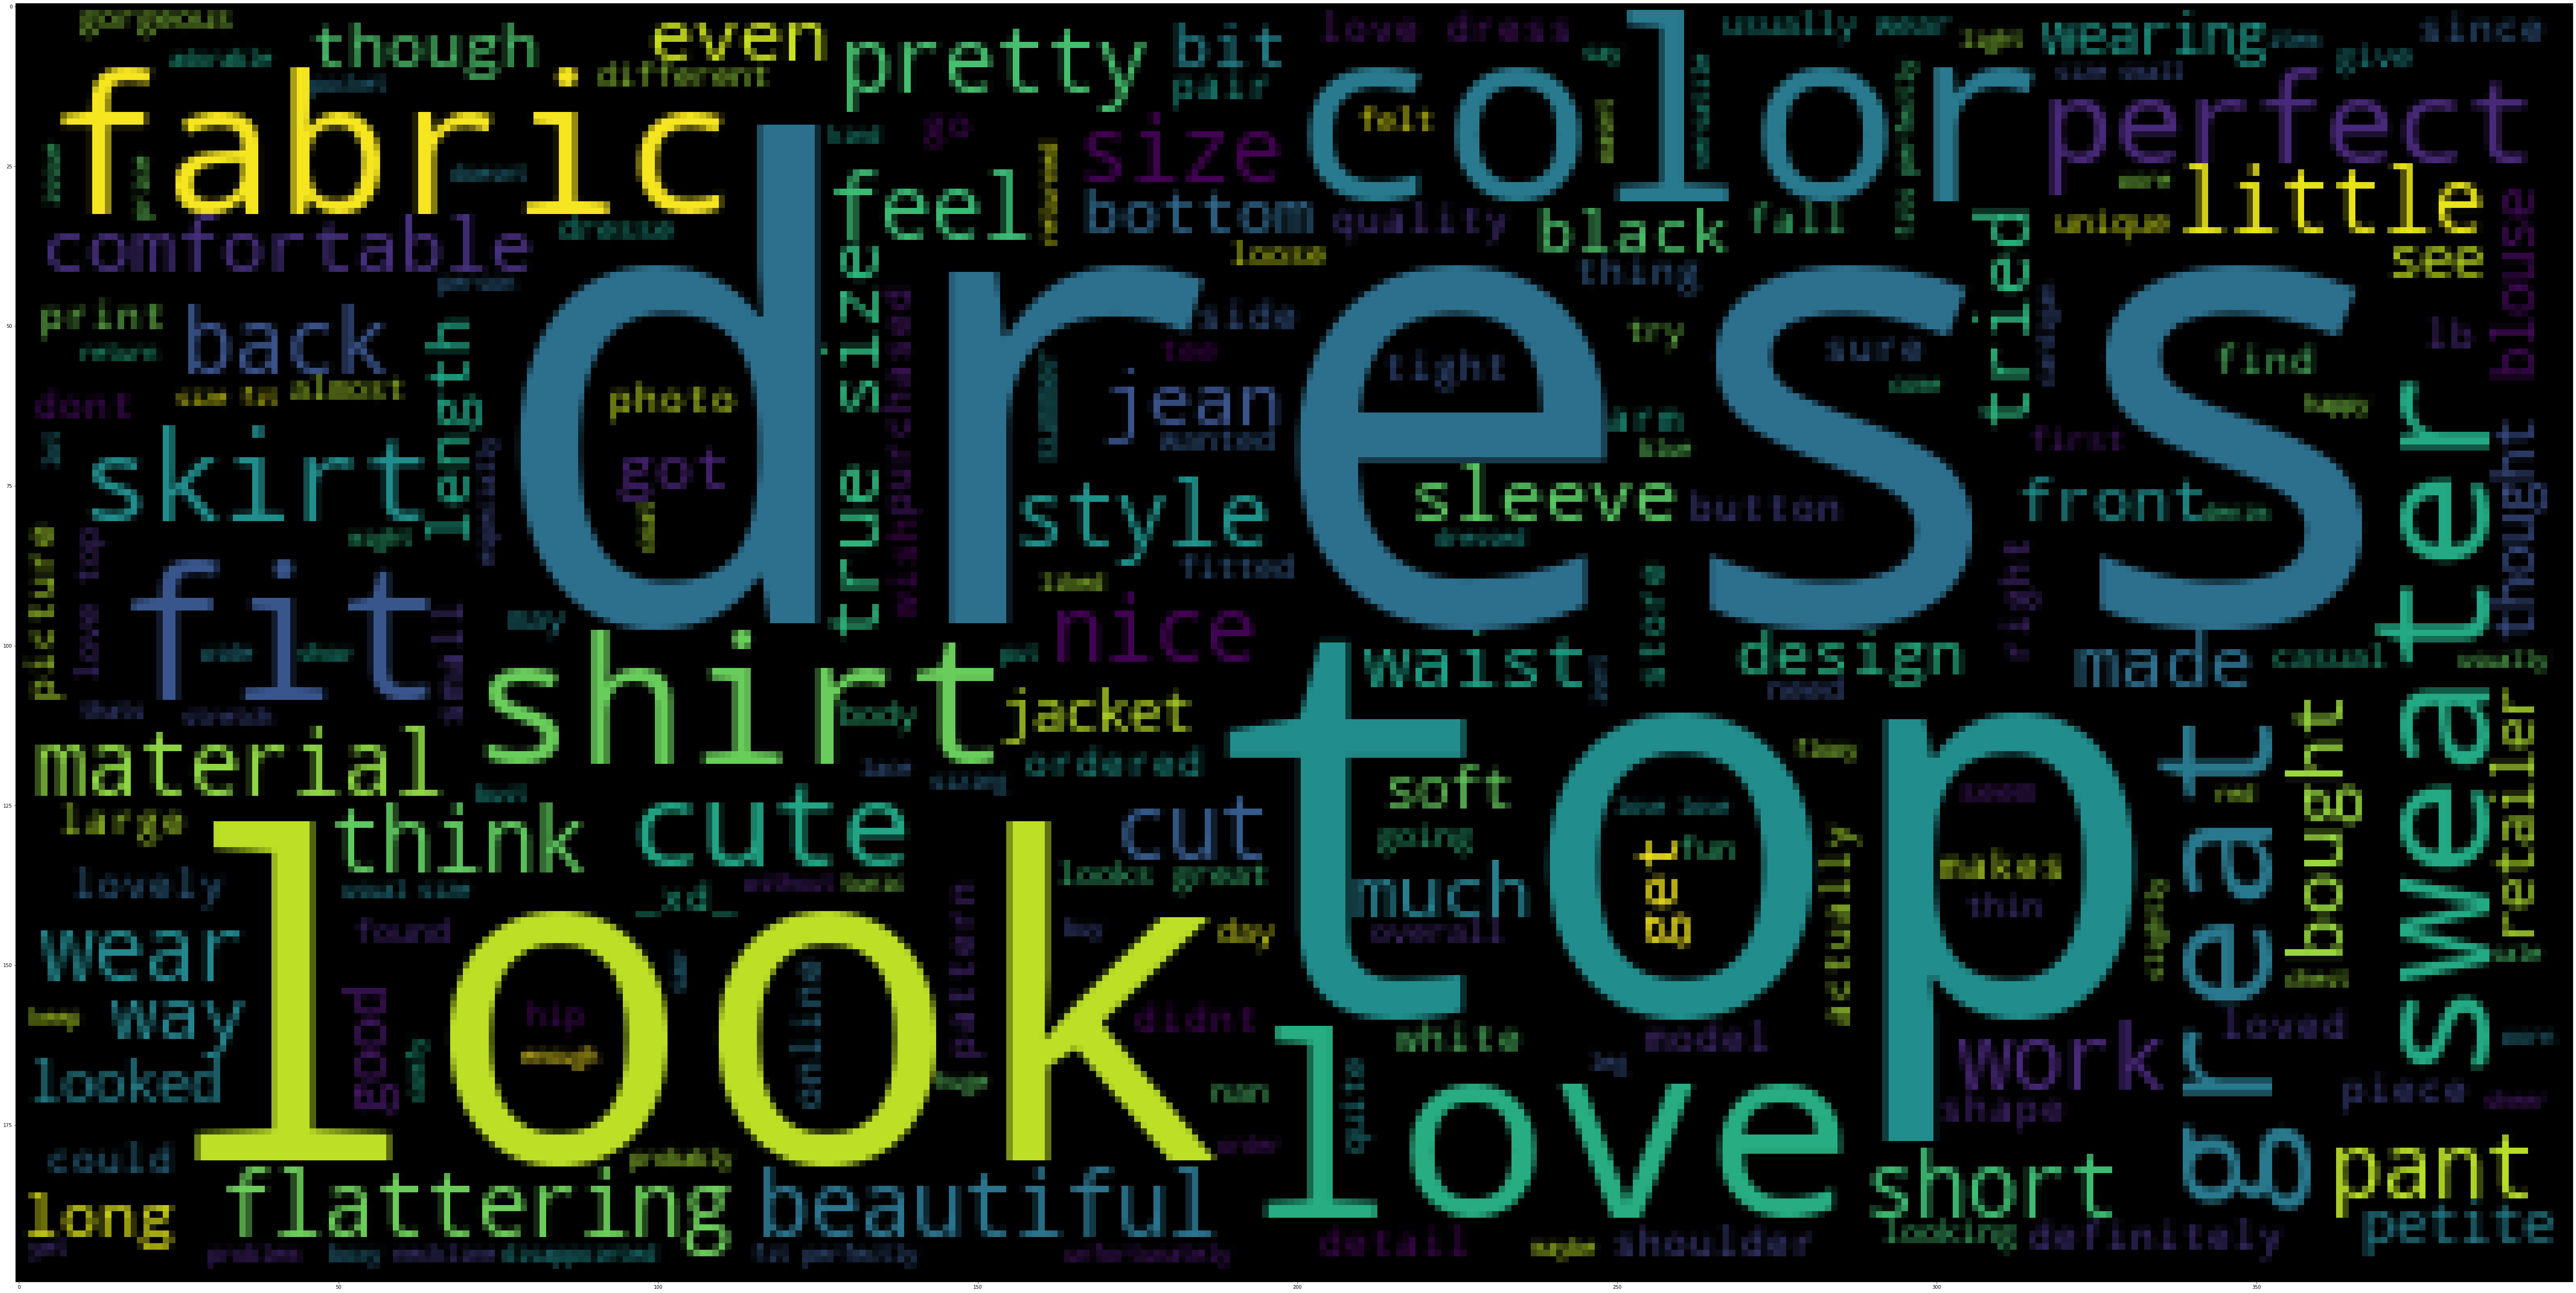

In [59]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(general_cat.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

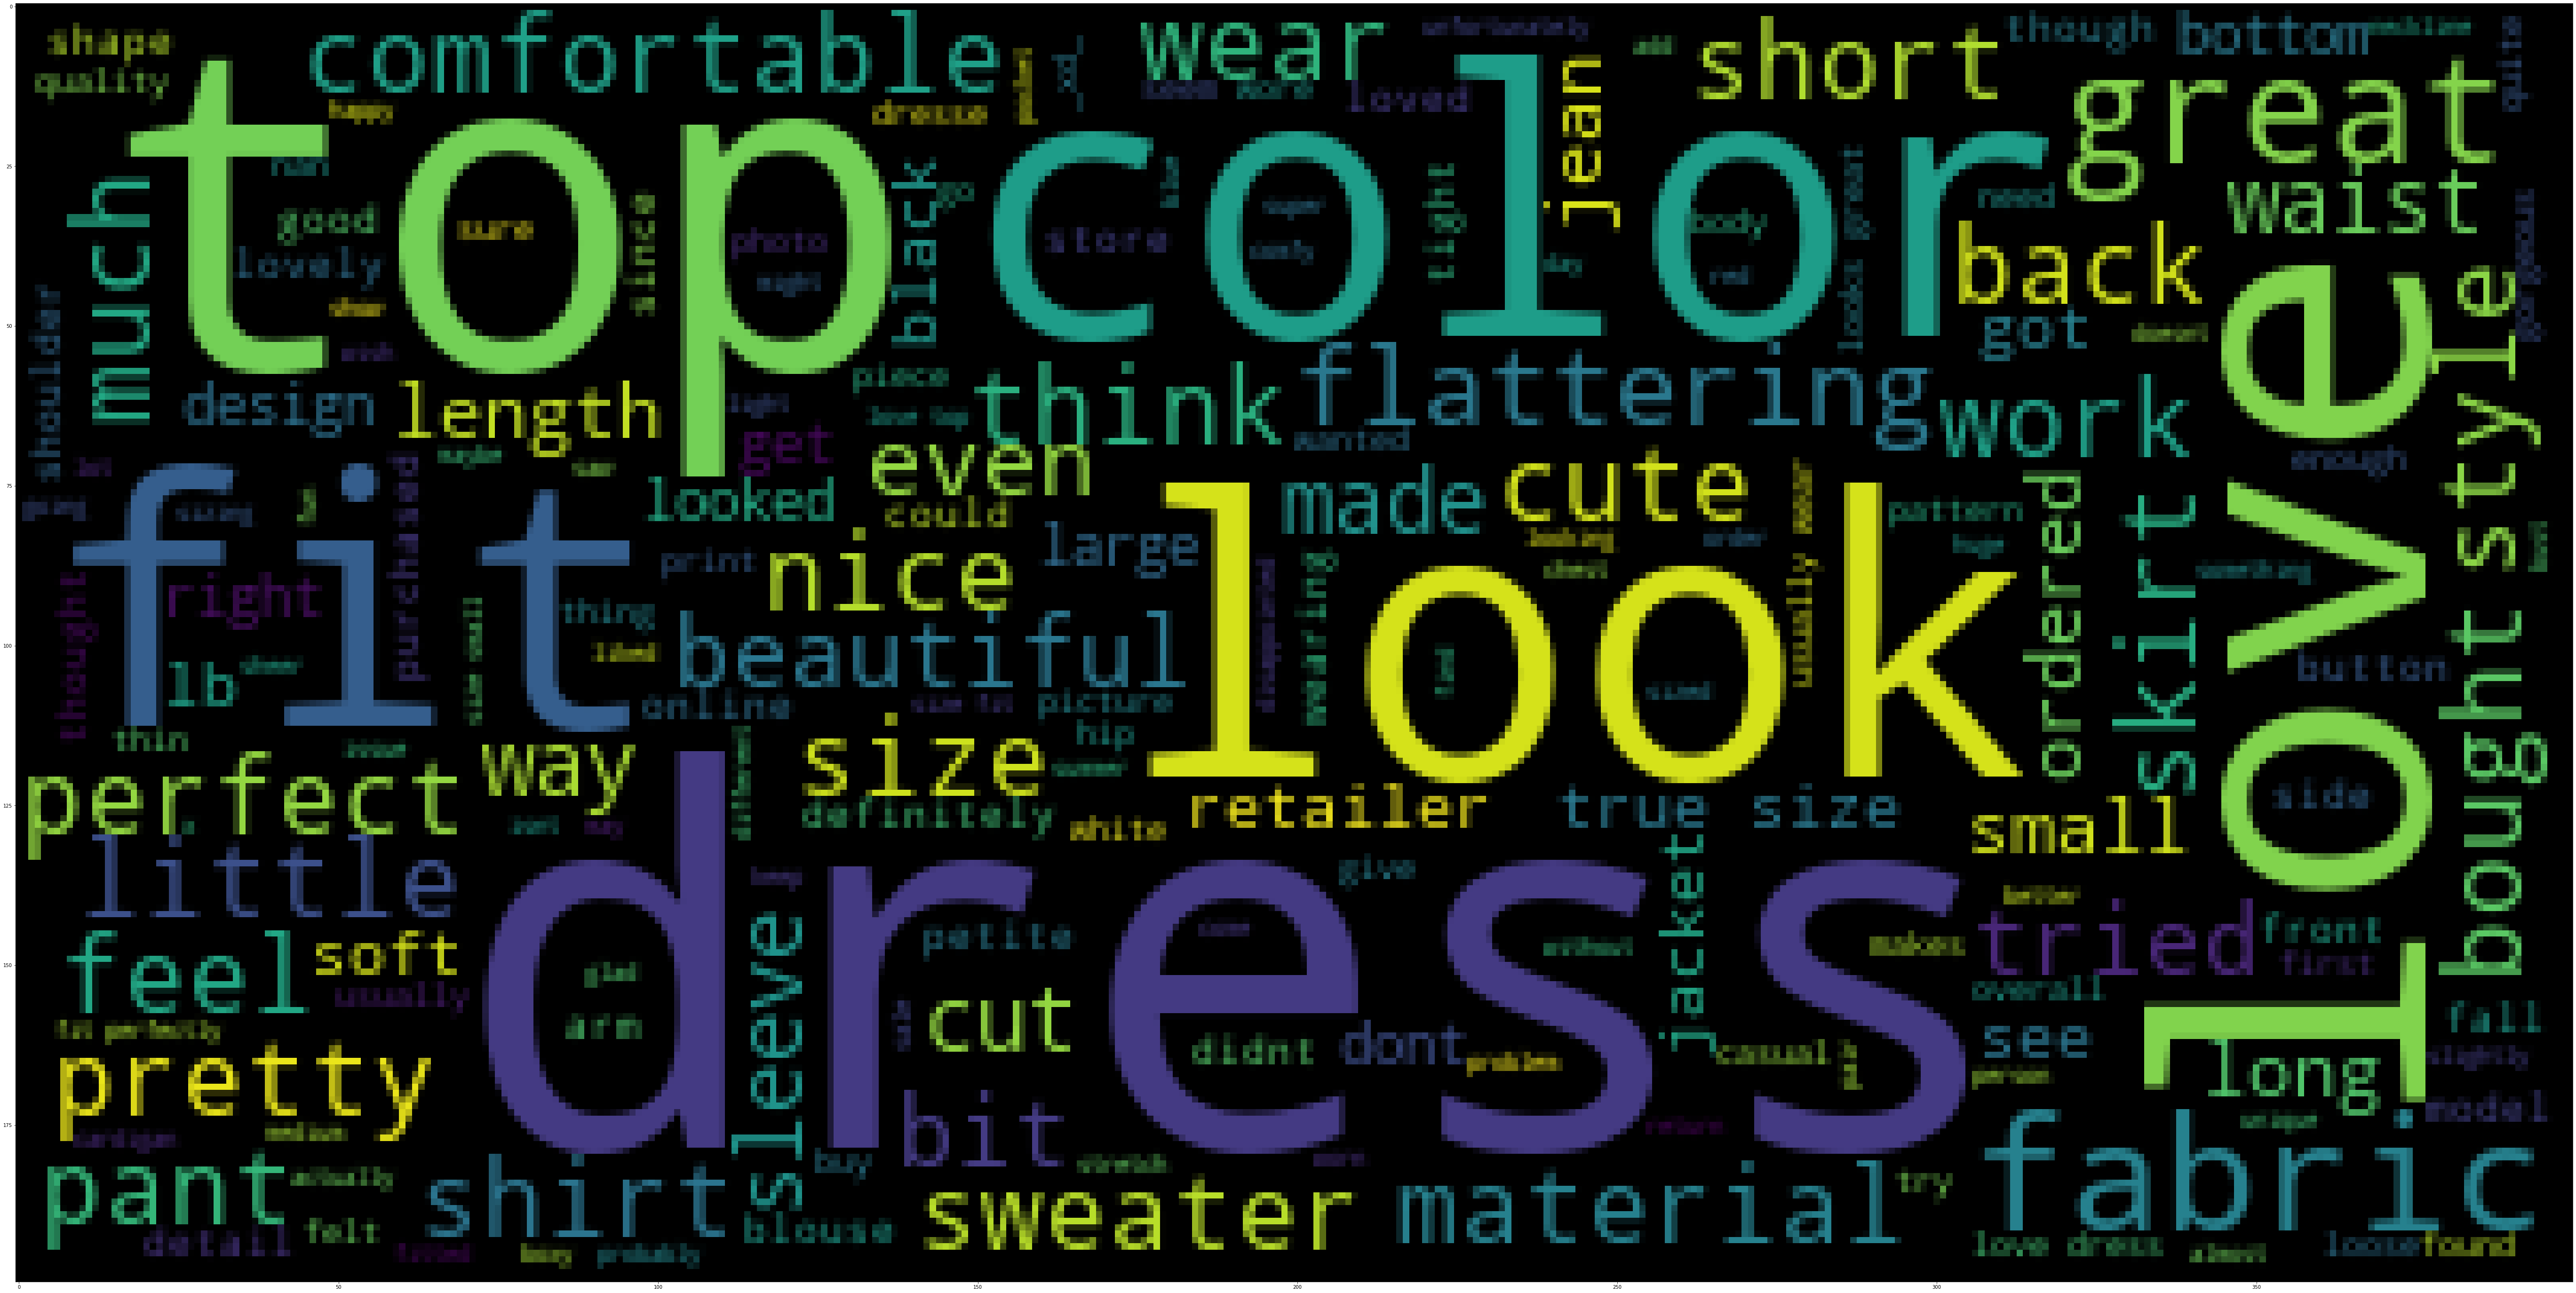

In [60]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(gp_cat.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

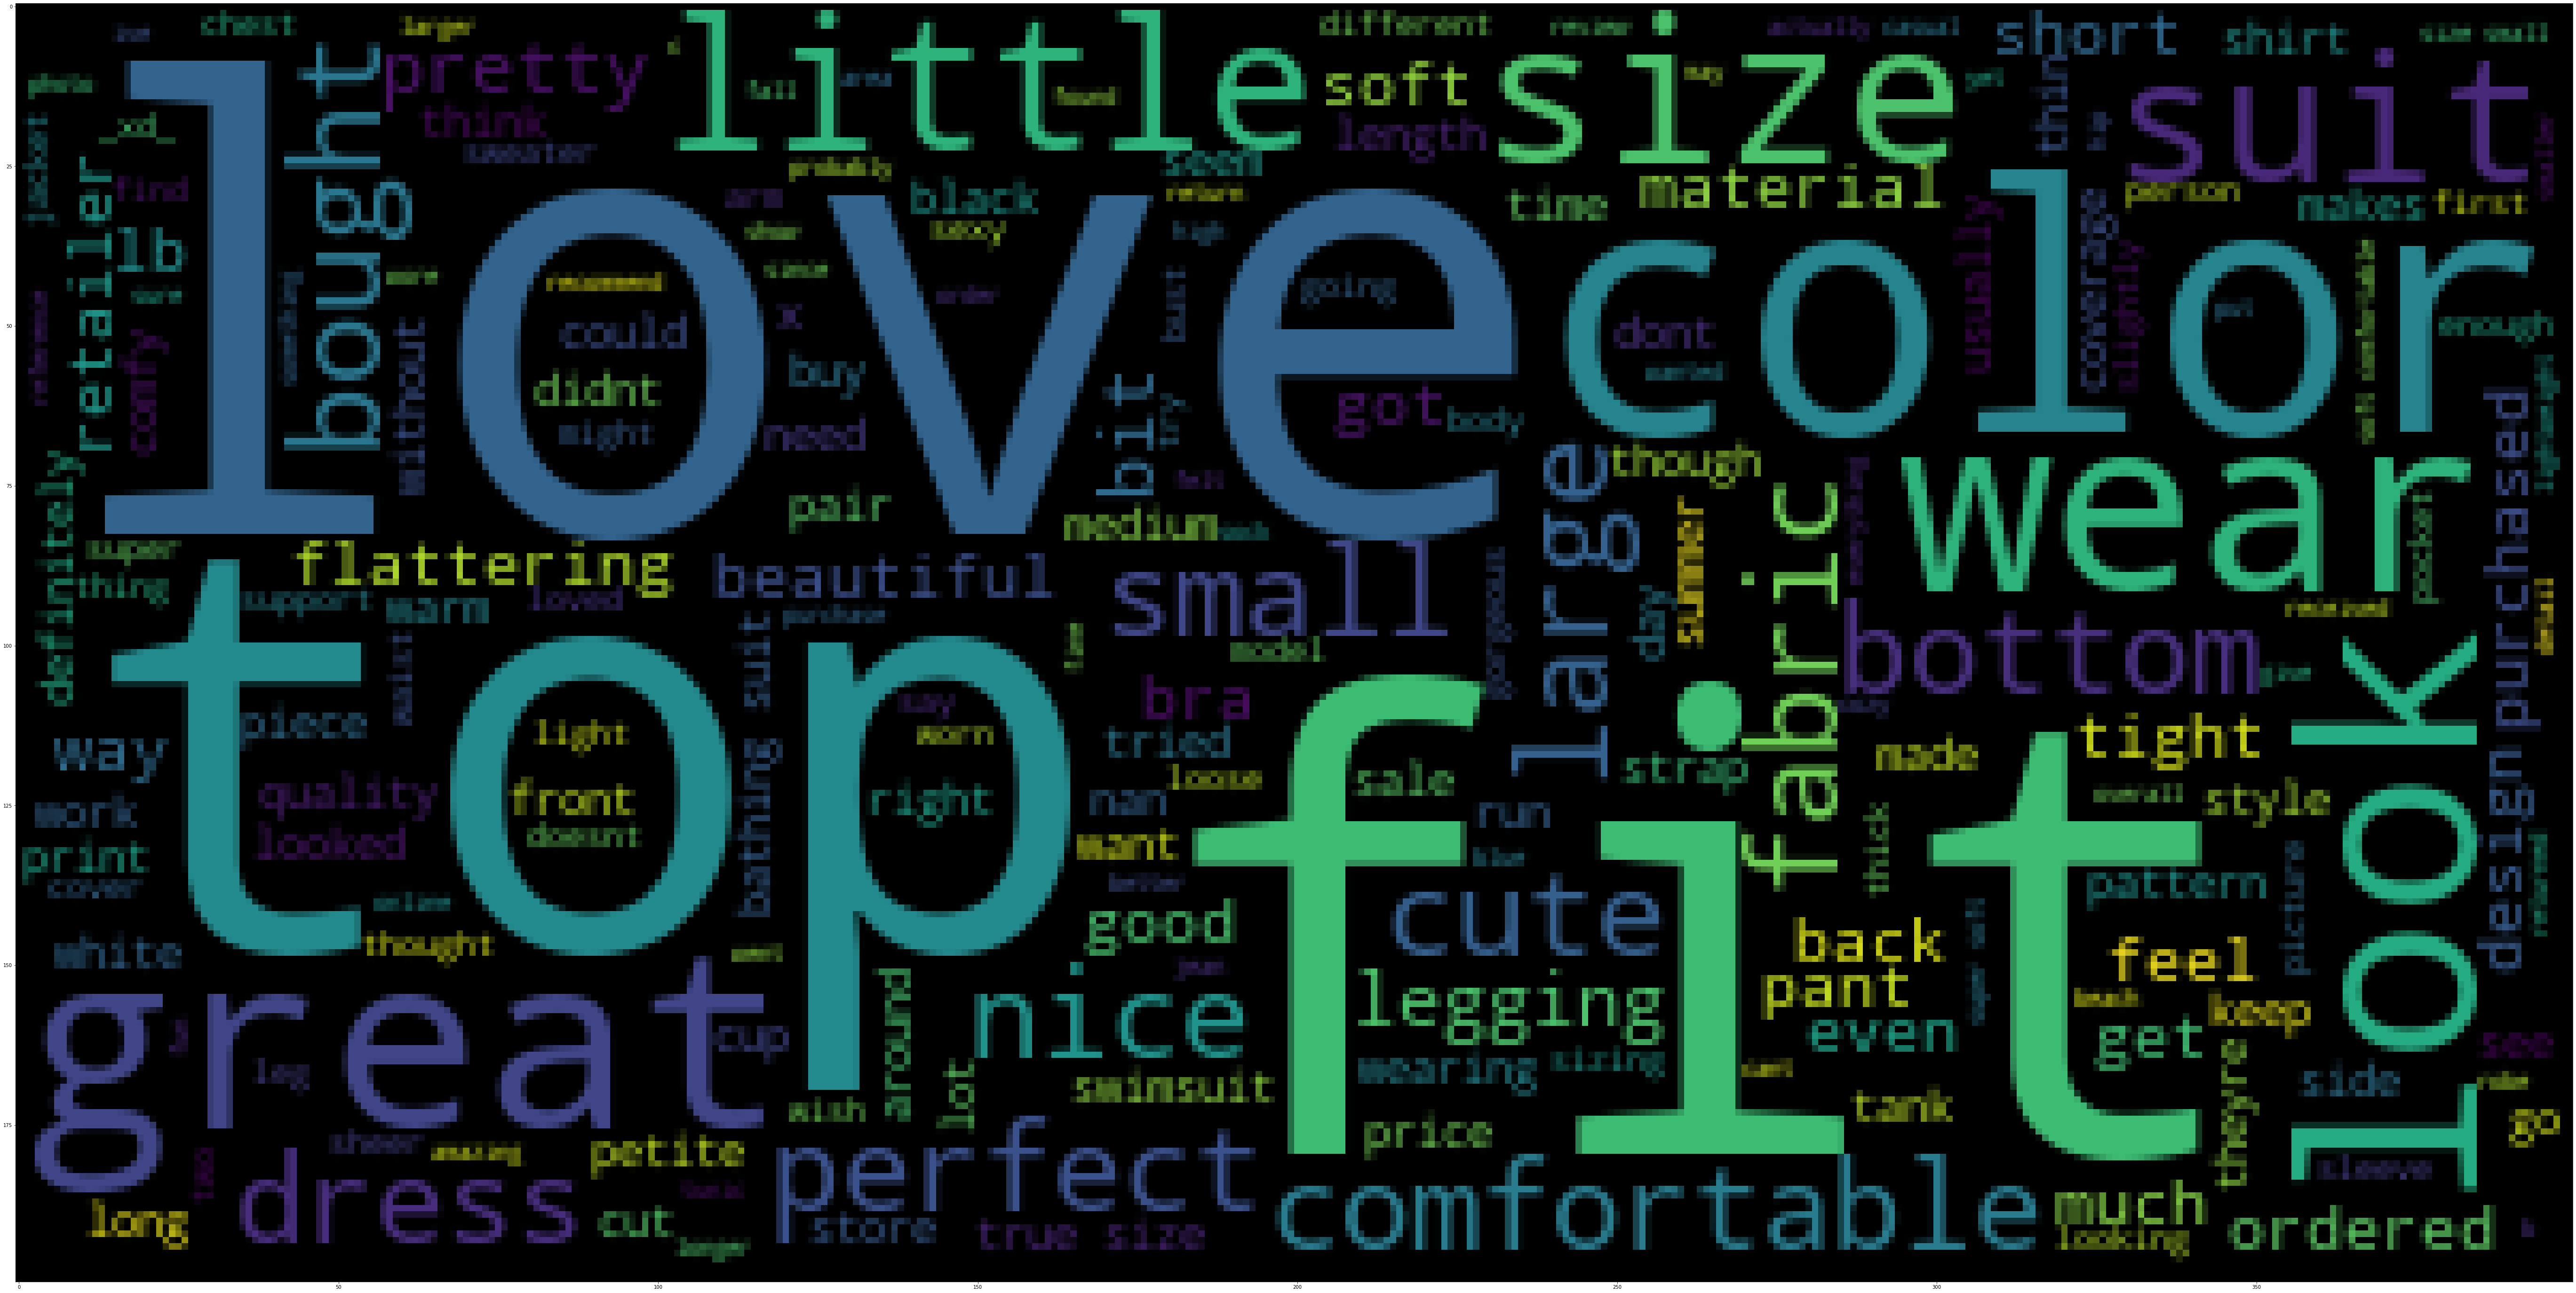

In [61]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(ini_cat.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [62]:
## frequency plot : 

In [63]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
general_cat_count = count_vect.fit_transform(general_cat)
general_cat_dtm=pd.DataFrame(general_cat_count.todense(), columns = count_vect.get_feature_names())

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

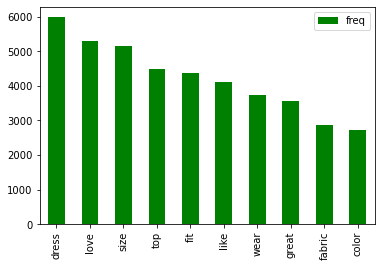

In [64]:
word_freq = pd.DataFrame(general_cat_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')


<AxesSubplot:>

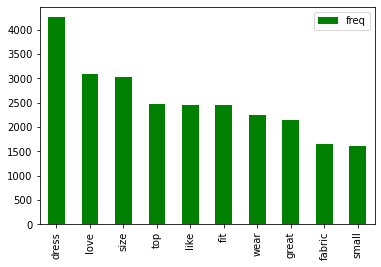

In [65]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
gp_cat_count = count_vect.fit_transform(gp_cat)
gp_cat_dtm=pd.DataFrame(gp_cat_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(gp_cat_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')


<AxesSubplot:>

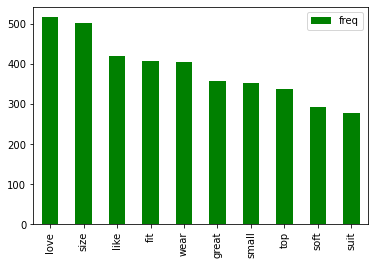

In [66]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
ini_cat_count = count_vect.fit_transform(ini_cat)
ini_cat_dtm=pd.DataFrame(ini_cat_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(ini_cat_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')



In [67]:
## based on subcategory1 : 

In [68]:
tops = df.reviews[df.subcategory1 == "Tops"]
dress = df.reviews[df.subcategory1 == "Dresses"]
bottoms = df.reviews[df.subcategory1 == "Bottoms"]
intimate = df.reviews[df.subcategory1 == "Intimate"]
jackets = df.reviews[df.subcategory1 == "Jackets"]
trend = df.reviews[df.subcategory1 == "Trend"]

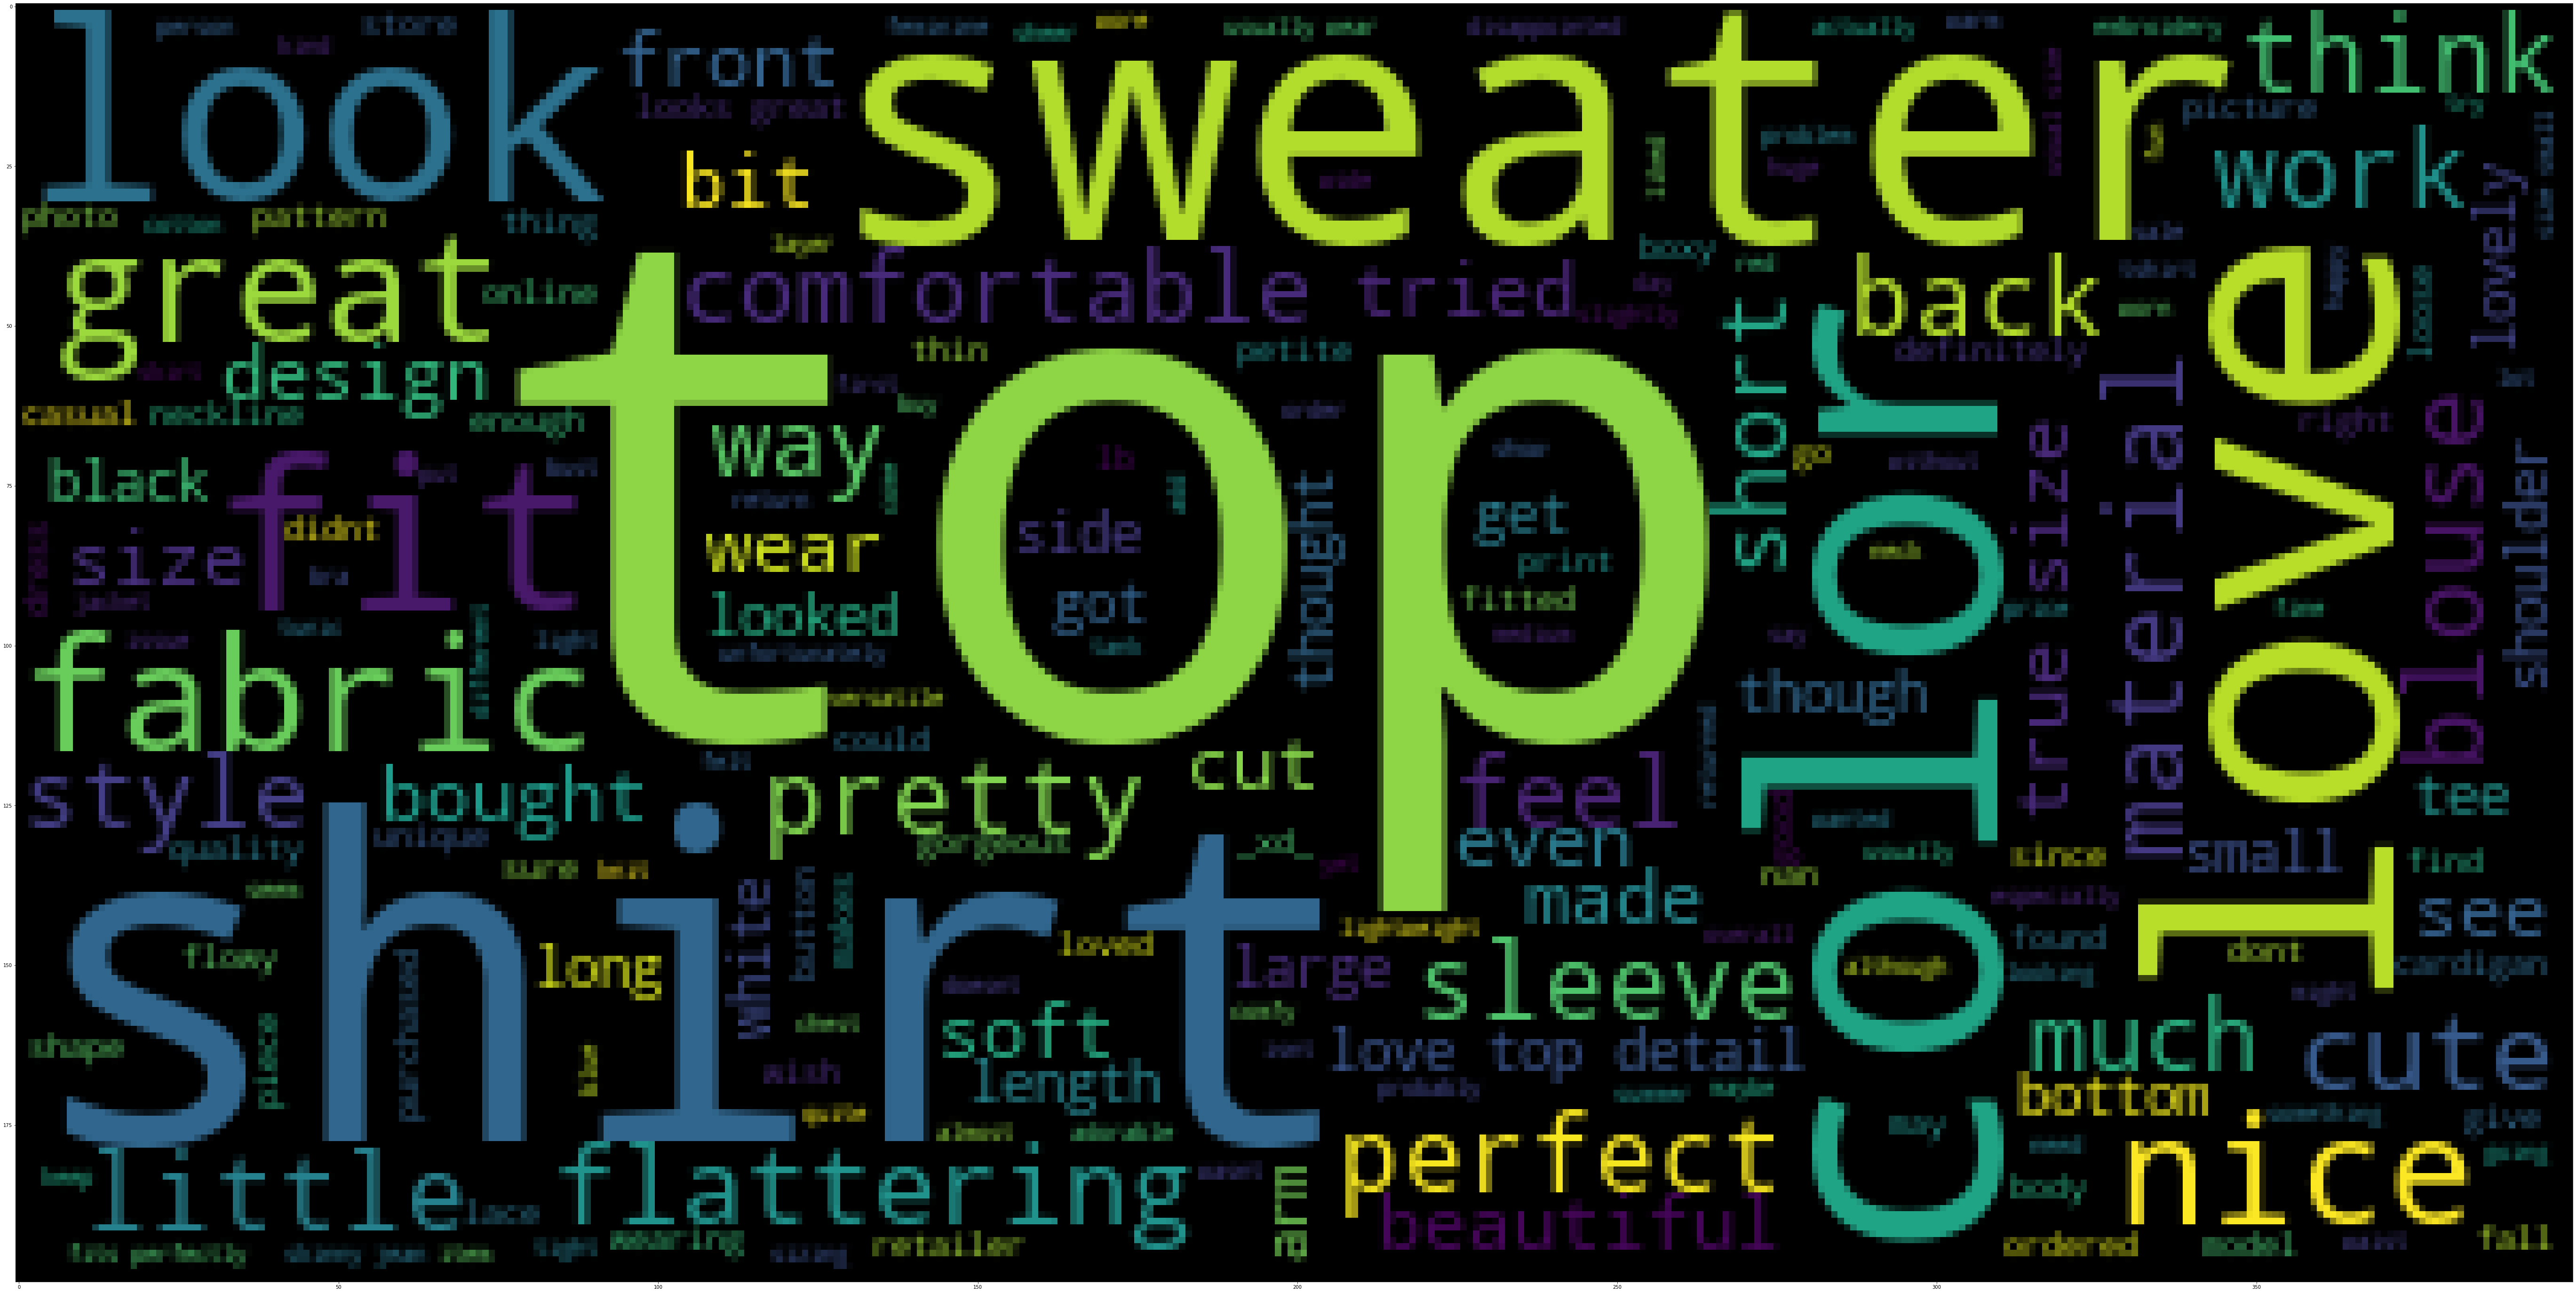

In [69]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(tops.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

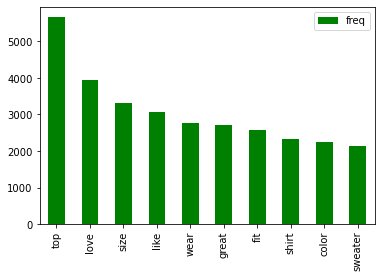

In [70]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
tops_count = count_vect.fit_transform(tops)
tops_count_dtm=pd.DataFrame(tops_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(tops_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

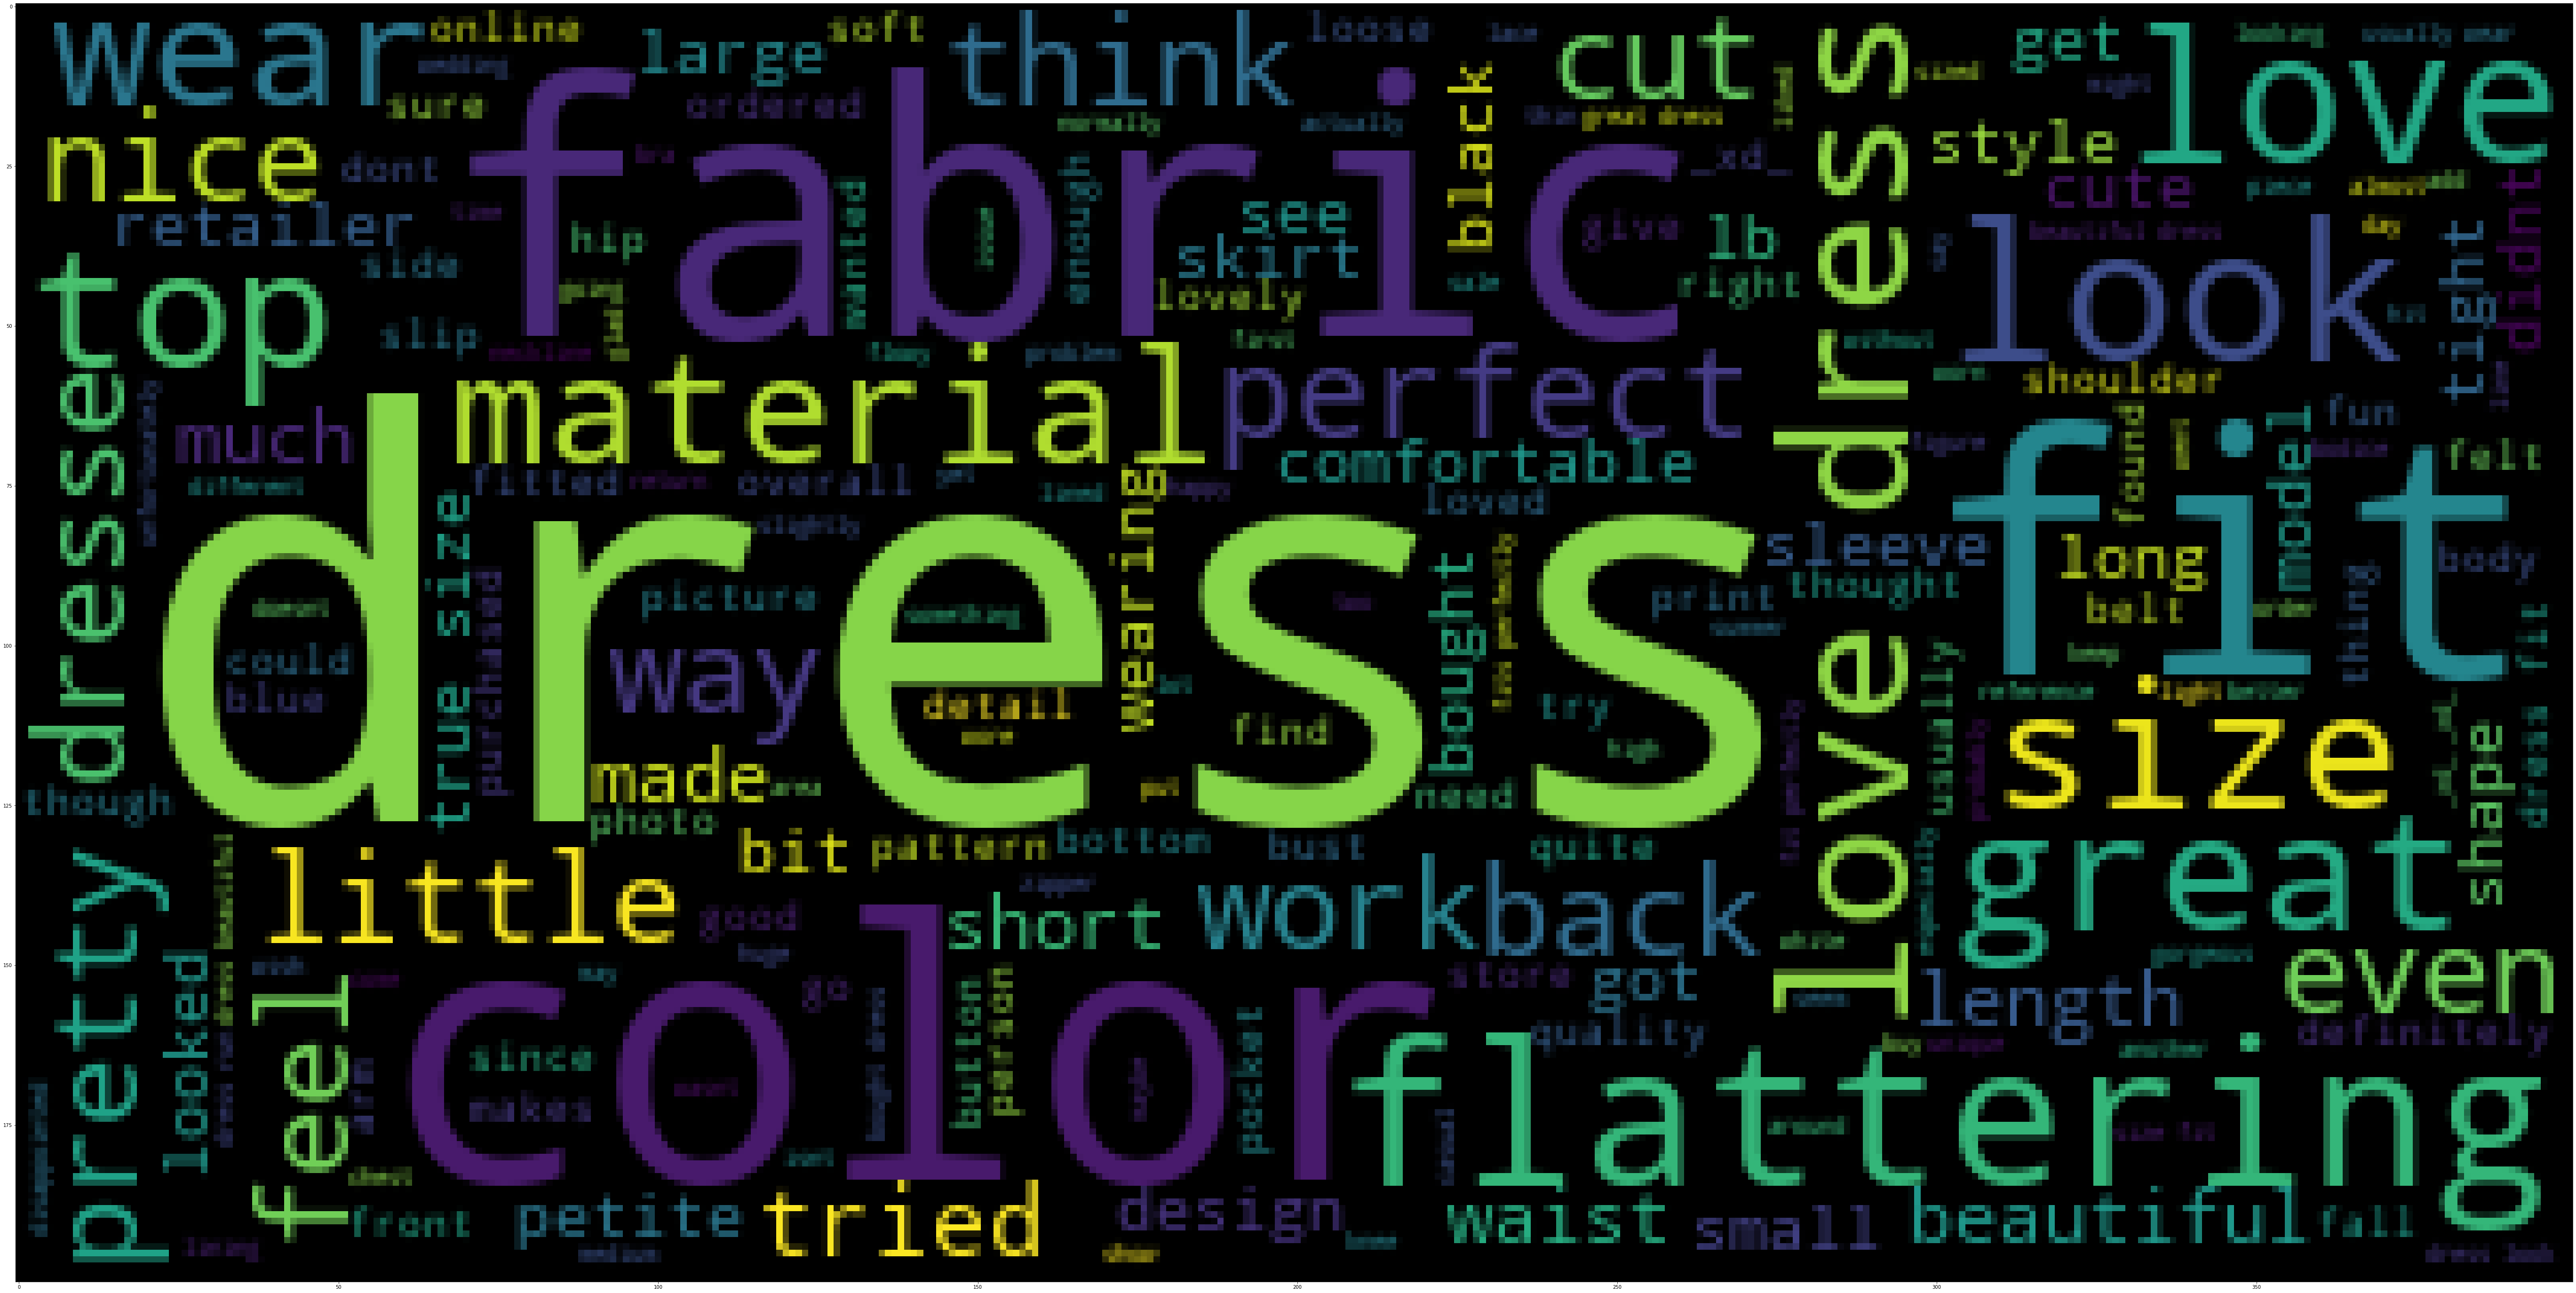

In [71]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(dress.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

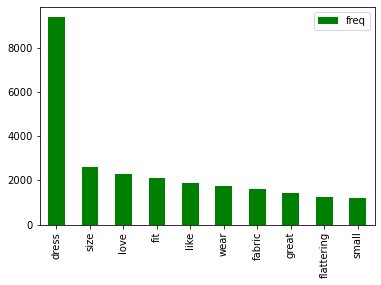

In [72]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
dress_count = count_vect.fit_transform(dress)
dress_count_dtm=pd.DataFrame(dress_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(dress_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

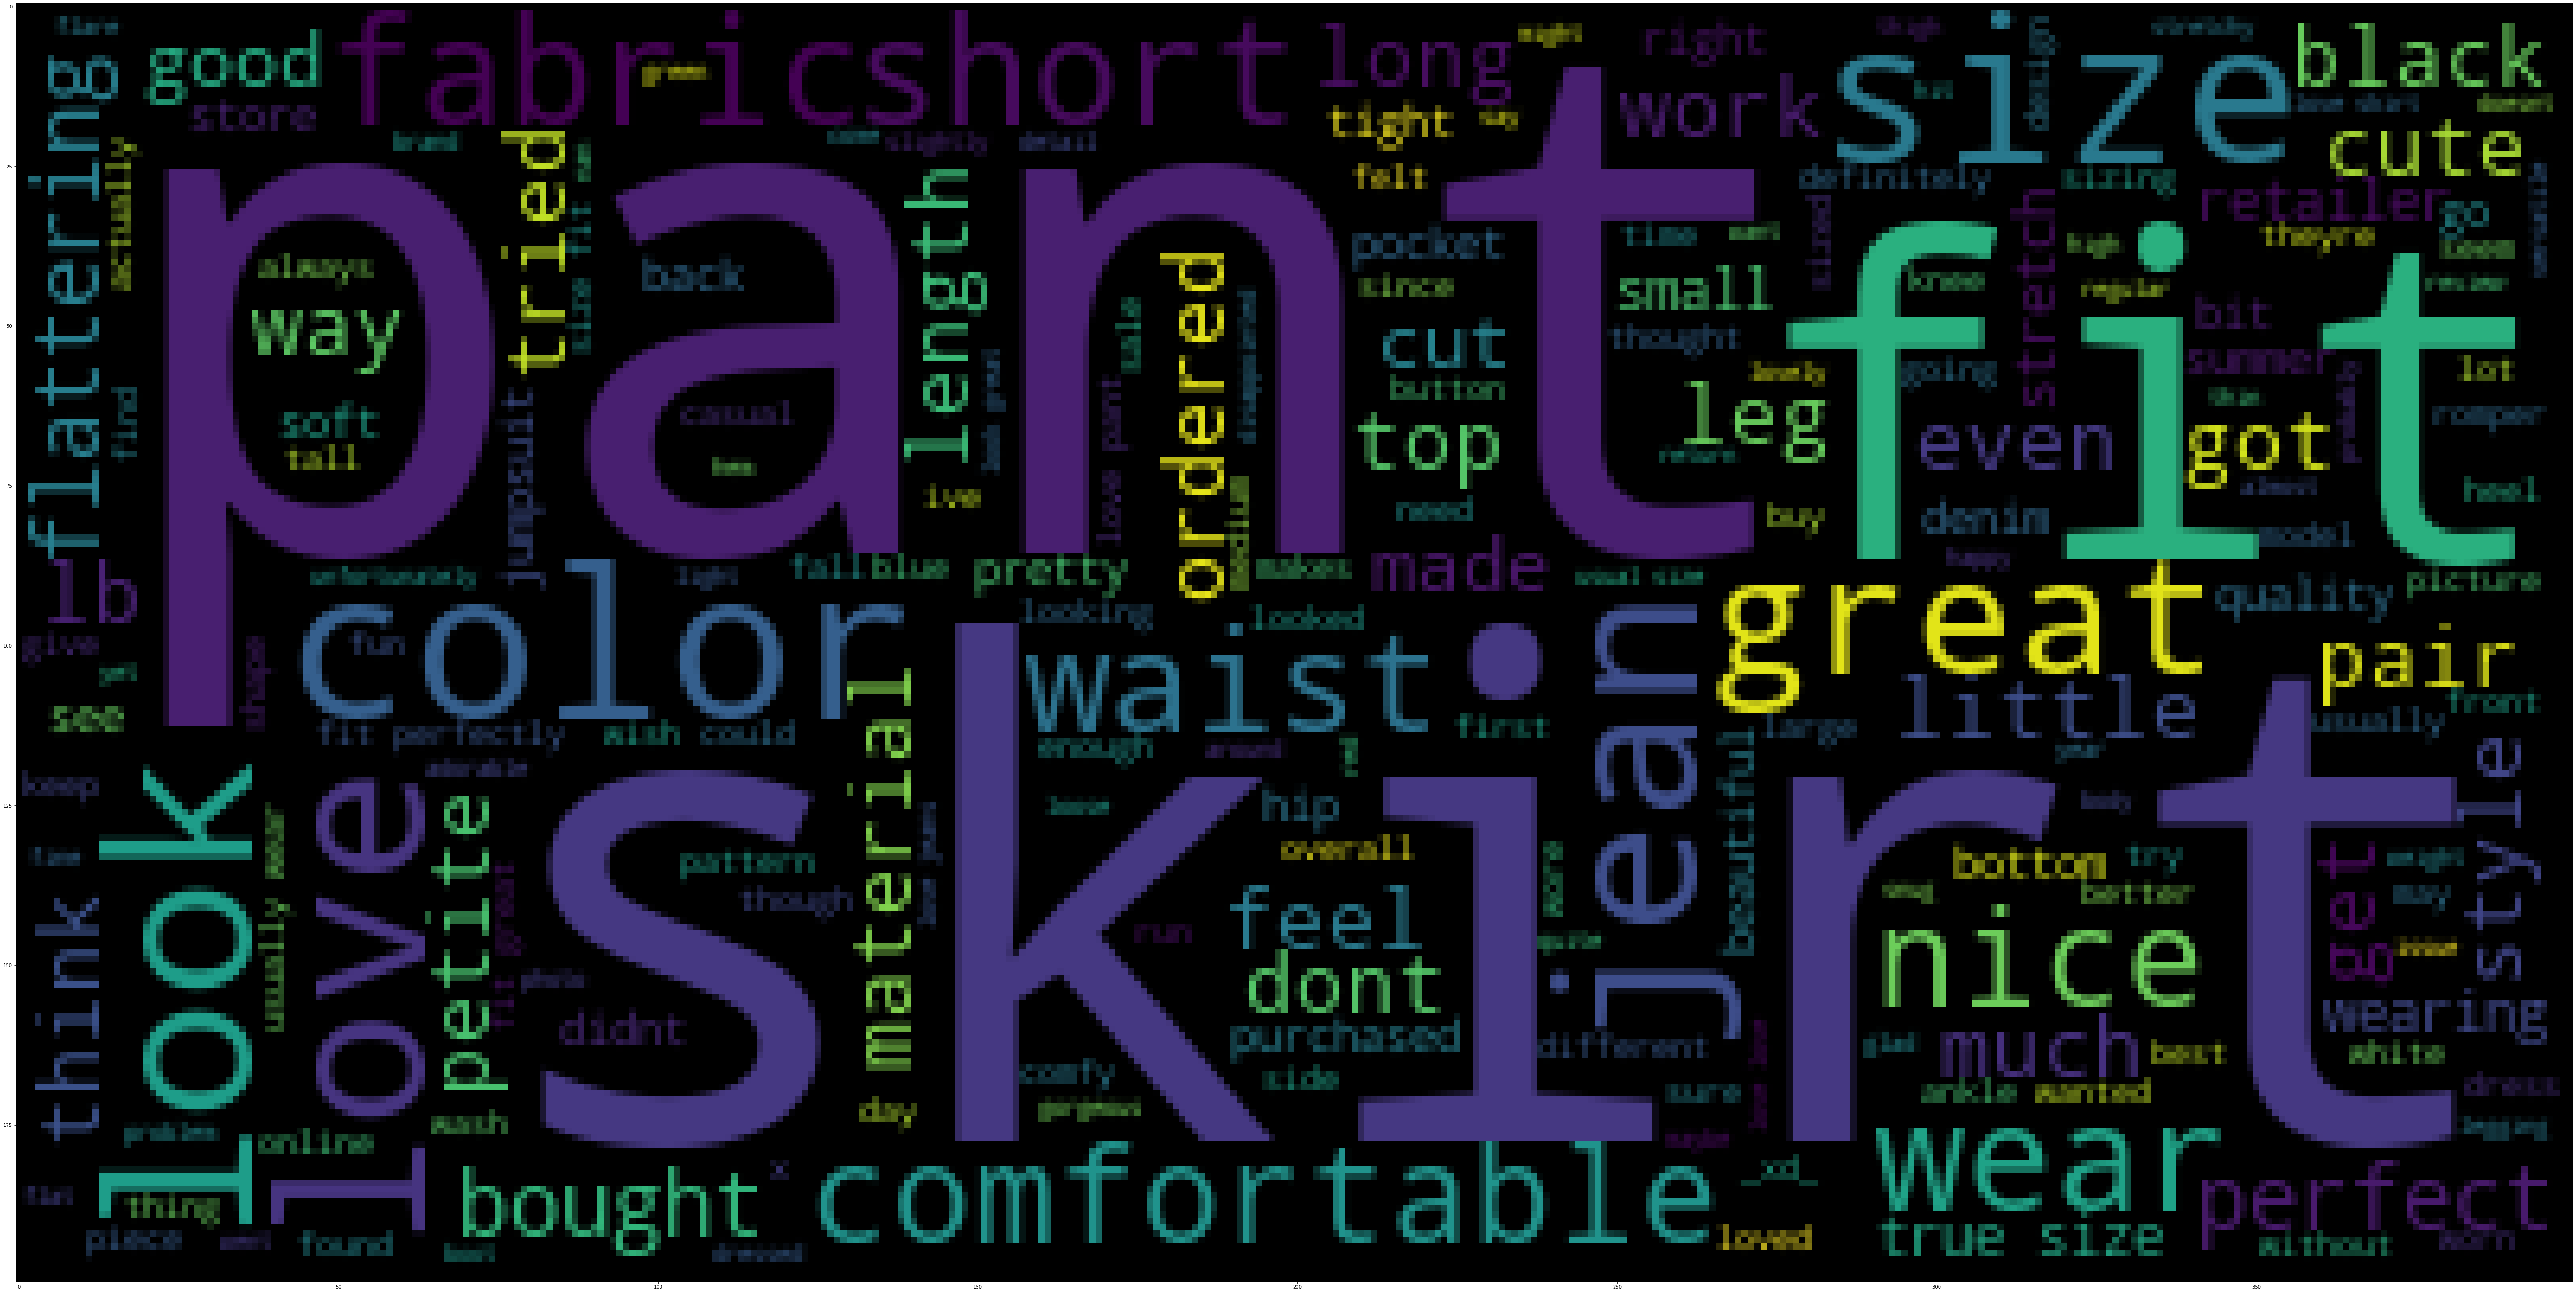

In [73]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(bottoms.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

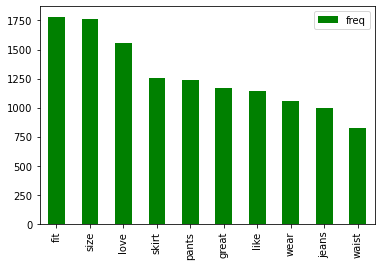

In [74]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
bottoms_count = count_vect.fit_transform(bottoms)
bottoms_count_dtm=pd.DataFrame(bottoms_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(bottoms_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

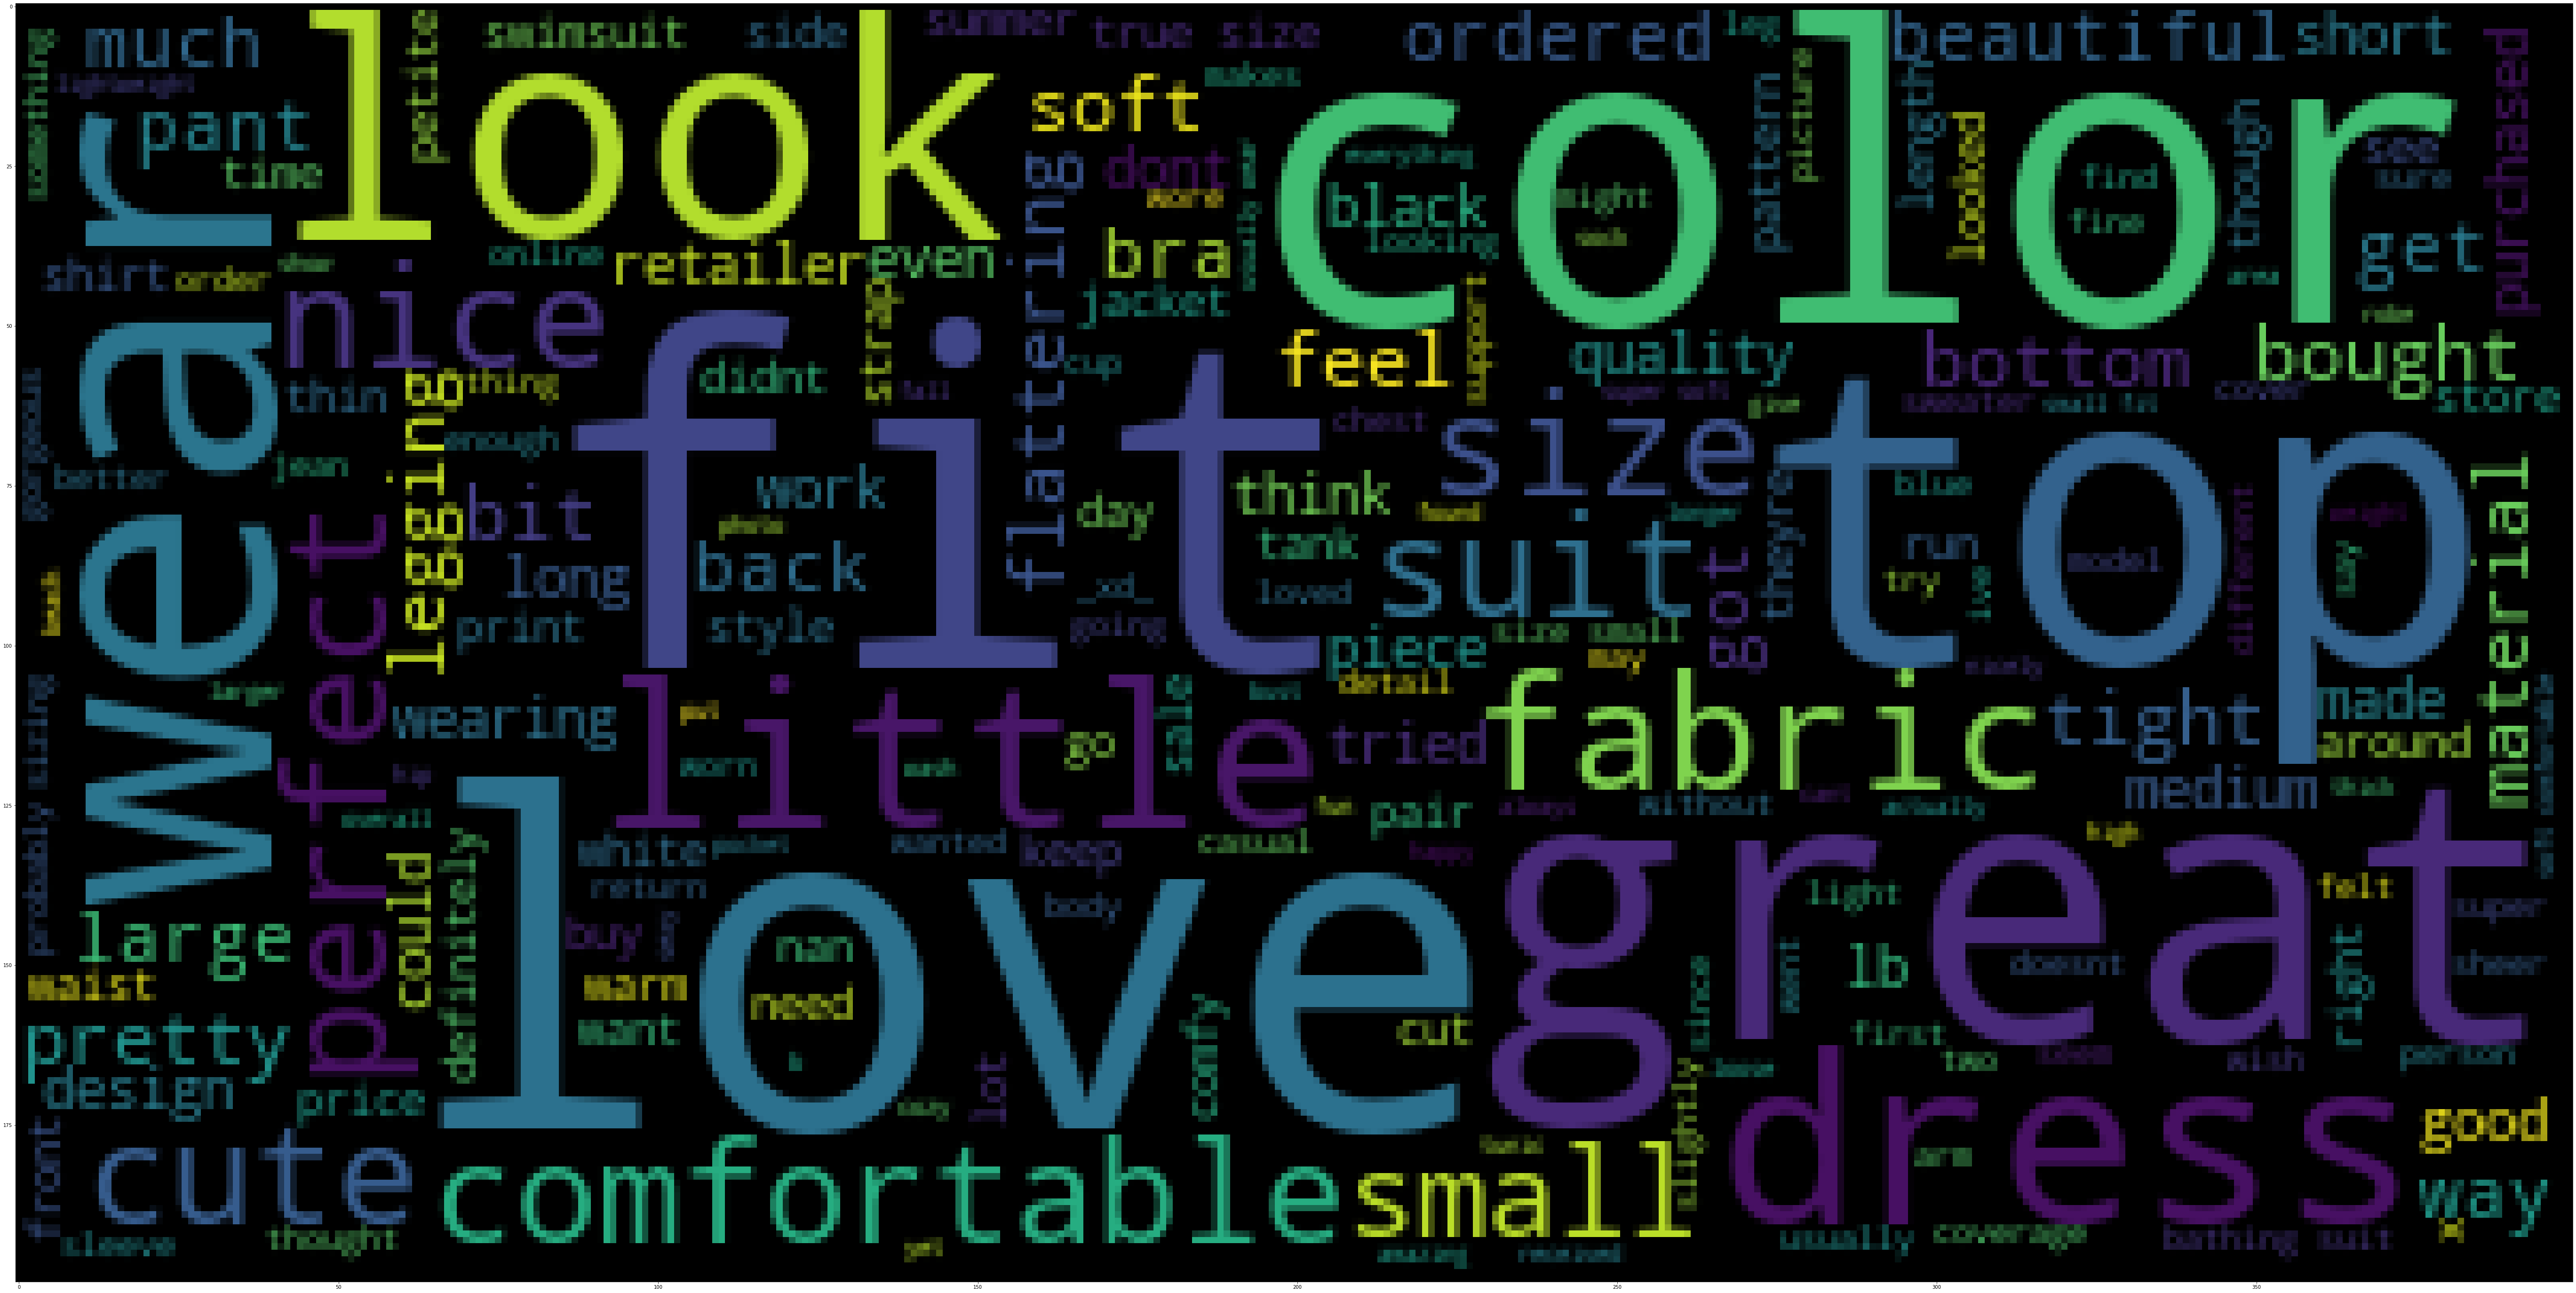

In [75]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(intimate.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

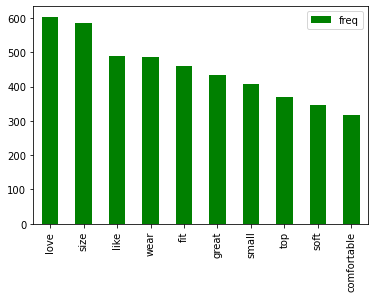

In [76]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
intimate_count = count_vect.fit_transform(intimate)
intimate_count_dtm=pd.DataFrame(intimate_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(intimate_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

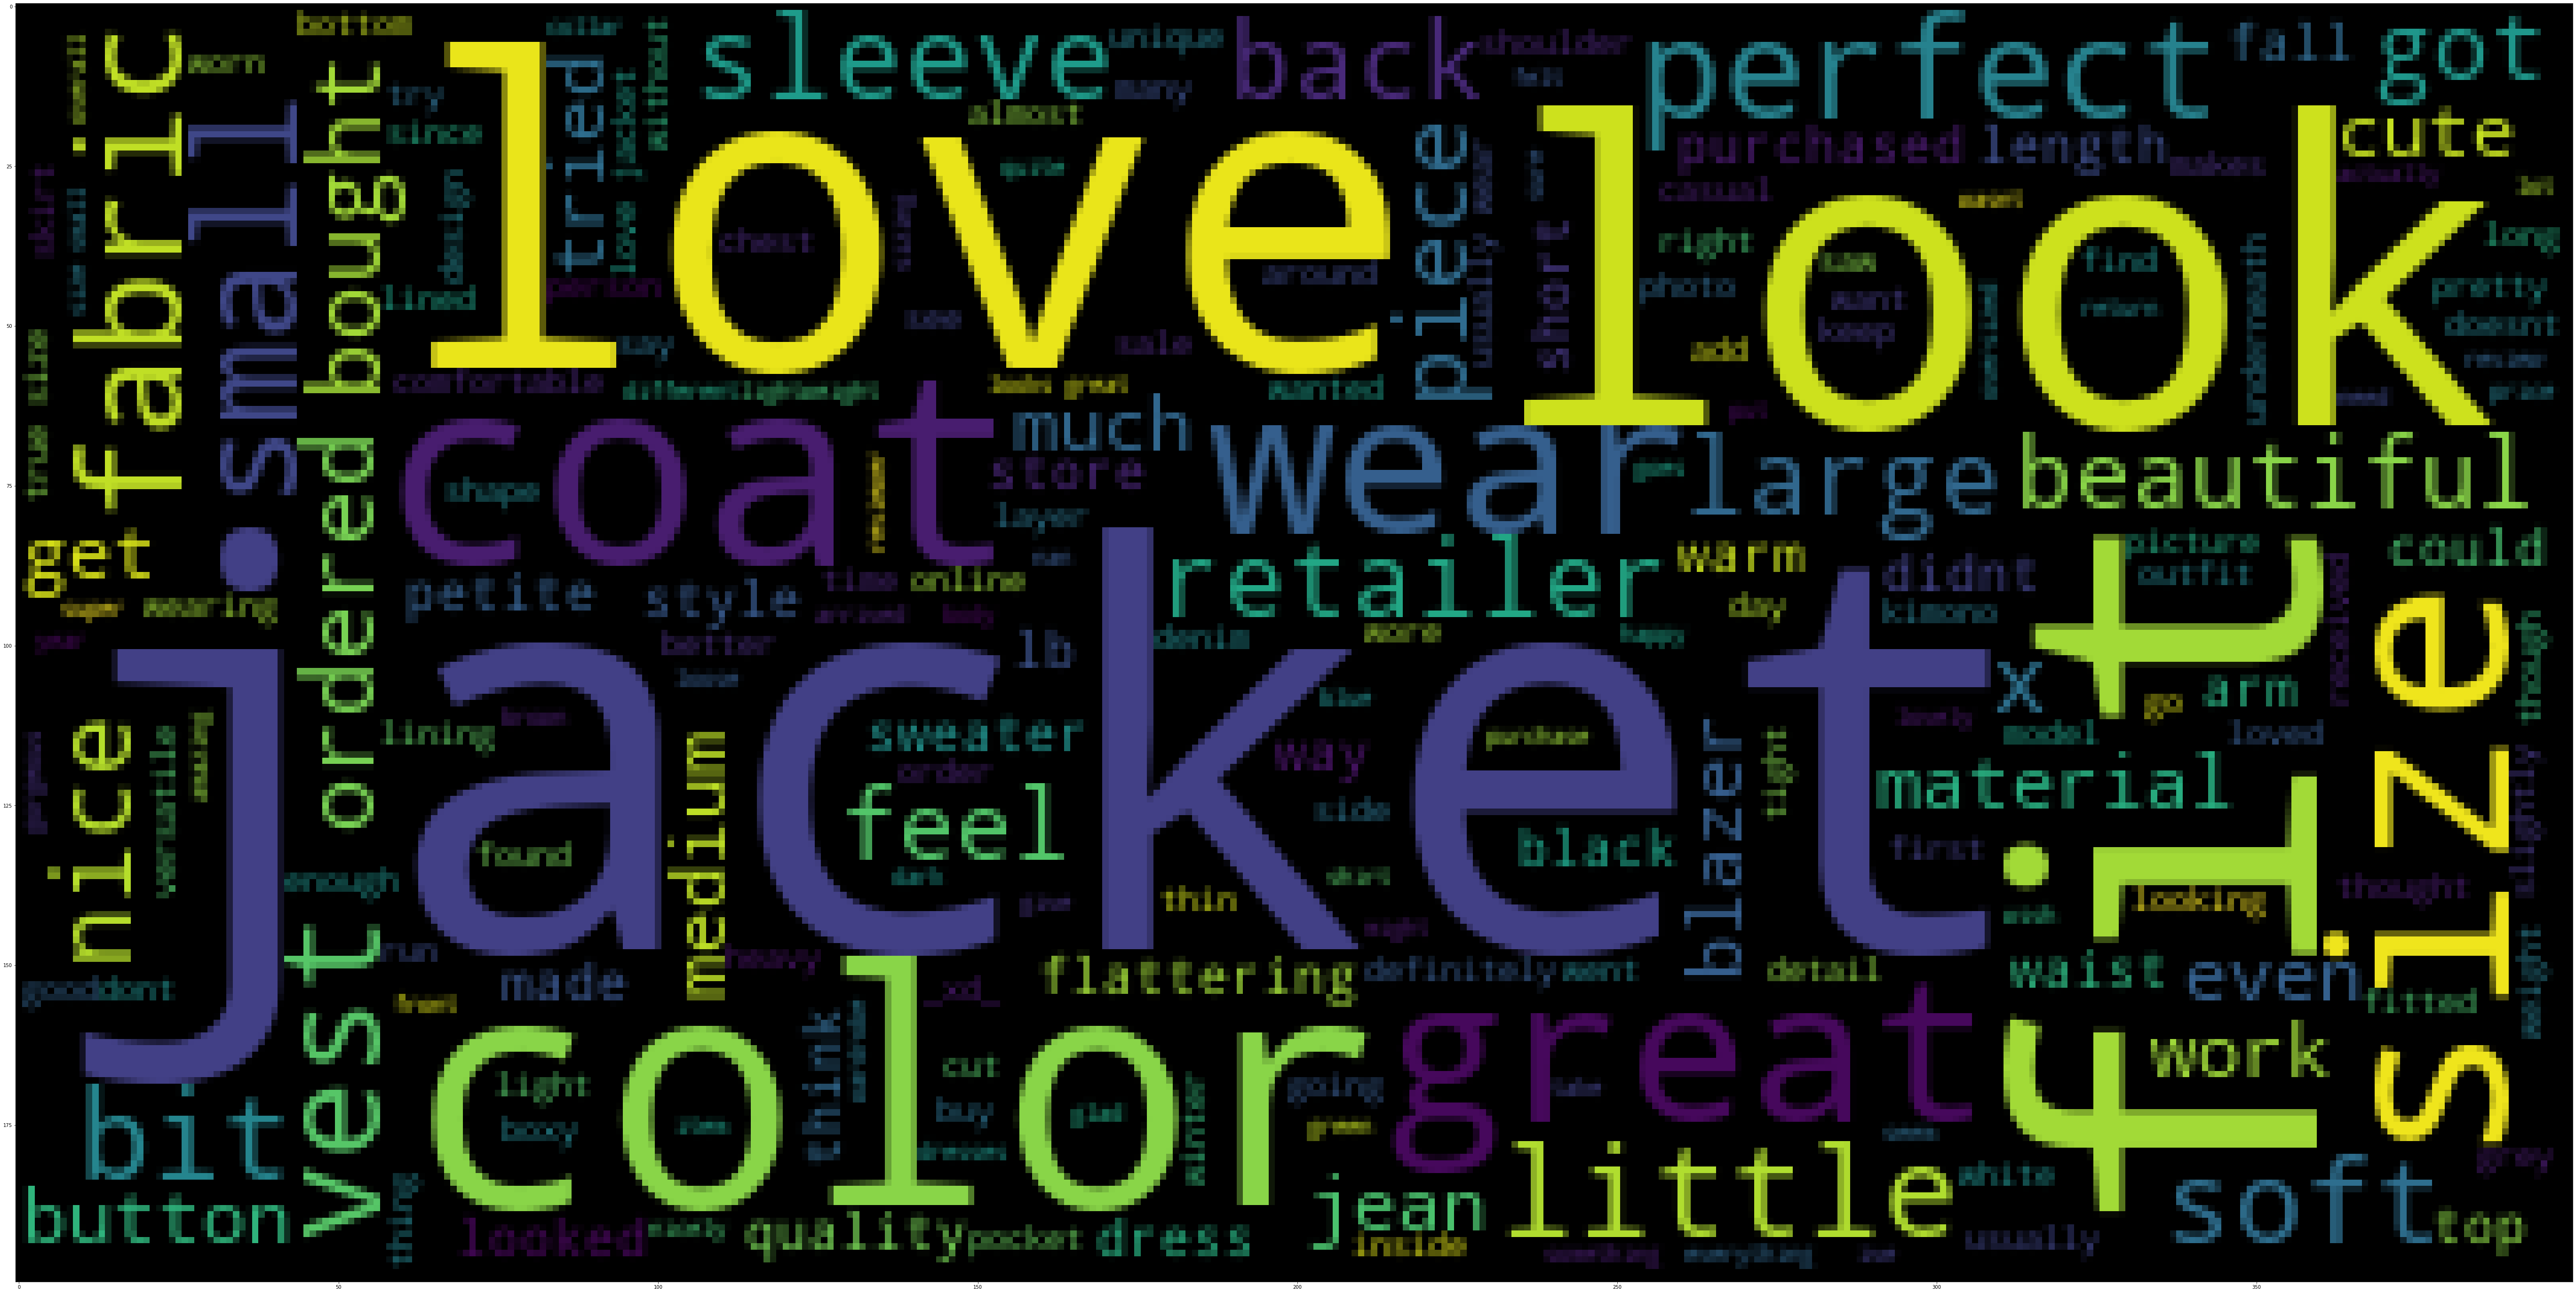

In [77]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(jackets.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

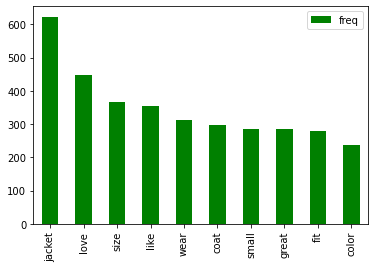

In [78]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
jackets_count = count_vect.fit_transform(jackets)
jackets_count_dtm=pd.DataFrame(jackets_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(jackets_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

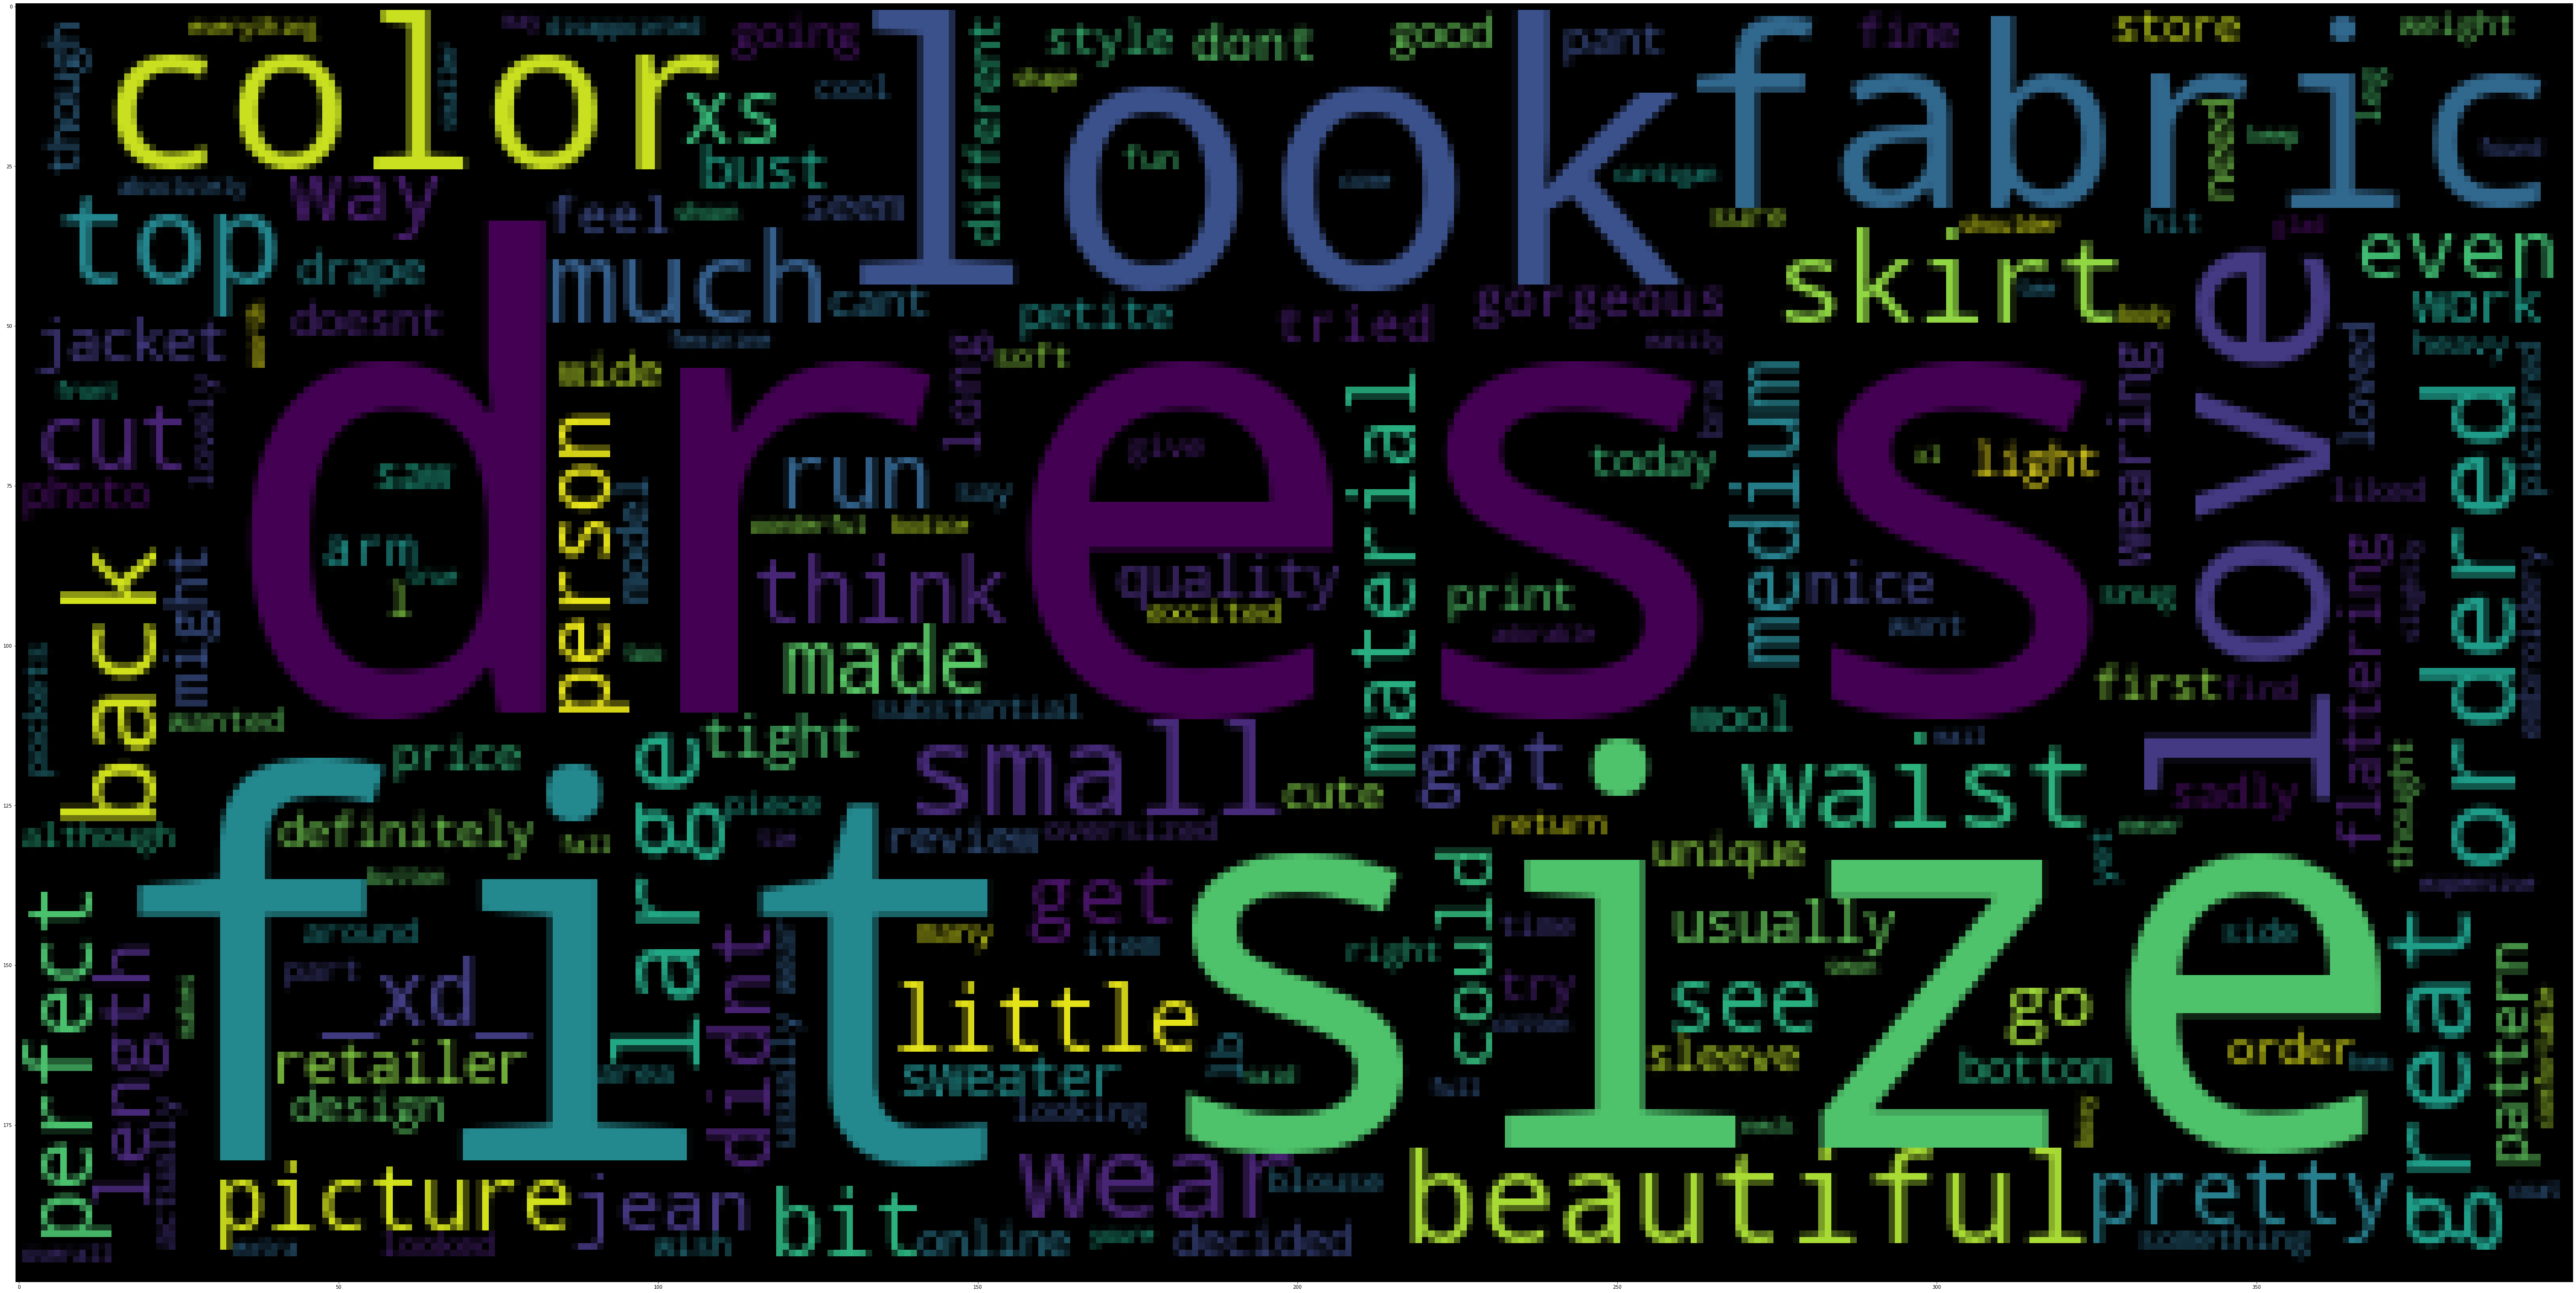

In [79]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(trend.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

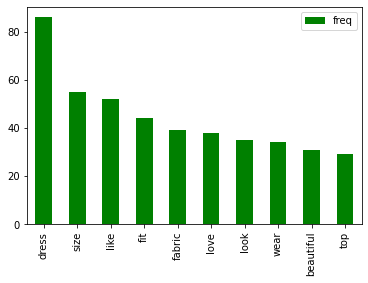

In [80]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
trend_count = count_vect.fit_transform(trend)
trend_count_dtm=pd.DataFrame(trend_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(trend_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

In [81]:
# by location : 

In [82]:
df.location.value_counts()

Gurgaon      8821
Mumbai       7112
Bangalore    5224
Chennai      2329
Name: location, dtype: int64

In [83]:
gurgaon = df.reviews[df.location == "Gurgaon"]
mumbai = df.reviews[df.location == "Mumbai"]
bangalore = df.reviews[df.location == "Bangalore"]
chennai = df.reviews[df.location == "Chennai"]


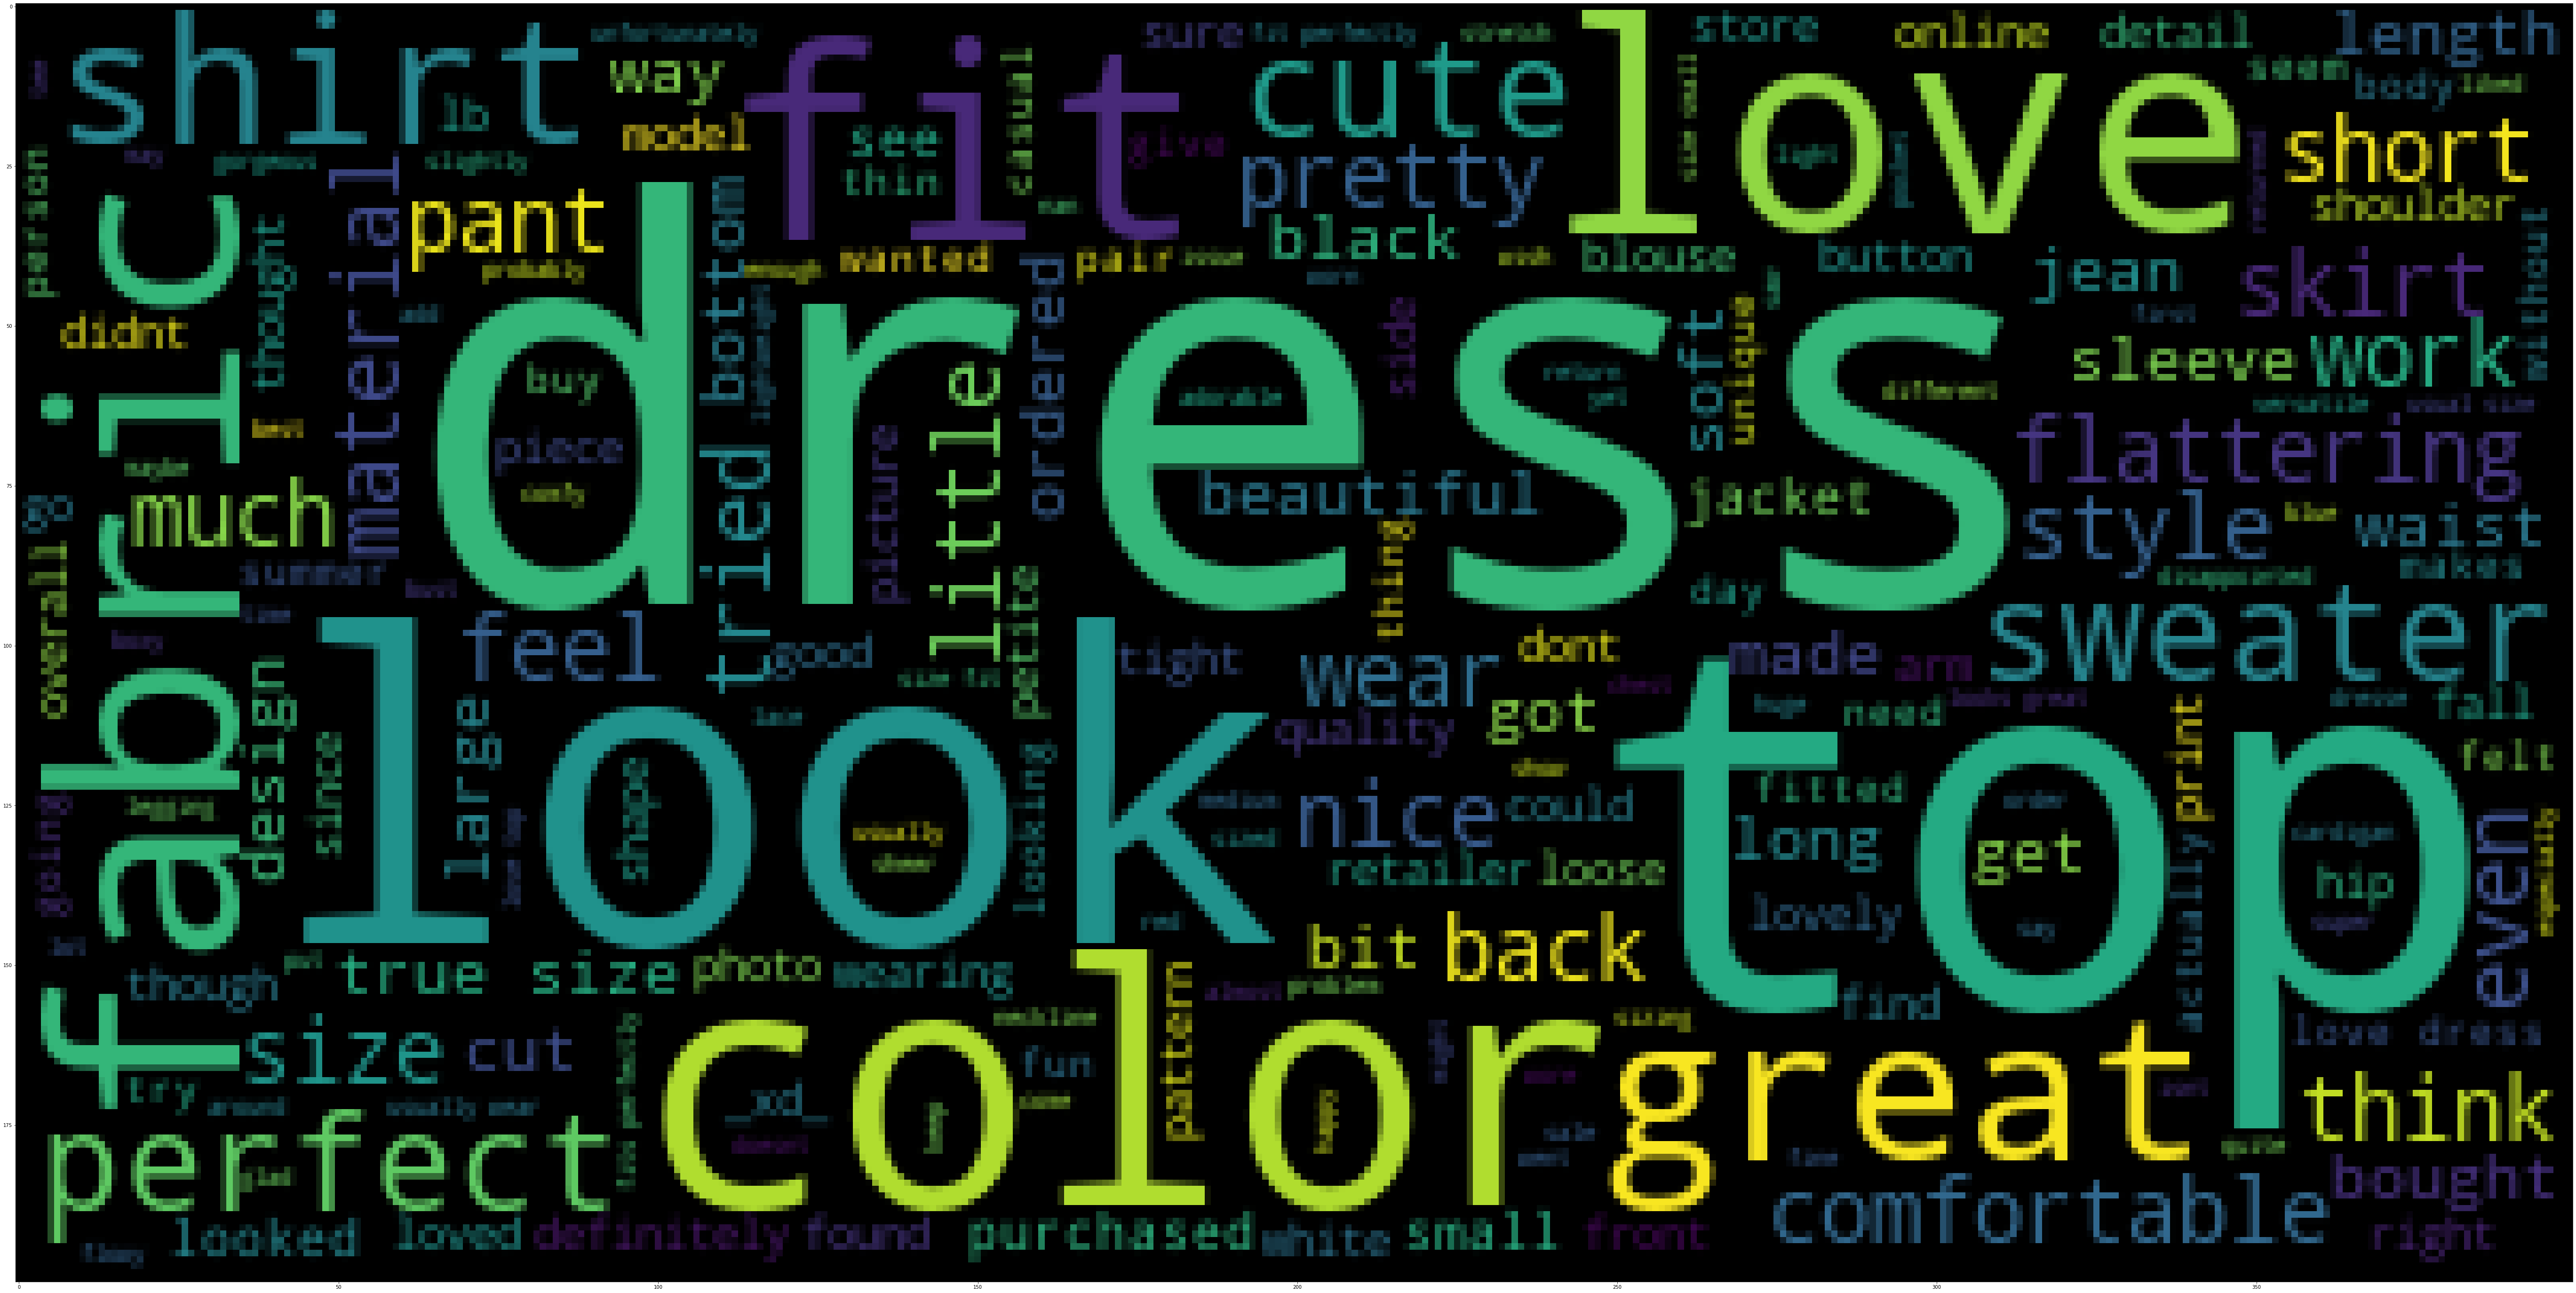

In [84]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(gurgaon.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

<AxesSubplot:>

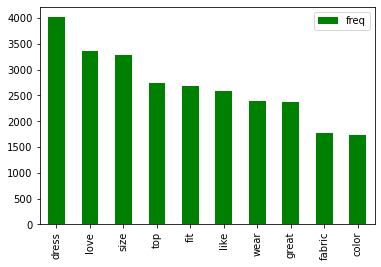

In [85]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
gurgaon_count = count_vect.fit_transform(gurgaon)
gurgaon_count_dtm=pd.DataFrame(gurgaon_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(gurgaon_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

<AxesSubplot:>

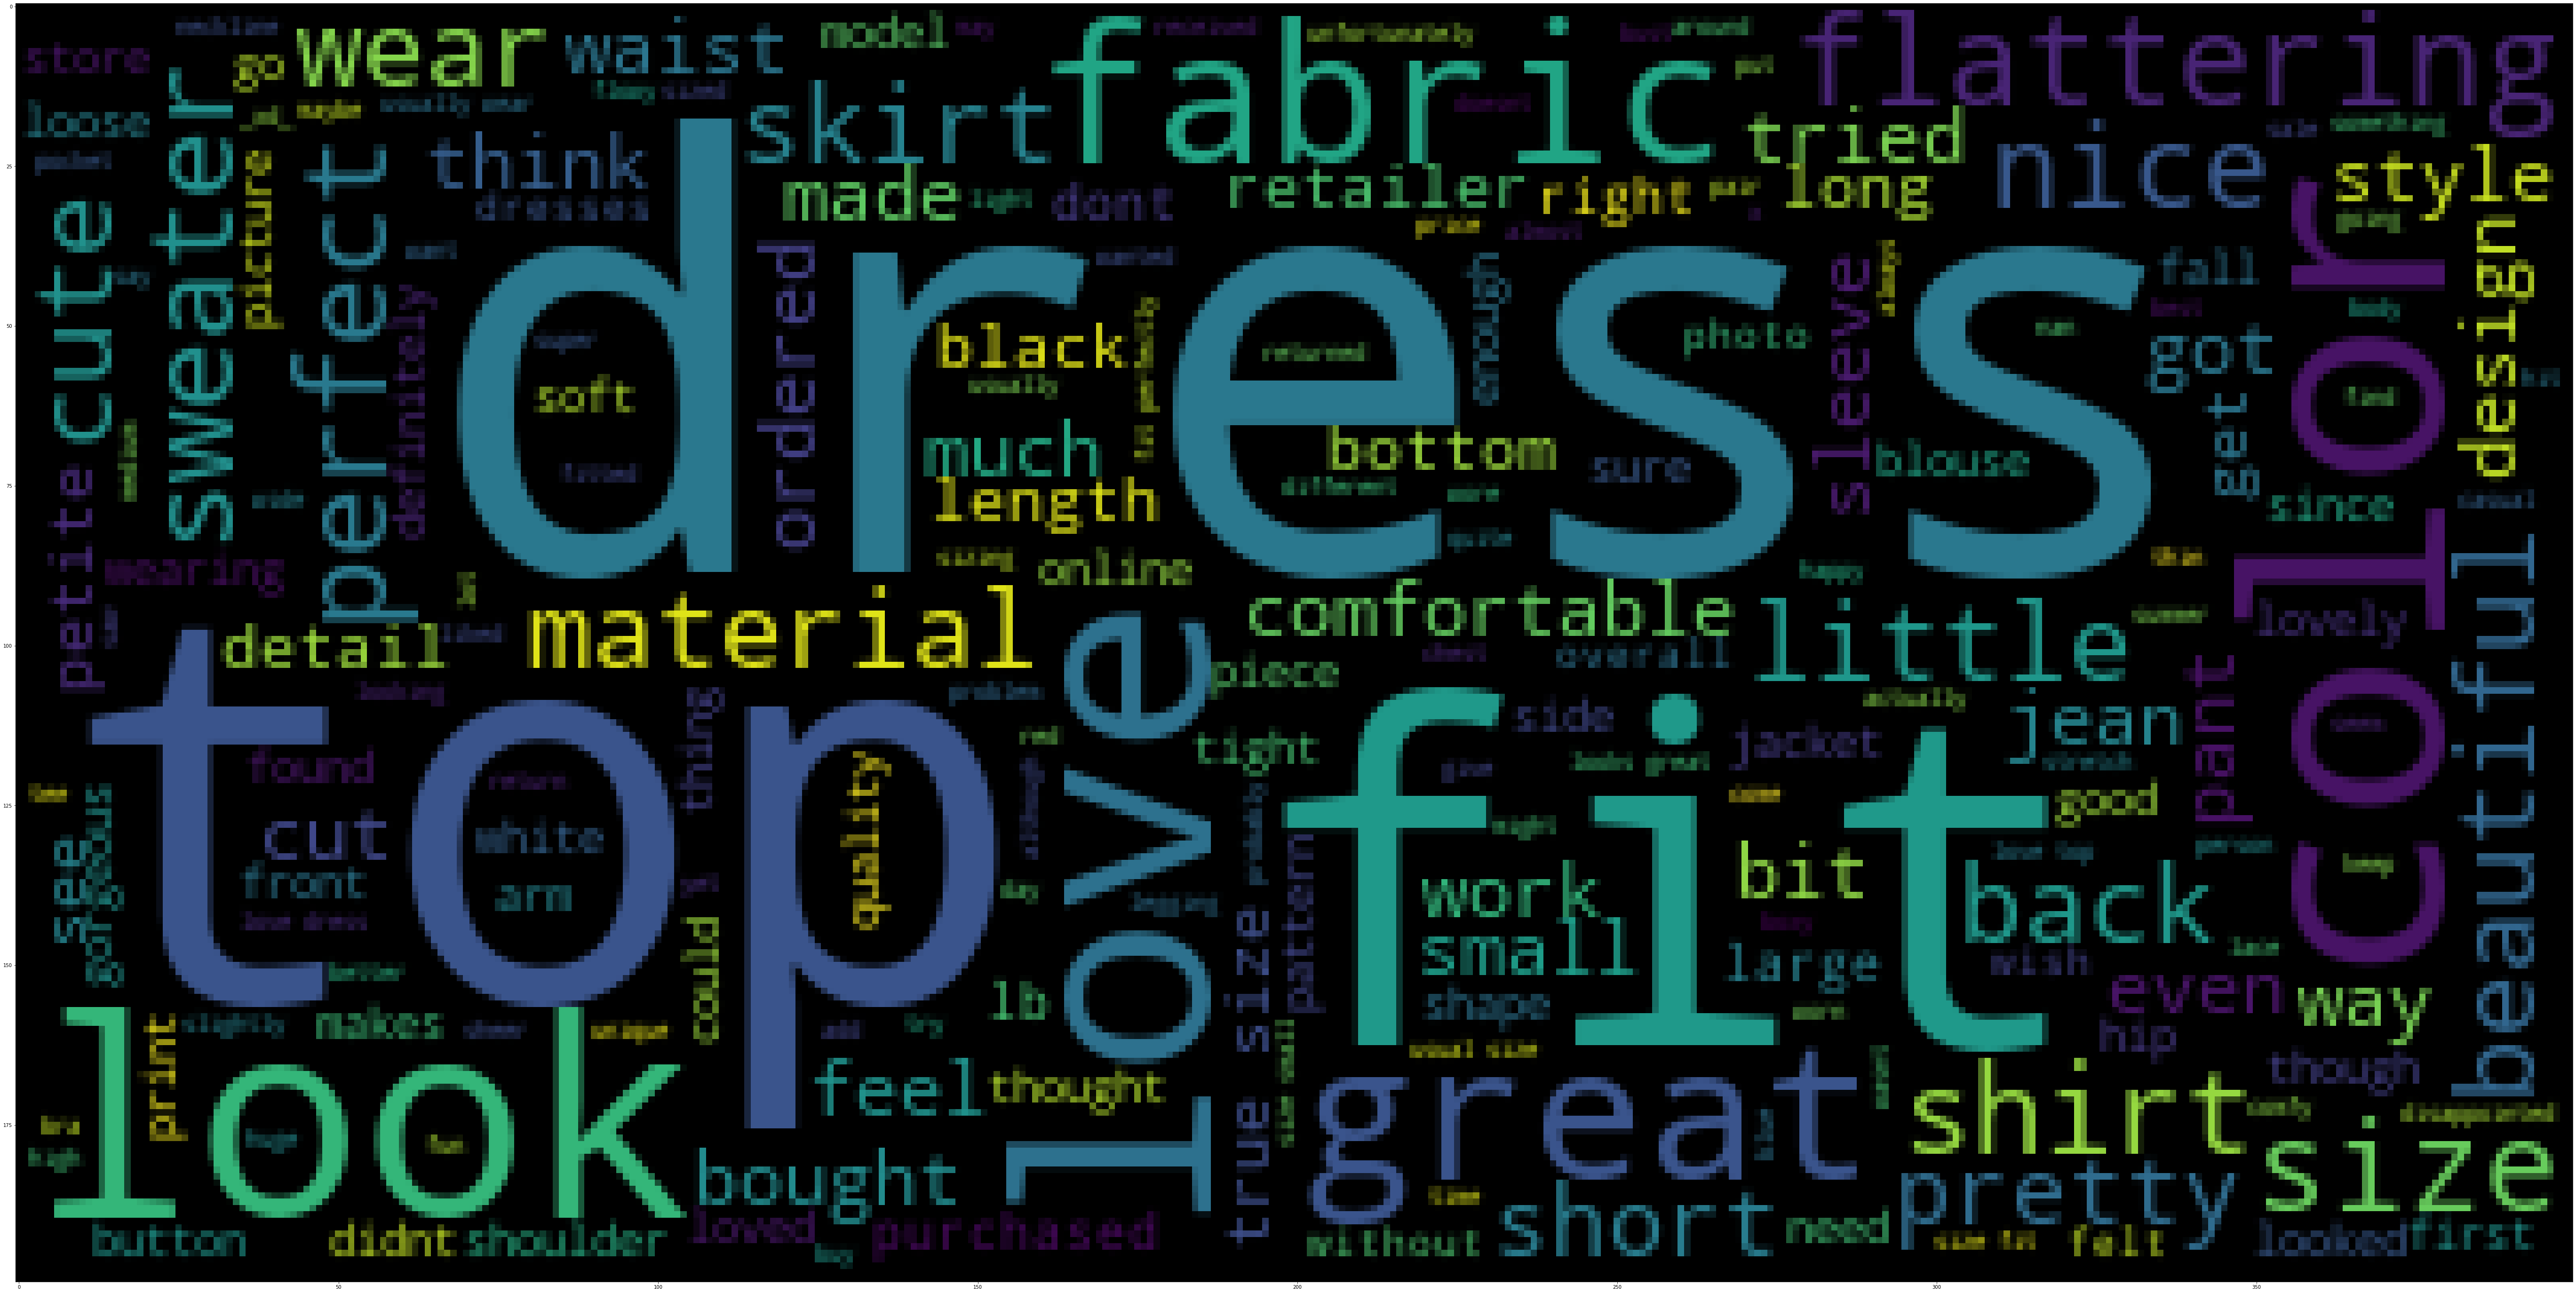

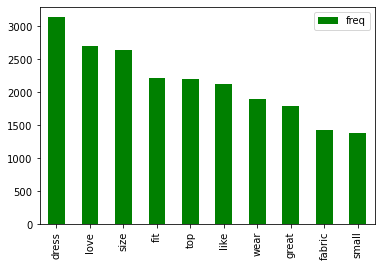

In [86]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(mumbai.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
mumbai_count = count_vect.fit_transform(mumbai)
mumbai_count_dtm=pd.DataFrame(mumbai_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(mumbai_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

<AxesSubplot:>

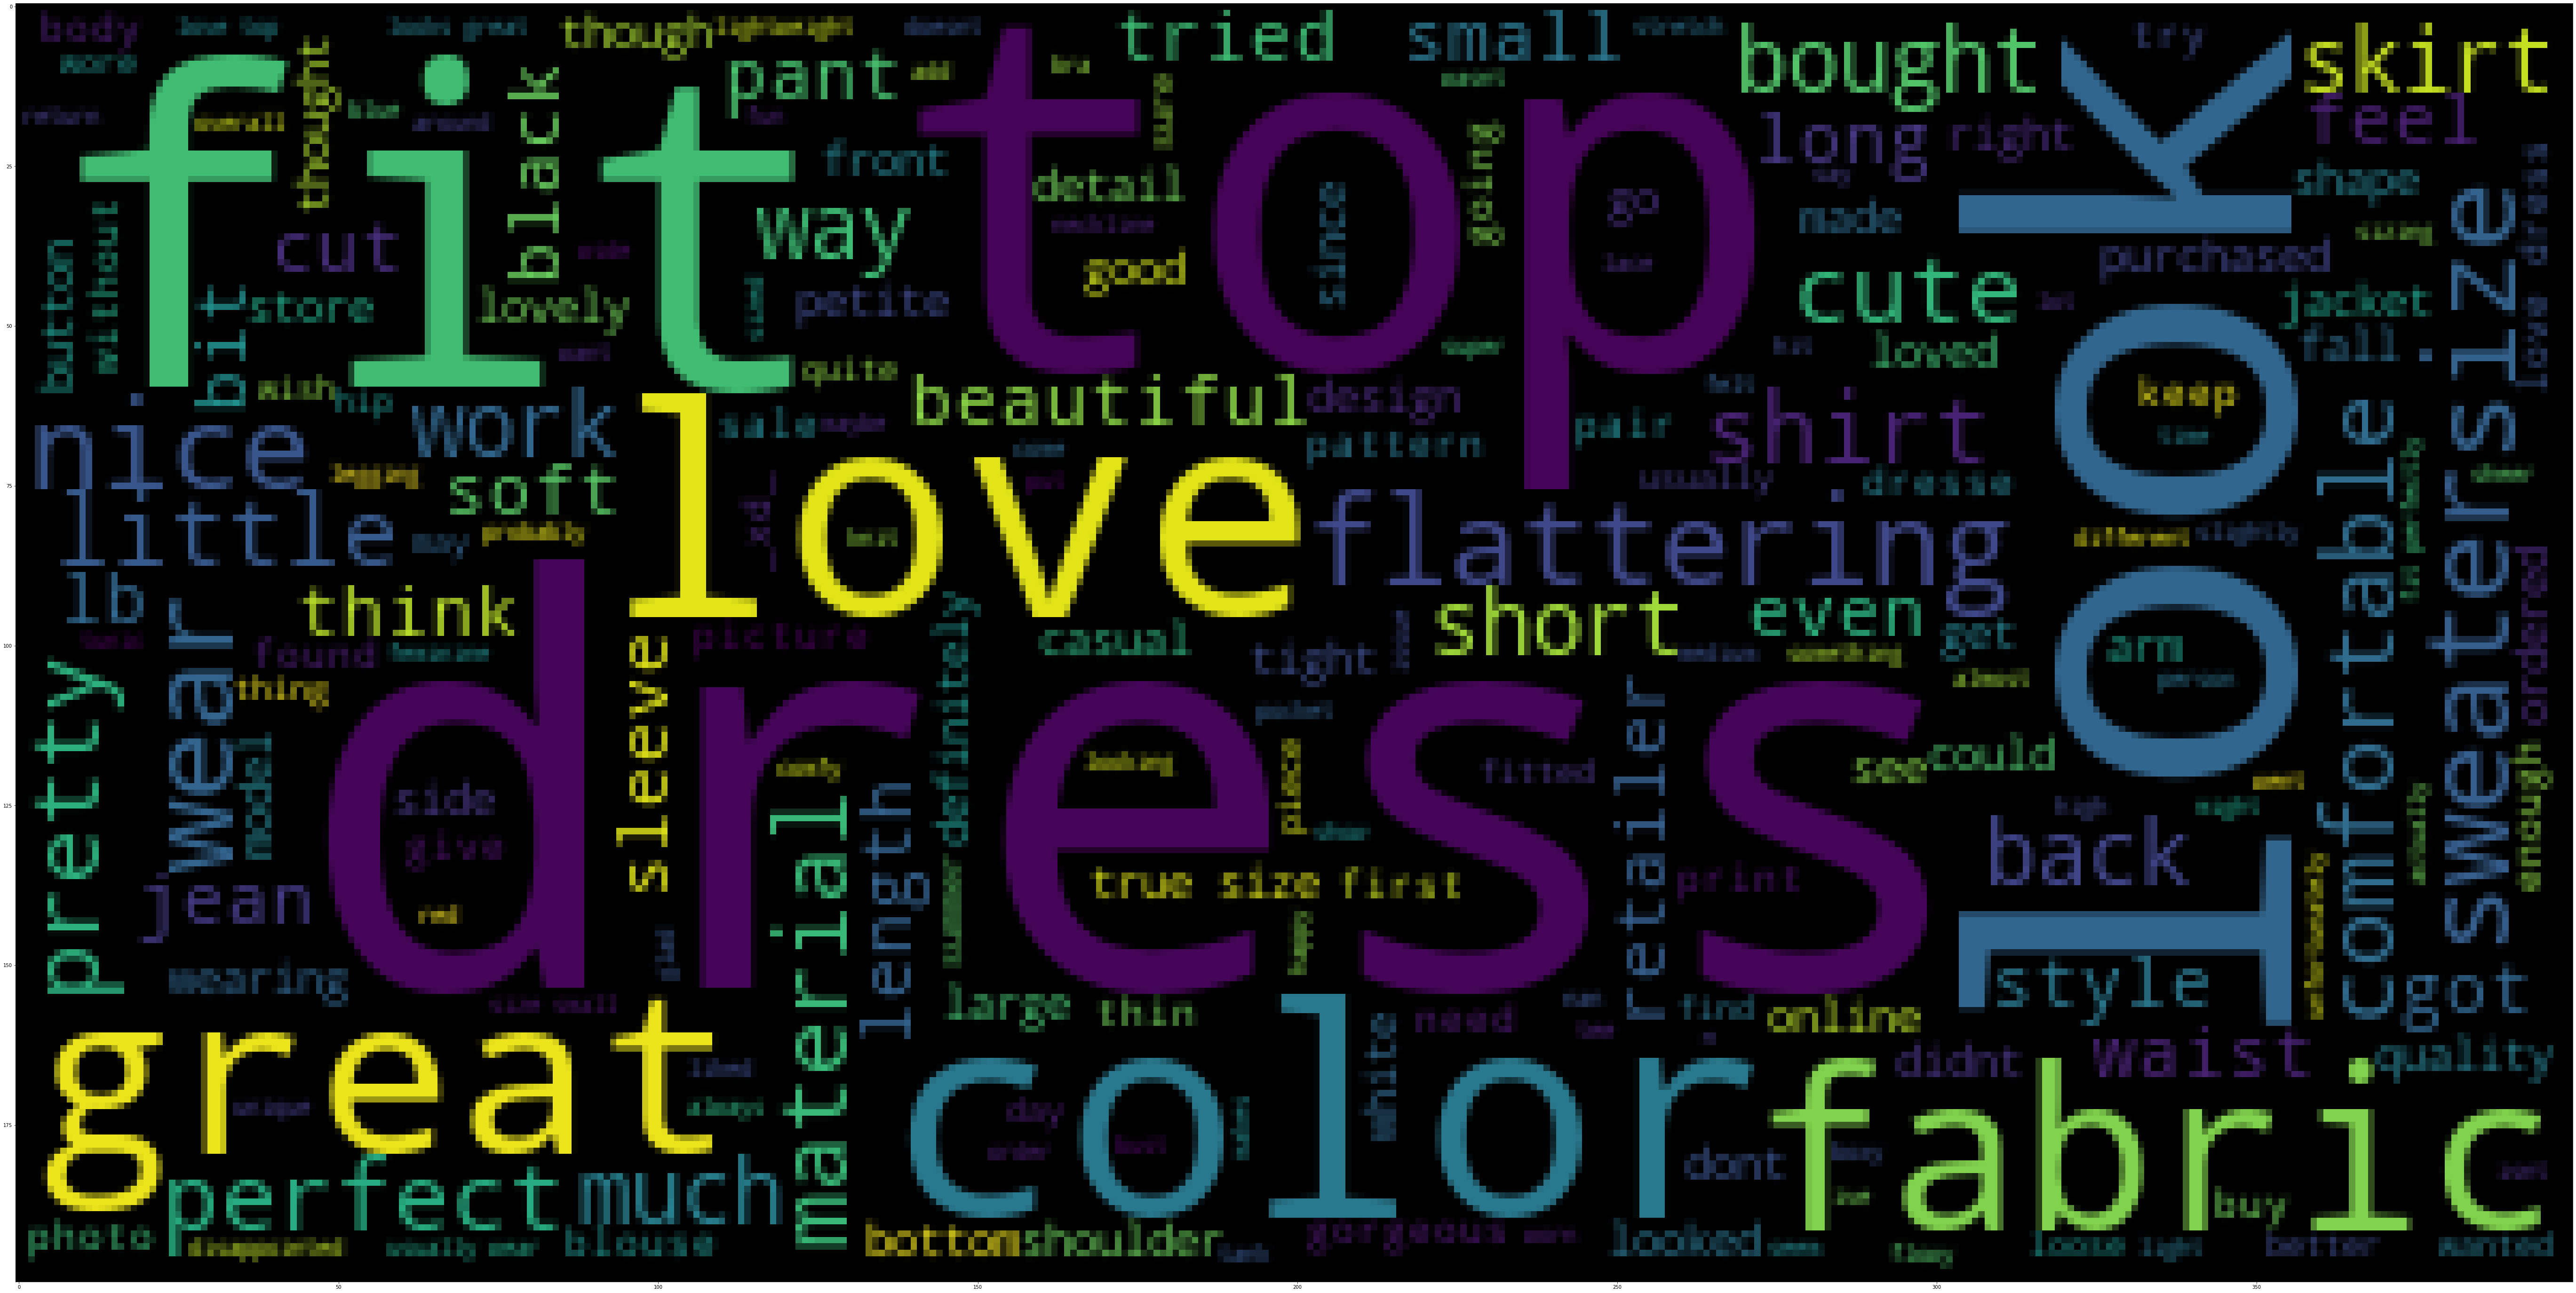

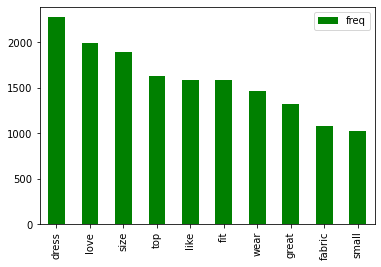

In [87]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(bangalore.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
bangalore_count = count_vect.fit_transform(bangalore)
bangalore_count_dtm=pd.DataFrame(bangalore_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(bangalore_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

<AxesSubplot:>

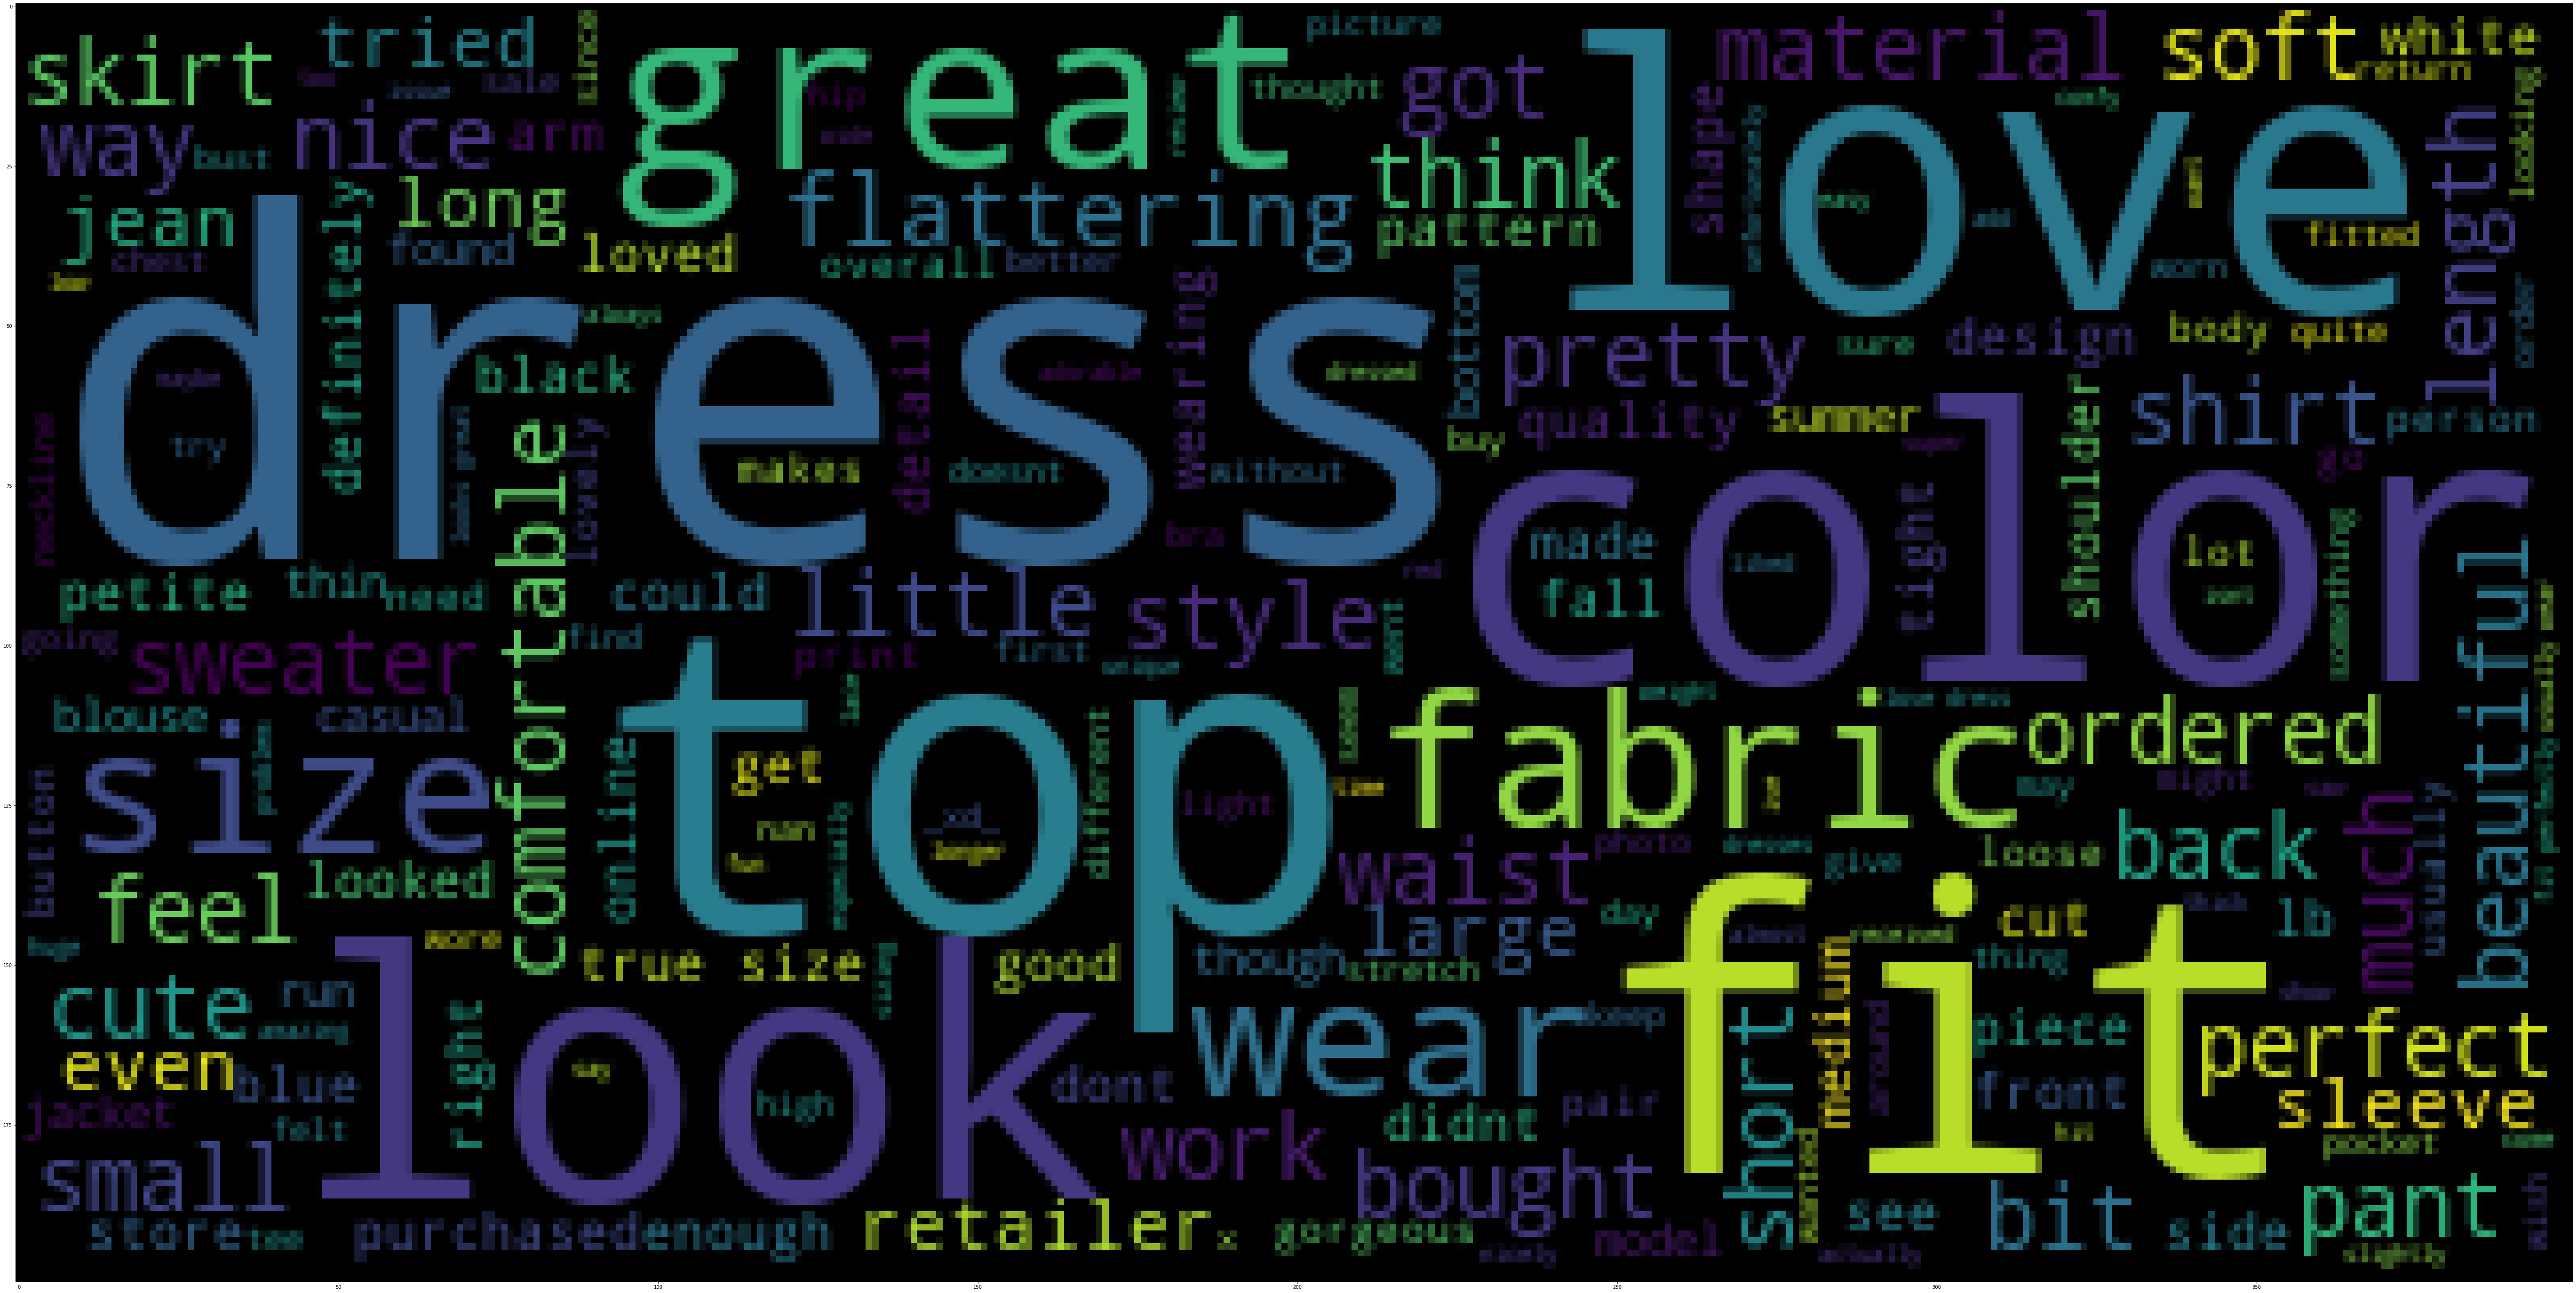

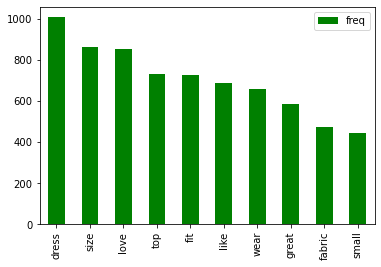

In [88]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(chennai.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
chennai_count = count_vect.fit_transform(chennai)
chennai_count_dtm=pd.DataFrame(chennai_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(chennai_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

In [89]:
## By channel : 

In [90]:
web = df.reviews[df.channel == "Web"]
mobile = df.reviews[df.channel == "Mobile"]

<AxesSubplot:>

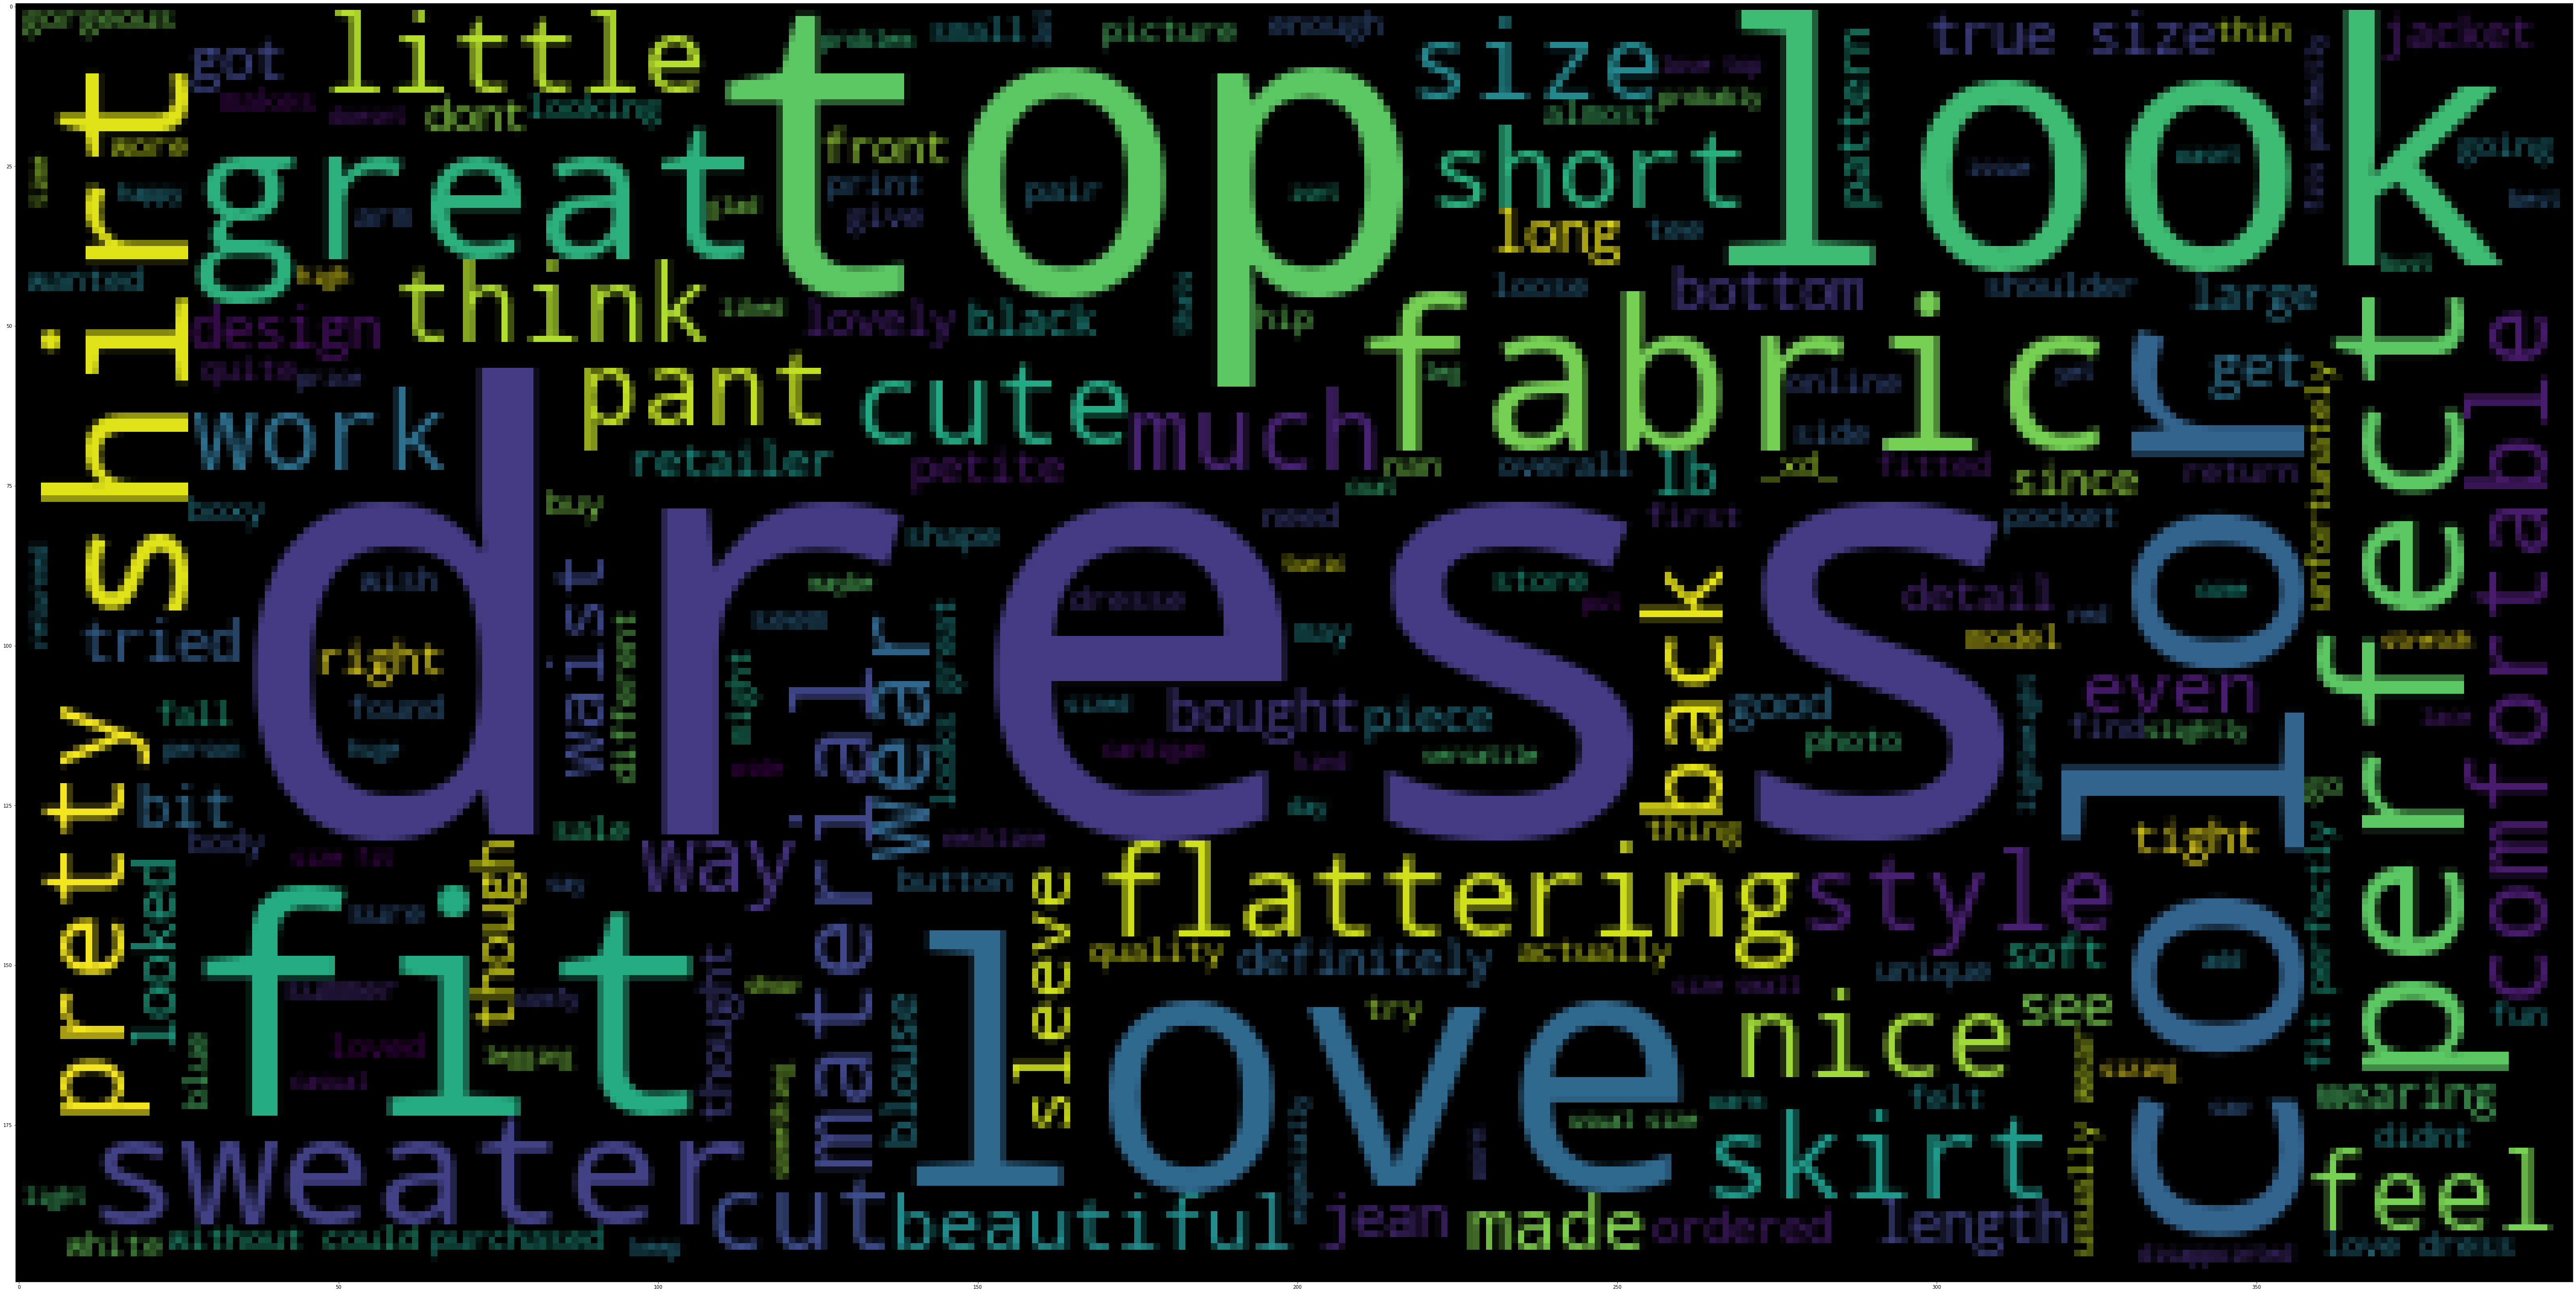

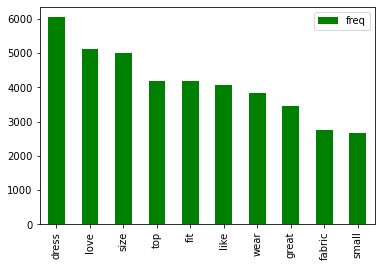

In [91]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(web.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
web_count = count_vect.fit_transform(web)
web_count_dtm=pd.DataFrame(web_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(web_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

<AxesSubplot:>

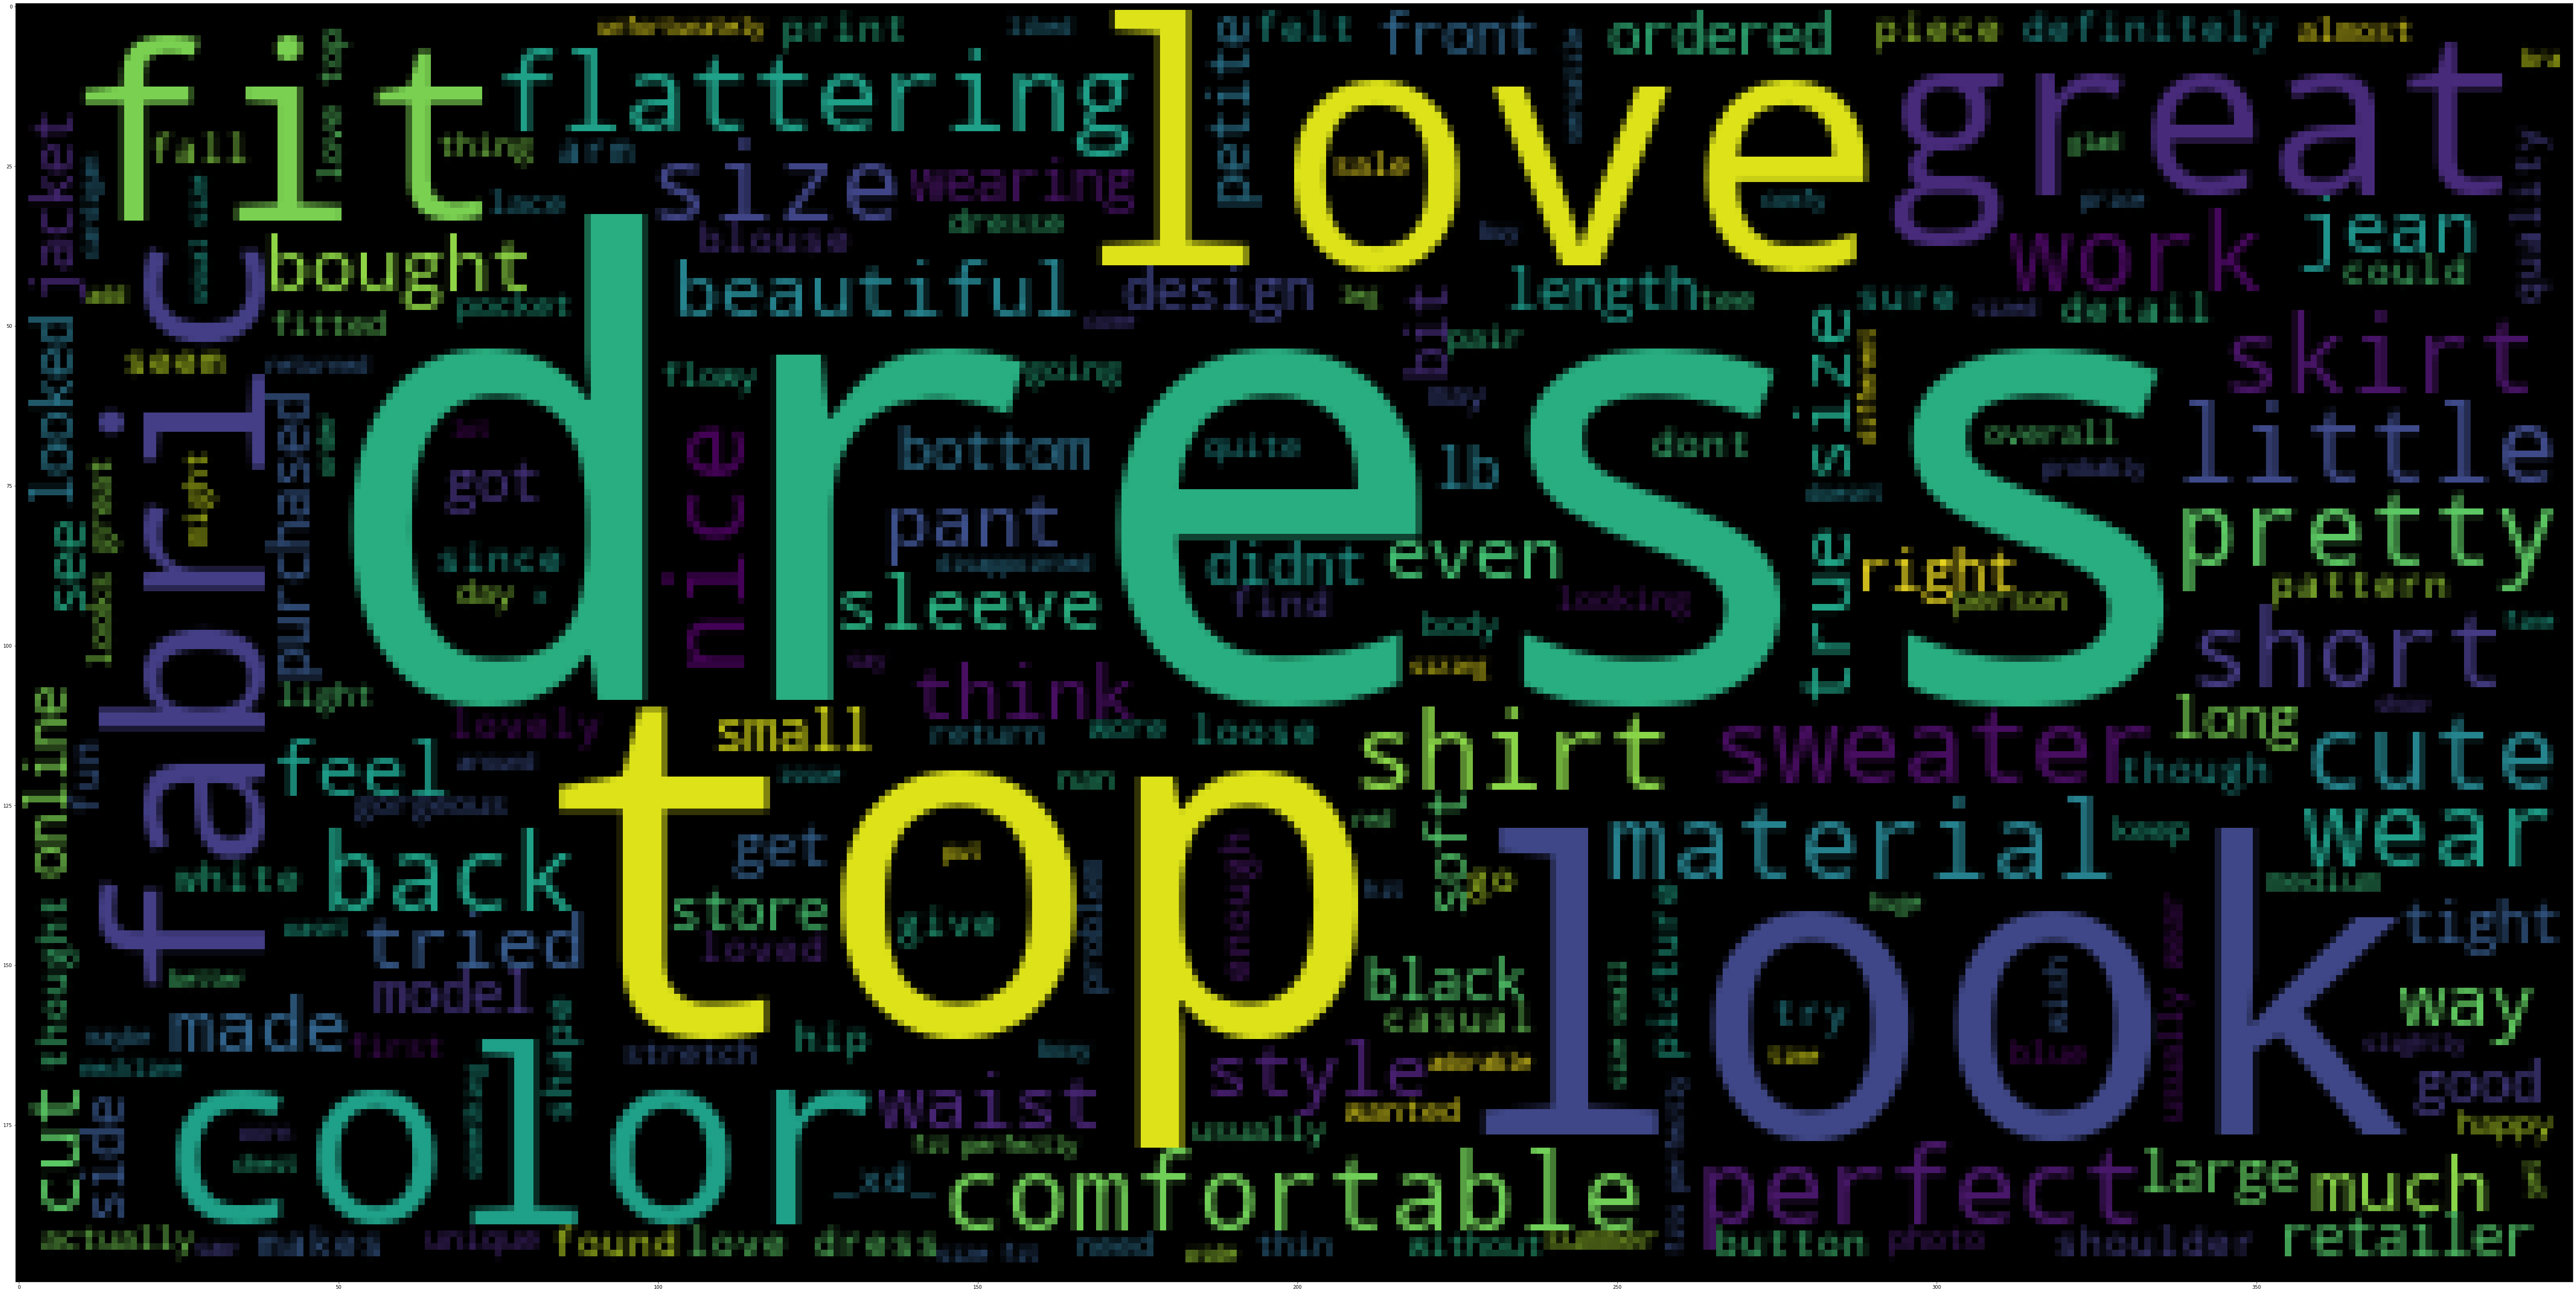

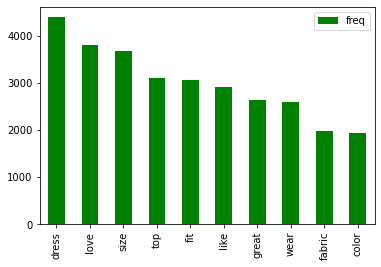

In [92]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(mobile.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
mobile_count = count_vect.fit_transform(mobile)
mobile_count_dtm=pd.DataFrame(mobile_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(mobile_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

In [93]:
df["age_group"] = np.where(df.customer_age<=24 , "Youth" ,np.where(df.customer_age<=50 , "Adults", "Seniors"))

In [94]:
youth = df.reviews[df.age_group == "Youth"]
adult = df.reviews[df.age_group == "Adults"]
seniors = df.reviews[df.age_group == "Seniors"]

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

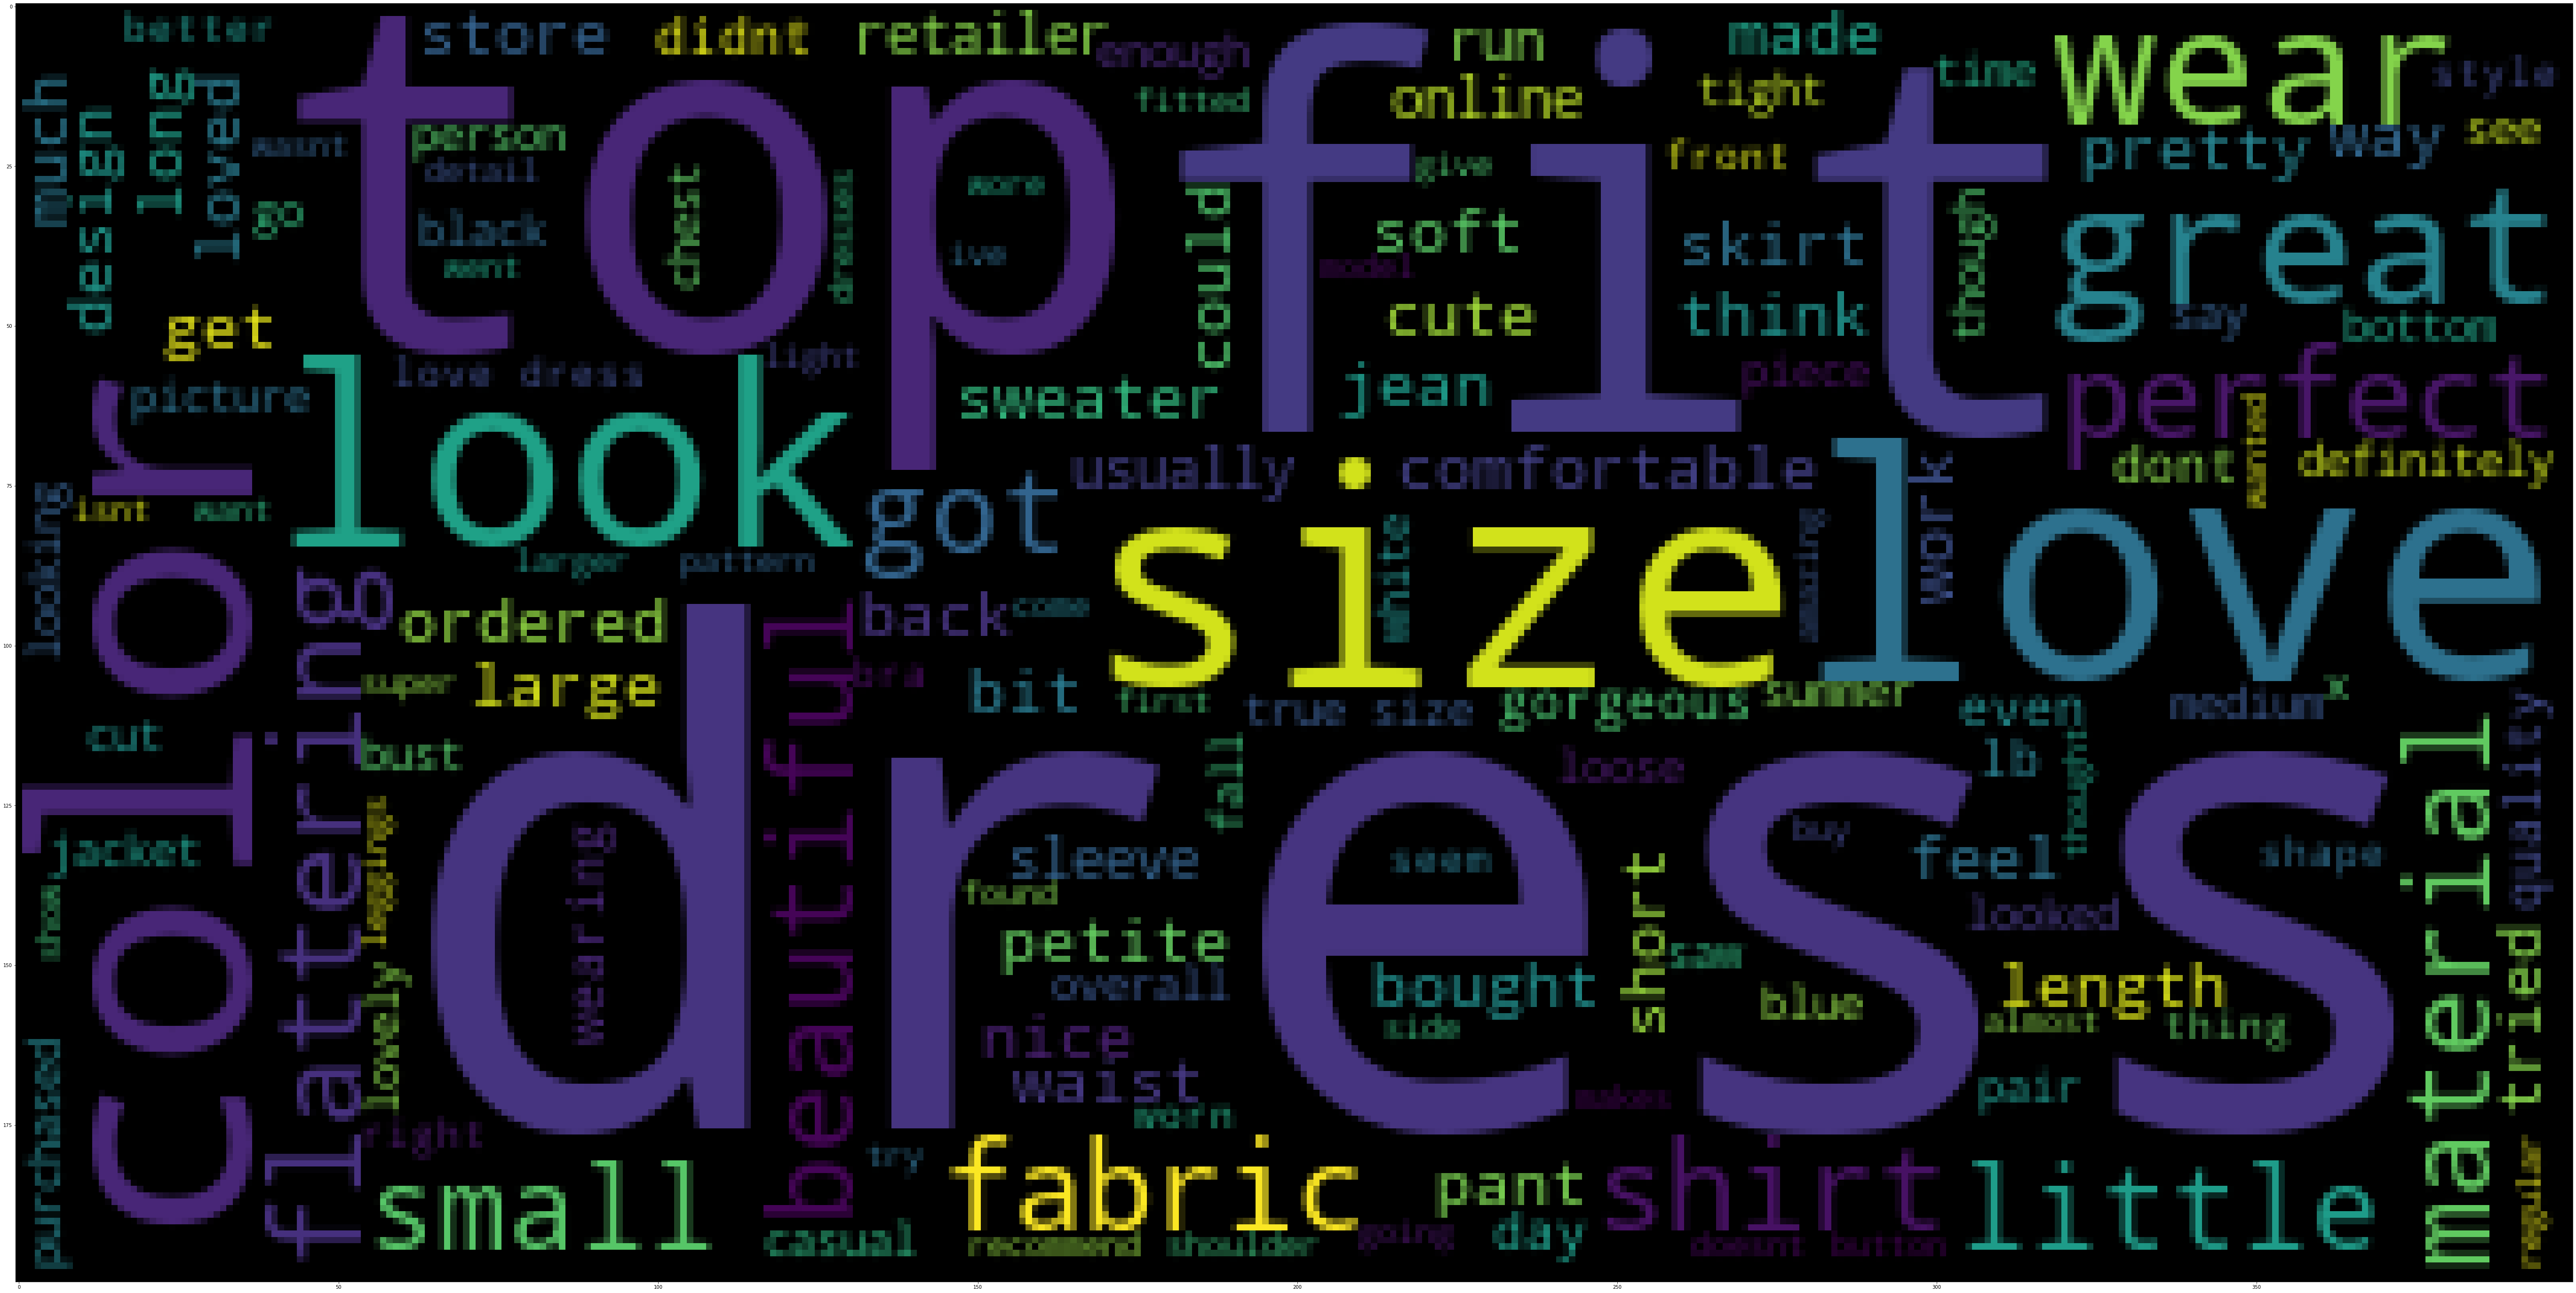

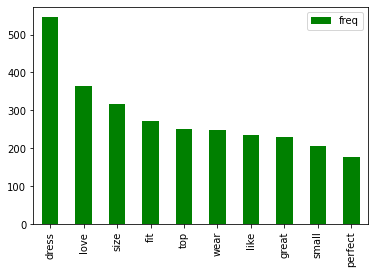

In [95]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(youth.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
youth_count = count_vect.fit_transform(youth)
youth_count_dtm=pd.DataFrame(youth_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(youth_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

<AxesSubplot:>

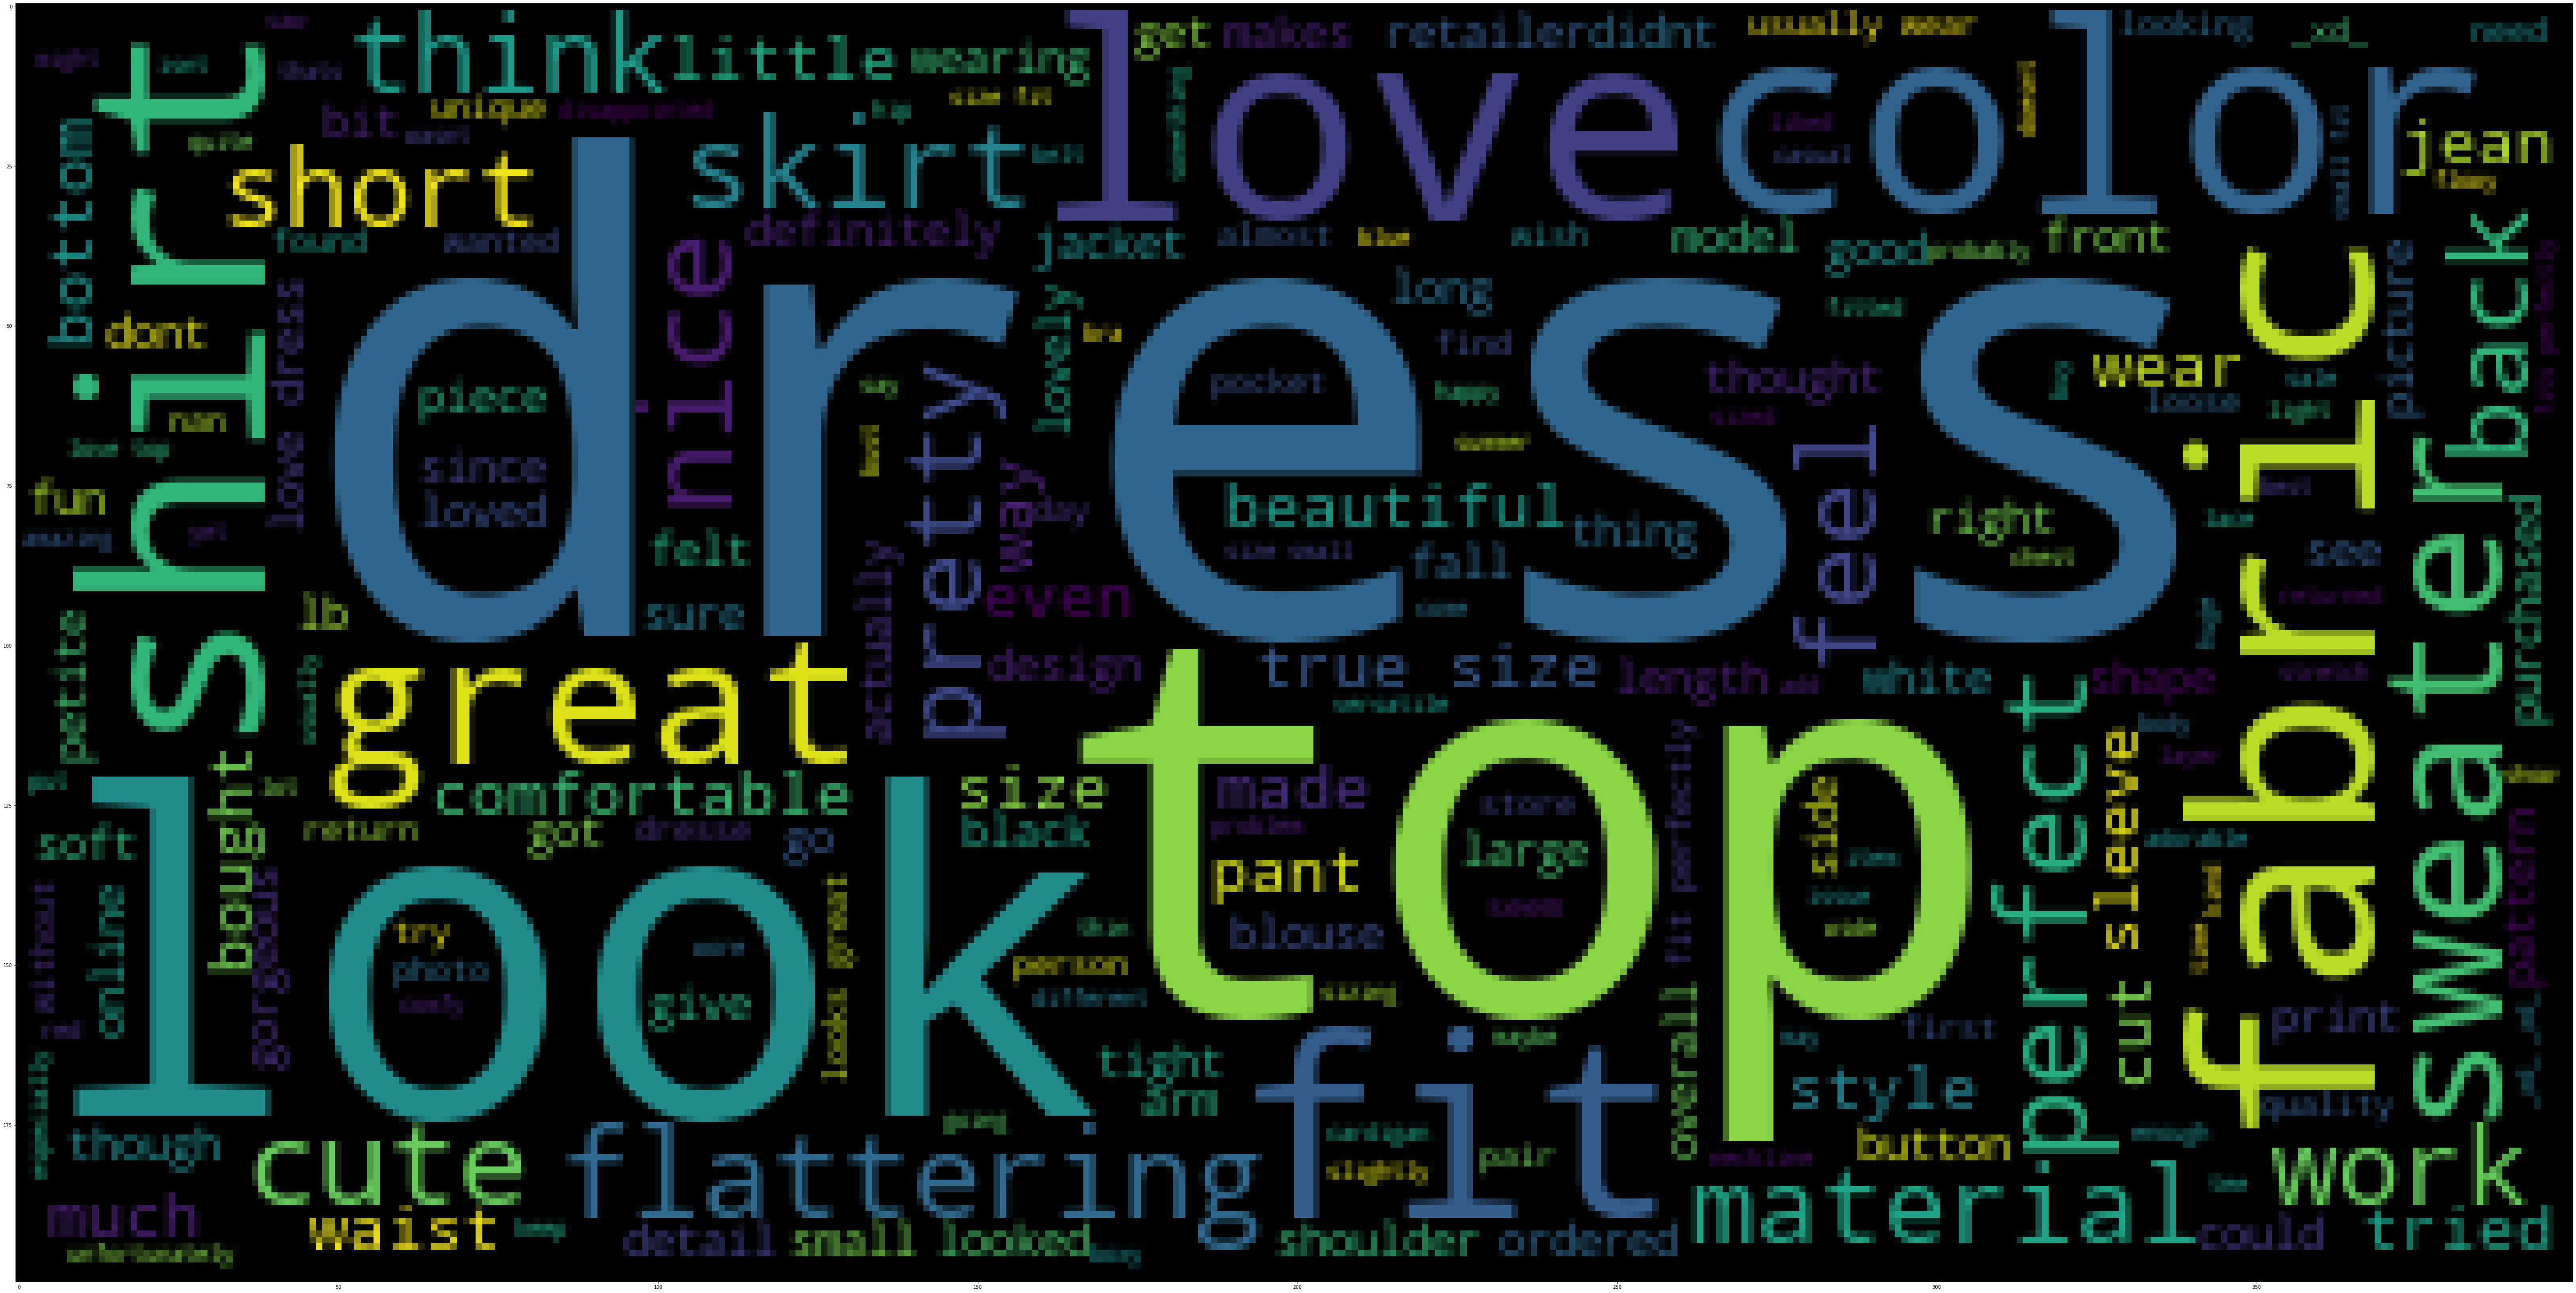

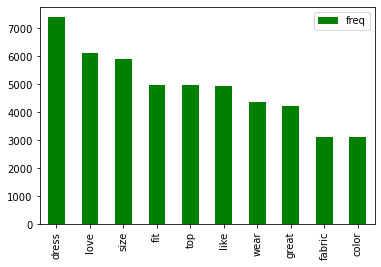

In [96]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(adult.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
adult_count = count_vect.fit_transform(adult)
adult_count_dtm=pd.DataFrame(adult_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(adult_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

<AxesSubplot:>

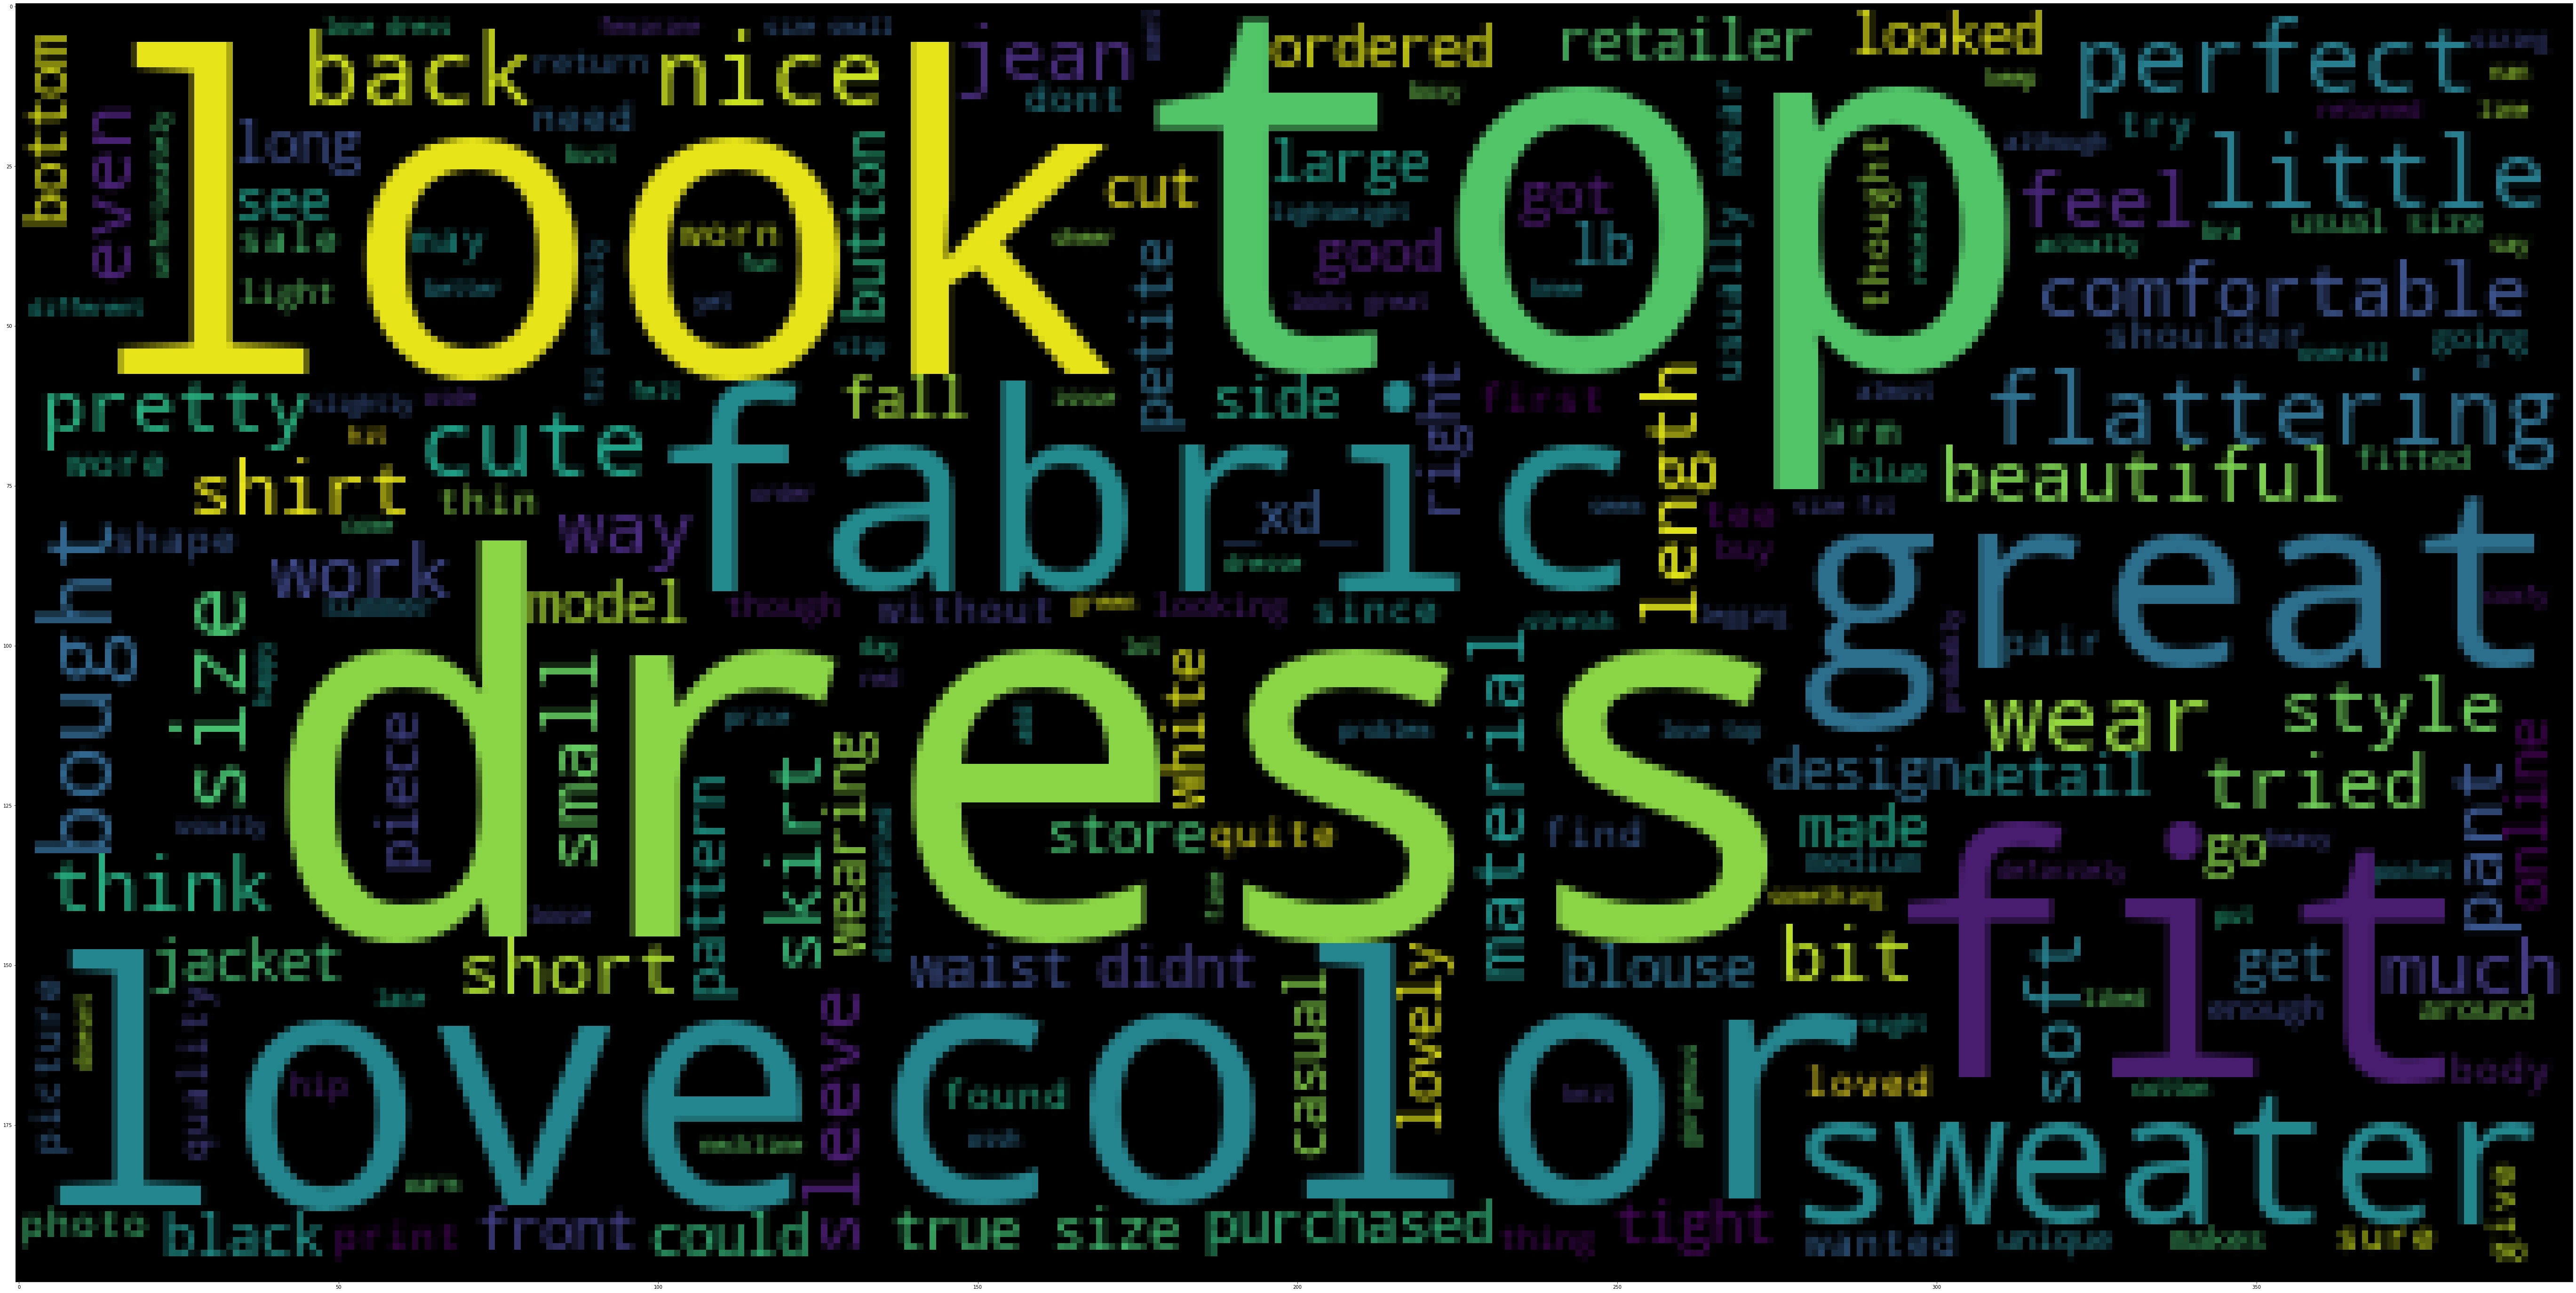

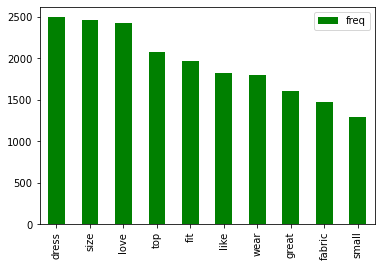

In [97]:
stopcat = set(list(stop)+['also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(seniors.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ),
                             stop_words=['also', 'im', 'would'],
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=100)
seniors_count = count_vect.fit_transform(seniors)
seniors_count_dtm=pd.DataFrame(seniors_count.todense(), columns = count_vect.get_feature_names())

word_freq = pd.DataFrame(seniors_count_dtm.apply(sum), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

word_freq.head(10).plot(kind='bar', color='Green')

In [98]:
## Word association : 

In [99]:
## based on category : 

In [100]:
corr = general_cat_dtm.corrwith(general_cat_dtm.dress) #word similarity General  category 
corr.sort_values(ascending=False).index[1]

'beautiful'

In [101]:
corr = gp_cat_dtm.corrwith(gp_cat_dtm.dress) #word similarity General Petite category
corr.sort_values(ascending=False).index[1]

'summer'

In [102]:
corr = intimate_count_dtm.corrwith(intimate_count_dtm.love) #word similarity Initmates category 
corr.sort_values(ascending=False).index[1]

'much'

In [103]:
## based on subcategory1 :

In [104]:
corr = tops_count_dtm.corrwith(tops_count_dtm.top) #word similarity  top sub category 
corr.sort_values(ascending=False).index[1]

'tops'

In [105]:
corr = dress_count_dtm.corrwith(dress_count_dtm.dress) #word similarity  dress sub category 
corr.sort_values(ascending=False).index[1]

'made'

In [106]:
corr = bottoms_count_dtm.corrwith(bottoms_count_dtm.fit) #word similarity bottom sub  category 
corr.sort_values(ascending=False).index[1]

'perfectly'

In [107]:
corr = intimate_count_dtm.corrwith(intimate_count_dtm.love) #word similarity Initmates sub category 
corr.sort_values(ascending=False).index[1]

'much'

In [108]:
corr = jackets_count_dtm.corrwith(jackets_count_dtm.jackets) #word similarity jackets sub category 
corr.sort_values(ascending=False).index[1]

'denim'

In [109]:
corr = trend_count_dtm.corrwith(trend_count_dtm.dress) #word similarity trend sub  category 
corr.sort_values(ascending=False).index[1]

'tight'

In [110]:
## Based on location :

In [111]:
corr =gurgaon_count_dtm.corrwith(gurgaon_count_dtm.dress) #word similarity gurgaon location  
corr.sort_values(ascending=False).index[1]

'beautiful'

In [112]:
corr = mumbai_count_dtm.corrwith(mumbai_count_dtm.dress) #word similarity mumbai location 
corr.sort_values(ascending=False).index[1]

'beautiful'

In [113]:
corr = bangalore_count_dtm.corrwith(bangalore_count_dtm.dress) #word similarity bangalore  location 
corr.sort_values(ascending=False).index[1]

'beautiful'

In [114]:
corr = chennai_count_dtm.corrwith(chennai_count_dtm.dress) #word similarity chennai location 
corr.sort_values(ascending=False).index[1]

'tried'

In [115]:
## Based on channel 

In [116]:
corr = web_count_dtm.corrwith(web_count_dtm.dress) #word similarity of web channel 
corr.sort_values(ascending=False).index[1]

'made'

In [117]:
corr = mobile_count_dtm.corrwith(mobile_count_dtm.dress)  #word similarity of moible channel  
corr.sort_values(ascending=False).index[1]

'beautiful'

In [118]:
## By age : 

In [119]:
corr = youth_count_dtm.corrwith(youth_count_dtm.dress)  #word similarity for age category of  youth  
corr.sort_values(ascending=False).index[1]

'summer'

In [120]:
corr = adult_count_dtm.corrwith(adult_count_dtm.dress)  #word similarity for age category of  adult  
corr.sort_values(ascending=False).index[1]

'beautiful'

In [121]:
corr = seniors_count_dtm.corrwith(seniors_count_dtm.dress)  #word similarity for age category of  senior   
corr.sort_values(ascending=False).index[1]

'petite'

In [122]:
## Sentiment analysis : 

In [123]:
## based on category :

In [124]:
general_cat = df.sentiment_score[df.category == "General"]
gp_cat = df.sentiment_score[df.category == "General Petite"]
ini_cat = df.sentiment_score[df.category == "Initmates"]

In [125]:
print(general_cat.mean())
print(gp_cat.mean())
print(ini_cat.mean())

## All three category have +ve sentiments  

0.24148548478445225
0.24742356370971486
0.24170942899962877


In [126]:
## based on subcategory1 : 

tops = df.sentiment_score[df.subcategory1 == "Tops"]
dress = df.sentiment_score[df.subcategory1 == "Dresses"]
bottoms = df.sentiment_score[df.subcategory1 == "Bottoms"]
intimate = df.sentiment_score[df.subcategory1 == "Intimate"]
jackets = df.sentiment_score[df.subcategory1 == "Jackets"]
trend = df.sentiment_score[df.subcategory1 == "Trend"]


In [127]:
print(tops.mean())
print(dress.mean())
print(bottoms.mean())
print(jackets.mean())
print(intimate.mean())
print(trend.mean())

## positive sentiments all subcategory 

0.24152917248292718
0.2482447208708709
0.24724265466206177
0.2317373505265697
0.24014483928670047
0.20702527935847514


In [128]:
# by location : 

gurgaon = df.sentiment_score[df.location == "Gurgaon"]
mumbai = df.sentiment_score[df.location == "Mumbai"]
bangalore = df.sentiment_score[df.location == "Bangalore"]
chennai = df.sentiment_score[df.location == "Chennai"]


In [129]:
print(gurgaon.mean())
print(mumbai.mean())
print(bangalore.mean())
print(chennai.mean())

## all location have positive sentiment , more positive is with gurgaon and mumbai 

0.2470471759705582
0.2439726153794211
0.23904950763301222
0.23906415338265077


In [130]:
## By channel : 

web = df.sentiment_score[df.channel == "Web"]
mobile = df.sentiment_score[df.channel == "Mobile"]

In [131]:
print(web.mean())
print(mobile.mean())

## +ve sentiment in both channel : 

0.24192143336055597
0.24577325977798184


In [132]:
## By age : 
youth = df.sentiment_score[df.age_group == "Youth"]
adult = df.sentiment_score[df.age_group == "Adults"]
seniors = df.sentiment_score[df.age_group == "Seniors"]

In [133]:
print(youth.mean())
print(adult.mean())
print(seniors.mean())
## +ve sentiment in all age category  :

0.255785317975506
0.24034199516806107
0.25005499745258486


## b.Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.

In [134]:
df["rating_category"] = np.where(df.rating >= 3 , "Postive", "Negative")

In [135]:
positive = df.reviews[df.rating_category == "Postive"]

In [136]:
negative = df.reviews[df.rating_category == "Negative"]

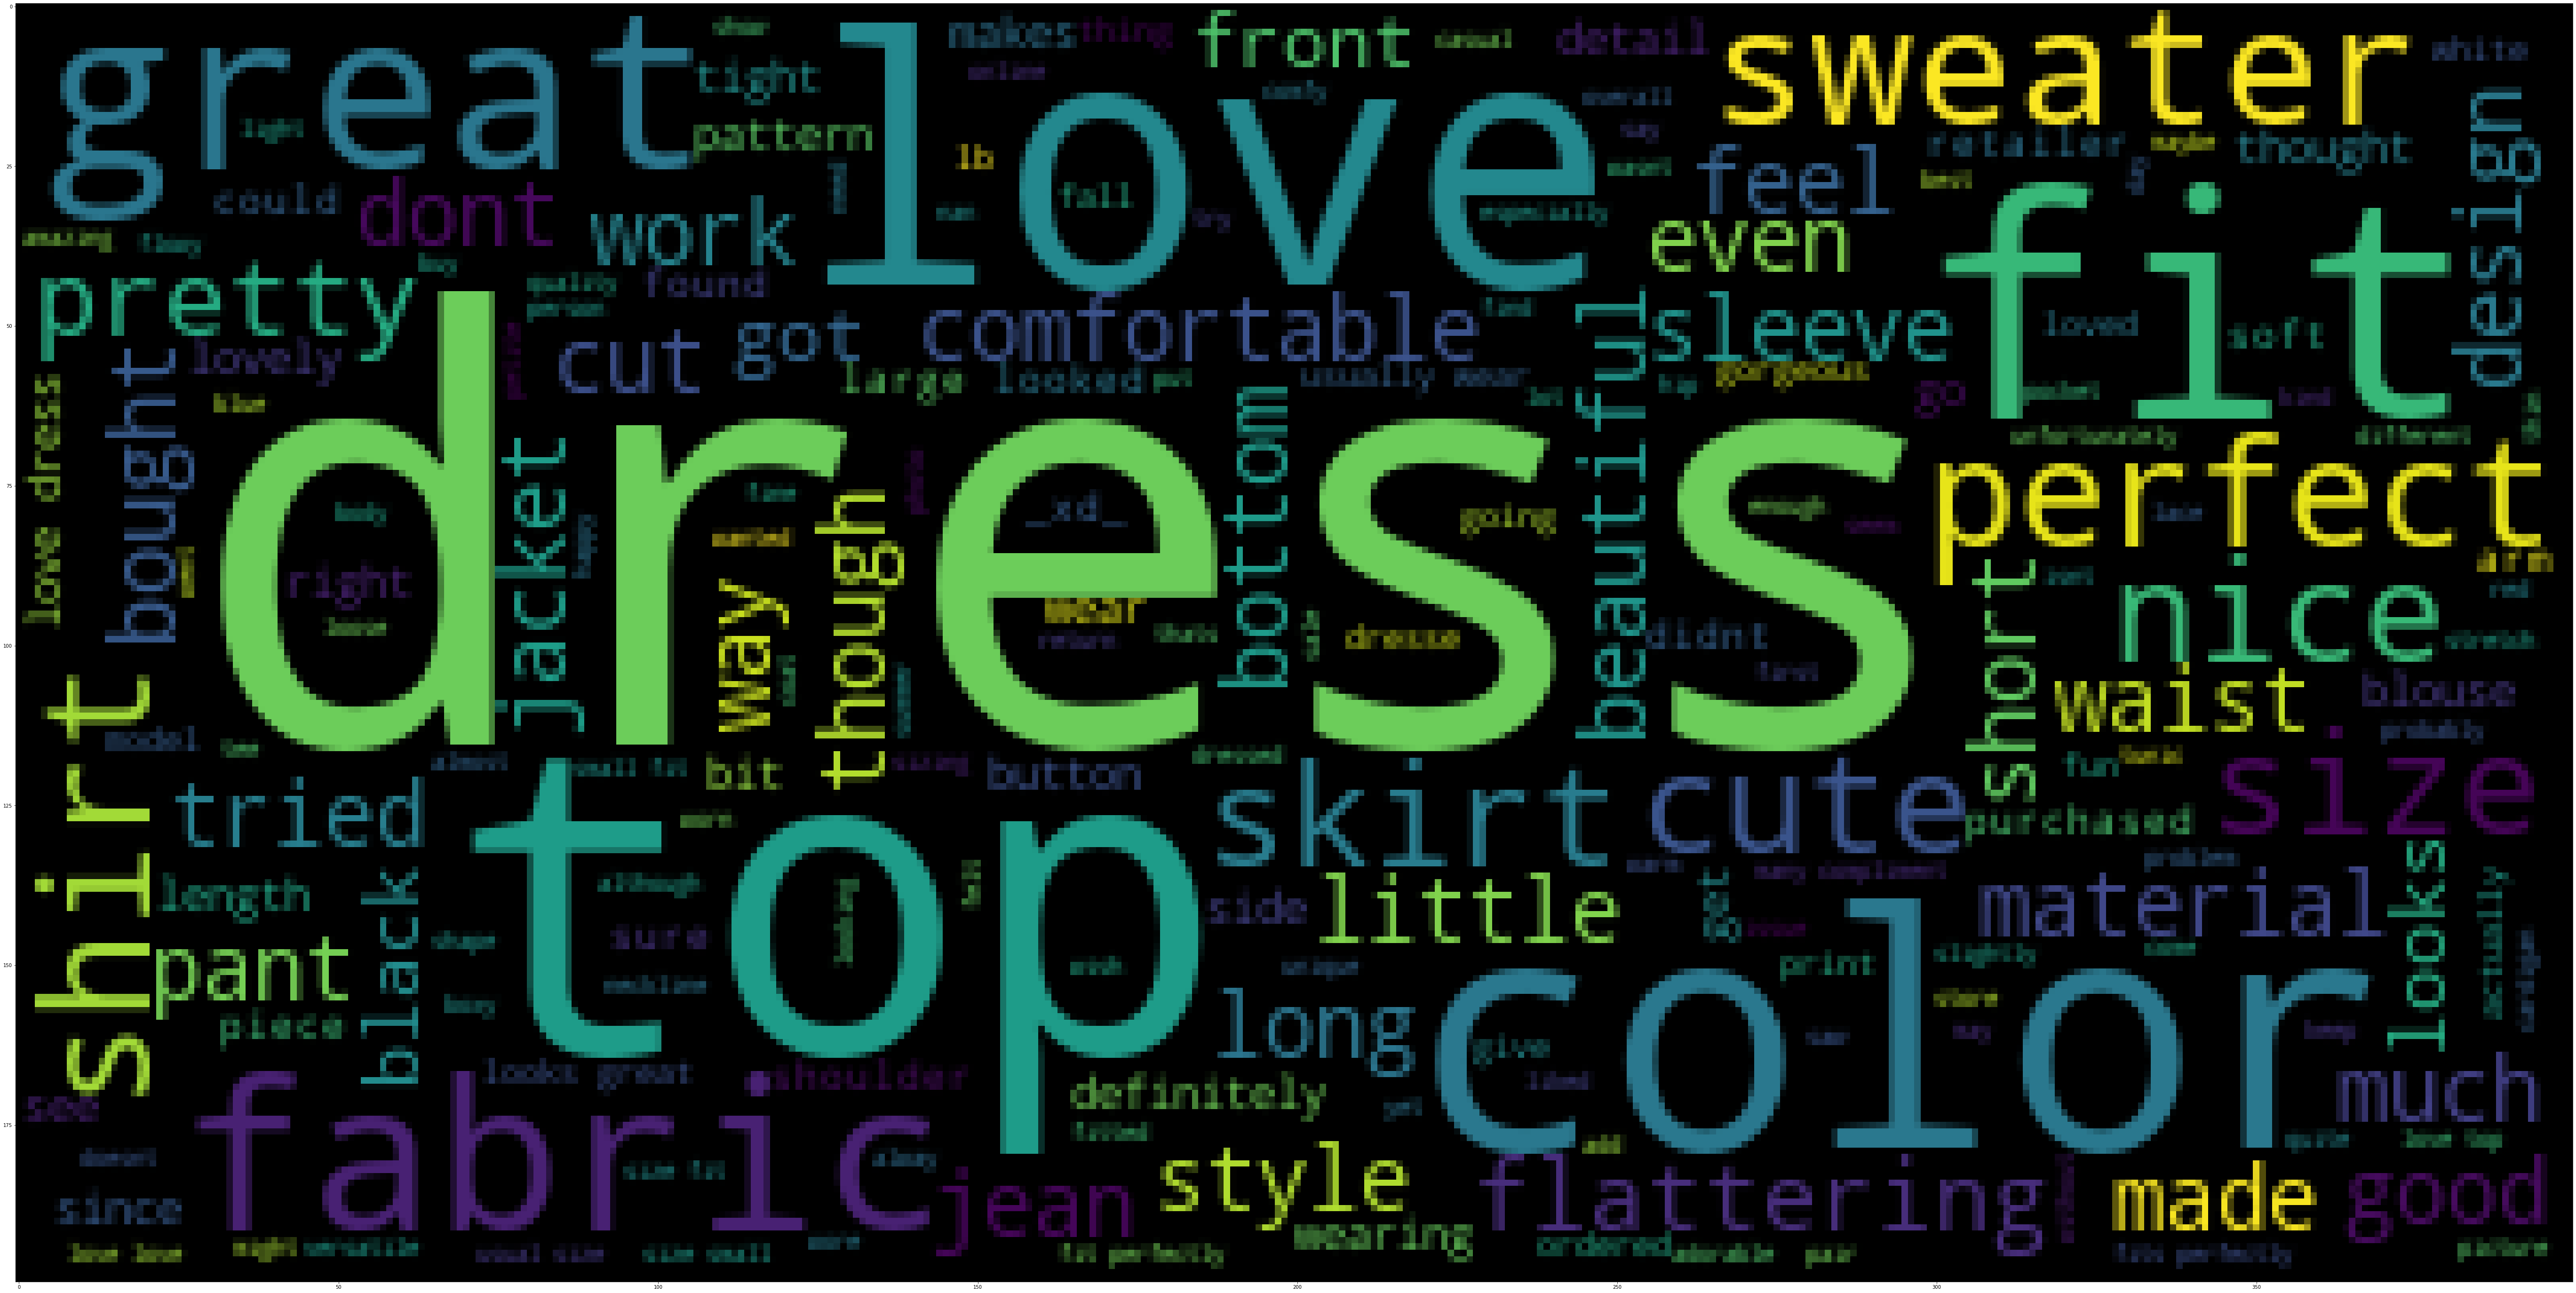

In [137]:
## positive :
stopcat = set(list(stop)+['think', 'true', 'back', 'also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im', 'look'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(positive.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

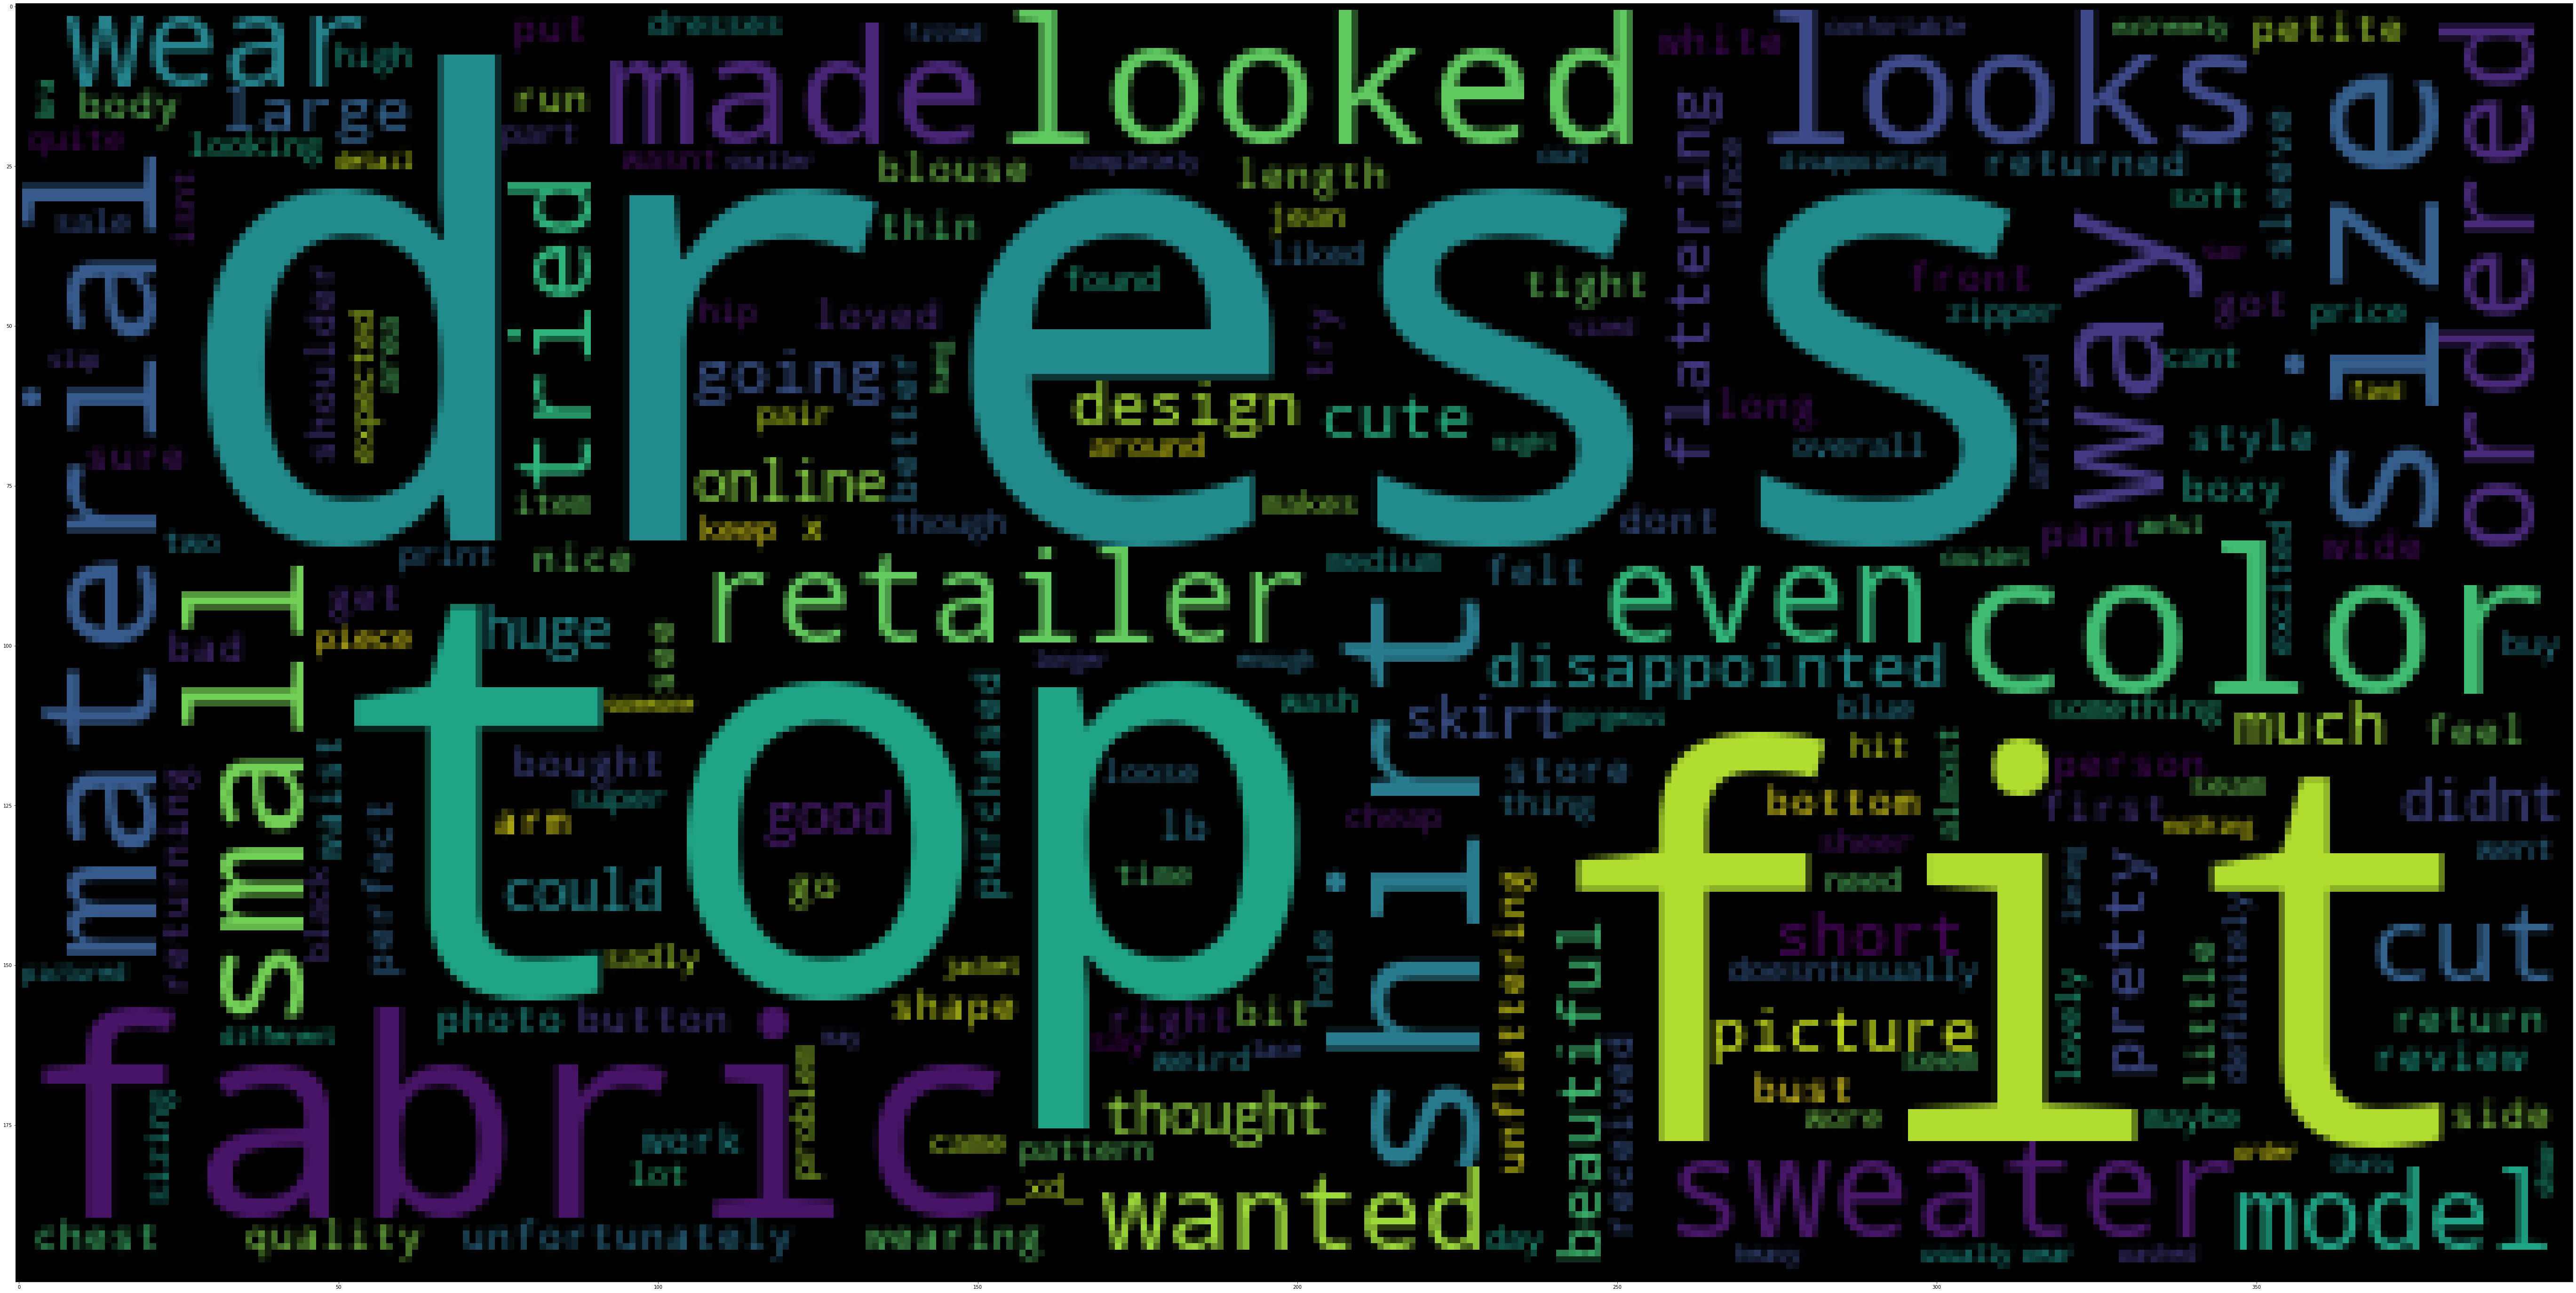

In [138]:
## Negative :
stopcat = set(list(stop)+['love' , 'great', 'think', 'true', 'back', 'also', 'however', 'still', 'one', 'make', 'really', 'like', 'big', 'would', 'well', 'im', 'look'])
wordcloud = WordCloud(stopwords=stopcat).generate(' '.join(negative.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

## c.Understand sentiment among the customers on the different categories, sub categories, products by location and age group

In [139]:
## Based on categories & Location  : 
pd.crosstab(index=df.location , columns= df.category , values=df.sentiment_score ,aggfunc=np.mean)

## all location shows an overall +ve sentiments in all category of product 

category    General  General Petite  Initmates
location                                      
Bangalore  0.238275        0.240074   0.241499
Chennai    0.239872        0.238315   0.238297
Gurgaon    0.244649        0.251347   0.245360
Mumbai     0.240472        0.250859   0.238744

In [140]:
## Based on categories & age_group   : 
pd.crosstab(index=df.age_group , columns= df.category , values=df.sentiment_score ,aggfunc=np.mean)

## all age_Group shows an overall +ve sentiments in all category of product 

category    General  General Petite  Initmates
age_group                                     
Adults     0.239293        0.241577   0.243382
Seniors    0.245019        0.261157   0.233021
Youth      0.256824        0.254267   0.255836

In [141]:
## Based on sub_categories & Location  : 
pd.crosstab(index=df.location , columns= df.subcategory1 , values=df.sentiment_score ,aggfunc=np.mean)

## all location shows an overall +ve sentiments in all sub_category of product , higest sentiment is of
##chennai location for Trend and lowest sentiment is of Bangalore location on Trend.

subcategory1   Bottoms   Dresses  Intimate   Jackets      Tops     Trend
location                                                                
Bangalore     0.237146  0.249234  0.240905  0.226958  0.235826  0.162936
Chennai       0.242320  0.242088  0.237141  0.234163  0.236758  0.277171
Gurgaon       0.243361  0.251958  0.244685  0.236616  0.247207  0.207946
Mumbai        0.260547  0.244806  0.235262  0.227867  0.240391  0.215370

In [142]:
## Based on sub_categories & age_group  : 
pd.crosstab(index=df.age_group , columns= df.subcategory1 , values=df.sentiment_score ,aggfunc=np.mean)

## all age_group shows an overall +ve sentiments in all sub_category of product  except youth have nearby neutral sentiment
## for Trend sub_category 

subcategory1   Bottoms   Dresses  Intimate   Jackets      Tops     Trend
age_group                                                               
Adults        0.245795  0.244339  0.241466  0.229471  0.236867  0.207871
Seniors       0.250641  0.259926  0.232588  0.236924  0.249021  0.216169
Youth         0.251336  0.249559  0.255205  0.228188  0.267478  0.139926

In [143]:
## Based on product & Location  : 
pd.crosstab(index=df.location , columns= df.subcategory2 , values=df.sentiment_score ,aggfunc=np.mean).fillna(0)

subcategory2   Blouses  Casual bottoms  Chemises   Dresses  Fine gauge  \
location                                                                 
Bangalore     0.237834          0.0000       0.0  0.249234    0.226560   
Chennai       0.252424          0.0000       0.0  0.242088    0.199228   
Gurgaon       0.254872          0.0000       0.0  0.251958    0.245143   
Mumbai        0.243769          0.4125       0.6  0.244806    0.245064   

subcategory2  Intimates   Jackets     Jeans     Knits  Layering   Legwear  \
location                                                                    
Bangalore      0.255838  0.224652  0.225984  0.242368  0.178485  0.255871   
Chennai        0.207396  0.241555  0.255615  0.241089  0.181466  0.226539   
Gurgaon        0.238781  0.239766  0.255063  0.239791  0.278339  0.246362   
Mumbai         0.274468  0.231904  0.255699  0.240090  0.210642  0.240731   

subcategory2    Lounge  Outerwear     Pants    Shorts    Skirts     Sleep  \
location                                                                    
Bangalore     0.240090   0.231360  0.248063  0.213166  0.245197  0.220649   
Chennai       0.216620   0.218257  0.230316  0.227383  0.254886  0.276994   
Gurgaon       0.244206   0.229222  0.241273  0.263571  0.225423  0.262571   
Mumbai        0.226968   0.219459  0.252869  0.242514  0.281162  0.214385   

subcategory2  Sweaters      Swim     Trend  
location                                    
Bangalore     0.218056  0.273915  0.162936  
Chennai       0.218120  0.287690  0.277171  
Gurgaon       0.258643  0.222795  0.207946  
Mumbai        0.230118  0.246828  0.215370

In [144]:
## Based on product & Location  : 
pd.crosstab(index=df.age_group , columns= df.subcategory2 , values=df.sentiment_score ,aggfunc=np.mean).fillna(0)

subcategory2   Blouses  Casual bottoms  Chemises   Dresses  Fine gauge  \
age_group                                                                
Adults        0.244693         0.20625       0.6  0.244339    0.227259   
Seniors       0.250921         0.00000       0.0  0.259926    0.250880   
Youth         0.273497         0.00000       0.0  0.249559    0.265189   

subcategory2  Intimates   Jackets     Jeans     Knits  Layering   Legwear  \
age_group                                                                   
Adults         0.253114  0.233336  0.246889  0.237201  0.221290  0.245438   
Seniors        0.263152  0.240579  0.250532  0.245403  0.213453  0.248103   
Youth          0.221770  0.208112  0.277171  0.267176  0.242827  0.220886   

subcategory2    Lounge  Outerwear     Pants    Shorts    Skirts     Sleep  \
age_group                                                                   
Adults        0.240354   0.220845  0.240383  0.242604  0.253429  0.239229   
Seniors       0.221987   0.229615  0.255427  0.241910  0.245081  0.225728   
Youth         0.240187   0.268341  0.249245  0.216672  0.241378  0.349523   

subcategory2  Sweaters      Swim     Trend  
age_group                                   
Adults        0.225893  0.244752  0.207871  
Seniors       0.254808  0.269168  0.216169  
Youth         0.259771  0.259069  0.139926

## d.Perform predictive analytics to understand the drivers of customers who are recommending the products.

In [145]:
Y = df.recommend_flag 

X = df[["channel","customer_age","rating", "sentiment_score", "count_word", "count_letters", "count_unique_word"]]

In [146]:
Y.value_counts()/Y.count()

1    0.822362
0    0.177638
Name: recommend_flag, dtype: float64

In [147]:
X["channel"] = np.where(X.channel == "Mobile", 0 , 1)

<ipython-input-147-d535a87b42a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["channel"] = np.where(X.channel == "Mobile", 0 , 1)


In [148]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [149]:
param_grid = {"max_depth":[5,6,7,8,9],"max_features":[4,5,6,7],"max_leaf_nodes":[10,11,12,13,14]}

best_parms = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, n_jobs=-1,scoring='roc_auc', verbose=True )

best_parms = best_parms.fit(train_x, train_y)

best_parms.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 7, 'max_features': 6, 'max_leaf_nodes': 12}

In [150]:
dtree_model = DecisionTreeClassifier(max_depth=5, max_features=7, max_leaf_nodes=10)

In [151]:
dtree_model = dtree_model.fit(train_x,train_y)

In [152]:
train_x_prob =pd.DataFrame(dtree_model.predict(train_x))[0]
metrics.roc_auc_score(train_y, train_x_prob)

0.9290904591572743

In [153]:
test_x_prob =pd.DataFrame(dtree_model.predict(test_x))[0]
metrics.roc_auc_score(test_y, test_x_prob)

0.9179578639752818

## e.Create topics and understand themes behind the topics by performing topic mining.

In [154]:
train_x = df.reviews

In [155]:
X_train_tokens = [doc.split() for doc in train_x] 

In [156]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary(18969 unique tokens: ['absolutely', 'comfortable', 'sexy', 'silky', 'wonderful']...)


In [157]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [158]:
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2)],
 [(1, 1),
  (8, 1),
  (21, 1),
  (22, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 3),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1)],
 [(17, 3),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(15, 1),
  (17, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (8

In [159]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [170]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary)

In [171]:
print("Perplexity: ", ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -7.276403413002656


In [162]:
print(ldamodel.print_topics(num_topics=10, num_words=20))

[(0, '0.067*"dress" + 0.033*"store" + 0.024*"online" + 0.021*"saw" + 0.015*"love" + 0.015*"tried" + 0.013*"retailer" + 0.012*"color" + 0.012*"one" + 0.010*"try" + 0.009*"person" + 0.009*"size" + 0.008*"ordered" + 0.008*"local" + 0.008*"loved" + 0.008*"fit" + 0.007*"small" + 0.007*"wear" + 0.007*"dresses" + 0.007*"even"'), (1, '0.023*"top" + 0.019*"wear" + 0.018*"bought" + 0.017*"love" + 0.017*"small" + 0.016*"size" + 0.015*"great" + 0.011*"im" + 0.010*"fits" + 0.010*"medium" + 0.010*"one" + 0.008*"fit" + 0.008*"sale" + 0.008*"retailer" + 0.008*"perfect" + 0.008*"compliments" + 0.008*"xs" + 0.007*"ordered" + 0.007*"large" + 0.007*"usually"'), (2, '0.034*"dress" + 0.026*"love" + 0.025*"great" + 0.018*"perfect" + 0.016*"wear" + 0.016*"comfortable" + 0.014*"sweater" + 0.013*"color" + 0.013*"soft" + 0.012*"jacket" + 0.012*"summer" + 0.012*"fall" + 0.012*"well" + 0.010*"flattering" + 0.010*"beautiful" + 0.009*"fits" + 0.008*"nice" + 0.008*"warm" + 0.008*"cute" + 0.008*"fabric"'), (3, '0.027*

In [163]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
dress store online saw love tried retailer color one try person size ordered local loved fit small wear dresses even

Topic 2, top 20 words:
top wear bought love small size great im fits medium one fit sale retailer perfect compliments xs ordered large usually

Topic 3, top 20 words:
dress love great perfect wear comfortable sweater color soft jacket summer fall well flattering beautiful fits nice warm cute fabric

Topic 4, top 20 words:
fit size im perfect love long wear perfectly like jeans fits bought lbs soft pants enough look great medium length

Topic 5, top 20 words:
top see fit cute white little washed dry back even & wash fabric quality really would price wear _xd_ one

Topic 6, top 20 words:
pants jeans nan love pair fit shorts great denim comfortable pilcro stretch like size ive theyre quality dont wear worn

Topic 7, top 20 words:
size small top fit im large like ordered wear would waist dress fabric medium _xd_ tight one really runs usually

Topic 8

In [164]:
# printing the topic associaltions with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.01667356), (1, 0.016673133), (2, 0.6271067), (3, 0.016679516), (4, 0.016672144), (5, 0.01667457), (6, 0.016672239), (7, 0.23949823), (8, 0.016676214), (9, 0.016673632)]
doc :  1 [(0, 0.124550894), (1, 0.51293665), (9, 0.3399238)]
doc :  2 [(6, 0.32381964), (7, 0.15303943), (9, 0.50877213)]
doc :  3 [(2, 0.17064667), (8, 0.77599984)]
doc :  4 [(2, 0.6671352), (8, 0.28578562)]
doc :  5 [(0, 0.51360154), (2, 0.20975947), (9, 0.2591261)]
doc :  6 [(0, 0.17229976), (3, 0.1443875), (4, 0.13532442), (8, 0.06726507), (9, 0.4671256)]
doc :  7 [(0, 0.0951408), (4, 0.28073296), (5, 0.18183902), (8, 0.27086243), (9, 0.1614233)]
doc :  8 [(2, 0.23384249), (6, 0.7216992)]
doc :  9 [(3, 0.2297606), (6, 0.38974494), (9, 0.36156884)]
doc :  10 [(6, 0.2899548), (7, 0.68578905)]
doc :  11 [(0, 0.02000956), (1, 0.020005103), (2, 0.81993586), (3, 0.020007338), (4, 0.020007534), (5, 0.020003736), (6, 0.020007532), (7, 0.020007733), (8, 0.020008057), (9, 0.020007517)]
doc :  12 [(0, 0.0890589

doc :  157 [(6, 0.971098)]
doc :  158 [(0, 0.52497023), (1, 0.15394072), (6, 0.29191056)]
doc :  159 [(3, 0.14882948), (6, 0.20376083), (7, 0.12872207), (9, 0.5047295)]
doc :  160 [(6, 0.09492733), (7, 0.88459074)]
doc :  161 [(5, 0.016655004), (7, 0.96556073)]
doc :  162 [(1, 0.11462271), (2, 0.052968618), (6, 0.5298124), (7, 0.14845635), (8, 0.14474326)]
doc :  163 [(0, 0.09313181), (6, 0.26343647), (7, 0.37259692), (8, 0.23923972)]
doc :  164 [(1, 0.16951735), (2, 0.0604529), (4, 0.22825196), (5, 0.120085455), (7, 0.41147223)]
doc :  165 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  166 [(1, 0.06940355), (3, 0.5812596), (8, 0.2330906), (9, 0.091233924)]
doc :  167 [(0, 0.35759953), (2, 0.58522624)]
doc :  168 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.0500002

doc :  337 [(0, 0.23245163), (6, 0.34744692), (7, 0.35708416), (9, 0.0507613)]
doc :  338 [(2, 0.09872368), (4, 0.87546694)]
doc :  339 [(1, 0.47627994), (6, 0.44712096), (7, 0.054554835)]
doc :  340 [(0, 0.12080178), (6, 0.83708066)]
doc :  341 [(3, 0.6501187), (6, 0.29269865)]
doc :  342 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  343 [(1, 0.50406265), (3, 0.13171096), (8, 0.2116751), (9, 0.13825783)]
doc :  344 [(7, 0.20911373), (8, 0.47346702), (9, 0.28242046)]
doc :  345 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  346 [(8, 0.7840871), (9, 0.1909004)]
doc :  347 [(1, 0.18237728), (2, 0.24216124), (5, 0.3009804), (8, 0.2568273)]
doc :  348 [(0, 0.08733258), (2, 0.4928215), (6, 0.3809754)]
doc :  349 [(2, 0.26692

doc :  552 [(0, 0.011112845), (1, 0.011113929), (2, 0.53618354), (3, 0.011115032), (4, 0.011115182), (5, 0.011115259), (6, 0.011114802), (7, 0.37489963), (8, 0.011115994), (9, 0.01111382)]
doc :  553 [(1, 0.16477732), (6, 0.77365154)]
doc :  554 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  555 [(0, 0.09520675), (2, 0.27112088), (4, 0.17919256), (6, 0.43947086)]
doc :  556 [(1, 0.8129753), (6, 0.1506495)]
doc :  557 [(8, 0.19394727), (9, 0.7679307)]
doc :  558 [(3, 0.309146), (8, 0.6241602)]
doc :  559 [(6, 0.20155723), (9, 0.74842215)]
doc :  560 [(7, 0.97908866)]
doc :  561 [(0, 0.15921175), (1, 0.49883783), (6, 0.322547)]
doc :  562 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  563 [(6, 0.15620814), (7, 0.7683362), (9, 0.05

doc :  660 [(1, 0.45118305), (6, 0.24259079), (9, 0.29065797)]
doc :  661 [(2, 0.16485326), (5, 0.21037038), (8, 0.56112593)]
doc :  662 [(1, 0.72796285), (5, 0.20314051), (9, 0.04993962)]
doc :  663 [(0, 0.012500993), (1, 0.012502138), (2, 0.6818312), (3, 0.01250194), (4, 0.012501667), (5, 0.2181556), (6, 0.012501226), (7, 0.012500751), (8, 0.012503303), (9, 0.012501227)]
doc :  664 [(0, 0.1514249), (3, 0.35011107), (4, 0.3182698), (7, 0.15160777)]
doc :  665 [(1, 0.94704014)]
doc :  666 [(1, 0.16686986), (2, 0.12293013), (3, 0.19312772), (5, 0.33983102), (6, 0.1605505)]
doc :  667 [(0, 0.011118024), (1, 0.011119724), (2, 0.011119551), (3, 0.0111186085), (4, 0.011118506), (5, 0.011121458), (6, 0.3548124), (7, 0.011120741), (8, 0.5562328), (9, 0.011118196)]
doc :  668 [(2, 0.4499869), (5, 0.14200103), (8, 0.28301665), (9, 0.08967493)]
doc :  669 [(0, 0.08088628), (3, 0.081633076), (7, 0.6130824), (9, 0.19826335)]
doc :  670 [(2, 0.20713475), (7, 0.17702208), (9, 0.57206976)]
doc :  671

doc :  768 [(0, 0.17373733), (7, 0.5646586), (8, 0.2311525)]
doc :  769 [(0, 0.020005912), (1, 0.020005625), (2, 0.020003675), (3, 0.020008443), (4, 0.81994355), (5, 0.020005235), (6, 0.020007629), (7, 0.02000759), (8, 0.020003706), (9, 0.02000866)]
doc :  770 [(1, 0.52155054), (6, 0.46065822)]
doc :  771 [(0, 0.5361831), (2, 0.12959139), (3, 0.18253697), (4, 0.1391826)]
doc :  772 [(0, 0.061931696), (2, 0.3881208), (4, 0.5062954)]
doc :  773 [(5, 0.11323233), (7, 0.8625082)]
doc :  774 [(5, 0.106454186), (6, 0.6621201), (8, 0.20340866)]
doc :  775 [(6, 0.45921168), (7, 0.32287174), (9, 0.18749711)]
doc :  776 [(1, 0.15184508), (3, 0.1320204), (6, 0.27344215), (9, 0.43044704)]
doc :  777 [(2, 0.22919658), (3, 0.71256256), (7, 0.040282283)]
doc :  778 [(1, 0.44122735), (2, 0.33104733), (4, 0.17386891)]
doc :  779 [(0, 0.12026348), (1, 0.58359426), (2, 0.2714304)]
doc :  780 [(0, 0.2715866), (4, 0.043631073), (7, 0.66833895)]
doc :  781 [(2, 0.96085376)]
doc :  782 [(1, 0.06431801), (7, 

doc :  974 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  975 [(2, 0.23372099), (3, 0.57060444), (9, 0.17724246)]
doc :  976 [(0, 0.7749268), (1, 0.02500954), (2, 0.025007734), (3, 0.025013208), (4, 0.02500486), (5, 0.025005888), (6, 0.025005244), (7, 0.025010332), (8, 0.025010025), (9, 0.025006434)]
doc :  977 [(2, 0.9307404), (4, 0.04344347)]
doc :  978 [(0, 0.20403144), (2, 0.18030708), (6, 0.17793106), (8, 0.42343828)]
doc :  979 [(1, 0.27808878), (3, 0.49590394), (9, 0.20478998)]
doc :  980 [(0, 0.30694485), (7, 0.6485839)]
doc :  981 [(0, 0.25313726), (2, 0.2085105), (7, 0.39932576), (8, 0.1222512)]
doc :  982 [(2, 0.4110452), (3, 0.12037476), (6, 0.44678617)]
doc :  983 [(0, 0.1501688), (3, 0.45389712), (7, 0.38164163)]
doc :  984 [(2, 0.30528), (6, 0.48955095), (7, 0.19057335)]
doc :  985 [(0, 0.14832085), (1, 0.014289706), (2, 0.01428977), (3, 0.01

doc :  1083 [(0, 0.20895906), (2, 0.19300793), (7, 0.58224285)]
doc :  1084 [(3, 0.28646126), (4, 0.103604645), (5, 0.07527842), (7, 0.51241994)]
doc :  1085 [(0, 0.011110626), (1, 0.3421863), (2, 0.5689369), (3, 0.011108935), (4, 0.011109593), (5, 0.011108579), (6, 0.01110982), (7, 0.011109187), (8, 0.011110446), (9, 0.011109559)]
doc :  1086 [(1, 0.49226177), (5, 0.16236961), (8, 0.31035605)]
doc :  1087 [(1, 0.47658086), (6, 0.22956052), (9, 0.2789305)]
doc :  1088 [(0, 0.28673893), (1, 0.13566853), (7, 0.0652912), (8, 0.4992472)]
doc :  1089 [(4, 0.034462262), (6, 0.2678433), (7, 0.3550436), (9, 0.330401)]
doc :  1090 [(4, 0.70204586), (9, 0.22538126)]
doc :  1091 [(7, 0.8501964), (9, 0.12693924)]
doc :  1092 [(0, 0.012468073), (1, 0.012470237), (2, 0.012470878), (3, 0.012468729), (4, 0.6444697), (5, 0.2557761), (6, 0.012468596), (7, 0.0124684), (8, 0.012470931), (9, 0.0124683315)]
doc :  1093 [(6, 0.4454885), (9, 0.50447226)]
doc :  1094 [(0, 0.21269862), (1, 0.3096143), (2, 0.117

doc :  1285 [(0, 0.83187383), (2, 0.15147819)]
doc :  1286 [(0, 0.15204364), (6, 0.11168479), (7, 0.36509693), (8, 0.2837503), (9, 0.07677999)]
doc :  1287 [(0, 0.12162915), (1, 0.35394934), (7, 0.50690603)]
doc :  1288 [(6, 0.5972681), (9, 0.3769187)]
doc :  1289 [(7, 0.32179886), (8, 0.611545)]
doc :  1290 [(0, 0.11623504), (1, 0.20758902), (6, 0.6577471)]
doc :  1291 [(6, 0.9143002), (9, 0.06708969)]
doc :  1292 [(4, 0.5309027), (8, 0.179161), (9, 0.2510369)]
doc :  1293 [(4, 0.16084327), (6, 0.49941176), (8, 0.31786186)]
doc :  1294 [(0, 0.3719496), (3, 0.23248444), (5, 0.025381414), (7, 0.3574113)]
doc :  1295 [(2, 0.25937966), (7, 0.7006062)]
doc :  1296 [(3, 0.08402628), (6, 0.40989307), (7, 0.28106883), (8, 0.21167071)]
doc :  1297 [(1, 0.18516202), (6, 0.4466363), (7, 0.18612556), (8, 0.12865841), (9, 0.041690357)]
doc :  1298 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023)

doc :  1489 [(1, 0.4158948), (2, 0.076791815), (4, 0.086533435), (7, 0.107880205), (8, 0.29288098)]
doc :  1490 [(1, 0.5946992), (2, 0.17009722), (4, 0.1010562), (7, 0.12189408)]
doc :  1491 [(1, 0.31191236), (3, 0.33297345), (8, 0.17177272), (9, 0.15605974)]
doc :  1492 [(0, 0.2782833), (1, 0.011117173), (2, 0.63278186), (3, 0.01111563), (4, 0.0111157615), (5, 0.011115131), (6, 0.011116926), (7, 0.011118034), (8, 0.011116997), (9, 0.01111917)]
doc :  1493 [(6, 0.43893915), (9, 0.50765806)]
doc :  1494 [(1, 0.15482089), (3, 0.18678142), (4, 0.32346404), (5, 0.16541743), (7, 0.020033367), (9, 0.14096639)]
doc :  1495 [(6, 0.38332328), (9, 0.5766617)]
doc :  1496 [(1, 0.46793044), (7, 0.23345035), (9, 0.28482723)]
doc :  1497 [(1, 0.41587114), (5, 0.1414102), (8, 0.4038154)]
doc :  1498 [(2, 0.04569475), (6, 0.41217545), (9, 0.5221227)]
doc :  1499 [(0, 0.027815042), (1, 0.337423), (4, 0.05405768), (6, 0.32234144), (7, 0.24814495)]
doc :  1500 [(1, 0.21416369), (6, 0.7600162)]
doc :  150

doc :  1694 [(0, 0.22856691), (7, 0.2598802), (8, 0.4782066)]
doc :  1695 [(0, 0.014288274), (1, 0.014288445), (2, 0.014289859), (3, 0.014288376), (4, 0.014288927), (5, 0.014288775), (6, 0.0142888175), (7, 0.87139636), (8, 0.014292887), (9, 0.014289289)]
doc :  1696 [(0, 0.14514199), (6, 0.7124071), (9, 0.10554327)]
doc :  1697 [(1, 0.3349247), (6, 0.6493817)]
doc :  1698 [(1, 0.26093397), (3, 0.3263431), (8, 0.37153)]
doc :  1699 [(1, 0.36579272), (3, 0.28919074), (7, 0.1268495), (8, 0.20461516)]
doc :  1700 [(0, 0.0603986), (6, 0.9225632)]
doc :  1701 [(0, 0.1551433), (1, 0.21624808), (5, 0.25546634), (6, 0.35543895)]
doc :  1702 [(0, 0.36708677), (6, 0.61068535)]
doc :  1703 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  1704 [(4, 0.396061), (8, 0.5618471)]
doc :  1705 [(1, 0.10256576), (6, 0.18206961), (8, 0.63592523), (9, 0.063647024)]
doc :  1706 [(8,

doc :  1899 [(0, 0.014290722), (1, 0.014293134), (2, 0.014293573), (3, 0.014292545), (4, 0.19989105), (5, 0.014291456), (6, 0.014295517), (7, 0.014293166), (8, 0.6857666), (9, 0.014292268)]
doc :  1900 [(5, 0.20485534), (6, 0.63664407), (8, 0.14372529)]
doc :  1901 [(4, 0.049024794), (5, 0.5585157), (8, 0.31755114), (9, 0.06264738)]
doc :  1902 [(0, 0.12736297), (3, 0.3236212), (4, 0.060813233), (5, 0.14410575), (7, 0.029193178), (8, 0.305326)]
doc :  1903 [(3, 0.26003832), (5, 0.4969011), (7, 0.22113092)]
doc :  1904 [(1, 0.06859763), (2, 0.22317934), (6, 0.23569396), (7, 0.45138723)]
doc :  1905 [(1, 0.38830918), (7, 0.18193065), (8, 0.40383044)]
doc :  1906 [(1, 0.2321492), (9, 0.7106511)]
doc :  1907 [(1, 0.5309793), (3, 0.24338453), (8, 0.20445998)]
doc :  1908 [(3, 0.35978624), (5, 0.24850549), (8, 0.3625271)]
doc :  1909 [(3, 0.96783996)]
doc :  1910 [(4, 0.13721839), (6, 0.550433), (7, 0.11838071), (8, 0.08584224), (9, 0.09811513)]
doc :  1911 [(1, 0.17487602), (4, 0.191194), (

doc :  2003 [(3, 0.7828618), (5, 0.055520274), (6, 0.122613676), (7, 0.026161348)]
doc :  2004 [(1, 0.52827907), (2, 0.27805805), (8, 0.13979079)]
doc :  2005 [(0, 0.17478393), (2, 0.10867476), (5, 0.059739284), (6, 0.15993953), (7, 0.48121294)]
doc :  2006 [(0, 0.24363758), (1, 0.06400832), (2, 0.20029294), (7, 0.4774267)]
doc :  2007 [(5, 0.034045983), (6, 0.61724675), (7, 0.29676858), (8, 0.03795143)]
doc :  2008 [(0, 0.3076319), (1, 0.18650995), (2, 0.14281467), (3, 0.3416059)]
doc :  2009 [(3, 0.30951828), (6, 0.354811), (9, 0.30868706)]
doc :  2010 [(0, 0.06801831), (1, 0.254248), (2, 0.49897248), (8, 0.15939718)]
doc :  2011 [(0, 0.1602816), (1, 0.11968501), (2, 0.058564216), (4, 0.048522875), (6, 0.4298168), (9, 0.17322727)]
doc :  2012 [(6, 0.97748876)]
doc :  2013 [(0, 0.07075268), (1, 0.20159215), (4, 0.20805967), (7, 0.3086296), (9, 0.18839963)]
doc :  2014 [(6, 0.9249774)]
doc :  2015 [(1, 0.39153612), (5, 0.16634664), (6, 0.35332763), (9, 0.06268702)]
doc :  2016 [(2, 0.1

doc :  2206 [(7, 0.84428716), (9, 0.1366537)]
doc :  2207 [(3, 0.56918836), (7, 0.13040876), (8, 0.27852455)]
doc :  2208 [(7, 0.9399694)]
doc :  2209 [(1, 0.9499928)]
doc :  2210 [(2, 0.93570083)]
doc :  2211 [(2, 0.19232753), (5, 0.2051383), (6, 0.5636376)]
doc :  2212 [(0, 0.020005612), (1, 0.020001648), (2, 0.5720711), (3, 0.020003462), (4, 0.02000334), (5, 0.26790166), (6, 0.020002093), (7, 0.020003453), (8, 0.02000503), (9, 0.020002568)]
doc :  2213 [(0, 0.17685471), (1, 0.12951782), (5, 0.03029573), (6, 0.39960447), (8, 0.05764334), (9, 0.19737667)]
doc :  2214 [(2, 0.56777936), (6, 0.38508195)]
doc :  2215 [(1, 0.34106094), (2, 0.16021208), (7, 0.4520381)]
doc :  2216 [(3, 0.59636736), (4, 0.1008008), (7, 0.13854888), (8, 0.14926623)]
doc :  2217 [(0, 0.28189296), (1, 0.4689967), (6, 0.1637141), (8, 0.068237744)]
doc :  2218 [(0, 0.16768403), (3, 0.26610577), (4, 0.14927444), (7, 0.14286578), (9, 0.2609061)]
doc :  2219 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.

doc :  2312 [(4, 0.754251), (5, 0.18417652)]
doc :  2313 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  2314 [(3, 0.93075204)]
doc :  2315 [(0, 0.13762282), (4, 0.26298186), (5, 0.077970564), (7, 0.2301094), (8, 0.09563466), (9, 0.18783182)]
doc :  2316 [(6, 0.42647573), (7, 0.2787777), (8, 0.10998641), (9, 0.17140687)]
doc :  2317 [(1, 0.046323076), (2, 0.13064645), (4, 0.0350302), (5, 0.101213336), (6, 0.37750196), (7, 0.15273364), (8, 0.069985285), (9, 0.08262118)]
doc :  2318 [(0, 0.554611), (4, 0.05806086), (6, 0.3688957)]
doc :  2319 [(7, 0.81368977), (9, 0.1542958)]
doc :  2320 [(0, 0.097726695), (4, 0.03339042), (5, 0.03900206), (6, 0.8178716)]
doc :  2321 [(0, 0.14763747), (4, 0.108316205), (7, 0.72441244)]
doc :  2322 [(6, 0.7684991), (7, 0.21482567)]
doc :  2323 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235)

doc :  2414 [(1, 0.27215424), (2, 0.22181989), (6, 0.08091025), (7, 0.41009644)]
doc :  2415 [(1, 0.59918123), (7, 0.37002903)]
doc :  2416 [(0, 0.010012088), (1, 0.010011234), (2, 0.17955932), (3, 0.0100102965), (4, 0.010010677), (5, 0.34987837), (6, 0.010009999), (7, 0.010010308), (8, 0.40048647), (9, 0.010011268)]
doc :  2417 [(6, 0.7319453), (7, 0.20162767)]
doc :  2418 [(1, 0.2901978), (5, 0.09528554), (6, 0.20348884), (8, 0.17534961), (9, 0.22376439)]
doc :  2419 [(0, 0.2109211), (1, 0.038696352), (2, 0.18817143), (7, 0.54970247)]
doc :  2420 [(3, 0.055550974), (6, 0.526013), (7, 0.2686066), (8, 0.13448168)]
doc :  2421 [(4, 0.3494888), (7, 0.5838062)]
doc :  2422 [(0, 0.11033523), (3, 0.07116427), (6, 0.10879295), (8, 0.16401124), (9, 0.53286415)]
doc :  2423 [(1, 0.18879634), (2, 0.070939265), (4, 0.11637068), (5, 0.16929324), (6, 0.3620959), (8, 0.08381955)]
doc :  2424 [(0, 0.010002392), (1, 0.01000339), (2, 0.010002745), (3, 0.010002635), (4, 0.0100030685), (5, 0.010005722),

doc :  2613 [(1, 0.17449866), (3, 0.24593951), (4, 0.446319), (9, 0.11744293)]
doc :  2614 [(1, 0.1543055), (2, 0.28918412), (5, 0.05582052), (7, 0.3647903), (8, 0.1158925)]
doc :  2615 [(1, 0.10660392), (3, 0.24527927), (8, 0.48546642), (9, 0.14446208)]
doc :  2616 [(1, 0.30717525), (2, 0.35696766), (3, 0.23040958), (5, 0.09005411)]
doc :  2617 [(5, 0.08065842), (6, 0.1757218), (8, 0.55546904), (9, 0.17216945)]
doc :  2618 [(1, 0.20286894), (3, 0.10822463), (7, 0.3919016), (9, 0.26699427)]
doc :  2619 [(6, 0.7077557), (9, 0.26870546)]
doc :  2620 [(1, 0.35961324), (9, 0.5736975)]
doc :  2621 [(7, 0.649146), (8, 0.30377996)]
doc :  2622 [(0, 0.13380143), (6, 0.31811798), (7, 0.50688833)]
doc :  2623 [(1, 0.05499757), (3, 0.6672956), (6, 0.11580856), (7, 0.14560366)]
doc :  2624 [(2, 0.057017453), (4, 0.1619952), (5, 0.37954617), (8, 0.38378617)]
doc :  2625 [(7, 0.7148051), (9, 0.23812266)]
doc :  2626 [(1, 0.23255499), (4, 0.106140934), (6, 0.35798907), (8, 0.26996076)]
doc :  2627 [(

doc :  2814 [(1, 0.09999959), (6, 0.6963289), (7, 0.18918468)]
doc :  2815 [(1, 0.518201), (7, 0.43966383)]
doc :  2816 [(3, 0.2729893), (4, 0.12265101), (5, 0.25798047), (6, 0.33273974)]
doc :  2817 [(2, 0.12523657), (6, 0.21381588), (7, 0.42969903), (8, 0.21544954)]
doc :  2818 [(1, 0.18465048), (3, 0.13071929), (4, 0.08331522), (6, 0.5392478), (8, 0.049852464)]
doc :  2819 [(1, 0.2464054), (2, 0.053426694), (7, 0.6834904)]
doc :  2820 [(0, 0.09399388), (6, 0.47933722), (7, 0.056125578), (9, 0.3577702)]
doc :  2821 [(2, 0.9357041)]
doc :  2822 [(0, 0.011116035), (1, 0.011115213), (2, 0.5967068), (3, 0.0111159), (4, 0.011115194), (5, 0.011115469), (6, 0.011115083), (7, 0.01111565), (8, 0.31436566), (9, 0.011118959)]
doc :  2823 [(2, 0.48817447), (3, 0.25733268), (4, 0.11709618), (6, 0.050890848), (8, 0.076288596)]
doc :  2824 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), 

doc :  2916 [(1, 0.4399754), (2, 0.25184277), (3, 0.111092545), (7, 0.1842815)]
doc :  2917 [(0, 0.16238992), (6, 0.37203032), (7, 0.18679036), (8, 0.26415402)]
doc :  2918 [(0, 0.09919683), (3, 0.14051384), (6, 0.26919284), (7, 0.14522734), (9, 0.3315765)]
doc :  2919 [(6, 0.13586424), (7, 0.25503024), (8, 0.1889773), (9, 0.40137222)]
doc :  2920 [(1, 0.5488837), (8, 0.4235232)]
doc :  2921 [(5, 0.44208163), (8, 0.26930478), (9, 0.2594376)]
doc :  2922 [(2, 0.4030391), (3, 0.23618336), (6, 0.31958598)]
doc :  2923 [(1, 0.5918562), (5, 0.12768589), (8, 0.25631312)]
doc :  2924 [(0, 0.2173204), (1, 0.22191638), (2, 0.211451), (3, 0.14656958), (9, 0.19137333)]
doc :  2925 [(1, 0.51701295), (3, 0.30197588), (7, 0.15600464)]
doc :  2926 [(1, 0.21484512), (4, 0.58695817), (5, 0.051643077), (6, 0.1258577)]
doc :  2927 [(0, 0.2994705), (2, 0.168328), (6, 0.51275045)]
doc :  2928 [(2, 0.6781262), (8, 0.30024227)]
doc :  2929 [(8, 0.63174665), (9, 0.32117495)]
doc :  2930 [(1, 0.23992075), (2, 

doc :  3020 [(1, 0.4856102), (4, 0.17584305), (5, 0.032715563), (6, 0.2927801)]
doc :  3021 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  3022 [(2, 0.3400887), (5, 0.24345747), (6, 0.39230317)]
doc :  3023 [(0, 0.012501966), (1, 0.012503832), (2, 0.88746965), (3, 0.012503937), (4, 0.012502219), (5, 0.012503421), (6, 0.01250722), (7, 0.012502716), (8, 0.012503312), (9, 0.012501704)]
doc :  3024 [(4, 0.2579082), (5, 0.56597376), (9, 0.134926)]
doc :  3025 [(1, 0.19989018), (6, 0.120395966), (7, 0.43117592), (9, 0.22351733)]
doc :  3026 [(1, 0.18648055), (2, 0.324767), (8, 0.45540902)]
doc :  3027 [(1, 0.26509175), (6, 0.28024065), (8, 0.42544916)]
doc :  3028 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  3029 [(3, 0.12512438), (

doc :  3124 [(2, 0.04252799), (6, 0.30738735), (8, 0.120012835), (9, 0.5175584)]
doc :  3125 [(0, 0.02496793), (1, 0.024971737), (2, 0.77528054), (3, 0.024970274), (4, 0.024967277), (5, 0.024966495), (6, 0.024969097), (7, 0.024969103), (8, 0.024970552), (9, 0.024967)]
doc :  3126 [(0, 0.014293514), (1, 0.014290587), (2, 0.014289879), (3, 0.87137926), (4, 0.014290722), (5, 0.01428842), (6, 0.014292076), (7, 0.014293111), (8, 0.014288603), (9, 0.014293829)]
doc :  3127 [(0, 0.12712692), (1, 0.75061774), (5, 0.0942364)]
doc :  3128 [(2, 0.10879351), (4, 0.17452663), (8, 0.09551888), (9, 0.6072081)]
doc :  3129 [(6, 0.29589027), (8, 0.5123521), (9, 0.14800207)]
doc :  3130 [(0, 0.06191695), (1, 0.19125982), (4, 0.08433305), (6, 0.367955), (9, 0.28316122)]
doc :  3131 [(3, 0.14933307), (4, 0.19963123), (8, 0.62464553)]
doc :  3132 [(1, 0.095219135), (2, 0.49852273), (3, 0.37825438)]
doc :  3133 [(6, 0.25134072), (7, 0.30828226), (9, 0.41444382)]
doc :  3134 [(0, 0.27550358), (1, 0.012505253

doc :  3228 [(0, 0.011113407), (1, 0.0111132795), (2, 0.8999679), (3, 0.011119205), (4, 0.011112748), (5, 0.011119373), (6, 0.011113945), (7, 0.011114206), (8, 0.011113523), (9, 0.01111243)]
doc :  3229 [(1, 0.49667537), (5, 0.08833459), (7, 0.39554152)]
doc :  3230 [(0, 0.21237351), (2, 0.25447184), (3, 0.104628704), (5, 0.09084058), (8, 0.32726407)]
doc :  3231 [(0, 0.010001552), (1, 0.010002711), (2, 0.010002692), (3, 0.010003384), (4, 0.010001904), (5, 0.010003236), (6, 0.54080915), (7, 0.010001812), (8, 0.37917063), (9, 0.010002886)]
doc :  3232 [(0, 0.09320606), (3, 0.23740576), (6, 0.6553476)]
doc :  3233 [(1, 0.10566664), (8, 0.865753)]
doc :  3234 [(0, 0.25137442), (1, 0.014292036), (2, 0.63427705), (3, 0.014291842), (4, 0.014292173), (5, 0.014291617), (6, 0.014294283), (7, 0.014295699), (8, 0.014293567), (9, 0.014297332)]
doc :  3235 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.0

doc :  3331 [(1, 0.12414007), (8, 0.81085753), (9, 0.049087547)]
doc :  3332 [(2, 0.07061852), (8, 0.47864437), (9, 0.41182917)]
doc :  3333 [(2, 0.18349613), (8, 0.1399658), (9, 0.64609855)]
doc :  3334 [(0, 0.29583704), (2, 0.12368692), (7, 0.18584037), (8, 0.38067165)]
doc :  3335 [(0, 0.078411944), (6, 0.20218347), (7, 0.6803627), (8, 0.025058335)]
doc :  3336 [(1, 0.24971654), (2, 0.3888014), (7, 0.21727721), (8, 0.11261523)]
doc :  3337 [(0, 0.13773085), (2, 0.21847248), (9, 0.61461794)]
doc :  3338 [(2, 0.122397326), (3, 0.2517387), (6, 0.28697675), (7, 0.098788455), (9, 0.22922982)]
doc :  3339 [(1, 0.34825766), (4, 0.05172963), (6, 0.3487889), (9, 0.23540933)]
doc :  3340 [(7, 0.5197975), (8, 0.41862962)]
doc :  3341 [(1, 0.9437272)]
doc :  3342 [(4, 0.3591708), (5, 0.078203045), (6, 0.44355646), (9, 0.103669986)]
doc :  3343 [(0, 0.43759802), (2, 0.37393486), (3, 0.09515264), (8, 0.07454244)]
doc :  3344 [(1, 0.7108595), (8, 0.09778565), (9, 0.13750613)]
doc :  3345 [(1, 0.07

doc :  3530 [(0, 0.016660724), (1, 0.016661061), (2, 0.01666295), (3, 0.85003924), (4, 0.016660118), (5, 0.016658986), (6, 0.01666554), (7, 0.016663725), (8, 0.016661396), (9, 0.016666215)]
doc :  3531 [(1, 0.16562034), (3, 0.1101879), (6, 0.2905609), (9, 0.42113322)]
doc :  3532 [(1, 0.17506848), (2, 0.58286506), (8, 0.2194784)]
doc :  3533 [(7, 0.7402632), (9, 0.2402173)]
doc :  3534 [(0, 0.012502827), (1, 0.01250342), (2, 0.012505467), (3, 0.012502538), (4, 0.012503071), (5, 0.012501823), (6, 0.0125046), (7, 0.27572712), (8, 0.012504374), (9, 0.62424475)]
doc :  3535 [(0, 0.038964324), (1, 0.15325752), (2, 0.11932941), (6, 0.19364507), (9, 0.47754976)]
doc :  3536 [(2, 0.33899528), (3, 0.07236032), (6, 0.19257064), (7, 0.38068032)]
doc :  3537 [(1, 0.5080878), (2, 0.06522398), (5, 0.15587813), (7, 0.08525445), (8, 0.16054651)]
doc :  3538 [(1, 0.10946498), (3, 0.08381502), (6, 0.75415844), (7, 0.040789433)]
doc :  3539 [(1, 0.15363313), (6, 0.5022124), (9, 0.32892928)]
doc :  3540 [

doc :  3633 [(2, 0.25219074), (4, 0.41812596), (6, 0.20267826), (8, 0.11395709)]
doc :  3634 [(5, 0.4094165), (6, 0.5557994)]
doc :  3635 [(0, 0.25475764), (1, 0.13185099), (6, 0.590799)]
doc :  3636 [(7, 0.5261434), (8, 0.4293854)]
doc :  3637 [(3, 0.25670403), (6, 0.37928554), (7, 0.3502672)]
doc :  3638 [(0, 0.18010253), (6, 0.3145871), (7, 0.48585343)]
doc :  3639 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  3640 [(4, 0.16088842), (8, 0.79907304)]
doc :  3641 [(1, 0.60967314), (2, 0.22252621), (7, 0.14983784)]
doc :  3642 [(1, 0.3187664), (4, 0.4261068), (6, 0.17847684), (7, 0.06359316)]
doc :  3643 [(0, 0.31351417), (1, 0.08193242), (2, 0.18721361), (6, 0.40457377)]
doc :  3644 [(0, 0.5495495), (3, 0.024138182), (7, 0.37243837)]
doc :  3645 [(2, 0.32210478), (8, 0.46684322), (9, 0.19758032)]
doc :  3646 [(2, 0.08134191), (3, 0.6787273), (7, 0

doc :  3836 [(2, 0.19485527), (5, 0.14803454), (6, 0.18729086), (7, 0.45401326)]
doc :  3837 [(3, 0.15513891), (6, 0.20363203), (8, 0.39244518), (9, 0.23482534)]
doc :  3838 [(2, 0.2639619), (4, 0.13022406), (8, 0.5669023)]
doc :  3839 [(0, 0.13503526), (1, 0.21091071), (5, 0.06395013), (6, 0.3861791), (9, 0.19350006)]
doc :  3840 [(6, 0.27229583), (7, 0.38504082), (8, 0.32077745)]
doc :  3841 [(1, 0.10472025), (6, 0.095992744), (7, 0.3313762), (9, 0.44720846)]
doc :  3842 [(2, 0.07237104), (7, 0.43611342), (9, 0.47309014)]
doc :  3843 [(0, 0.6038851), (2, 0.34904006)]
doc :  3844 [(0, 0.29530886), (2, 0.11948222), (3, 0.13982593), (4, 0.33816418), (6, 0.095583186)]
doc :  3845 [(2, 0.15041548), (3, 0.2764943), (6, 0.47534102), (7, 0.083794065)]
doc :  3846 [(1, 0.5653579), (7, 0.3311892), (9, 0.056769636)]
doc :  3847 [(0, 0.13267851), (2, 0.18509786), (7, 0.16564022), (8, 0.50228727)]
doc :  3848 [(6, 0.3365033), (9, 0.6338579)]
doc :  3849 [(1, 0.42093349), (6, 0.26437297), (7, 0.27

doc :  4043 [(0, 0.1775117), (2, 0.6676214), (8, 0.11800668)]
doc :  4044 [(0, 0.25817367), (3, 0.14350773), (4, 0.2772625), (7, 0.13450928), (9, 0.16382304)]
doc :  4045 [(0, 0.21129006), (2, 0.12348264), (5, 0.07803923), (6, 0.07095504), (7, 0.27178854), (8, 0.23610406)]
doc :  4046 [(2, 0.23611894), (3, 0.31501746), (4, 0.048372462), (8, 0.38112205)]
doc :  4047 [(1, 0.18364927), (3, 0.3013094), (5, 0.38425973), (6, 0.11878819)]
doc :  4048 [(0, 0.04821227), (2, 0.42848676), (4, 0.08549366), (8, 0.41471535)]
doc :  4049 [(2, 0.26238337), (6, 0.17693517), (8, 0.51691717)]
doc :  4050 [(0, 0.28339496), (3, 0.1728993), (5, 0.14646026), (7, 0.37847945)]
doc :  4051 [(2, 0.36418247), (6, 0.46359074), (7, 0.15555461)]
doc :  4052 [(4, 0.734826), (5, 0.22713016)]
doc :  4053 [(1, 0.32658693), (7, 0.29001933), (8, 0.3529458)]
doc :  4054 [(0, 0.1949658), (6, 0.25748727), (7, 0.15123558), (8, 0.38354596)]
doc :  4055 [(1, 0.24607745), (6, 0.7322913)]
doc :  4056 [(6, 0.7024512), (9, 0.256472

doc :  4148 [(0, 0.12348529), (3, 0.24115942), (4, 0.32558414), (6, 0.28577048)]
doc :  4149 [(0, 0.33954594), (4, 0.07375659), (5, 0.5533696)]
doc :  4150 [(4, 0.2268113), (6, 0.43412498), (9, 0.31906012)]
doc :  4151 [(2, 0.9399837)]
doc :  4152 [(0, 0.1681359), (2, 0.19730839), (8, 0.58790535)]
doc :  4153 [(2, 0.26122466), (8, 0.343789), (9, 0.36165223)]
doc :  4154 [(0, 0.014278304), (1, 0.014281137), (2, 0.48455423), (3, 0.014280405), (4, 0.40120497), (5, 0.014281305), (6, 0.014279791), (7, 0.014280401), (8, 0.014280885), (9, 0.014278572)]
doc :  4155 [(4, 0.21872962), (7, 0.7279405)]
doc :  4156 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  4157 [(1, 0.20308518), (2, 0.28604195), (3, 0.19586848), (7, 0.29498026)]
doc :  4158 [(4, 0.13169342), (6, 0.13906504), (7, 0.14964955), (8, 0.50270283), (9, 0.064367846)]
doc :  4159 [(1, 0.6039223), (7, 0.3254

doc :  4252 [(0, 0.047065366), (4, 0.06820388), (6, 0.6776735), (7, 0.19125521)]
doc :  4253 [(0, 0.20635843), (2, 0.35854498), (7, 0.38123068)]
doc :  4254 [(0, 0.012505464), (1, 0.012503548), (2, 0.51710993), (3, 0.012505449), (4, 0.01250596), (5, 0.012502651), (6, 0.01250609), (7, 0.012504609), (8, 0.3828508), (9, 0.012505527)]
doc :  4255 [(0, 0.1878138), (1, 0.07102441), (2, 0.14250872), (6, 0.120477006), (7, 0.30027306), (8, 0.1686197)]
doc :  4256 [(4, 0.20401627), (6, 0.48521224), (8, 0.27181014)]
doc :  4257 [(2, 0.34841287), (6, 0.6071217)]
doc :  4258 [(6, 0.45720068), (7, 0.52612126)]
doc :  4259 [(0, 0.2568978), (1, 0.27750897), (4, 0.25726146), (5, 0.096666306), (8, 0.09980224)]
doc :  4260 [(2, 0.6800477), (8, 0.275494)]
doc :  4261 [(2, 0.4102537), (3, 0.5363957)]
doc :  4262 [(1, 0.69829255), (2, 0.14934084), (8, 0.12317981)]
doc :  4263 [(2, 0.28218472), (6, 0.050718587), (7, 0.5118766), (8, 0.12519057)]
doc :  4264 [(0, 0.14246523), (4, 0.19507971), (6, 0.1611496), (

doc :  4357 [(2, 0.92499036)]
doc :  4358 [(0, 0.23659465), (2, 0.69062895)]
doc :  4359 [(1, 0.15539557), (6, 0.626515), (9, 0.19863577)]
doc :  4360 [(2, 0.78002256), (5, 0.15841846)]
doc :  4361 [(0, 0.079347886), (1, 0.13211648), (6, 0.77297425)]
doc :  4362 [(0, 0.24464315), (2, 0.14533886), (4, 0.30465645), (5, 0.038556416), (6, 0.10410458), (8, 0.15436101)]
doc :  4363 [(1, 0.25358662), (2, 0.16225976), (6, 0.3668114), (9, 0.19733821)]
doc :  4364 [(1, 0.09672262), (2, 0.53282845), (9, 0.32925117)]
doc :  4365 [(0, 0.33348322), (3, 0.52468693), (9, 0.12554266)]
doc :  4366 [(0, 0.20691116), (1, 0.20893684), (6, 0.36363915), (9, 0.1982826)]
doc :  4367 [(0, 0.09133037), (1, 0.40610996), (2, 0.3174165), (8, 0.1715008)]
doc :  4368 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  4369 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235)

doc :  4462 [(0, 0.17400788), (3, 0.22831827), (4, 0.036626104), (5, 0.043104667), (7, 0.5068158)]
doc :  4463 [(3, 0.12732685), (7, 0.3701265), (9, 0.47071987)]
doc :  4464 [(0, 0.28885525), (6, 0.15060663), (8, 0.42053375), (9, 0.12695558)]
doc :  4465 [(1, 0.3651272), (3, 0.6015355)]
doc :  4466 [(0, 0.4527793), (6, 0.5051023)]
doc :  4467 [(0, 0.01110855), (1, 0.011108719), (2, 0.9000041), (3, 0.011109159), (4, 0.011112841), (5, 0.01110913), (6, 0.011112285), (7, 0.011113172), (8, 0.011109824), (9, 0.011112221)]
doc :  4468 [(0, 0.32009637), (2, 0.19331948), (8, 0.43990356)]
doc :  4469 [(2, 0.11629885), (4, 0.107671976), (7, 0.5534059), (9, 0.20192403)]
doc :  4470 [(1, 0.23342757), (6, 0.52914864), (9, 0.21554449)]
doc :  4471 [(0, 0.17280091), (1, 0.06825851), (2, 0.33029234), (3, 0.1293138), (7, 0.28368834)]
doc :  4472 [(7, 0.39782906), (8, 0.5779172)]
doc :  4473 [(7, 0.807853), (9, 0.16456921)]
doc :  4474 [(1, 0.4212852), (6, 0.28765965), (9, 0.27513897)]
doc :  4475 [(2, 0

doc :  4563 [(1, 0.12926376), (3, 0.05525895), (4, 0.21765259), (6, 0.5841771)]
doc :  4564 [(6, 0.36577696), (7, 0.19041738), (8, 0.40879297)]
doc :  4565 [(0, 0.14125748), (1, 0.29393697), (3, 0.087839894), (6, 0.1258112), (7, 0.33114165)]
doc :  4566 [(1, 0.24875112), (3, 0.19108747), (6, 0.47042665), (7, 0.07433582)]
doc :  4567 [(4, 0.71701974), (8, 0.22145037)]
doc :  4568 [(0, 0.04806051), (4, 0.7257977), (7, 0.19279513)]
doc :  4569 [(1, 0.58749485), (6, 0.3804812)]
doc :  4570 [(1, 0.5472255), (4, 0.13230887), (7, 0.20378855), (9, 0.10203634)]
doc :  4571 [(0, 0.10445893), (2, 0.43266073), (8, 0.24091832), (9, 0.20480426)]
doc :  4572 [(3, 0.19999583), (6, 0.4161402), (8, 0.35971266)]
doc :  4573 [(0, 0.16743523), (1, 0.2002743), (4, 0.44263735), (7, 0.15964074)]
doc :  4574 [(1, 0.59635025), (4, 0.06373969), (6, 0.17905007), (7, 0.13085823)]
doc :  4575 [(2, 0.2678365), (3, 0.18854482), (6, 0.3190106), (7, 0.20921409)]
doc :  4576 [(3, 0.110285945), (8, 0.5324574), (9, 0.3268

doc :  4664 [(0, 0.18379492), (1, 0.14230292), (6, 0.24982642), (7, 0.23634778), (8, 0.11222126), (9, 0.06598016)]
doc :  4665 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  4666 [(2, 0.03746603), (3, 0.18433431), (6, 0.5222865), (7, 0.04033232), (9, 0.20446266)]
doc :  4667 [(0, 0.14548402), (1, 0.4153092), (2, 0.28116736), (8, 0.13073786)]
doc :  4668 [(0, 0.010002045), (1, 0.90996504), (2, 0.0100035295), (3, 0.01000545), (4, 0.010004137), (5, 0.010002131), (6, 0.010003692), (7, 0.010002845), (8, 0.010004019), (9, 0.010007086)]
doc :  4669 [(1, 0.93568766)]
doc :  4670 [(0, 0.011113724), (1, 0.011115319), (2, 0.0111154), (3, 0.01111575), (4, 0.011117569), (5, 0.011115633), (6, 0.011114438), (7, 0.0111145275), (8, 0.89995795), (9, 0.011119718)]
doc :  4671 [(1, 0.20478553), (4, 0.13257489), (6, 0.4765442), (9, 0.17245)]
doc :  4672 [(3, 0.524319), (6, 0.40

doc :  4869 [(1, 0.5894973), (4, 0.20422278), (6, 0.17293698)]
doc :  4870 [(8, 0.95261407)]
doc :  4871 [(0, 0.19910538), (2, 0.2993692), (6, 0.23593688), (9, 0.23027588)]
doc :  4872 [(0, 0.3479963), (4, 0.35815707), (8, 0.2549426)]
doc :  4873 [(6, 0.8545932), (9, 0.11576986)]
doc :  4874 [(1, 0.3462756), (2, 0.39139968), (3, 0.22898087)]
doc :  4875 [(0, 0.20280813), (7, 0.37742007), (8, 0.37308624)]
doc :  4876 [(7, 0.50743103), (9, 0.43542954)]
doc :  4877 [(1, 0.22684206), (3, 0.16050135), (6, 0.5926503)]
doc :  4878 [(2, 0.17484346), (7, 0.75397664), (9, 0.054103594)]
doc :  4879 [(1, 0.26391992), (2, 0.16456455), (6, 0.24563849), (8, 0.3018752)]
doc :  4880 [(0, 0.01428193), (1, 0.63828933), (2, 0.014283295), (3, 0.014283203), (4, 0.014282654), (5, 0.2474492), (6, 0.014282075), (7, 0.014282191), (8, 0.014283844), (9, 0.014282256)]
doc :  4881 [(1, 0.27171335), (7, 0.33708158), (9, 0.3756436)]
doc :  4882 [(4, 0.102753155), (6, 0.6874009), (8, 0.1686615)]
doc :  4883 [(0, 0.012

doc :  4974 [(0, 0.3003355), (6, 0.35013133), (8, 0.33286193)]
doc :  4975 [(0, 0.06438538), (1, 0.06666498), (2, 0.14068049), (4, 0.12721193), (7, 0.38054934), (9, 0.2112044)]
doc :  4976 [(0, 0.21373391), (2, 0.62268424), (4, 0.13439044)]
doc :  4977 [(2, 0.18211253), (3, 0.10001449), (7, 0.50039405), (8, 0.15018533), (9, 0.054125942)]
doc :  4978 [(0, 0.3145523), (5, 0.04386199), (6, 0.40216994), (8, 0.081965506), (9, 0.14553933)]
doc :  4979 [(1, 0.18648344), (2, 0.3557413), (7, 0.1571387), (8, 0.2792058)]
doc :  4980 [(2, 0.29046947), (3, 0.26024264), (8, 0.29104275), (9, 0.14529729)]
doc :  4981 [(2, 0.5845625), (6, 0.3654113)]
doc :  4982 [(0, 0.19883627), (7, 0.38306478), (8, 0.39008796)]
doc :  4983 [(4, 0.13149302), (8, 0.4606718), (9, 0.36893415)]
doc :  4984 [(3, 0.13160875), (4, 0.21429138), (6, 0.2140099), (8, 0.33002484), (9, 0.096141614)]
doc :  4985 [(0, 0.049588256), (6, 0.782022), (9, 0.14994358)]
doc :  4986 [(2, 0.3381842), (6, 0.21639596), (7, 0.40856063)]
doc :  

doc :  5078 [(1, 0.1094536), (6, 0.15248689), (8, 0.72139245)]
doc :  5079 [(7, 0.9249734)]
doc :  5080 [(0, 0.036820166), (1, 0.25995538), (2, 0.045978572), (4, 0.07251444), (6, 0.17173563), (8, 0.18846637), (9, 0.21875437)]
doc :  5081 [(6, 0.46031708), (7, 0.26086515), (8, 0.15345071), (9, 0.11380488)]
doc :  5082 [(0, 0.16862755), (7, 0.2516172), (9, 0.55974764)]
doc :  5083 [(3, 0.58850634), (4, 0.12694786), (6, 0.07699696), (9, 0.19041455)]
doc :  5084 [(0, 0.21509023), (2, 0.28593007), (6, 0.4730403)]
doc :  5085 [(6, 0.6234016), (9, 0.33448273)]
doc :  5086 [(1, 0.2725256), (2, 0.2774718), (4, 0.078871876), (8, 0.22042926), (9, 0.12895401)]
doc :  5087 [(8, 0.9181585)]
doc :  5088 [(3, 0.35237244), (5, 0.3915313), (9, 0.23403335)]
doc :  5089 [(0, 0.14952919), (5, 0.030848632), (7, 0.3133241), (8, 0.44935182), (9, 0.040473305)]
doc :  5090 [(3, 0.36206108), (6, 0.61293733)]
doc :  5091 [(1, 0.1769804), (4, 0.5494328), (7, 0.2494398)]
doc :  5092 [(0, 0.27271867), (3, 0.20292048

doc :  5180 [(8, 0.9356908)]
doc :  5181 [(0, 0.01667195), (1, 0.016672716), (2, 0.51801395), (3, 0.34860092), (4, 0.016671183), (5, 0.016676558), (6, 0.016673774), (7, 0.016674984), (8, 0.016673027), (9, 0.016670896)]
doc :  5182 [(1, 0.42571774), (8, 0.1981361), (9, 0.34922695)]
doc :  5183 [(0, 0.07586181), (6, 0.43079066), (9, 0.46289796)]
doc :  5184 [(2, 0.5402931), (6, 0.115850545), (8, 0.30265996)]
doc :  5185 [(1, 0.18622358), (3, 0.26182705), (5, 0.04296231), (6, 0.2648987), (8, 0.23188666)]
doc :  5186 [(6, 0.16632468), (7, 0.32233638), (8, 0.3551012), (9, 0.13305561)]
doc :  5187 [(0, 0.110617), (1, 0.32944518), (2, 0.22403954), (7, 0.08284684), (9, 0.2408527)]
doc :  5188 [(0, 0.06255419), (2, 0.23800805), (8, 0.67250556)]
doc :  5189 [(1, 0.3070367), (2, 0.62021464)]
doc :  5190 [(1, 0.08064588), (2, 0.108002655), (3, 0.12310354), (4, 0.06614116), (9, 0.6020964)]
doc :  5191 [(4, 0.06465708), (6, 0.2948394), (7, 0.21754439), (9, 0.41102964)]
doc :  5192 [(2, 0.65105855), 

doc :  5286 [(1, 0.48889992), (9, 0.46107775)]
doc :  5287 [(1, 0.47212982), (3, 0.21480307), (4, 0.13881627), (8, 0.09362878), (9, 0.06974708)]
doc :  5288 [(1, 0.12932971), (2, 0.45172542), (3, 0.07370909), (4, 0.08794727), (8, 0.23226018)]
doc :  5289 [(4, 0.17368968), (6, 0.3836706), (7, 0.1897582), (9, 0.23665741)]
doc :  5290 [(3, 0.6969341), (5, 0.2649483)]
doc :  5291 [(6, 0.9357127)]
doc :  5292 [(1, 0.3800327), (2, 0.1651064), (7, 0.07801702), (8, 0.2529699), (9, 0.107870206)]
doc :  5293 [(2, 0.31199303), (3, 0.25430307), (4, 0.18741369), (8, 0.23324007)]
doc :  5294 [(6, 0.9639878)]
doc :  5295 [(3, 0.3038662), (8, 0.45983303), (9, 0.20585681)]
doc :  5296 [(1, 0.3566952), (7, 0.5988471)]
doc :  5297 [(5, 0.76822066), (7, 0.15901287)]
doc :  5298 [(0, 0.011118111), (1, 0.011117888), (2, 0.6712146), (3, 0.09453806), (4, 0.011117054), (5, 0.011117), (6, 0.011116842), (7, 0.011117054), (8, 0.15642147), (9, 0.011121961)]
doc :  5299 [(0, 0.010002965), (1, 0.010002913), (2, 0.01

doc :  5386 [(9, 0.9437367)]
doc :  5387 [(1, 0.68253374), (7, 0.2703793)]
doc :  5388 [(5, 0.15325715), (6, 0.42023566), (8, 0.38760012)]
doc :  5389 [(1, 0.52598274), (5, 0.04556412), (6, 0.32735333), (7, 0.04357101), (8, 0.045021646)]
doc :  5390 [(1, 0.2968655), (6, 0.4674634), (7, 0.20382018)]
doc :  5391 [(2, 0.44231805), (3, 0.13834263), (4, 0.21088468), (5, 0.16555078)]
doc :  5392 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  5393 [(1, 0.1286296), (7, 0.41696325), (8, 0.42494875)]
doc :  5394 [(4, 0.09481001), (6, 0.84801304)]
doc :  5395 [(1, 0.32902807), (2, 0.35419405), (5, 0.10578499), (8, 0.1976618)]
doc :  5396 [(1, 0.09537881), (6, 0.56772166), (9, 0.3163006)]
doc :  5397 [(2, 0.3490067), (7, 0.21554385), (8, 0.20155764), (9, 0.21766645)]
doc :  5398 [(0, 0.13254896), (2, 0.08281217), (3, 0.058708232), (5, 0.4207927), (8, 0.2942712)

doc :  5491 [(1, 0.04665996), (6, 0.39762026), (7, 0.3781762), (9, 0.16085178)]
doc :  5492 [(0, 0.14075403), (3, 0.17608342), (4, 0.22807011), (7, 0.24676055), (9, 0.19766465)]
doc :  5493 [(7, 0.6991261), (8, 0.2741997)]
doc :  5494 [(0, 0.014289576), (1, 0.014287275), (2, 0.8714129), (3, 0.014286944), (4, 0.014286276), (5, 0.014288036), (6, 0.014286533), (7, 0.014287899), (8, 0.014288341), (9, 0.014286256)]
doc :  5495 [(7, 0.9666547)]
doc :  5496 [(1, 0.6532867), (8, 0.28514445)]
doc :  5497 [(1, 0.45633444), (2, 0.44853958), (4, 0.07256168)]
doc :  5498 [(0, 0.41338137), (7, 0.55328053)]
doc :  5499 [(1, 0.46704376), (2, 0.2234767), (9, 0.2761352)]
doc :  5500 [(1, 0.04995824), (2, 0.3877275), (4, 0.038313564), (6, 0.42206088), (7, 0.09156261)]
doc :  5501 [(0, 0.069639675), (4, 0.12658459), (7, 0.44443658), (8, 0.17725079), (9, 0.17072415)]
doc :  5502 [(0, 0.011112826), (1, 0.011113304), (2, 0.011112439), (3, 0.011114249), (4, 0.011113435), (5, 0.011112722), (6, 0.8999756), (7, 

doc :  5596 [(3, 0.17906927), (6, 0.16652653), (7, 0.62522554)]
doc :  5597 [(0, 0.25757194), (2, 0.14498805), (8, 0.5562449)]
doc :  5598 [(0, 0.049020655), (2, 0.4802726), (4, 0.080983415), (6, 0.22762273), (8, 0.14693952)]
doc :  5599 [(0, 0.21133436), (1, 0.114290476), (3, 0.6354764)]
doc :  5600 [(0, 0.01250274), (1, 0.012504165), (2, 0.012505669), (3, 0.6597186), (4, 0.012504368), (5, 0.24024956), (6, 0.012503181), (7, 0.012503447), (8, 0.012504933), (9, 0.0125033995)]
doc :  5601 [(0, 0.19360505), (1, 0.27685726), (3, 0.3698546), (6, 0.14429481)]
doc :  5602 [(1, 0.5572043), (7, 0.39277396)]
doc :  5603 [(0, 0.0626439), (4, 0.06370147), (8, 0.40367344), (9, 0.45122483)]
doc :  5604 [(1, 0.662137), (5, 0.31734052)]
doc :  5605 [(2, 0.83746606), (7, 0.11809105)]
doc :  5606 [(0, 0.06800862), (1, 0.24143936), (4, 0.43246302), (5, 0.24043852)]
doc :  5607 [(0, 0.07242406), (1, 0.11326444), (2, 0.25985986), (3, 0.27049097), (6, 0.07491758), (8, 0.19073571)]
doc :  5608 [(0, 0.0142915

doc :  5699 [(3, 0.26516235), (6, 0.56578666), (9, 0.15382706)]
doc :  5700 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  5701 [(0, 0.1547301), (3, 0.35915434), (4, 0.06147358), (7, 0.41034752)]
doc :  5702 [(2, 0.17460246), (3, 0.077637315), (4, 0.13588107), (6, 0.11763705), (7, 0.087926015), (8, 0.26663846), (9, 0.1334246)]
doc :  5703 [(0, 0.18598291), (1, 0.17617962), (4, 0.13939574), (6, 0.24022672), (7, 0.09396348), (9, 0.15573302)]
doc :  5704 [(1, 0.21475516), (4, 0.3102529), (5, 0.06756484), (6, 0.08196926), (9, 0.30460382)]
doc :  5705 [(0, 0.011116356), (1, 0.0111155845), (2, 0.5707344), (3, 0.011115069), (4, 0.011115141), (5, 0.011115079), (6, 0.0111156525), (7, 0.011116857), (8, 0.34034085), (9, 0.011114996)]
doc :  5706 [(2, 0.13770594), (5, 0.09858986), (7, 0.74034184)]
doc :  5707 [(0, 0.28753513), (1, 0.1491305), (7, 0.12306538), (8, 0.104

doc :  5810 [(6, 0.9499809)]
doc :  5811 [(0, 0.055017766), (1, 0.26790684), (2, 0.05416031), (4, 0.12162531), (6, 0.4419529), (9, 0.04957619)]
doc :  5812 [(0, 0.050558023), (5, 0.05487786), (7, 0.34180206), (8, 0.011517404), (9, 0.5233794)]
doc :  5813 [(0, 0.13503748), (9, 0.8285891)]
doc :  5814 [(4, 0.13482396), (6, 0.5112001), (8, 0.092180274), (9, 0.2344602)]
doc :  5815 [(6, 0.38252667), (8, 0.44527686), (9, 0.13534448)]
doc :  5816 [(6, 0.60155445), (9, 0.3802747)]
doc :  5817 [(7, 0.40684295), (9, 0.5635293)]
doc :  5818 [(7, 0.94373095)]
doc :  5819 [(0, 0.08372351), (1, 0.4490973), (3, 0.15547545), (4, 0.09245125), (5, 0.20138732)]
doc :  5820 [(3, 0.7741307), (6, 0.19728853)]
doc :  5821 [(1, 0.3204402), (3, 0.5012978), (7, 0.1282312)]
doc :  5822 [(0, 0.014287386), (1, 0.014288242), (2, 0.014291484), (3, 0.014289771), (4, 0.0142904), (5, 0.8713919), (6, 0.014289449), (7, 0.014288394), (8, 0.014291938), (9, 0.014291044)]
doc :  5823 [(0, 0.014259647), (1, 0.014259542), (2,

doc :  5910 [(0, 0.016669033), (1, 0.016675314), (2, 0.84994817), (3, 0.016670778), (4, 0.016674273), (5, 0.01666895), (6, 0.016673703), (7, 0.016671851), (8, 0.016675841), (9, 0.016672054)]
doc :  5911 [(1, 0.9249778)]
doc :  5912 [(4, 0.108796276), (5, 0.1346354), (7, 0.7026793)]
doc :  5913 [(2, 0.032037783), (3, 0.1358795), (4, 0.23773912), (5, 0.36243823), (8, 0.07597743), (9, 0.14792301)]
doc :  5914 [(0, 0.049501937), (5, 0.034112487), (6, 0.5454195), (7, 0.35516083)]
doc :  5915 [(2, 0.23347643), (5, 0.037479904), (6, 0.20618472), (7, 0.12033902), (8, 0.15038036), (9, 0.24342531)]
doc :  5916 [(1, 0.38098755), (2, 0.100561336), (6, 0.09162753), (7, 0.4037283)]
doc :  5917 [(6, 0.3851173), (8, 0.5767594)]
doc :  5918 [(1, 0.7501405), (8, 0.22560929)]
doc :  5919 [(1, 0.3530951), (7, 0.45869854), (9, 0.17189656)]
doc :  5920 [(2, 0.04579535), (6, 0.51678544), (8, 0.17331856), (9, 0.24101654)]
doc :  5921 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.0

doc :  6115 [(7, 0.9181984)]
doc :  6116 [(0, 0.0125237405), (1, 0.17579138), (2, 0.5797733), (3, 0.012522997), (4, 0.012521808), (5, 0.012522122), (6, 0.15677677), (7, 0.012522993), (8, 0.012523062), (9, 0.01252186)]
doc :  6117 [(1, 0.5036008), (4, 0.13201122), (6, 0.3339451)]
doc :  6118 [(0, 0.06314468), (3, 0.14942607), (4, 0.29115054), (7, 0.47808567)]
doc :  6119 [(1, 0.08667918), (2, 0.23725355), (6, 0.57531834), (8, 0.08941965)]
doc :  6120 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  6121 [(0, 0.2466646), (2, 0.69617623)]
doc :  6122 [(1, 0.445459), (4, 0.23628284), (7, 0.041414704), (9, 0.2637935)]
doc :  6123 [(0, 0.1201195), (6, 0.42948624), (9, 0.4344793)]
doc :  6124 [(0, 0.016672418), (1, 0.016669527), (2, 0.33275655), (3, 0.01666979), (4, 0.016670782), (5, 0.5338786), (6, 0.01666988), (7, 0.016670788), (8, 0.016672539), (9, 0.016669147)]


doc :  6220 [(0, 0.096099764), (4, 0.07254682), (6, 0.35106006), (8, 0.46724278)]
doc :  6221 [(5, 0.3603978), (6, 0.6075917)]
doc :  6222 [(0, 0.13952935), (1, 0.37880763), (4, 0.1447863), (6, 0.3175166)]
doc :  6223 [(7, 0.40286598), (9, 0.5437802)]
doc :  6224 [(2, 0.36368623), (3, 0.072269015), (8, 0.5340341)]
doc :  6225 [(0, 0.14575934), (1, 0.24001528), (2, 0.09862563), (8, 0.4024088), (9, 0.101277284)]
doc :  6226 [(6, 0.3214981), (8, 0.6169439)]
doc :  6227 [(0, 0.14535588), (7, 0.31195968), (8, 0.17923057), (9, 0.34525838)]
doc :  6228 [(3, 0.3218734), (5, 0.04039656), (6, 0.38494042), (7, 0.116405986), (8, 0.12573782)]
doc :  6229 [(1, 0.17229468), (6, 0.712032), (8, 0.083785556)]
doc :  6230 [(0, 0.17907801), (3, 0.2264669), (5, 0.12353225), (6, 0.45866972)]
doc :  6231 [(0, 0.056237537), (1, 0.4998833), (4, 0.26049516), (8, 0.15836978)]
doc :  6232 [(7, 0.93075204)]
doc :  6233 [(1, 0.4269119), (3, 0.5330932)]
doc :  6234 [(0, 0.12039543), (2, 0.4669098), (7, 0.29176053), 

doc :  6323 [(0, 0.011115759), (1, 0.011117241), (2, 0.6417567), (3, 0.011115911), (4, 0.26931462), (5, 0.011115702), (6, 0.011115781), (7, 0.011116362), (8, 0.011115216), (9, 0.011116756)]
doc :  6324 [(1, 0.08480477), (6, 0.8976899)]
doc :  6325 [(0, 0.0142944595), (1, 0.014298631), (2, 0.014300465), (3, 0.87133723), (4, 0.014295608), (5, 0.014292903), (6, 0.014295927), (7, 0.014295742), (8, 0.014295199), (9, 0.014293858)]
doc :  6326 [(1, 0.30309203), (4, 0.5015732), (9, 0.16842999)]
doc :  6327 [(1, 0.8381689), (9, 0.11970174)]
doc :  6328 [(0, 0.2678431), (6, 0.28704277), (9, 0.4245154)]
doc :  6329 [(1, 0.22140002), (3, 0.117985204), (4, 0.3370876), (8, 0.29652846)]
doc :  6330 [(3, 0.3345829), (5, 0.4187454), (6, 0.015644472), (7, 0.21738717)]
doc :  6331 [(6, 0.69677055), (8, 0.23652738)]
doc :  6332 [(3, 0.89879864), (4, 0.06784425)]
doc :  6333 [(2, 0.22014792), (3, 0.5558241), (4, 0.19601756)]
doc :  6334 [(0, 0.012501263), (1, 0.012501374), (2, 0.8874871), (3, 0.012501649),

doc :  6425 [(4, 0.0481071), (6, 0.24578874), (7, 0.22991979), (9, 0.46036848)]
doc :  6426 [(6, 0.5853808), (8, 0.37460303)]
doc :  6427 [(1, 0.34037682), (6, 0.205614), (7, 0.08353796), (8, 0.358467)]
doc :  6428 [(0, 0.01000272), (1, 0.0100023085), (2, 0.27781218), (3, 0.010000196), (4, 0.010000658), (5, 0.010000189), (7, 0.010000651), (8, 0.6421813), (9, 0.010000149)]
doc :  6429 [(2, 0.23867539), (7, 0.59732795), (8, 0.12713109)]
doc :  6430 [(3, 0.32686833), (7, 0.4258405), (9, 0.21041197)]
doc :  6431 [(1, 0.3064217), (4, 0.14402549), (6, 0.5324751)]
doc :  6432 [(0, 0.010012339), (1, 0.010013388), (2, 0.23814529), (3, 0.37715378), (4, 0.010013487), (5, 0.010011939), (6, 0.010014898), (7, 0.0100122625), (8, 0.31460986), (9, 0.010012757)]
doc :  6433 [(4, 0.096738294), (6, 0.39025375), (7, 0.4917823)]
doc :  6434 [(2, 0.68847096), (9, 0.27515435)]
doc :  6435 [(2, 0.7102388), (7, 0.25166774)]
doc :  6436 [(6, 0.6575129), (7, 0.25143963), (9, 0.072639905)]
doc :  6437 [(0, 0.05000

doc :  6533 [(5, 0.01670197), (6, 0.6868723), (7, 0.28152806)]
doc :  6534 [(0, 0.010000519), (4, 0.0100001125), (9, 0.91000915)]
doc :  6535 [(0, 0.060184125), (1, 0.102423936), (3, 0.106560685), (4, 0.041766994), (6, 0.59775), (8, 0.036752343), (9, 0.048033074)]
doc :  6536 [(1, 0.33076966), (3, 0.25347775), (5, 0.13130675), (6, 0.19225278), (7, 0.07657428)]
doc :  6537 [(2, 0.34217465), (3, 0.60781187)]
doc :  6538 [(0, 0.012505722), (1, 0.24008511), (2, 0.012504072), (3, 0.012506052), (4, 0.012507186), (5, 0.3596518), (6, 0.012503601), (7, 0.31272775), (8, 0.012504925), (9, 0.012503804)]
doc :  6539 [(5, 0.14980014), (6, 0.5944039), (9, 0.22244959)]
doc :  6540 [(0, 0.012504108), (1, 0.012503893), (2, 0.012504494), (3, 0.012505164), (4, 0.01250421), (5, 0.012506836), (6, 0.012501767), (7, 0.6405532), (8, 0.2594149), (9, 0.01250147)]
doc :  6541 [(0, 0.55101156), (5, 0.39181516)]
doc :  6542 [(1, 0.06298687), (3, 0.42534634), (4, 0.10391357), (5, 0.14017533), (6, 0.026368756), (8, 0

doc :  6635 [(1, 0.5113568), (2, 0.30295637), (8, 0.15765923)]
doc :  6636 [(3, 0.9437298)]
doc :  6637 [(3, 0.3078825), (8, 0.22137754), (9, 0.44480968)]
doc :  6638 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  6639 [(3, 0.7319254), (7, 0.23327734)]
doc :  6640 [(2, 0.08944061), (3, 0.3957072), (4, 0.07010587), (5, 0.12975806), (8, 0.30214313)]
doc :  6641 [(5, 0.170335), (6, 0.66583484), (8, 0.13968207)]
doc :  6642 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  6643 [(3, 0.3031934), (5, 0.23227024), (7, 0.4458126)]
doc :  6644 [(4, 0.32108894), (6, 0.57969666), (9, 0.08399541)]
doc :  6645 [(0, 0.09803302), (1, 0.65915203), (3, 0.22094129)]
doc :  6646 [(3, 0.96536833)]
doc :  6647 [(1, 0.49784714), (4, 0.110700764)

doc :  6736 [(0, 0.20807141), (1, 0.53774834), (2, 0.14250173), (5, 0.08557758)]
doc :  6737 [(0, 0.0125014), (1, 0.012501904), (2, 0.88747436), (3, 0.0125029925), (4, 0.012501978), (5, 0.012503061), (6, 0.0125024645), (7, 0.012503226), (8, 0.0125062745), (9, 0.012502316)]
doc :  6738 [(1, 0.31086895), (4, 0.079885826), (6, 0.26606128), (7, 0.1007384), (9, 0.2324381)]
doc :  6739 [(2, 0.73595095), (3, 0.11082993), (8, 0.1240454)]
doc :  6740 [(0, 0.24725366), (2, 0.6800011)]
doc :  6741 [(5, 0.14626628), (6, 0.81372267)]
doc :  6742 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  6743 [(5, 0.20009878), (8, 0.7332305)]
doc :  6744 [(2, 0.81505394), (8, 0.1591205)]
doc :  6745 [(4, 0.113400124), (7, 0.84214026)]
doc :  6746 [(0, 0.060778853), (2, 0.27005875), (3, 0.11719777), (6, 0.3919215), (7, 0.11844343), (9, 0.032706242)]
doc :  6747 [(6, 0.19882597), (7, 

doc :  6934 [(1, 0.17714167), (3, 0.039751388), (4, 0.43212983), (7, 0.33733615)]
doc :  6935 [(0, 0.3032264), (4, 0.045679327), (6, 0.38955376), (7, 0.040024966), (8, 0.13076775), (9, 0.08125576)]
doc :  6936 [(5, 0.3818208), (6, 0.36439896), (8, 0.21877956)]
doc :  6937 [(0, 0.4242415), (8, 0.5257401)]
doc :  6938 [(6, 0.3926362), (7, 0.29199058), (9, 0.29478115)]
doc :  6939 [(0, 0.28692338), (6, 0.10615881), (7, 0.28538743), (8, 0.3075787)]
doc :  6940 [(8, 0.9357204)]
doc :  6941 [(0, 0.26484752), (6, 0.26707432), (7, 0.3336739), (9, 0.12076152)]
doc :  6942 [(0, 0.4588716), (1, 0.20663571), (5, 0.30404627)]
doc :  6943 [(0, 0.47447544), (1, 0.32539588), (2, 0.025020724), (3, 0.025015697), (4, 0.025013225), (5, 0.025013154), (6, 0.025015477), (7, 0.02501728), (8, 0.025019147), (9, 0.025013978)]
doc :  6944 [(1, 0.051142085), (4, 0.88216245)]
doc :  6945 [(1, 0.47151765), (6, 0.48405206)]
doc :  6946 [(6, 0.9356896)]
doc :  6947 [(1, 0.22632715), (2, 0.53403646), (7, 0.10516601), (

doc :  7037 [(0, 0.122499816), (6, 0.4234843), (9, 0.3956894)]
doc :  7038 [(0, 0.17887945), (2, 0.03537544), (5, 0.40842184), (7, 0.3615214)]
doc :  7039 [(3, 0.5021217), (4, 0.45787588)]
doc :  7040 [(2, 0.35797635), (6, 0.37386435), (7, 0.22925468)]
doc :  7041 [(0, 0.17487004), (6, 0.80088264)]
doc :  7042 [(1, 0.45152184), (4, 0.046792544), (8, 0.19194385), (9, 0.2935099)]
doc :  7043 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  7044 [(0, 0.31868193), (1, 0.5305292), (6, 0.13284986)]
doc :  7045 [(0, 0.35569015), (1, 0.010003246), (2, 0.010000729), (3, 0.010003529), (4, 0.010002215), (5, 0.19470042), (6, 0.010004189), (7, 0.010002343), (8, 0.37958845), (9, 0.010004759)]
doc :  7046 [(0, 0.014287558), (1, 0.01429036), (2, 0.8713944), (3, 0.0142905535), (4, 0.014288106), (5, 0.014288076), (6, 0.014295065), (7, 0.014288078), (8, 0.014288181), (9, 0.0142

doc :  7143 [(4, 0.91816217)]
doc :  7144 [(1, 0.50496423), (3, 0.16673121), (7, 0.056765046), (9, 0.25653803)]
doc :  7145 [(0, 0.16953875), (5, 0.10202379), (6, 0.37642667), (7, 0.16264684), (8, 0.17823848)]
doc :  7146 [(6, 0.7880358), (7, 0.16854154), (8, 0.02910915)]
doc :  7147 [(0, 0.042623665), (1, 0.42012388), (7, 0.34370825), (9, 0.18049091)]
doc :  7148 [(3, 0.19766827), (4, 0.048537474), (6, 0.7382302)]
doc :  7149 [(4, 0.07058187), (5, 0.07892476), (6, 0.83298534)]
doc :  7150 [(0, 0.014283721), (1, 0.01428401), (2, 0.5593486), (3, 0.014289407), (4, 0.014283212), (5, 0.014286285), (6, 0.01428454), (7, 0.0142839365), (8, 0.014285422), (9, 0.32637087)]
doc :  7151 [(2, 0.35213146), (8, 0.5907194)]
doc :  7152 [(5, 0.054048963), (6, 0.43981603), (7, 0.20936672), (9, 0.27273887)]
doc :  7153 [(1, 0.100320175), (4, 0.06601717), (6, 0.2884113), (9, 0.5324784)]
doc :  7154 [(3, 0.30567396), (7, 0.43650085), (9, 0.22282195)]
doc :  7155 [(1, 0.1520346), (2, 0.12912227), (3, 0.1577

doc :  7245 [(6, 0.9095419), (8, 0.07140267)]
doc :  7246 [(0, 0.6260629), (6, 0.3318198)]
doc :  7247 [(2, 0.5804776), (3, 0.160162), (5, 0.20936288)]
doc :  7248 [(0, 0.016671138), (1, 0.016669288), (2, 0.016669987), (3, 0.016672136), (4, 0.01667186), (5, 0.016670426), (6, 0.016673436), (7, 0.016675532), (8, 0.016673323), (9, 0.8499529)]
doc :  7249 [(2, 0.30105674), (6, 0.4861934), (7, 0.10823058), (9, 0.089870915)]
doc :  7250 [(0, 0.20761272), (1, 0.041590005), (7, 0.25364122), (9, 0.48351672)]
doc :  7251 [(0, 0.26574844), (1, 0.3899268), (2, 0.19801253), (6, 0.1325298)]
doc :  7252 [(6, 0.8129659), (8, 0.16349736)]
doc :  7253 [(1, 0.38018188), (2, 0.51379293), (4, 0.08974226)]
doc :  7254 [(3, 0.20786099), (6, 0.3909568), (7, 0.36432385)]
doc :  7255 [(0, 0.088417515), (1, 0.16503924), (2, 0.17383943), (3, 0.3454361), (6, 0.14965206), (7, 0.06909362)]
doc :  7256 [(1, 0.27489197), (2, 0.10928734), (3, 0.19202305), (4, 0.046761192), (7, 0.36591157)]
doc :  7257 [(0, 0.34760883),

doc :  7352 [(0, 0.0703284), (4, 0.18390197), (6, 0.061937366), (7, 0.6720606)]
doc :  7353 [(0, 0.4372284), (1, 0.29362062), (7, 0.2422173)]
doc :  7354 [(1, 0.27996445), (2, 0.2546891), (6, 0.32684848), (7, 0.124854036)]
doc :  7355 [(0, 0.18860784), (2, 0.7692765)]
doc :  7356 [(3, 0.34322184), (6, 0.467536), (9, 0.16006409)]
doc :  7357 [(0, 0.14348727), (1, 0.1516583), (6, 0.19682345), (9, 0.4898415)]
doc :  7358 [(2, 0.15702146), (4, 0.16439573), (7, 0.47012168), (9, 0.1951184)]
doc :  7359 [(0, 0.22566225), (2, 0.45219454), (6, 0.18463595), (7, 0.11248956)]
doc :  7360 [(0, 0.2812845), (1, 0.0125018675), (2, 0.61870164), (3, 0.012502218), (4, 0.01250109), (5, 0.012500619), (6, 0.012501758), (7, 0.0125036705), (8, 0.012501539), (9, 0.012501094)]
doc :  7361 [(1, 0.4041163), (7, 0.3593633), (9, 0.20734888)]
doc :  7362 [(1, 0.35305035), (2, 0.31647375), (7, 0.1528628), (8, 0.15691039)]
doc :  7363 [(1, 0.3954213), (3, 0.20275296), (5, 0.3713757)]
doc :  7364 [(1, 0.11929283), (2, 

doc :  7453 [(0, 0.0125058275), (1, 0.41374958), (2, 0.012502745), (3, 0.012502832), (4, 0.012504732), (5, 0.012502038), (6, 0.01250411), (7, 0.012503043), (8, 0.012504058), (9, 0.48622105)]
doc :  7454 [(1, 0.41082415), (3, 0.15527822), (5, 0.12506297), (8, 0.29549497)]
doc :  7455 [(2, 0.20690542), (6, 0.42175025), (9, 0.3463366)]
doc :  7456 [(2, 0.74208814), (8, 0.19122994)]
doc :  7457 [(1, 0.54508275), (8, 0.1524503), (9, 0.2881798)]
doc :  7458 [(1, 0.21611622), (3, 0.36699682), (7, 0.16426869), (9, 0.23897244)]
doc :  7459 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  7460 [(1, 0.23036373), (2, 0.53147787), (4, 0.20632844)]
doc :  7461 [(3, 0.15912466), (8, 0.54067177), (9, 0.27761385)]
doc :  7462 [(1, 0.1476538), (2, 0.105477184), (4, 0.15210253), (6, 0.16450286), (8, 0.4170999)]
doc :  7463 [(5, 0.036879424), (6, 0.72887415), (7, 0.09185

doc :  7555 [(2, 0.35047784), (7, 0.6050482)]
doc :  7556 [(2, 0.17668055), (3, 0.26271603), (8, 0.26532298), (9, 0.27652296)]
doc :  7557 [(1, 0.5821595), (2, 0.103167154), (6, 0.2866606)]
doc :  7558 [(0, 0.23247446), (4, 0.16831811), (6, 0.16508679), (7, 0.26053438), (8, 0.15374163)]
doc :  7559 [(0, 0.1972317), (4, 0.49013954), (8, 0.25874934)]
doc :  7560 [(0, 0.010002532), (1, 0.4509488), (2, 0.2488767), (3, 0.010003444), (4, 0.010005203), (5, 0.010003166), (6, 0.010003384), (7, 0.0100036105), (8, 0.23015071), (9, 0.010002418)]
doc :  7561 [(2, 0.7750398), (5, 0.061954226), (7, 0.143022)]
doc :  7562 [(3, 0.3011457), (8, 0.6321725)]
doc :  7563 [(6, 0.64572686), (9, 0.31215584)]
doc :  7564 [(2, 0.30661812), (4, 0.32289827), (8, 0.3400374)]
doc :  7565 [(2, 0.4943807), (8, 0.46349484)]
doc :  7566 [(2, 0.041293606), (4, 0.064574406), (8, 0.59832114), (9, 0.27913752)]
doc :  7567 [(1, 0.47431266), (3, 0.0978642), (6, 0.41292283)]
doc :  7568 [(6, 0.32306117), (8, 0.27978396), (9, 

doc :  7756 [(3, 0.29293317), (5, 0.062401026), (8, 0.50228786), (9, 0.11928521)]
doc :  7757 [(1, 0.34843883), (3, 0.26737538), (8, 0.34043938)]
doc :  7758 [(7, 0.95711595)]
doc :  7759 [(0, 0.09143495), (7, 0.4231877), (9, 0.45943877)]
doc :  7760 [(0, 0.18095206), (1, 0.14809488), (4, 0.32632592), (7, 0.30058497), (9, 0.032670308)]
doc :  7761 [(0, 0.20774645), (1, 0.0882225), (4, 0.06158802), (5, 0.14647314), (6, 0.2151173), (7, 0.27153268)]
doc :  7762 [(3, 0.09831362), (4, 0.50908536), (7, 0.37136486)]
doc :  7763 [(2, 0.26840302), (6, 0.5024134), (9, 0.20796014)]
doc :  7764 [(0, 0.014287876), (1, 0.014290982), (2, 0.6227892), (3, 0.0142898485), (4, 0.014290511), (5, 0.014288199), (6, 0.014290112), (7, 0.014291583), (8, 0.26289228), (9, 0.014289422)]
doc :  7765 [(0, 0.11595236), (1, 0.14569013), (2, 0.091496475), (4, 0.30735922), (7, 0.32392073)]
doc :  7766 [(0, 0.1692191), (3, 0.20265153), (6, 0.18168709), (7, 0.417857)]
doc :  7767 [(0, 0.20159355), (7, 0.7368436)]
doc :  7

doc :  7864 [(2, 0.35479498), (7, 0.32309288), (8, 0.30503094)]
doc :  7865 [(0, 0.20036559), (2, 0.15854461), (3, 0.14090684), (4, 0.35043243), (5, 0.13724762)]
doc :  7866 [(6, 0.4670466), (7, 0.50535697)]
doc :  7867 [(1, 0.1579017), (2, 0.28170812), (6, 0.25096324), (8, 0.28873)]
doc :  7868 [(4, 0.08785371), (6, 0.32878175), (8, 0.5515246)]
doc :  7869 [(5, 0.07982156), (6, 0.5016854), (8, 0.3943384)]
doc :  7870 [(0, 0.15248601), (2, 0.14961879), (4, 0.16047545), (7, 0.44574508), (9, 0.0805555)]
doc :  7871 [(1, 0.23342022), (7, 0.6421329), (8, 0.1032257)]
doc :  7872 [(0, 0.014282029), (1, 0.014286624), (2, 0.014282403), (3, 0.014281805), (4, 0.014282607), (5, 0.014282077), (6, 0.014284106), (7, 0.014281386), (8, 0.014284846), (9, 0.8714521)]
doc :  7873 [(2, 0.39679962), (6, 0.44067687), (7, 0.14730059)]
doc :  7874 [(0, 0.092101306), (3, 0.10061397), (5, 0.09725402), (6, 0.69335425)]
doc :  7875 [(0, 0.07078079), (1, 0.15573077), (2, 0.38379735), (7, 0.36567965)]
doc :  7876 [

doc :  7966 [(0, 0.025003608), (1, 0.025005259), (2, 0.7749571), (3, 0.025006646), (4, 0.025002172), (5, 0.025005745), (6, 0.025002873), (7, 0.025006432), (8, 0.025007488), (9, 0.025002657)]
doc :  7967 [(0, 0.9356961)]
doc :  7968 [(2, 0.6641057), (7, 0.2858659)]
doc :  7969 [(0, 0.40519637), (1, 0.18297826), (8, 0.36184484)]
doc :  7970 [(2, 0.2716137), (3, 0.35363337), (5, 0.19499406), (8, 0.1464243)]
doc :  7971 [(0, 0.50867933), (4, 0.21028121), (8, 0.2441854)]
doc :  7972 [(0, 0.30391327), (2, 0.27655426), (3, 0.39617848)]
doc :  7973 [(5, 0.0354773), (6, 0.5571108), (8, 0.20161968), (9, 0.18910123)]
doc :  7974 [(1, 0.11644286), (4, 0.26226476), (8, 0.584424)]
doc :  7975 [(2, 0.42768055), (5, 0.25164726), (9, 0.28381574)]
doc :  7976 [(3, 0.050995782), (4, 0.19471002), (5, 0.07585088), (6, 0.27992237), (7, 0.38462284)]
doc :  7977 [(0, 0.3356697), (1, 0.23996407), (4, 0.06437492), (7, 0.3359713)]
doc :  7978 [(0, 0.3310035), (1, 0.10907907), (7, 0.5424117)]
doc :  7979 [(0, 0.0

doc :  8075 [(1, 0.5373033), (8, 0.4384448)]
doc :  8076 [(2, 0.39953896), (7, 0.5604429)]
doc :  8077 [(2, 0.2626324), (6, 0.11686989), (8, 0.5886623)]
doc :  8078 [(2, 0.38798878), (8, 0.5823742)]
doc :  8079 [(3, 0.34870854), (4, 0.08248728), (6, 0.20444012), (8, 0.35102093)]
doc :  8080 [(1, 0.064505465), (3, 0.10101215), (6, 0.71000993), (7, 0.111423664)]
doc :  8081 [(0, 0.8127921), (3, 0.15082513)]
doc :  8082 [(2, 0.1315113), (3, 0.44890383), (6, 0.1706116), (7, 0.2265842)]
doc :  8083 [(0, 0.5732314), (3, 0.38865983)]
doc :  8084 [(0, 0.26594707), (1, 0.1776095), (6, 0.24060735), (7, 0.29274213)]
doc :  8085 [(0, 0.54340583), (9, 0.4121999)]
doc :  8086 [(1, 0.17503166), (2, 0.3197376), (4, 0.08247942), (5, 0.12336327), (9, 0.28772745)]
doc :  8087 [(0, 0.44966713), (1, 0.11846027), (3, 0.29077888), (9, 0.11800584)]
doc :  8088 [(3, 0.14658251), (7, 0.36795142), (8, 0.46954697)]
doc :  8089 [(0, 0.35446712), (2, 0.13582699), (3, 0.16984749), (8, 0.32651654)]
doc :  8090 [(8, 0

doc :  8286 [(0, 0.29345444), (2, 0.07852377), (4, 0.31035867), (5, 0.06864065), (7, 0.22516276)]
doc :  8287 [(3, 0.29947427), (5, 0.17289825), (6, 0.48872563)]
doc :  8288 [(7, 0.930749)]
doc :  8289 [(1, 0.50119704), (6, 0.47212687)]
doc :  8290 [(0, 0.29140842), (6, 0.13083996), (7, 0.09283732), (9, 0.46490097)]
doc :  8291 [(2, 0.62654555), (3, 0.12754), (8, 0.22257245)]
doc :  8292 [(0, 0.04461396), (2, 0.24534026), (4, 0.047284953), (5, 0.03546274), (6, 0.17186451), (7, 0.11678351), (8, 0.3323701)]
doc :  8293 [(3, 0.04861321), (4, 0.2020308), (6, 0.346727), (7, 0.31339872), (9, 0.0781123)]
doc :  8294 [(1, 0.46287903), (2, 0.03595), (7, 0.47523016)]
doc :  8295 [(0, 0.12070883), (4, 0.061720803), (5, 0.044569153), (6, 0.5121792), (7, 0.16507351), (9, 0.08665012)]
doc :  8296 [(1, 0.18341394), (5, 0.03241879), (6, 0.5316512), (9, 0.24049775)]
doc :  8297 [(0, 0.34535068), (3, 0.21834226), (4, 0.08525445), (7, 0.27223864), (8, 0.06598568)]
doc :  8298 [(0, 0.16532385), (6, 0.8070

doc :  8482 [(5, 0.26047322), (6, 0.42669746), (7, 0.29533163)]
doc :  8483 [(0, 0.050042808), (1, 0.23109725), (4, 0.35475507), (6, 0.24941498), (8, 0.10214785)]
doc :  8484 [(0, 0.13142668), (1, 0.48973647), (5, 0.33764634)]
doc :  8485 [(7, 0.59746975), (8, 0.3661531)]
doc :  8486 [(6, 0.13515566), (7, 0.38087472), (9, 0.45804277)]
doc :  8487 [(2, 0.8324404), (6, 0.100820005)]
doc :  8488 [(2, 0.44467592), (4, 0.45049906), (7, 0.07146525)]
doc :  8489 [(4, 0.17252496), (8, 0.76085025)]
doc :  8490 [(1, 0.3925042), (4, 0.32929268), (5, 0.059424095), (7, 0.19374043)]
doc :  8491 [(0, 0.012506335), (1, 0.012504593), (2, 0.0125059085), (3, 0.012503524), (4, 0.012501895), (5, 0.012502273), (6, 0.012502153), (7, 0.012503016), (8, 0.88746864), (9, 0.012501632)]
doc :  8492 [(0, 0.08788959), (7, 0.32582355), (9, 0.54251033)]
doc :  8493 [(0, 0.014290746), (1, 0.014294348), (2, 0.70987916), (3, 0.17578584), (4, 0.014290929), (5, 0.014291002), (6, 0.014290713), (7, 0.014292256), (8, 0.014294

doc :  8693 [(2, 0.07641047), (4, 0.101847105), (7, 0.7355008), (8, 0.07160187)]
doc :  8694 [(1, 0.6511158), (9, 0.29555902)]
doc :  8695 [(0, 0.073363215), (6, 0.514056), (7, 0.28647918), (9, 0.11213855)]
doc :  8696 [(1, 0.7870527), (2, 0.17815262)]
doc :  8697 [(0, 0.22093602), (1, 0.26595607), (4, 0.26558787), (7, 0.2271297)]
doc :  8698 [(4, 0.13091606), (6, 0.8382994)]
doc :  8699 [(0, 0.082301036), (1, 0.21040848), (2, 0.12843515), (6, 0.55577034)]
doc :  8700 [(1, 0.7916676), (6, 0.15116651)]
doc :  8701 [(1, 0.23803158), (7, 0.7299361)]
doc :  8702 [(3, 0.28136986), (8, 0.46570107), (9, 0.23770645)]
doc :  8703 [(3, 0.16576807), (4, 0.20823894), (5, 0.15246893), (6, 0.3298453), (7, 0.1311597)]
doc :  8704 [(3, 0.08511992), (7, 0.87844485)]
doc :  8705 [(0, 0.12876934), (2, 0.6948401), (3, 0.11269898)]
doc :  8706 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000

doc :  8801 [(1, 0.12511276), (4, 0.4122443), (8, 0.43128645)]
doc :  8802 [(1, 0.15367438), (3, 0.43358648), (7, 0.29846835), (8, 0.09283192)]
doc :  8803 [(0, 0.16344173), (3, 0.13621469), (6, 0.4260792), (8, 0.2280826)]
doc :  8804 [(5, 0.24897712), (6, 0.1294481), (8, 0.5748866)]
doc :  8805 [(6, 0.9526198)]
doc :  8806 [(1, 0.5963922), (5, 0.33085492)]
doc :  8807 [(2, 0.18009049), (3, 0.34687987), (4, 0.08607277), (7, 0.27135685), (8, 0.10449072)]
doc :  8808 [(0, 0.84997046), (1, 0.016669493), (2, 0.01667276), (3, 0.01666964), (4, 0.016668204), (5, 0.01666937), (6, 0.016669407), (7, 0.016670495), (8, 0.016671743), (9, 0.016668454)]
doc :  8809 [(1, 0.51758444), (2, 0.45485446)]
doc :  8810 [(0, 0.07119451), (1, 0.42849767), (4, 0.12383132), (6, 0.3606752)]
doc :  8811 [(1, 0.18822306), (4, 0.11788027), (7, 0.44867432), (9, 0.22296897)]
doc :  8812 [(8, 0.9249992)]
doc :  8813 [(4, 0.789072), (6, 0.14426346)]
doc :  8814 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 

doc :  8903 [(0, 0.13923366), (6, 0.8365155)]
doc :  8904 [(1, 0.079424724), (2, 0.18343332), (6, 0.5322302), (8, 0.08537603), (9, 0.105236486)]
doc :  8905 [(3, 0.23835132), (6, 0.20310229), (9, 0.5252708)]
doc :  8906 [(3, 0.45711598), (8, 0.47619614)]
doc :  8907 [(1, 0.1609371), (3, 0.15285498), (7, 0.5905672), (8, 0.08134041)]
doc :  8908 [(2, 0.28621054), (3, 0.11553472), (4, 0.09161766), (5, 0.074337035), (6, 0.2917278), (8, 0.13104196)]
doc :  8909 [(2, 0.3972518), (5, 0.18587147), (8, 0.35852265)]
doc :  8910 [(1, 0.106392615), (5, 0.12301509), (6, 0.17052336), (7, 0.15597667), (9, 0.43344277)]
doc :  8911 [(0, 0.11042331), (6, 0.3862096), (7, 0.087655425), (8, 0.03394921), (9, 0.37063864)]
doc :  8912 [(0, 0.01428734), (1, 0.014289553), (2, 0.87140447), (3, 0.01428886), (4, 0.014287362), (5, 0.014288031), (6, 0.014287667), (7, 0.014288704), (8, 0.014290625), (9, 0.01428734)]
doc :  8913 [(0, 0.17284837), (6, 0.7543876)]
doc :  8914 [(5, 0.050768737), (6, 0.572706), (7, 0.2971

doc :  9005 [(3, 0.16217045), (7, 0.31238326), (8, 0.49951056)]
doc :  9006 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  9007 [(1, 0.4631923), (4, 0.28878745), (6, 0.13293768), (7, 0.102032706)]
doc :  9008 [(1, 0.2177951), (8, 0.74010885)]
doc :  9009 [(1, 0.84700286), (7, 0.11819023)]
doc :  9010 [(3, 0.48842517), (4, 0.062206578), (6, 0.26514417), (7, 0.15692203)]
doc :  9011 [(2, 0.28913128), (8, 0.63812625)]
doc :  9012 [(1, 0.22161178), (3, 0.21912342), (5, 0.21872039), (6, 0.22570455), (9, 0.10441135)]
doc :  9013 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  9014 [(0, 0.011106455), (1, 0.011107255), (2, 0.5878377), (3, 0.011107695), (4, 0.01110713), (5, 0.32330343), (6, 0.0111073265), (7, 0.0111067295), (8, 0.01110799

doc :  9111 [(2, 0.31709886), (6, 0.5250953), (9, 0.13721782)]
doc :  9112 [(0, 0.15318571), (1, 0.37328243), (6, 0.4535265)]
doc :  9113 [(1, 0.11451529), (2, 0.3245892), (3, 0.19143718), (4, 0.13791458), (7, 0.17072839), (8, 0.0522985)]
doc :  9114 [(1, 0.24472727), (2, 0.2465501), (4, 0.15548131), (5, 0.09652967), (9, 0.23818047)]
doc :  9115 [(2, 0.14001702), (3, 0.09104817), (6, 0.46171963), (7, 0.29357123)]
doc :  9116 [(1, 0.6132276), (2, 0.19310704), (3, 0.0800736), (4, 0.08357524)]
doc :  9117 [(0, 0.558855), (3, 0.40779915)]
doc :  9118 [(1, 0.61791277), (6, 0.06408518), (8, 0.29385105)]
doc :  9119 [(2, 0.31595272), (7, 0.5439165), (9, 0.11213174)]
doc :  9120 [(2, 0.14416143), (3, 0.36545607), (9, 0.4535287)]
doc :  9121 [(0, 0.033338804), (1, 0.03334229), (2, 0.033338927), (3, 0.03333959), (4, 0.03334073), (5, 0.033339784), (6, 0.033341974), (7, 0.033341773), (8, 0.6999324), (9, 0.033343755)]
doc :  9122 [(4, 0.44441926), (7, 0.53204405)]
doc :  9123 [(1, 0.24033296), (3, 

doc :  9323 [(1, 0.9249849)]
doc :  9324 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  9325 [(0, 0.18361968), (1, 0.3360028), (5, 0.13821535), (8, 0.32215366)]
doc :  9326 [(1, 0.1830851), (2, 0.2400459), (4, 0.1505064), (7, 0.0938138), (8, 0.31331292)]
doc :  9327 [(1, 0.8500974), (6, 0.12230953)]
doc :  9328 [(2, 0.9307488)]
doc :  9329 [(2, 0.4447348), (3, 0.14719531), (4, 0.053503763), (7, 0.16718122), (8, 0.17379431)]
doc :  9330 [(0, 0.011110348), (1, 0.011110092), (2, 0.0111108385), (3, 0.011109492), (4, 0.011109453), (5, 0.011109532), (6, 0.51336324), (7, 0.0111094825), (8, 0.39775616), (9, 0.01111138)]
doc :  9331 [(1, 0.27840358), (3, 0.04653562), (4, 0.050025333), (5, 0.07870667), (6, 0.44965658), (7, 0.039687384), (9, 0.050464734)]
doc :  9332 [(0, 0.010003965), (1, 0.010003661), (2, 0.37879103), (3, 0.01000401), (4, 0.01000728), (5, 0.01000376

doc :  9424 [(0, 0.16531323), (1, 0.12640247), (4, 0.07037924), (6, 0.19857655), (7, 0.4275659)]
doc :  9425 [(5, 0.08617903), (8, 0.8757131)]
doc :  9426 [(3, 0.4967217), (6, 0.2659871), (9, 0.20685506)]
doc :  9427 [(0, 0.38259068), (3, 0.046998836), (6, 0.2793068), (7, 0.27746123)]
doc :  9428 [(0, 0.014289049), (1, 0.014291349), (2, 0.8713928), (3, 0.014288364), (4, 0.014290769), (5, 0.014287478), (6, 0.014290008), (7, 0.014289202), (8, 0.014292821), (9, 0.01428817)]
doc :  9429 [(0, 0.46127176), (1, 0.09082823), (3, 0.041224755), (4, 0.20790027), (7, 0.18740782)]
doc :  9430 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  9431 [(0, 0.57393295), (4, 0.090773314), (7, 0.30610618)]
doc :  9432 [(1, 0.031914044), (2, 0.113398165), (6, 0.5891692), (7, 0.17082293), (9, 0.084688745)]
doc :  9433 [(2, 0.14688961), (4, 0.40640277), (5, 0.082316086), (6, 0.282932

doc :  9528 [(2, 0.32305336), (5, 0.06901073), (6, 0.2978374), (7, 0.27007502)]
doc :  9529 [(1, 0.89802855), (2, 0.07338954)]
doc :  9530 [(0, 0.035797957), (1, 0.2387333), (6, 0.32062933), (8, 0.27410257), (9, 0.121114284)]
doc :  9531 [(7, 0.94372016)]
doc :  9532 [(2, 0.12255545), (4, 0.104454815), (7, 0.35496512), (9, 0.39301294)]
doc :  9533 [(0, 0.033854008), (7, 0.4212962), (8, 0.5292704)]
doc :  9534 [(0, 0.3388702), (1, 0.18516523), (2, 0.12046178), (3, 0.15330113), (6, 0.1908316)]
doc :  9535 [(1, 0.5528674), (8, 0.40267184)]
doc :  9536 [(1, 0.07074603), (6, 0.5354369), (7, 0.20324259), (9, 0.17390352)]
doc :  9537 [(6, 0.1840111), (7, 0.4402967), (9, 0.35623828)]
doc :  9538 [(1, 0.24906065), (8, 0.55732876), (9, 0.17414893)]
doc :  9539 [(0, 0.08132254), (4, 0.13576491), (7, 0.76032555)]
doc :  9540 [(6, 0.23855859), (7, 0.17557591), (9, 0.5539987)]
doc :  9541 [(2, 0.14346513), (3, 0.1975299), (4, 0.073532686), (6, 0.1881046), (8, 0.37651703)]
doc :  9542 [(6, 0.9571271)

doc :  9630 [(1, 0.07311215), (3, 0.19525728), (4, 0.16983296), (6, 0.265534), (7, 0.28664333)]
doc :  9631 [(9, 0.96895754)]
doc :  9632 [(0, 0.012505321), (1, 0.012507235), (2, 0.012510223), (3, 0.012506047), (4, 0.012505625), (5, 0.012506244), (6, 0.16164608), (7, 0.012505414), (8, 0.7383027), (9, 0.012505106)]
doc :  9633 [(3, 0.07940256), (6, 0.24010739), (9, 0.6436225)]
doc :  9634 [(0, 0.059430737), (3, 0.14241527), (4, 0.058006443), (7, 0.601104), (8, 0.12474588)]
doc :  9635 [(1, 0.05411136), (6, 0.18751188), (8, 0.5681301), (9, 0.17719671)]
doc :  9636 [(2, 0.39800847), (6, 0.10303669), (8, 0.47405553)]
doc :  9637 [(1, 0.1616352), (2, 0.24045973), (5, 0.16056374), (7, 0.05508936), (8, 0.3675259)]
doc :  9638 [(0, 0.09174154), (1, 0.7807078), (2, 0.09060536)]
doc :  9639 [(6, 0.9356829)]
doc :  9640 [(6, 0.9800016)]
doc :  9641 [(1, 0.22476329), (5, 0.21434678), (6, 0.5396701)]
doc :  9642 [(1, 0.20538801), (7, 0.5918216), (8, 0.16943707)]
doc :  9643 [(0, 0.056445796), (2, 0

doc :  9736 [(1, 0.07485649), (4, 0.6015073), (5, 0.116882585), (6, 0.046306603), (7, 0.07007953), (8, 0.08009343)]
doc :  9737 [(4, 0.5215574), (5, 0.4384231)]
doc :  9738 [(5, 0.7983052), (7, 0.15722635)]
doc :  9739 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  9740 [(0, 0.011112504), (1, 0.011113314), (2, 0.5117472), (3, 0.011114464), (4, 0.011113774), (5, 0.39934433), (6, 0.011113547), (7, 0.011112702), (8, 0.011114504), (9, 0.011113678)]
doc :  9741 [(5, 0.16099763), (6, 0.8026172)]
doc :  9742 [(0, 0.28710243), (4, 0.36161917), (5, 0.3209315)]
doc :  9743 [(0, 0.020005545), (1, 0.020002244), (2, 0.8199672), (3, 0.020002343), (4, 0.020003574), (5, 0.020001782), (6, 0.020004097), (7, 0.020004401), (8, 0.020006739), (9, 0.02000206)]
doc :  9744 [(0, 0.31047237), (7, 0.28213656), (9, 0.38405645)]
doc :  9745 [(0, 0.295163), (4, 0.096614115), (5, 0.38363

doc :  9940 [(3, 0.1591226), (4, 0.15001784), (5, 0.08270815), (7, 0.08843194), (8, 0.40062767), (9, 0.10787722)]
doc :  9941 [(0, 0.0142883435), (1, 0.37173945), (2, 0.5139543), (3, 0.014289044), (4, 0.014287023), (5, 0.014287635), (6, 0.014287659), (7, 0.014288959), (8, 0.014289787), (9, 0.014287836)]
doc :  9942 [(2, 0.26381573), (8, 0.3849298), (9, 0.3162235)]
doc :  9943 [(0, 0.25320747), (5, 0.36715636), (7, 0.34277594)]
doc :  9944 [(5, 0.31870702), (7, 0.6145714)]
doc :  9945 [(2, 0.4714548), (8, 0.16337715), (9, 0.32139975)]
doc :  9946 [(0, 0.012504397), (1, 0.012505553), (2, 0.012504), (3, 0.6843264), (4, 0.012503401), (5, 0.21564195), (6, 0.012503786), (7, 0.012504121), (8, 0.01250374), (9, 0.012502686)]
doc :  9947 [(1, 0.5350662), (8, 0.17320661), (9, 0.26758492)]
doc :  9948 [(3, 0.6615817), (8, 0.3050771)]
doc :  9949 [(3, 0.57756925), (5, 0.38908654)]
doc :  9950 [(5, 0.05448376), (6, 0.3409091), (9, 0.5765917)]
doc :  9951 [(0, 0.09022619), (2, 0.24217394), (6, 0.1011

doc :  10133 [(0, 0.36495858), (1, 0.35363778), (3, 0.2580699)]
doc :  10134 [(1, 0.19670902), (2, 0.44912678), (3, 0.20797257), (8, 0.13186616)]
doc :  10135 [(0, 0.089419), (5, 0.5870779), (7, 0.2985898)]
doc :  10136 [(0, 0.22708818), (8, 0.7195605)]
doc :  10137 [(0, 0.3122982), (1, 0.31014875), (4, 0.35639194)]
doc :  10138 [(3, 0.11305255), (4, 0.22589985), (8, 0.629213)]
doc :  10139 [(4, 0.216831), (6, 0.2823801), (7, 0.2636799), (8, 0.22599152)]
doc :  10140 [(2, 0.08206169), (3, 0.16905382), (6, 0.37774986), (7, 0.35398042)]
doc :  10141 [(0, 0.14005296), (3, 0.20367423), (4, 0.05805014), (6, 0.30512327), (9, 0.27524406)]
doc :  10142 [(0, 0.05260253), (6, 0.5556982), (7, 0.37276933)]
doc :  10143 [(5, 0.071533374), (6, 0.67618454), (7, 0.062347386), (8, 0.17766964)]
doc :  10144 [(6, 0.5957242), (8, 0.36790168)]
doc :  10145 [(0, 0.4195074), (2, 0.34454525), (3, 0.102487735), (5, 0.10944745)]
doc :  10146 [(0, 0.049855165), (1, 0.24144898), (2, 0.08173366), (4, 0.09046024), 

doc :  10234 [(2, 0.091536134), (7, 0.8889512)]
doc :  10235 [(0, 0.22310217), (2, 0.17770216), (3, 0.101089865), (4, 0.04870569), (8, 0.36268356), (9, 0.07527784)]
doc :  10236 [(5, 0.070250645), (9, 0.8953428)]
doc :  10237 [(1, 0.44553065), (3, 0.2914265), (7, 0.21927655)]
doc :  10238 [(4, 0.35959414), (6, 0.117834926), (7, 0.41427517), (9, 0.09064088)]
doc :  10239 [(0, 0.10197064), (2, 0.0931797), (4, 0.2093336), (5, 0.033543248), (7, 0.16145009), (8, 0.20034154), (9, 0.19377722)]
doc :  10240 [(0, 0.44621733), (1, 0.3857519), (8, 0.13120973)]
doc :  10241 [(0, 0.119166315), (4, 0.42258328), (5, 0.11440206), (7, 0.1609087), (9, 0.16508445)]
doc :  10242 [(1, 0.59199506), (5, 0.07609745), (6, 0.20462957), (9, 0.10326842)]
doc :  10243 [(0, 0.13393682), (1, 0.2549027), (4, 0.16246712), (6, 0.15794317), (8, 0.10042592), (9, 0.1795081)]
doc :  10244 [(2, 0.15297635), (3, 0.14541887), (4, 0.14781837), (7, 0.27148002), (9, 0.27143195)]
doc :  10245 [(1, 0.81838244), (8, 0.13161159)]
do

doc :  10428 [(1, 0.24492751), (5, 0.37814364), (6, 0.34357584)]
doc :  10429 [(0, 0.20745029), (4, 0.06119048), (6, 0.2648056), (7, 0.4542623)]
doc :  10430 [(1, 0.123733975), (2, 0.14114137), (3, 0.05972299), (4, 0.16063277), (6, 0.21481748), (7, 0.22533253), (8, 0.06836306)]
doc :  10431 [(0, 0.010006012), (1, 0.37589043), (2, 0.010007622), (3, 0.0100061735), (4, 0.14540206), (5, 0.010006963), (6, 0.01000701), (7, 0.010006972), (8, 0.4086606), (9, 0.010006123)]
doc :  10432 [(6, 0.65531564), (8, 0.17598775), (9, 0.154409)]
doc :  10433 [(2, 0.17706424), (4, 0.15617183), (5, 0.081281394), (6, 0.31872296), (8, 0.08793801), (9, 0.16993062)]
doc :  10434 [(0, 0.0530242), (6, 0.20809548), (7, 0.7229719)]
doc :  10435 [(1, 0.26891634), (3, 0.28600198), (5, 0.4224954)]
doc :  10436 [(0, 0.19935896), (1, 0.3229059), (2, 0.3001428), (6, 0.15883502)]
doc :  10437 [(0, 0.42871276), (2, 0.5242817)]
doc :  10438 [(0, 0.04633706), (6, 0.69390327), (8, 0.2378761)]
doc :  10439 [(1, 0.42237684), (6

doc :  10631 [(2, 0.17100227), (3, 0.46406057), (6, 0.1462361), (8, 0.19993968)]
doc :  10632 [(3, 0.057561498), (4, 0.1988348), (7, 0.15024474), (9, 0.571921)]
doc :  10633 [(2, 0.29583937), (4, 0.302989), (6, 0.20569147), (7, 0.12786627), (9, 0.056484405)]
doc :  10634 [(2, 0.25793162), (3, 0.17551336), (5, 0.15345365), (6, 0.1903758), (7, 0.15547359), (9, 0.058732595)]
doc :  10635 [(2, 0.25831565), (3, 0.26797324), (5, 0.06924811), (6, 0.37314472), (8, 0.021702211)]
doc :  10636 [(2, 0.47734), (8, 0.4726685)]
doc :  10637 [(4, 0.06588305), (7, 0.8870595)]
doc :  10638 [(3, 0.7131817), (9, 0.21407239)]
doc :  10639 [(2, 0.49212158), (5, 0.12422599), (8, 0.3532074)]
doc :  10640 [(4, 0.5742199), (7, 0.0657259), (8, 0.34256354)]
doc :  10641 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  10642 [(0, 0.094648525), (1, 0.40495056), (2, 0.13688794), (3, 0.0646

doc :  10730 [(4, 0.13093285), (5, 0.3510289), (6, 0.3342366), (7, 0.09495014), (8, 0.076645754)]
doc :  10731 [(2, 0.3252676), (3, 0.34082), (5, 0.08633097), (6, 0.23090963)]
doc :  10732 [(3, 0.20152444), (7, 0.22021073), (8, 0.2664561), (9, 0.2992767)]
doc :  10733 [(2, 0.06921317), (4, 0.40773997), (5, 0.17590591), (8, 0.19001827), (9, 0.14575647)]
doc :  10734 [(6, 0.72804195), (9, 0.22751412)]
doc :  10735 [(1, 0.10056198), (2, 0.5163412), (8, 0.35125974)]
doc :  10736 [(0, 0.09938252), (2, 0.19230485), (5, 0.6693984)]
doc :  10737 [(0, 0.055124726), (1, 0.60013694), (2, 0.20896988), (4, 0.039591607), (5, 0.048622824), (9, 0.038013294)]
doc :  10738 [(0, 0.08303361), (7, 0.48858824), (9, 0.4050282)]
doc :  10739 [(3, 0.13752918), (4, 0.049642995), (5, 0.13707538), (6, 0.48175701), (9, 0.18262674)]
doc :  10740 [(1, 0.93996996)]
doc :  10741 [(1, 0.19233795), (6, 0.49401057), (7, 0.16793624), (8, 0.12856095)]
doc :  10742 [(1, 0.2297492), (2, 0.06693802), (6, 0.18512717), (8, 0.50

doc :  10838 [(0, 0.2804112), (1, 0.22100079), (5, 0.12445458), (8, 0.345533)]
doc :  10839 [(0, 0.2513833), (1, 0.0855695), (6, 0.644619)]
doc :  10840 [(2, 0.34891775), (7, 0.6347492)]
doc :  10841 [(0, 0.1286725), (1, 0.20584473), (7, 0.5463589), (8, 0.09767239)]
doc :  10842 [(0, 0.35447526), (1, 0.19616379), (3, 0.23901784), (7, 0.09723934), (8, 0.10309613)]
doc :  10843 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  10844 [(0, 0.085473314), (5, 0.030993331), (6, 0.18388736), (7, 0.46223015), (8, 0.06612198), (9, 0.16241343)]
doc :  10845 [(0, 0.17717603), (2, 0.28355238), (5, 0.04694398), (7, 0.3193993), (8, 0.15625507)]
doc :  10846 [(0, 0.011120742), (1, 0.21291779), (2, 0.011118946), (3, 0.011115713), (4, 0.011115779), (5, 0.011114922), (6, 0.011116557), (7, 0.011118396), (8, 0.011117579), (9, 0.69814354)]
doc :  10847 [(0, 0.1880203), (1, 0.754034

doc :  10944 [(1, 0.79014707), (8, 0.13710442)]
doc :  10945 [(0, 0.012505373), (1, 0.4987692), (2, 0.40117264), (3, 0.012507921), (4, 0.012508773), (5, 0.012507116), (6, 0.012505845), (7, 0.012507079), (8, 0.012507646), (9, 0.012508422)]
doc :  10946 [(2, 0.9307736)]
doc :  10947 [(2, 0.23380311), (6, 0.48340827), (7, 0.23902963)]
doc :  10948 [(0, 0.18588313), (2, 0.17500898), (7, 0.45797735), (8, 0.16863023)]
doc :  10949 [(6, 0.30934364), (7, 0.5211394), (9, 0.14536819)]
doc :  10950 [(0, 0.2522669), (2, 0.42298815), (6, 0.09635691), (8, 0.13786165), (9, 0.07261772)]
doc :  10951 [(1, 0.14944299), (6, 0.14270768), (7, 0.6366232), (9, 0.055817973)]
doc :  10952 [(0, 0.31411445), (1, 0.07455239), (4, 0.21622908), (5, 0.13131687), (8, 0.2498842)]
doc :  10953 [(1, 0.32440555), (3, 0.043731224), (7, 0.51338273), (8, 0.05636608), (9, 0.048591014)]
doc :  10954 [(0, 0.3991208), (7, 0.12082489), (8, 0.4520442)]
doc :  10955 [(7, 0.91816074)]
doc :  10956 [(0, 0.2096931), (6, 0.15103921), 

doc :  11047 [(0, 0.081360765), (1, 0.39129478), (3, 0.21574053), (7, 0.21389747), (8, 0.08157848)]
doc :  11048 [(0, 0.012500975), (1, 0.01250317), (2, 0.012505486), (3, 0.012504487), (4, 0.012501559), (5, 0.012504692), (6, 0.012501572), (7, 0.012501257), (8, 0.88747555), (9, 0.012501218)]
doc :  11049 [(2, 0.65269333), (6, 0.290177)]
doc :  11050 [(0, 0.08519696), (1, 0.5899717), (4, 0.1460744), (8, 0.15017664)]
doc :  11051 [(2, 0.19040021), (3, 0.7810311)]
doc :  11052 [(1, 0.47218895), (2, 0.11192947), (3, 0.38404396)]
doc :  11053 [(2, 0.42651263), (3, 0.15803766), (6, 0.22123891), (7, 0.17956923)]
doc :  11054 [(1, 0.34467497), (3, 0.108991005), (6, 0.23391788), (7, 0.13213907), (9, 0.16890632)]
doc :  11055 [(6, 0.47796944), (7, 0.4648703)]
doc :  11056 [(2, 0.788133), (8, 0.16185945)]
doc :  11057 [(8, 0.5655538), (9, 0.40480068)]
doc :  11058 [(0, 0.09959791), (1, 0.4207057), (3, 0.24040219), (6, 0.22390287)]
doc :  11059 [(1, 0.37281835), (6, 0.39801845), (9, 0.19415112)]
do

doc :  11150 [(7, 0.13110313), (8, 0.84221417)]
doc :  11151 [(8, 0.93580735)]
doc :  11152 [(1, 0.11925111), (2, 0.23392811), (3, 0.09280388), (4, 0.165461), (7, 0.36778018)]
doc :  11153 [(3, 0.05846305), (4, 0.09397818), (6, 0.29909578), (7, 0.40267617), (9, 0.13380441)]
doc :  11154 [(4, 0.2591523), (6, 0.1719058), (7, 0.4076077), (9, 0.13275102)]
doc :  11155 [(1, 0.46520317), (4, 0.10179966), (6, 0.4025423)]
doc :  11156 [(0, 0.078188844), (2, 0.2286922), (6, 0.39768192), (8, 0.28148326)]
doc :  11157 [(3, 0.12512599), (4, 0.14658268), (6, 0.4309977), (8, 0.28395137)]
doc :  11158 [(0, 0.01250197), (1, 0.012503117), (2, 0.01250612), (3, 0.012502664), (4, 0.012501235), (5, 0.012504182), (6, 0.012501899), (7, 0.012502134), (8, 0.8874758), (9, 0.012500922)]
doc :  11159 [(3, 0.33512995), (5, 0.34596232), (9, 0.2884837)]
doc :  11160 [(0, 0.54460245), (1, 0.011114298), (2, 0.011113017), (3, 0.3664832), (4, 0.01111448), (5, 0.0111128725), (6, 0.01111585), (7, 0.011115474), (8, 0.01111

doc :  11255 [(6, 0.47889984), (9, 0.47898126)]
doc :  11256 [(2, 0.8077056), (8, 0.1195521)]
doc :  11257 [(2, 0.47709364), (8, 0.4728866)]
doc :  11258 [(0, 0.31978264), (1, 0.39838424), (3, 0.11124176), (4, 0.14749514)]
doc :  11259 [(0, 0.05421238), (1, 0.18143277), (6, 0.7437579)]
doc :  11260 [(8, 0.93998384)]
doc :  11261 [(5, 0.25541955), (6, 0.72511274)]
doc :  11262 [(1, 0.23991956), (2, 0.71008825)]
doc :  11263 [(1, 0.3045581), (4, 0.08313611), (8, 0.5863443)]
doc :  11264 [(0, 0.1780011), (1, 0.27064222), (2, 0.043213), (4, 0.49613547)]
doc :  11265 [(0, 0.012503022), (1, 0.012502144), (2, 0.8874783), (3, 0.01250181), (4, 0.012501645), (5, 0.01250169), (6, 0.012502118), (7, 0.012503468), (8, 0.012503748), (9, 0.012502075)]
doc :  11266 [(0, 0.047961038), (2, 0.106920846), (3, 0.17316338), (6, 0.6256607), (8, 0.035176467)]
doc :  11267 [(0, 0.6999337), (1, 0.033340372), (2, 0.033347007), (3, 0.033338953), (4, 0.033335723), (5, 0.033344537), (6, 0.03333618), (7, 0.033340905)

doc :  11455 [(2, 0.08591101), (6, 0.1208297), (8, 0.77080625)]
doc :  11456 [(0, 0.08344907), (1, 0.12752153), (6, 0.48014283), (7, 0.2815919)]
doc :  11457 [(3, 0.5484656), (6, 0.19728504), (7, 0.13622977), (8, 0.10522995)]
doc :  11458 [(4, 0.15955326), (7, 0.12332172), (8, 0.6733479)]
doc :  11459 [(1, 0.26248088), (3, 0.104604535), (4, 0.032791957), (7, 0.30412465), (8, 0.17188701), (9, 0.11541017)]
doc :  11460 [(1, 0.15752494), (4, 0.6631712), (5, 0.14595914)]
doc :  11461 [(0, 0.28784662), (2, 0.17331395), (7, 0.519915)]
doc :  11462 [(2, 0.40185404), (8, 0.5447928)]
doc :  11463 [(0, 0.39695343), (5, 0.27613023), (6, 0.29190025)]
doc :  11464 [(1, 0.2716587), (6, 0.32528785), (7, 0.0824139), (8, 0.30244088)]
doc :  11465 [(0, 0.11422588), (1, 0.14986737), (2, 0.18557656), (4, 0.0489561), (5, 0.13525416), (6, 0.09588891), (9, 0.26250643)]
doc :  11466 [(1, 0.23649979), (3, 0.7234851)]
doc :  11467 [(1, 0.080892466), (2, 0.12739795), (5, 0.11576336), (6, 0.06082406), (7, 0.26462

doc :  11560 [(0, 0.011113538), (1, 0.011114854), (2, 0.5779061), (3, 0.011114742), (4, 0.0111146), (5, 0.011113675), (6, 0.011114485), (7, 0.3331782), (8, 0.01111496), (9, 0.01111491)]
doc :  11561 [(0, 0.21115635), (3, 0.08004557), (5, 0.025214287), (6, 0.24782215), (8, 0.42500764)]
doc :  11562 [(1, 0.25630906), (2, 0.330099), (4, 0.09243487), (8, 0.15138195), (9, 0.15814252)]
doc :  11563 [(2, 0.2973373), (4, 0.19134666), (6, 0.491858)]
doc :  11564 [(1, 0.16468702), (8, 0.8033021)]
doc :  11565 [(2, 0.14524503), (8, 0.7975958)]
doc :  11566 [(1, 0.13653556), (2, 0.44092995), (7, 0.2045509), (8, 0.18939345)]
doc :  11567 [(2, 0.2259641), (6, 0.26376176), (7, 0.15474284), (9, 0.34123796)]
doc :  11568 [(1, 0.16290587), (6, 0.80851406)]
doc :  11569 [(2, 0.1212729), (3, 0.203945), (4, 0.1238161), (8, 0.52952105)]
doc :  11570 [(0, 0.51544994), (1, 0.012503657), (2, 0.012503146), (3, 0.012502549), (4, 0.012503334), (5, 0.012502281), (6, 0.012503166), (7, 0.38452247), (8, 0.012506157),

doc :  11660 [(5, 0.5258923), (6, 0.44077116)]
doc :  11661 [(1, 0.19182834), (2, 0.224926), (6, 0.11635898), (8, 0.4293609)]
doc :  11662 [(0, 0.120167404), (3, 0.67618704), (4, 0.13366736)]
doc :  11663 [(4, 0.3532322), (7, 0.6181878)]
doc :  11664 [(2, 0.10177182), (3, 0.6922233), (6, 0.10274903), (8, 0.08173263)]
doc :  11665 [(0, 0.038976993), (2, 0.12122476), (4, 0.053651948), (7, 0.71869093), (9, 0.05494626)]
doc :  11666 [(1, 0.2004465), (2, 0.35549983), (3, 0.036344882), (4, 0.18228203), (7, 0.21521577)]
doc :  11667 [(0, 0.15045841), (3, 0.058877837), (4, 0.110850446), (7, 0.51365644), (8, 0.15298969)]
doc :  11668 [(1, 0.14962752), (3, 0.08590781), (4, 0.31229037), (5, 0.43637797)]
doc :  11669 [(0, 0.012504819), (1, 0.012503941), (2, 0.88747185), (3, 0.012502366), (4, 0.012502156), (5, 0.012501842), (6, 0.012502423), (7, 0.012503906), (8, 0.012503793), (9, 0.012502869)]
doc :  11670 [(1, 0.04544108), (2, 0.06085671), (3, 0.085668385), (4, 0.2838408), (5, 0.12022003), (6, 0.

doc :  11764 [(6, 0.8383867), (9, 0.13735573)]
doc :  11765 [(0, 0.1455645), (1, 0.13294046), (4, 0.06237608), (6, 0.6384218)]
doc :  11766 [(1, 0.52645457), (5, 0.08806589), (6, 0.06352052), (8, 0.30375248)]
doc :  11767 [(7, 0.94374394)]
doc :  11768 [(1, 0.09162452), (4, 0.15678696), (6, 0.4374395), (8, 0.04990165), (9, 0.25357062)]
doc :  11769 [(3, 0.29089943), (5, 0.05963578), (8, 0.07706031), (9, 0.555258)]
doc :  11770 [(7, 0.28093454), (8, 0.21821298), (9, 0.447025)]
doc :  11771 [(0, 0.13619287), (4, 0.1631653), (6, 0.30289015), (7, 0.20061749), (9, 0.17203942)]
doc :  11772 [(2, 0.31683478), (8, 0.64315015)]
doc :  11773 [(8, 0.7722029), (9, 0.17779173)]
doc :  11774 [(1, 0.13644326), (2, 0.04958953), (3, 0.11682789), (4, 0.32419932), (5, 0.30212435), (8, 0.056997593)]
doc :  11775 [(0, 0.21327741), (1, 0.20458551), (6, 0.5602564)]
doc :  11776 [(0, 0.03836421), (1, 0.26308468), (6, 0.6784314)]
doc :  11777 [(3, 0.24541616), (6, 0.7249368)]
doc :  11778 [(0, 0.011114715), (1

doc :  11870 [(0, 0.12225569), (1, 0.54478323), (2, 0.20930816), (8, 0.109361045)]
doc :  11871 [(1, 0.28585875), (6, 0.6906069)]
doc :  11872 [(0, 0.11356743), (1, 0.5762227), (6, 0.29676166)]
doc :  11873 [(1, 0.30081257), (2, 0.16955368), (8, 0.50542825)]
doc :  11874 [(1, 0.27546918), (2, 0.09466224), (3, 0.25066367), (4, 0.15635677), (5, 0.13439065), (7, 0.07974973)]
doc :  11875 [(0, 0.4139748), (1, 0.067586675), (2, 0.104995005), (3, 0.30227545), (9, 0.098967455)]
doc :  11876 [(4, 0.5501851), (8, 0.17896087), (9, 0.2533596)]
doc :  11877 [(2, 0.047909364), (3, 0.077891715), (6, 0.49799904), (8, 0.3610012)]
doc :  11878 [(1, 0.3281103), (2, 0.20019744), (3, 0.062185463), (6, 0.26250398), (8, 0.1344209)]
doc :  11879 [(0, 0.103650965), (1, 0.10310814), (7, 0.5531949), (8, 0.13592869), (9, 0.090218335)]
doc :  11880 [(1, 0.42490774), (6, 0.23259278), (9, 0.31331804)]
doc :  11881 [(0, 0.014287116), (1, 0.014288704), (2, 0.014290632), (3, 0.014288004), (4, 0.014287852), (5, 0.01428

doc :  12076 [(0, 0.31069896), (1, 0.05469145), (2, 0.31825992), (5, 0.1531454), (6, 0.14928325)]
doc :  12077 [(1, 0.17731066), (2, 0.47307917), (3, 0.08066722), (5, 0.12387579), (8, 0.121219665)]
doc :  12078 [(0, 0.1888606), (2, 0.102262095), (6, 0.29815933), (7, 0.38570186)]
doc :  12079 [(0, 0.10052897), (1, 0.43836874), (2, 0.1168829), (8, 0.30134585)]
doc :  12080 [(0, 0.0111227995), (1, 0.011125935), (2, 0.3583557), (3, 0.011130755), (4, 0.33710158), (5, 0.22666577), (6, 0.011124297), (7, 0.011124229), (8, 0.011126807), (9, 0.011122178)]
doc :  12081 [(0, 0.12127615), (2, 0.562686), (5, 0.27484086)]
doc :  12082 [(0, 0.014291282), (1, 0.014289762), (2, 0.014294349), (3, 0.014293344), (4, 0.014293759), (5, 0.014293118), (6, 0.6042404), (7, 0.014293256), (8, 0.28141892), (9, 0.014291792)]
doc :  12083 [(2, 0.8393261), (5, 0.08102119)]
doc :  12084 [(1, 0.054579455), (2, 0.106589876), (4, 0.17799865), (7, 0.14128765), (9, 0.5073392)]
doc :  12085 [(3, 0.36770678), (4, 0.060345862)

doc :  12173 [(6, 0.6477996), (7, 0.22448526), (8, 0.10927834)]
doc :  12174 [(1, 0.4464929), (2, 0.06618206), (7, 0.085459225), (8, 0.26246268), (9, 0.1221519)]
doc :  12175 [(1, 0.48063037), (4, 0.14862552), (8, 0.35552588)]
doc :  12176 [(3, 0.5900979), (8, 0.15147927), (9, 0.22352909)]
doc :  12177 [(4, 0.04260037), (6, 0.49380416), (7, 0.27677995), (9, 0.17282839)]
doc :  12178 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  12179 [(0, 0.12482189), (2, 0.08289365), (3, 0.195289), (8, 0.5636433)]
doc :  12180 [(0, 0.25512168), (2, 0.25821063), (4, 0.2506598), (6, 0.21723425)]
doc :  12181 [(1, 0.4105017), (2, 0.1435773), (3, 0.23193097), (7, 0.19970146)]
doc :  12182 [(3, 0.18244717), (9, 0.74478835)]
doc :  12183 [(2, 0.28333247), (3, 0.16639988), (5, 0.19709535), (8, 0.2986231)]
doc :  12184 [(0, 0.010006245), (1, 0.41451156), (2, 0.010004248), (3, 0.0

doc :  12270 [(7, 0.69245917), (8, 0.28848657)]
doc :  12271 [(1, 0.39389625), (2, 0.5590349)]
doc :  12272 [(0, 0.56421596), (1, 0.14570832), (2, 0.12298018), (4, 0.13708603)]
doc :  12273 [(1, 0.12628771), (2, 0.07630866), (3, 0.3392925), (8, 0.44309458)]
doc :  12274 [(0, 0.1846602), (1, 0.17708746), (3, 0.12118132), (7, 0.37066233), (8, 0.13528866)]
doc :  12275 [(0, 0.57354397), (6, 0.40144727)]
doc :  12276 [(2, 0.41895825), (4, 0.07677377), (6, 0.25600502), (7, 0.06606568), (8, 0.16130148)]
doc :  12277 [(1, 0.21784486), (4, 0.15635227), (5, 0.10073145), (7, 0.2492681), (8, 0.26515937)]
doc :  12278 [(0, 0.21545854), (8, 0.7537459)]
doc :  12279 [(6, 0.9307517)]
doc :  12280 [(1, 0.3500454), (5, 0.1478674), (6, 0.1805997), (7, 0.30719203)]
doc :  12281 [(4, 0.3985371), (7, 0.5514425)]
doc :  12282 [(2, 0.4545125), (5, 0.07102326), (6, 0.27236924), (9, 0.17206389)]
doc :  12283 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), 

doc :  12374 [(1, 0.41454056), (6, 0.25082356), (9, 0.3140434)]
doc :  12375 [(0, 0.01667096), (1, 0.016668336), (2, 0.84997445), (3, 0.01666938), (4, 0.016668385), (5, 0.016669653), (6, 0.016668601), (7, 0.016669685), (8, 0.016672308), (9, 0.01666827)]
doc :  12376 [(6, 0.73989886), (7, 0.12327689), (8, 0.0949447), (9, 0.02883209)]
doc :  12377 [(6, 0.97999513)]
doc :  12378 [(2, 0.39522415), (3, 0.06993676), (6, 0.20368569), (7, 0.1456208), (8, 0.17552291)]
doc :  12379 [(1, 0.45832685), (2, 0.20345952), (8, 0.3176202)]
doc :  12380 [(2, 0.68497807), (4, 0.11361561), (7, 0.18080764)]
doc :  12381 [(0, 0.011111421), (1, 0.4657947), (2, 0.011112691), (3, 0.01111099), (4, 0.3251806), (5, 0.011110425), (6, 0.011110964), (7, 0.01111074), (8, 0.13124791), (9, 0.0111096045)]
doc :  12382 [(2, 0.051864516), (3, 0.20980792), (6, 0.27969298), (7, 0.09031765), (8, 0.3580033)]
doc :  12383 [(2, 0.679895), (6, 0.2800906)]
doc :  12384 [(4, 0.12176329), (6, 0.504184), (8, 0.23248659), (9, 0.120126

doc :  12480 [(1, 0.19582604), (4, 0.11030038), (6, 0.43859303), (9, 0.24063815)]
doc :  12481 [(1, 0.10386588), (3, 0.15559234), (6, 0.47129554), (9, 0.25647438)]
doc :  12482 [(1, 0.47889867), (6, 0.114965916), (8, 0.38770676)]
doc :  12483 [(5, 0.33330682), (6, 0.4748033), (9, 0.1748124)]
doc :  12484 [(8, 0.31459382), (9, 0.66317374)]
doc :  12485 [(6, 0.8198121), (9, 0.15912904)]
doc :  12486 [(0, 0.21524917), (3, 0.4243009), (7, 0.2835742), (9, 0.058102407)]
doc :  12487 [(0, 0.0111117475), (1, 0.011112965), (2, 0.89998937), (3, 0.011112402), (4, 0.011111696), (5, 0.011112104), (6, 0.011112011), (7, 0.011112019), (8, 0.011113318), (9, 0.011112311)]
doc :  12488 [(0, 0.12253306), (1, 0.07171976), (3, 0.17970698), (5, 0.1945958), (8, 0.14705987), (9, 0.2714688)]
doc :  12489 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  12490 [(2, 0.21659914), (7, 0.30

doc :  12584 [(0, 0.18753916), (1, 0.23025353), (9, 0.56730694)]
doc :  12585 [(0, 0.09474192), (5, 0.089672185), (6, 0.09784711), (8, 0.69464177)]
doc :  12586 [(0, 0.054989506), (6, 0.10005529), (8, 0.8131085)]
doc :  12587 [(0, 0.01667208), (1, 0.016673315), (2, 0.016673569), (3, 0.016670363), (4, 0.016670136), (5, 0.016669655), (6, 0.016674116), (7, 0.8499539), (8, 0.016673366), (9, 0.016669462)]
doc :  12588 [(3, 0.44968402), (6, 0.36856353), (9, 0.1591546)]
doc :  12589 [(1, 0.3553984), (2, 0.11591608), (7, 0.5080866)]
doc :  12590 [(0, 0.20456058), (2, 0.2840378), (7, 0.42911726), (9, 0.06648598)]
doc :  12591 [(8, 0.7413145), (9, 0.2239072)]
doc :  12592 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  12593 [(0, 0.20881921), (1, 0.24389955), (2, 0.25256333), (4, 0.064807504), (8, 0.21138856)]
doc :  12594 [(1, 0.36869135), (2, 0.17933105), (4, 0.0340

doc :  12691 [(4, 0.05429065), (6, 0.4725187), (7, 0.45757335)]
doc :  12692 [(0, 0.114911966), (4, 0.09084849), (6, 0.36480334), (7, 0.41547692)]
doc :  12693 [(1, 0.36273533), (2, 0.30031925), (6, 0.30649498)]
doc :  12694 [(1, 0.29903737), (6, 0.4258799), (9, 0.25877848)]
doc :  12695 [(4, 0.34774473), (5, 0.077224225), (7, 0.24464479), (8, 0.31538147)]
doc :  12696 [(1, 0.10828266), (3, 0.5476355), (4, 0.112534516), (7, 0.17772841), (9, 0.037139915)]
doc :  12697 [(6, 0.74489146), (9, 0.22750968)]
doc :  12698 [(1, 0.5549738), (2, 0.12796895), (5, 0.110274665), (6, 0.10162668), (9, 0.09404024)]
doc :  12699 [(1, 0.27167392), (2, 0.5969003), (6, 0.102178)]
doc :  12700 [(0, 0.2523448), (1, 0.11191446), (2, 0.061490387), (8, 0.28954336), (9, 0.27383313)]
doc :  12701 [(0, 0.07050324), (1, 0.10469327), (3, 0.06913559), (6, 0.051967803), (7, 0.30416086), (8, 0.10560062), (9, 0.2871156)]
doc :  12702 [(0, 0.057594053), (2, 0.20007499), (6, 0.1865736), (7, 0.44854409), (9, 0.091579616)]


doc :  12793 [(3, 0.2121508), (4, 0.6481894), (5, 0.11165384)]
doc :  12794 [(0, 0.20983428), (4, 0.13481168), (9, 0.6303506)]
doc :  12795 [(1, 0.06882669), (6, 0.07079894), (7, 0.6224573), (8, 0.13456817), (9, 0.090841)]
doc :  12796 [(1, 0.63554126), (8, 0.32808447)]
doc :  12797 [(0, 0.012498795), (1, 0.68991274), (2, 0.012500147), (3, 0.012499605), (4, 0.012498882), (5, 0.01250097), (6, 0.012499118), (7, 0.012499881), (8, 0.21009117), (9, 0.012498691)]
doc :  12798 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  12799 [(0, 0.31351295), (1, 0.4223312), (3, 0.22915833)]
doc :  12800 [(0, 0.033917226), (3, 0.19637401), (5, 0.25971618), (6, 0.16380778), (9, 0.3355512)]
doc :  12801 [(0, 0.1425429), (1, 0.07589765), (3, 0.31014556), (8, 0.4547378)]
doc :  12802 [(0, 0.3743669), (6, 0.27044007), (7, 0.15693961), (9, 0.18286352)]
doc :  12803 [(1, 0.11292107),

doc :  12902 [(0, 0.3458394), (1, 0.010022495), (2, 0.19718446), (3, 0.010021748), (4, 0.010021449), (5, 0.010021216), (6, 0.010023006), (7, 0.010023979), (8, 0.010023721), (9, 0.3868185)]
doc :  12903 [(0, 0.21377422), (2, 0.19517562), (3, 0.2732544), (6, 0.29779026)]
doc :  12904 [(6, 0.42618114), (7, 0.52380407)]
doc :  12905 [(2, 0.2464711), (3, 0.12746586), (8, 0.21863343), (9, 0.3788677)]
doc :  12906 [(6, 0.41690448), (8, 0.24331203), (9, 0.28142363)]
doc :  12907 [(2, 0.49250633), (6, 0.34424183), (7, 0.14618076)]
doc :  12908 [(0, 0.18237892), (1, 0.19145909), (7, 0.56247073)]
doc :  12909 [(2, 0.13574502), (4, 0.22844116), (7, 0.60887754)]
doc :  12910 [(4, 0.10644323), (5, 0.040450998), (6, 0.5101717), (7, 0.22660941), (9, 0.10611447)]
doc :  12911 [(3, 0.12225401), (4, 0.17510943), (5, 0.13797186), (6, 0.2563672), (7, 0.29765496)]
doc :  12912 [(0, 0.094896905), (4, 0.22670002), (5, 0.12444428), (6, 0.2617969), (8, 0.28052324)]
doc :  12913 [(2, 0.68687284), (8, 0.24644707)

doc :  13002 [(0, 0.014289473), (1, 0.8714033), (2, 0.014289983), (3, 0.014287659), (4, 0.0142872995), (5, 0.014288855), (6, 0.014287872), (7, 0.014288366), (8, 0.01428992), (9, 0.014287321)]
doc :  13003 [(2, 0.305669), (4, 0.052936416), (6, 0.62649435)]
doc :  13004 [(7, 0.70481306), (9, 0.25879505)]
doc :  13005 [(2, 0.77214015), (6, 0.1982209)]
doc :  13006 [(0, 0.205409), (6, 0.60735667), (9, 0.17201005)]
doc :  13007 [(1, 0.6597945), (2, 0.3082015)]
doc :  13008 [(2, 0.31235752), (4, 0.08726653), (8, 0.5566056)]
doc :  13009 [(0, 0.1397328), (2, 0.17954242), (4, 0.08590893), (6, 0.15092765), (7, 0.4313773)]
doc :  13010 [(7, 0.7056196), (8, 0.26106218)]
doc :  13011 [(2, 0.4989322), (3, 0.16943695), (9, 0.30470723)]
doc :  13012 [(7, 0.6577935), (9, 0.30219084)]
doc :  13013 [(3, 0.8758341), (5, 0.08416183)]
doc :  13014 [(1, 0.19298127), (3, 0.20341158), (6, 0.1832722), (7, 0.17134085), (9, 0.23762062)]
doc :  13015 [(6, 0.23956099), (7, 0.16369797), (8, 0.5800728)]
doc :  13016

doc :  13203 [(3, 0.039036684), (5, 0.33340892), (6, 0.51402515), (8, 0.10240889)]
doc :  13204 [(1, 0.25587183), (3, 0.11728649), (6, 0.6018273)]
doc :  13205 [(1, 0.073241934), (5, 0.9000771)]
doc :  13206 [(1, 0.5644506), (4, 0.16205199), (7, 0.23807988), (8, 0.024706649)]
doc :  13207 [(0, 0.16314842), (1, 0.40440756), (4, 0.17154089), (6, 0.2378165)]
doc :  13208 [(0, 0.32991716), (1, 0.08203866), (4, 0.120108716), (6, 0.17159061), (8, 0.20020422), (9, 0.08779636)]
doc :  13209 [(4, 0.2584227), (6, 0.44720387), (7, 0.27947572)]
doc :  13210 [(2, 0.5129518), (3, 0.35304868), (5, 0.111441895)]
doc :  13211 [(0, 0.011117304), (1, 0.011113415), (2, 0.011115719), (3, 0.011114089), (4, 0.0111123705), (5, 0.011112526), (6, 0.8999731), (7, 0.011114685), (8, 0.011113199), (9, 0.011113629)]
doc :  13212 [(0, 0.18496914), (3, 0.20174322), (6, 0.29136455), (9, 0.3042637)]
doc :  13213 [(0, 0.016674804), (1, 0.0166695), (2, 0.8499683), (3, 0.016669417), (4, 0.016668288), (5, 0.016669743), (6, 

doc :  13302 [(3, 0.42074826), (8, 0.52923846)]
doc :  13303 [(3, 0.21452017), (4, 0.06937491), (5, 0.28159153), (7, 0.4225068)]
doc :  13304 [(2, 0.62351143), (6, 0.31492162)]
doc :  13305 [(1, 0.29022807), (3, 0.11859153), (4, 0.30666444), (7, 0.25113982)]
doc :  13306 [(3, 0.08236996), (4, 0.25597087), (5, 0.2296995), (7, 0.15968245), (8, 0.25141302)]
doc :  13307 [(1, 0.07884328), (4, 0.25679988), (6, 0.37975106), (8, 0.2709636)]
doc :  13308 [(3, 0.33852974), (5, 0.19457099), (6, 0.30483302), (8, 0.13983226)]
doc :  13309 [(4, 0.3901981), (9, 0.5482247)]
doc :  13310 [(0, 0.012283048), (1, 0.012285074), (2, 0.012284846), (3, 0.012285086), (4, 0.012284696), (5, 0.012286542), (6, 0.012284123), (7, 0.012283991), (8, 0.8894353), (9, 0.012287272)]
doc :  13311 [(3, 0.6251854), (5, 0.0920489), (6, 0.24484654)]
doc :  13312 [(0, 0.051002704), (5, 0.11768936), (6, 0.5004026), (8, 0.29750133)]
doc :  13313 [(8, 0.92525846)]
doc :  13314 [(1, 0.5572776), (2, 0.13345064), (8, 0.28333408)]
do

doc :  13402 [(1, 0.17995995), (3, 0.22147636), (7, 0.08328569), (9, 0.50131726)]
doc :  13403 [(3, 0.10096211), (6, 0.2688852), (7, 0.32764897), (9, 0.27522647)]
doc :  13404 [(6, 0.72103375), (7, 0.25315726)]
doc :  13405 [(3, 0.25655672), (6, 0.45555943), (7, 0.09806874), (8, 0.17441027)]
doc :  13406 [(0, 0.2178301), (4, 0.2292409), (8, 0.38558298), (9, 0.15020183)]
doc :  13407 [(6, 0.84110934), (9, 0.13535297)]
doc :  13408 [(2, 0.3321769), (8, 0.63705605)]
doc :  13409 [(7, 0.21019068), (8, 0.7364608)]
doc :  13410 [(4, 0.08224287), (6, 0.8995696)]
doc :  13411 [(1, 0.20904656), (2, 0.5282267), (7, 0.20435302)]
doc :  13412 [(0, 0.46332428), (2, 0.1867789), (6, 0.3180653)]
doc :  13413 [(0, 0.25055307), (5, 0.15328522), (7, 0.25462437), (9, 0.32152522)]
doc :  13414 [(4, 0.124820426), (6, 0.20697801), (7, 0.4128489), (9, 0.2417148)]
doc :  13415 [(0, 0.14795367), (3, 0.060687024), (6, 0.18735154), (7, 0.20809755), (9, 0.38238582)]
doc :  13416 [(0, 0.09641238), (1, 0.20797923), 

doc :  13505 [(1, 0.38625664), (2, 0.07190273), (3, 0.0460903), (7, 0.4817943)]
doc :  13506 [(1, 0.34646624), (3, 0.17447507), (6, 0.074333996), (8, 0.106381066), (9, 0.28318396)]
doc :  13507 [(0, 0.1223597), (1, 0.41546792), (2, 0.43172157)]
doc :  13508 [(1, 0.9526105)]
doc :  13509 [(1, 0.36817518), (3, 0.37359026), (9, 0.23129539)]
doc :  13510 [(0, 0.16887645), (1, 0.0771109), (2, 0.18367782), (7, 0.4523258), (8, 0.10549992)]
doc :  13511 [(7, 0.32192513), (9, 0.6165172)]
doc :  13512 [(4, 0.23988679), (8, 0.73046494)]
doc :  13513 [(0, 0.44910818), (2, 0.13743095), (6, 0.39717534)]
doc :  13514 [(0, 0.26087022), (2, 0.11516954), (3, 0.6076792)]
doc :  13515 [(1, 0.46376652), (8, 0.21848601), (9, 0.28856984)]
doc :  13516 [(0, 0.18173452), (7, 0.7782502)]
doc :  13517 [(0, 0.077192165), (2, 0.09490915), (4, 0.14096037), (6, 0.39985734), (7, 0.15857202), (9, 0.11897887)]
doc :  13518 [(2, 0.22734421), (4, 0.10439518), (6, 0.037990097), (7, 0.32160762), (8, 0.2972957)]
doc :  1351

doc :  13609 [(2, 0.6202786), (3, 0.21025738), (9, 0.12824734)]
doc :  13610 [(2, 0.41440982), (6, 0.524032)]
doc :  13611 [(0, 0.19894744), (1, 0.3603407), (7, 0.42228186)]
doc :  13612 [(3, 0.26558065), (6, 0.43259004), (7, 0.2838638)]
doc :  13613 [(0, 0.1771414), (1, 0.41319194), (2, 0.10184882), (7, 0.28845927)]
doc :  13614 [(6, 0.21152696), (7, 0.520912), (9, 0.2512838)]
doc :  13615 [(2, 0.26182893), (3, 0.17023152), (6, 0.5374943)]
doc :  13616 [(1, 0.3113004), (3, 0.057590615), (4, 0.11447906), (7, 0.36161622), (8, 0.1425073)]
doc :  13617 [(1, 0.066158555), (3, 0.23744817), (6, 0.40671152), (7, 0.13209435), (8, 0.13835171)]
doc :  13618 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  13619 [(2, 0.93074006)]
doc :  13620 [(3, 0.1569131), (4, 0.49011582), (8, 0.33547744)]
doc :  13621 [(2, 0.5734117), (3, 0.20947064), (6, 0.1866647)]
doc :  

doc :  13812 [(6, 0.78664523), (7, 0.092335075), (8, 0.09406783)]
doc :  13813 [(0, 0.5944236), (6, 0.34259272), (9, 0.04741373)]
doc :  13814 [(0, 0.15188138), (1, 0.014276104), (2, 0.014275337), (3, 0.014275115), (4, 0.014277272), (5, 0.014274474), (6, 0.014276929), (7, 0.014277065), (8, 0.7339109), (9, 0.014275435)]
doc :  13815 [(0, 0.014297403), (1, 0.014296509), (2, 0.5674726), (3, 0.014296605), (4, 0.0142963845), (5, 0.014297041), (6, 0.01429647), (7, 0.31815293), (8, 0.014298209), (9, 0.0142958425)]
doc :  13816 [(3, 0.68377334), (9, 0.25908712)]
doc :  13817 [(0, 0.1688066), (1, 0.6295173), (3, 0.09541218), (6, 0.083149634)]
doc :  13818 [(2, 0.42210975), (3, 0.089301646), (6, 0.2745639), (8, 0.19901271)]
doc :  13819 [(5, 0.14246106), (6, 0.13690896), (7, 0.20081648), (8, 0.5035919)]
doc :  13820 [(6, 0.22829278), (7, 0.30606592), (9, 0.4500444)]
doc :  13821 [(2, 0.09779426), (9, 0.86219007)]
doc :  13822 [(2, 0.46240816), (6, 0.460824), (7, 0.053421784)]
doc :  13823 [(0, 0

doc :  14020 [(0, 0.28907135), (5, 0.3189652), (9, 0.37009135)]
doc :  14021 [(2, 0.3873884), (5, 0.10249979), (7, 0.47121212)]
doc :  14022 [(2, 0.47357607), (8, 0.46925887)]
doc :  14023 [(0, 0.39204416), (2, 0.12594056), (6, 0.44084495)]
doc :  14024 [(1, 0.76149887), (6, 0.20038478)]
doc :  14025 [(0, 0.045146514), (1, 0.46312544), (2, 0.12708375), (3, 0.21267377), (7, 0.14195962)]
doc :  14026 [(0, 0.13008653), (2, 0.4486228), (7, 0.15394641), (8, 0.16739145), (9, 0.08883517)]
doc :  14027 [(0, 0.106823124), (1, 0.4606821), (2, 0.18922688), (8, 0.21826275)]
doc :  14028 [(0, 0.24782774), (2, 0.10081819), (6, 0.5576618), (8, 0.076023206)]
doc :  14029 [(0, 0.2779462), (1, 0.31275982), (2, 0.086192265), (3, 0.10390744), (7, 0.16611671), (8, 0.045070037)]
doc :  14030 [(1, 0.14740354), (2, 0.10386338), (6, 0.30700904), (7, 0.18811585), (9, 0.24044995)]
doc :  14031 [(2, 0.2825792), (7, 0.12986016), (8, 0.5642148)]
doc :  14032 [(1, 0.13711323), (2, 0.1080234), (7, 0.39432916), (8, 0.

doc :  14123 [(4, 0.08309546), (7, 0.39637324), (8, 0.05459893), (9, 0.45129284)]
doc :  14124 [(7, 0.47645137), (9, 0.4508455)]
doc :  14125 [(6, 0.39882112), (7, 0.41308278), (9, 0.15627205)]
doc :  14126 [(1, 0.1677279), (3, 0.06876811), (5, 0.04203847), (6, 0.36048752), (7, 0.097614124), (9, 0.2546589)]
doc :  14127 [(2, 0.62393314), (7, 0.3452857)]
doc :  14128 [(2, 0.10197304), (4, 0.28981692), (6, 0.19243722), (8, 0.39953396)]
doc :  14129 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  14130 [(3, 0.26902062), (8, 0.6839041)]
doc :  14131 [(0, 0.15068236), (2, 0.23818615), (5, 0.22935428), (6, 0.09069265), (8, 0.27254033)]
doc :  14132 [(2, 0.07304057), (7, 0.33621144), (9, 0.5615776)]
doc :  14133 [(0, 0.23056398), (6, 0.5657644), (7, 0.18306261)]
doc :  14134 [(0, 0.016668573), (1, 0.016672501), (2, 0.016669936), (3, 0.5490151), (4, 0.016668927), (5

doc :  14224 [(1, 0.2547921), (3, 0.053263355), (7, 0.37831664), (9, 0.2986135)]
doc :  14225 [(0, 0.25968665), (1, 0.15017128), (4, 0.028407373), (6, 0.5506137)]
doc :  14226 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  14227 [(0, 0.103777416), (1, 0.12414342), (6, 0.37129897), (7, 0.10616829), (8, 0.2837354)]
doc :  14228 [(2, 0.13063708), (3, 0.12047787), (6, 0.1569521), (8, 0.12622118), (9, 0.45355034)]
doc :  14229 [(5, 0.07151028), (6, 0.8988442)]
doc :  14230 [(7, 0.95498586)]
doc :  14231 [(2, 0.52628684), (8, 0.43892622)]
doc :  14232 [(1, 0.15444694), (2, 0.09350566), (3, 0.093886256), (6, 0.6427703)]
doc :  14233 [(2, 0.1782394), (6, 0.45930657), (7, 0.08819601), (8, 0.2599672)]
doc :  14234 [(1, 0.49795264), (5, 0.054109268), (6, 0.42997825)]
doc :  14235 [(5, 0.14662711), (8, 0.7806157)]
doc :  14236 [(1, 0.15843831), (4, 0.24007663), (7, 0.5

doc :  14332 [(1, 0.14492072), (3, 0.08366484), (6, 0.59159636), (9, 0.16359524)]
doc :  14333 [(3, 0.05663667), (5, 0.19258085), (6, 0.332645), (7, 0.40519008)]
doc :  14334 [(0, 0.5087625), (4, 0.16862473), (6, 0.27259701)]
doc :  14335 [(0, 0.07448134), (1, 0.11354309), (4, 0.27446964), (6, 0.1812381), (7, 0.3446333)]
doc :  14336 [(1, 0.31465274), (2, 0.61261)]
doc :  14337 [(0, 0.241983), (1, 0.09982207), (7, 0.61921775)]
doc :  14338 [(1, 0.37421143), (6, 0.15568458), (7, 0.44751522)]
doc :  14339 [(0, 0.07932198), (1, 0.36780545), (2, 0.31655434), (3, 0.21231107)]
doc :  14340 [(1, 0.4148704), (2, 0.082032084), (7, 0.230923), (9, 0.25398687)]
doc :  14341 [(6, 0.13305967), (7, 0.8491568)]
doc :  14342 [(0, 0.014287923), (1, 0.3237535), (2, 0.56193167), (3, 0.014289352), (4, 0.014290039), (5, 0.014288015), (6, 0.014289204), (7, 0.014288495), (8, 0.014290963), (9, 0.014290842)]
doc :  14343 [(1, 0.2692848), (7, 0.43041182), (9, 0.2684663)]
doc :  14344 [(2, 0.4137287), (6, 0.41073

doc :  14436 [(1, 0.25523648), (2, 0.34398258), (4, 0.12984355), (6, 0.122081), (7, 0.12878498)]
doc :  14437 [(6, 0.28057915), (7, 0.6944184)]
doc :  14438 [(3, 0.34126037), (5, 0.21275811), (6, 0.4155482)]
doc :  14439 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  14440 [(5, 0.03571576), (6, 0.75772405), (8, 0.08801489), (9, 0.106034614)]
doc :  14441 [(0, 0.20049953), (3, 0.43587333), (9, 0.33561832)]
doc :  14442 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  14443 [(0, 0.04217259), (6, 0.3561118), (7, 0.24962728), (8, 0.2114178), (9, 0.12749805)]
doc :  14444 [(0, 0.06555811), (3, 0.37160698), (4, 0.068894945), (9, 0.47964486)]
doc :  14445 [(2, 0.23881407), (3, 0.121715926), (5, 0.15489595), (6, 0.46993718)]
doc :

doc :  14536 [(0, 0.35611328), (1, 0.59681565)]
doc :  14537 [(0, 0.10372635), (3, 0.05225697), (6, 0.34284148), (7, 0.26543924), (9, 0.22382557)]
doc :  14538 [(1, 0.16514926), (2, 0.1446928), (5, 0.36922058), (7, 0.27805638)]
doc :  14539 [(3, 0.37314922), (7, 0.18376413), (8, 0.4212012)]
doc :  14540 [(1, 0.4339789), (2, 0.29463056), (5, 0.2302136)]
doc :  14541 [(0, 0.04183384), (1, 0.08014902), (2, 0.24521826), (3, 0.03912425), (4, 0.35162285), (7, 0.13134553), (8, 0.103382096)]
doc :  14542 [(2, 0.042799924), (4, 0.10446986), (6, 0.12197616), (7, 0.3886875), (9, 0.32854474)]
doc :  14543 [(1, 0.23333287), (8, 0.726652)]
doc :  14544 [(3, 0.16671765), (5, 0.09857401), (6, 0.6880231)]
doc :  14545 [(0, 0.119605415), (8, 0.8136901)]
doc :  14546 [(4, 0.9249691)]
doc :  14547 [(0, 0.19721441), (6, 0.3737959), (7, 0.105036944), (8, 0.31169358)]
doc :  14548 [(2, 0.93998575)]
doc :  14549 [(2, 0.45536956), (6, 0.17014453), (7, 0.02669394), (8, 0.329033)]
doc :  14550 [(1, 0.40078786), 

doc :  14643 [(0, 0.2525131), (1, 0.22558482), (3, 0.25055483), (4, 0.07369097), (6, 0.18032013)]
doc :  14644 [(0, 0.27760243), (3, 0.21158998), (7, 0.25218448), (8, 0.11089596), (9, 0.1360858)]
doc :  14645 [(7, 0.57749546), (9, 0.37547633)]
doc :  14646 [(6, 0.28845936), (9, 0.6499811)]
doc :  14647 [(0, 0.016670974), (1, 0.016668646), (2, 0.8499781), (3, 0.016668968), (4, 0.01666761), (5, 0.016669726), (6, 0.016667863), (7, 0.016669277), (8, 0.016671097), (9, 0.016667755)]
doc :  14648 [(0, 0.5019762), (1, 0.2633654), (7, 0.05037786), (8, 0.1699134)]
doc :  14649 [(1, 0.4537867), (3, 0.058956537), (5, 0.07093076), (7, 0.22195753), (8, 0.17769074)]
doc :  14650 [(7, 0.9499969)]
doc :  14651 [(2, 0.77144116), (4, 0.18854551)]
doc :  14652 [(0, 0.12375802), (6, 0.35795596), (8, 0.47936776)]
doc :  14653 [(8, 0.39914685), (9, 0.56750685)]
doc :  14654 [(2, 0.046381816), (3, 0.49968663), (5, 0.4189211)]
doc :  14655 [(4, 0.13296935), (7, 0.3608552), (9, 0.47699574)]
doc :  14656 [(2, 0.

doc :  14749 [(0, 0.3839569), (1, 0.075510934), (4, 0.09494294), (5, 0.034252264), (6, 0.07693923), (7, 0.17287876), (8, 0.15437065)]
doc :  14750 [(1, 0.2291767), (3, 0.16880699), (6, 0.40245068), (9, 0.15952882)]
doc :  14751 [(6, 0.5338722), (9, 0.399446)]
doc :  14752 [(6, 0.66137457), (7, 0.32293266)]
doc :  14753 [(0, 0.055230767), (1, 0.19060557), (2, 0.24846138), (3, 0.09246561), (7, 0.24287468), (8, 0.16125052)]
doc :  14754 [(0, 0.016670782), (1, 0.016667003), (2, 0.016662942), (3, 0.016661843), (4, 0.01666477), (5, 0.016662823), (6, 0.016665285), (7, 0.8500166), (8, 0.0166637), (9, 0.016664226)]
doc :  14755 [(2, 0.9181434)]
doc :  14756 [(2, 0.3039537), (6, 0.3248925), (9, 0.31279635)]
doc :  14757 [(4, 0.6521544), (5, 0.12117858), (7, 0.19161853)]
doc :  14758 [(2, 0.38711804), (4, 0.15208675), (7, 0.1737767), (8, 0.25972417)]
doc :  14759 [(2, 0.2609159), (4, 0.21138321), (5, 0.17146967), (7, 0.22116001), (8, 0.11991428)]
doc :  14760 [(2, 0.6601377), (8, 0.27830303)]
doc

doc :  14853 [(0, 0.0125027755), (1, 0.53222024), (2, 0.3677602), (3, 0.012502165), (4, 0.012501394), (5, 0.012502877), (6, 0.012501522), (7, 0.012502213), (8, 0.012503689), (9, 0.012502922)]
doc :  14854 [(0, 0.016669193), (1, 0.016674532), (2, 0.016669508), (3, 0.016671745), (4, 0.01667592), (5, 0.016668655), (6, 0.016673567), (7, 0.01667092), (8, 0.016672753), (9, 0.8499532)]
doc :  14855 [(0, 0.012502198), (1, 0.012504419), (2, 0.012504183), (3, 0.012506016), (4, 0.012505707), (5, 0.0125043765), (6, 0.012503987), (7, 0.012503513), (8, 0.8874621), (9, 0.012503534)]
doc :  14856 [(0, 0.07171471), (1, 0.06748499), (3, 0.06770807), (6, 0.17092969), (7, 0.35706988), (8, 0.24906814)]
doc :  14857 [(3, 0.30081767), (4, 0.073115), (7, 0.09351953), (8, 0.5111108)]
doc :  14858 [(2, 0.123436816), (7, 0.59508073), (9, 0.26336616)]
doc :  14859 [(0, 0.6861651), (1, 0.19062333), (3, 0.08427094)]
doc :  14860 [(6, 0.69474524), (8, 0.28362527)]
doc :  14861 [(1, 0.4945024), (3, 0.2627683), (5, 0.

doc :  14955 [(0, 0.4508707), (2, 0.089976214), (7, 0.3248514), (8, 0.10428956)]
doc :  14956 [(0, 0.010002937), (1, 0.010003711), (2, 0.010005463), (3, 0.0100053), (4, 0.13460815), (5, 0.010005415), (6, 0.010002986), (7, 0.010003099), (8, 0.78535986), (9, 0.010003103)]
doc :  14957 [(1, 0.09172596), (8, 0.5646027), (9, 0.3086477)]
doc :  14958 [(0, 0.5834815), (2, 0.16110742), (3, 0.23832978)]
doc :  14959 [(0, 0.046292692), (1, 0.10476606), (2, 0.22734846), (4, 0.086252384), (5, 0.04681704), (7, 0.47708875)]
doc :  14960 [(0, 0.012467631), (1, 0.7634503), (2, 0.012469835), (3, 0.012467891), (4, 0.012467857), (5, 0.0124675315), (6, 0.01246639), (7, 0.012466783), (8, 0.13680929), (9, 0.012466494)]
doc :  14961 [(0, 0.010001869), (1, 0.010002366), (2, 0.9099771), (3, 0.010003677), (4, 0.01000131), (5, 0.010005836), (6, 0.010001938), (7, 0.01000155), (8, 0.010003101), (9, 0.010001291)]
doc :  14962 [(1, 0.18260401), (5, 0.027173225), (7, 0.41590628), (8, 0.36202702)]
doc :  14963 [(2, 0.

doc :  15056 [(0, 0.011116367), (1, 0.011117407), (2, 0.5936743), (3, 0.17932521), (4, 0.011119326), (5, 0.011117321), (6, 0.011117057), (7, 0.14917696), (8, 0.011118347), (9, 0.011117718)]
doc :  15057 [(6, 0.46928012), (7, 0.10117432), (8, 0.26126516), (9, 0.15550488)]
doc :  15058 [(4, 0.18156278), (6, 0.615664), (7, 0.16386469)]
doc :  15059 [(7, 0.9231401), (9, 0.010175319)]
doc :  15060 [(0, 0.010004119), (1, 0.010005986), (2, 0.26448327), (3, 0.0100043295), (4, 0.010003266), (5, 0.010003777), (6, 0.010004605), (7, 0.6554796), (8, 0.010006958), (9, 0.010004127)]
doc :  15061 [(3, 0.04703087), (6, 0.5667162), (7, 0.31787103), (8, 0.05561446)]
doc :  15062 [(2, 0.2215046), (3, 0.6114925), (7, 0.15108804)]
doc :  15063 [(1, 0.17496638), (5, 0.17635667), (8, 0.12293099), (9, 0.51073754)]
doc :  15064 [(0, 0.48690966), (5, 0.47096795)]
doc :  15065 [(5, 0.5748212), (6, 0.38711908)]
doc :  15066 [(1, 0.19946581), (3, 0.31262252), (8, 0.44671375)]
doc :  15067 [(2, 0.072851814), (7, 0.4

doc :  15156 [(1, 0.6838163), (9, 0.28283924)]
doc :  15157 [(2, 0.20574173), (7, 0.071563855), (8, 0.29865047), (9, 0.4109945)]
doc :  15158 [(0, 0.27509177), (6, 0.4771286), (8, 0.22983247)]
doc :  15159 [(3, 0.1562829), (6, 0.68442285), (9, 0.12427868)]
doc :  15160 [(8, 0.91815877)]
doc :  15161 [(0, 0.012503554), (1, 0.8874644), (2, 0.012504086), (3, 0.012505221), (4, 0.012505145), (5, 0.012503026), (6, 0.012505179), (7, 0.012503293), (8, 0.012503004), (9, 0.01250308)]
doc :  15162 [(1, 0.47921607), (9, 0.47632447)]
doc :  15163 [(3, 0.17089877), (8, 0.7820275)]
doc :  15164 [(0, 0.13865487), (2, 0.20873551), (4, 0.0901792), (5, 0.17997144), (6, 0.03844267), (8, 0.3349004)]
doc :  15165 [(6, 0.24988997), (7, 0.18520789), (9, 0.5148387)]
doc :  15166 [(6, 0.34710765), (8, 0.61077815)]
doc :  15167 [(1, 0.43342456), (6, 0.16643427), (8, 0.3821833)]
doc :  15168 [(0, 0.2083384), (1, 0.3494677), (7, 0.18426923), (9, 0.24368294)]
doc :  15169 [(1, 0.19111618), (2, 0.33060786), (8, 0.44

doc :  15261 [(2, 0.20542434), (3, 0.19472675), (6, 0.41380596), (7, 0.1723998)]
doc :  15262 [(0, 0.16336283), (2, 0.07399449), (7, 0.6703512), (8, 0.0756203)]
doc :  15263 [(1, 0.37580368), (7, 0.2463792), (8, 0.3329687)]
doc :  15264 [(3, 0.23614952), (7, 0.7468274)]
doc :  15265 [(0, 0.025001004), (1, 0.025005799), (2, 0.77497184), (3, 0.025005111), (4, 0.025001382), (5, 0.02500364), (6, 0.025001949), (7, 0.025001554), (8, 0.025006786), (9, 0.025000952)]
doc :  15266 [(8, 0.3866341), (9, 0.55180246)]
doc :  15267 [(4, 0.06188906), (6, 0.66375136), (7, 0.25912964)]
doc :  15268 [(0, 0.056093417), (2, 0.16576731), (8, 0.72427595)]
doc :  15269 [(1, 0.5719353), (8, 0.37804818)]
doc :  15270 [(3, 0.4947853), (7, 0.47042015)]
doc :  15271 [(0, 0.048192337), (1, 0.4029852), (6, 0.2603852), (7, 0.27128476)]
doc :  15272 [(7, 0.43632835), (9, 0.53939724)]
doc :  15273 [(0, 0.17857833), (1, 0.15309991), (2, 0.2538994), (4, 0.37440747)]
doc :  15274 [(7, 0.49207073), (8, 0.29932013), (9, 0.1

doc :  15368 [(1, 0.27961144), (7, 0.30743918), (9, 0.39349595)]
doc :  15369 [(0, 0.011101383), (1, 0.011101572), (2, 0.011100996), (3, 0.011103662), (4, 0.011101287), (5, 0.011102933), (6, 0.011103646), (7, 0.011101246), (8, 0.90008146), (9, 0.011101768)]
doc :  15370 [(6, 0.44819996), (7, 0.22521764), (8, 0.23476025), (9, 0.08070099)]
doc :  15371 [(0, 0.074320376), (6, 0.46596014), (7, 0.43911457)]
doc :  15372 [(0, 0.01111292), (1, 0.011114312), (2, 0.8999763), (3, 0.01111429), (4, 0.011112905), (5, 0.01111378), (6, 0.011115631), (7, 0.011113531), (8, 0.01111383), (9, 0.011112533)]
doc :  15373 [(4, 0.40303966), (7, 0.4317704), (9, 0.14723642)]
doc :  15374 [(1, 0.16264011), (7, 0.78401315)]
doc :  15375 [(1, 0.16806437), (3, 0.108635105), (5, 0.15764262), (7, 0.33788165), (8, 0.2175664)]
doc :  15376 [(2, 0.30449396), (4, 0.08569677), (7, 0.42089862), (9, 0.16161688)]
doc :  15377 [(2, 0.9249839)]
doc :  15378 [(6, 0.54504824), (9, 0.4168533)]
doc :  15379 [(1, 0.12058856), (2, 0

doc :  15566 [(1, 0.6788056), (2, 0.19731987), (5, 0.09972974)]
doc :  15567 [(4, 0.107374586), (5, 0.16453567), (7, 0.4281715), (9, 0.2827764)]
doc :  15568 [(0, 0.19524525), (6, 0.51370525), (9, 0.26913998)]
doc :  15569 [(3, 0.1911701), (5, 0.2941213), (6, 0.28760475), (7, 0.21283288)]
doc :  15570 [(6, 0.62029517), (7, 0.33523506)]
doc :  15571 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  15572 [(2, 0.2659358), (3, 0.33446926), (7, 0.3662695)]
doc :  15573 [(3, 0.3831608), (4, 0.17817007), (6, 0.423452)]
doc :  15574 [(3, 0.23406883), (5, 0.3401388), (8, 0.068183675), (9, 0.3362978)]
doc :  15575 [(5, 0.9307494)]
doc :  15576 [(0, 0.13316691), (3, 0.40042275), (4, 0.17435801), (8, 0.2726081)]
doc :  15577 [(0, 0.41102582), (2, 0.25175157), (3, 0.09438794), (5, 0.051292203), (6, 0.06052079), (8, 0.119564004)]
doc :  15578 [(1, 0.86414474), (7, 0.088778

doc :  15666 [(3, 0.07128933), (4, 0.28098053), (6, 0.2515579), (8, 0.3739278)]
doc :  15667 [(1, 0.24447805), (4, 0.06315265), (6, 0.030351989), (7, 0.11358446), (9, 0.53117496)]
doc :  15668 [(1, 0.015277786), (6, 0.41313788), (7, 0.19859369), (8, 0.28784862), (9, 0.074715495)]
doc :  15669 [(1, 0.2731471), (8, 0.6697186)]
doc :  15670 [(0, 0.269698), (1, 0.63455313), (4, 0.065299414)]
doc :  15671 [(1, 0.52446574), (4, 0.44218522)]
doc :  15672 [(2, 0.47727007), (4, 0.112419136), (5, 0.07406441), (8, 0.32002106)]
doc :  15673 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  15674 [(0, 0.50520897), (5, 0.048308276), (8, 0.425885)]
doc :  15675 [(7, 0.38915873), (8, 0.5822606)]
doc :  15676 [(3, 0.111551754), (7, 0.8312541)]
doc :  15677 [(1, 0.7814898), (4, 0.17849661)]
doc :  15678 [(1, 0.7100234), (2, 0.14683893), (5, 0.1112976)]
doc :  15679 [(2,

doc :  15770 [(0, 0.33087602), (2, 0.20594633), (6, 0.319085), (9, 0.12187445)]
doc :  15771 [(2, 0.59875757), (7, 0.26592118), (9, 0.11272878)]
doc :  15772 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  15773 [(2, 0.43411994), (5, 0.04329041), (6, 0.25772995), (7, 0.22857338), (8, 0.025620015)]
doc :  15774 [(1, 0.3383467), (7, 0.61162883)]
doc :  15775 [(3, 0.05401338), (6, 0.51979303), (7, 0.16531537), (8, 0.24507734)]
doc :  15776 [(1, 0.18437766), (2, 0.7737578)]
doc :  15777 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  15778 [(1, 0.4824872), (3, 0.45082772)]
doc :  15779 [(1, 0.2506401), (2, 0.581677), (3, 0.13082471)]
doc :  15780 [(0, 0.011113494), (1, 0.39526606), (2, 0.011114951), (3, 0.011113449), (4, 0.011

doc :  15879 [(2, 0.12594475), (4, 0.055000834), (5, 0.054276347), (7, 0.7454056)]
doc :  15880 [(2, 0.41376078), (3, 0.20828515), (7, 0.07622875), (8, 0.28942823)]
doc :  15881 [(2, 0.21903683), (7, 0.3008191), (8, 0.44513193)]
doc :  15882 [(0, 0.25505948), (4, 0.20100717), (7, 0.49724972)]
doc :  15883 [(6, 0.4315084), (7, 0.0728142), (8, 0.47067255)]
doc :  15884 [(1, 0.24552429), (2, 0.31408116), (3, 0.03374146), (4, 0.1079527), (7, 0.115965426), (8, 0.17191447)]
doc :  15885 [(2, 0.2614027), (6, 0.5682558), (7, 0.057519432), (9, 0.100801624)]
doc :  15886 [(1, 0.40163827), (6, 0.19997634), (9, 0.36152813)]
doc :  15887 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  15888 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc 

doc :  15987 [(1, 0.8408311), (3, 0.13335523)]
doc :  15988 [(0, 0.106657), (3, 0.20121333), (4, 0.3060754), (5, 0.25097188), (7, 0.12080031)]
doc :  15989 [(3, 0.34858334), (4, 0.2825495), (7, 0.33703512)]
doc :  15990 [(0, 0.03837279), (4, 0.78438973), (5, 0.15675242)]
doc :  15991 [(3, 0.2651346), (5, 0.4228271), (6, 0.16765033), (8, 0.12673293)]
doc :  15992 [(1, 0.15053399), (4, 0.491849), (5, 0.22156723), (9, 0.119374156)]
doc :  15993 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  15994 [(1, 0.34708256), (2, 0.37029114), (6, 0.24577871)]
doc :  15995 [(1, 0.45309815), (3, 0.3881316), (4, 0.12375832)]
doc :  15996 [(0, 0.30656117), (4, 0.38069963), (5, 0.15580778), (9, 0.12835012)]
doc :  15997 [(3, 0.48054874), (4, 0.21113716), (5, 0.023315001), (6, 0.27000064)]
doc :  15998 [(2, 0.54032916), (8, 0.39297026)]
doc :  15999 [(0, 0.3223349), (3, 0.16670

doc :  16090 [(5, 0.091846354), (7, 0.61267775), (8, 0.2454396)]
doc :  16091 [(1, 0.39293188), (2, 0.06298511), (4, 0.27588007), (5, 0.16593696), (7, 0.09032755)]
doc :  16092 [(1, 0.11165232), (2, 0.43219727), (6, 0.30023792), (7, 0.14340274)]
doc :  16093 [(4, 0.3245369), (7, 0.6373337)]
doc :  16094 [(3, 0.32910454), (4, 0.27353802), (5, 0.066991255), (7, 0.16137168), (8, 0.15735771)]
doc :  16095 [(2, 0.2068503), (3, 0.25897157), (6, 0.08437323), (8, 0.15553893), (9, 0.2829337)]
doc :  16096 [(0, 0.26771888), (5, 0.3530431), (6, 0.3325223)]
doc :  16097 [(1, 0.28689763), (2, 0.13508715), (3, 0.21820164), (8, 0.09495248), (9, 0.25374162)]
doc :  16098 [(0, 0.01111381), (1, 0.011115428), (2, 0.011115512), (3, 0.40306494), (4, 0.011115331), (5, 0.011114094), (6, 0.01111355), (7, 0.011116852), (8, 0.5080137), (9, 0.011116754)]
doc :  16099 [(2, 0.91816497)]
doc :  16100 [(1, 0.05144094), (4, 0.03646185), (6, 0.38226083), (7, 0.30256134), (9, 0.2172661)]
doc :  16101 [(3, 0.5070299), (

doc :  16298 [(0, 0.08408797), (2, 0.26108178), (3, 0.45856357), (5, 0.048077274), (9, 0.13429141)]
doc :  16299 [(0, 0.1799877), (1, 0.30140257), (4, 0.0972863), (6, 0.101109274), (8, 0.30955914)]
doc :  16300 [(1, 0.44396436), (6, 0.103074364), (9, 0.41795826)]
doc :  16301 [(0, 0.2893617), (1, 0.58308613), (3, 0.10161737)]
doc :  16302 [(0, 0.13571924), (1, 0.23886275), (2, 0.22204901), (3, 0.3717718)]
doc :  16303 [(1, 0.76732844), (2, 0.06298736), (3, 0.14708847)]
doc :  16304 [(1, 0.17060664), (4, 0.3205266), (6, 0.32235625), (8, 0.1658224)]
doc :  16305 [(0, 0.17478988), (2, 0.603547), (8, 0.18983261)]
doc :  16306 [(8, 0.66760033), (9, 0.29601878)]
doc :  16307 [(0, 0.110658124), (5, 0.1572409), (6, 0.41202083), (9, 0.29280663)]
doc :  16308 [(2, 0.6269965), (4, 0.18918562), (6, 0.12331949), (9, 0.039802246)]
doc :  16309 [(3, 0.06825291), (6, 0.39545622), (7, 0.20055144), (8, 0.31428483)]
doc :  16310 [(6, 0.15085313), (7, 0.55577004), (9, 0.25658092)]
doc :  16311 [(1, 0.2021

doc :  16401 [(0, 0.33899003), (1, 0.014294734), (2, 0.5466888), (3, 0.014290893), (4, 0.014288903), (5, 0.014289877), (6, 0.01428845), (7, 0.014289114), (8, 0.014290155), (9, 0.014289079)]
doc :  16402 [(2, 0.20846863), (6, 0.44880658), (8, 0.31471357)]
doc :  16403 [(1, 0.3005478), (4, 0.27033365), (6, 0.38535208)]
doc :  16404 [(6, 0.64254266), (7, 0.33967358)]
doc :  16405 [(0, 0.23773126), (2, 0.1616331), (4, 0.07265927), (7, 0.35820895), (8, 0.15890561)]
doc :  16406 [(0, 0.012501826), (1, 0.0125018945), (2, 0.8874838), (3, 0.012501797), (4, 0.012500833), (5, 0.012502475), (6, 0.012500974), (7, 0.01250134), (8, 0.012504098), (9, 0.01250096)]
doc :  16407 [(2, 0.18072045), (5, 0.17092437), (8, 0.6095041)]
doc :  16408 [(0, 0.010002406), (1, 0.010005932), (2, 0.010003516), (3, 0.010003433), (4, 0.010002958), (5, 0.010002503), (6, 0.010003993), (7, 0.9099627), (8, 0.010006506), (9, 0.01000604)]
doc :  16409 [(2, 0.4347497), (4, 0.09897473), (7, 0.22165325), (9, 0.21715836)]
doc :  1

doc :  16504 [(0, 0.12782739), (6, 0.17576766), (7, 0.52770084), (8, 0.14799571)]
doc :  16505 [(4, 0.5700361), (8, 0.3800107)]
doc :  16506 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  16507 [(0, 0.06870613), (6, 0.33583796), (8, 0.3409845), (9, 0.2356429)]
doc :  16508 [(0, 0.123975664), (8, 0.4469156), (9, 0.3999185)]
doc :  16509 [(2, 0.6540633), (5, 0.18304703), (7, 0.112847105)]
doc :  16510 [(1, 0.39120984), (3, 0.30819097), (6, 0.27937368)]
doc :  16511 [(1, 0.32261094), (8, 0.6158519)]
doc :  16512 [(1, 0.6552753), (8, 0.31137615)]
doc :  16513 [(1, 0.7552689), (9, 0.21268079)]
doc :  16514 [(2, 0.3144586), (7, 0.40223238), (8, 0.09195005), (9, 0.17672206)]
doc :  16515 [(0, 0.07157166), (2, 0.035666157), (6, 0.22731693), (7, 0.31580308), (8, 0.22445802), (9, 0.114367105)]
doc :  16516 [(0, 0.22522417), (2, 0.3166727), (6, 0.43622315)]
doc :  165

doc :  16607 [(1, 0.36177793), (2, 0.15016843), (5, 0.09126418), (6, 0.08066777), (7, 0.2922768)]
doc :  16608 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  16609 [(0, 0.073576175), (2, 0.21180637), (6, 0.07236392), (7, 0.4544069), (9, 0.1677949)]
doc :  16610 [(0, 0.26109195), (4, 0.1848156), (5, 0.23942609), (7, 0.29799265)]
doc :  16611 [(0, 0.3335929), (3, 0.16846141), (4, 0.16289106), (8, 0.31883433)]
doc :  16612 [(5, 0.054582704), (7, 0.24404375), (8, 0.6807679)]
doc :  16613 [(0, 0.12611774), (2, 0.20026642), (4, 0.12856811), (7, 0.4041518), (8, 0.011218768), (9, 0.120151006)]
doc :  16614 [(1, 0.0840839), (4, 0.09745033), (6, 0.80180895)]
doc :  16615 [(3, 0.69928735), (5, 0.26069504)]
doc :  16616 [(3, 0.06995866), (5, 0.34887642), (6, 0.1088477), (7, 0.16758436), (9, 0.2891039)]
doc :  16617 [(2, 0.22932164), (7, 0.7285564)]
doc :  16618

doc :  16711 [(6, 0.63889354), (7, 0.20457068), (8, 0.1379974)]
doc :  16712 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  16713 [(1, 0.2530547), (2, 0.250398), (4, 0.17834437), (7, 0.07600433), (8, 0.22968286)]
doc :  16714 [(1, 0.46441528), (5, 0.331125), (9, 0.17527881)]
doc :  16715 [(6, 0.23813984), (7, 0.29460797), (8, 0.43680564)]
doc :  16716 [(1, 0.1845229), (2, 0.033308044), (3, 0.3671886), (5, 0.058325652), (6, 0.15980995), (9, 0.18793602)]
doc :  16717 [(1, 0.4513867), (5, 0.043026496), (7, 0.22609872), (8, 0.26584628)]
doc :  16718 [(1, 0.1795408), (6, 0.39566818), (9, 0.39296708)]
doc :  16719 [(1, 0.05012171), (3, 0.2943277), (6, 0.33568618), (7, 0.20218988), (8, 0.10546384)]
doc :  16720 [(4, 0.5692049), (5, 0.054186944), (6, 0.3432478)]
doc :  16721 [(1, 0.21788524), (2, 0.109743506), (6, 0.6564531)]
doc :  16722 [(3, 0.37524673), (4, 0.15

doc :  16814 [(0, 0.3615812), (1, 0.010004656), (2, 0.010004336), (3, 0.010004206), (4, 0.01000136), (5, 0.010001218), (6, 0.010003866), (7, 0.010002983), (8, 0.010002001), (9, 0.55839413)]
doc :  16815 [(0, 0.18793756), (4, 0.2823348), (6, 0.48854518)]
doc :  16816 [(1, 0.14455366), (2, 0.6284012), (4, 0.059141997), (5, 0.07823867), (7, 0.07240976)]
doc :  16817 [(0, 0.014287244), (1, 0.014290203), (2, 0.014290061), (3, 0.014289552), (4, 0.01429027), (5, 0.014287984), (6, 0.87139714), (7, 0.014287478), (8, 0.014290176), (9, 0.014289914)]
doc :  16818 [(3, 0.5829435), (8, 0.34431034)]
doc :  16819 [(1, 0.47816786), (3, 0.110478655), (7, 0.11503792), (9, 0.28130913)]
doc :  16820 [(1, 0.8822274), (6, 0.100737736)]
doc :  16821 [(0, 0.038088128), (1, 0.53724605), (6, 0.1881271), (8, 0.22402993)]
doc :  16822 [(1, 0.3615013), (4, 0.112166665), (5, 0.047699906), (6, 0.23619102), (7, 0.23178722)]
doc :  16823 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.0500002

doc :  16914 [(1, 0.4784944), (2, 0.048543803), (4, 0.044399444), (6, 0.19504687), (8, 0.07291776), (9, 0.15274903)]
doc :  16915 [(1, 0.2636504), (3, 0.106769666), (7, 0.37325498), (8, 0.24052513)]
doc :  16916 [(1, 0.12389678), (6, 0.3204608), (8, 0.5323122)]
doc :  16917 [(2, 0.3914408), (6, 0.1381535), (8, 0.4444763)]
doc :  16918 [(1, 0.3953492), (6, 0.12003865), (7, 0.18807288), (9, 0.28114173)]
doc :  16919 [(0, 0.29073796), (6, 0.3900544), (9, 0.28030849)]
doc :  16920 [(1, 0.43034494), (7, 0.51963246)]
doc :  16921 [(1, 0.6439645), (2, 0.16763802), (6, 0.12999427)]
doc :  16922 [(0, 0.4736321), (2, 0.12670895), (3, 0.3741766), (8, 0.0111956205)]
doc :  16923 [(0, 0.080588065), (1, 0.44816825), (4, 0.21244395), (6, 0.14561166), (7, 0.100362025)]
doc :  16924 [(1, 0.49454102), (6, 0.26843533), (8, 0.09835973), (9, 0.12501928)]
doc :  16925 [(2, 0.1680785), (7, 0.8097024)]
doc :  16926 [(1, 0.36335066), (6, 0.61380064)]
doc :  16927 [(1, 0.045858353), (3, 0.39222014), (4, 0.04663

doc :  17118 [(7, 0.23537959), (8, 0.30599004), (9, 0.4086012)]
doc :  17119 [(7, 0.63910353), (9, 0.316447)]
doc :  17120 [(0, 0.061112054), (1, 0.15890414), (6, 0.42492443), (7, 0.34280658)]
doc :  17121 [(2, 0.10386495), (4, 0.1896914), (5, 0.08613687), (7, 0.38961244), (8, 0.21817859)]
doc :  17122 [(1, 0.36935925), (4, 0.19388567), (8, 0.2762775), (9, 0.1304658)]
doc :  17123 [(1, 0.56972927), (7, 0.40358832)]
doc :  17124 [(4, 0.34135288), (6, 0.1008984), (7, 0.062782615), (9, 0.47238722)]
doc :  17125 [(0, 0.31192032), (1, 0.076161765), (2, 0.097511634), (6, 0.35829064), (9, 0.14421292)]
doc :  17126 [(1, 0.08829318), (2, 0.16620733), (6, 0.7284197)]
doc :  17127 [(3, 0.1072973), (4, 0.3048214), (5, 0.56094694)]
doc :  17128 [(1, 0.042594746), (6, 0.41742885), (7, 0.34125763), (9, 0.18537681)]
doc :  17129 [(2, 0.24559483), (6, 0.49589652), (8, 0.22806346)]
doc :  17130 [(1, 0.38288563), (2, 0.27825004), (7, 0.31826928)]
doc :  17131 [(3, 0.1351557), (6, 0.27961093), (7, 0.21068

doc :  17221 [(1, 0.566901), (4, 0.19489123), (9, 0.21019523)]
doc :  17222 [(7, 0.42466658), (8, 0.5137749)]
doc :  17223 [(3, 0.13337986), (6, 0.828512)]
doc :  17224 [(4, 0.54325664), (6, 0.3245261), (7, 0.09733324)]
doc :  17225 [(4, 0.23399322), (6, 0.60067946), (7, 0.1504277)]
doc :  17226 [(0, 0.010004506), (1, 0.010002964), (2, 0.71459866), (3, 0.010003339), (4, 0.0100021735), (5, 0.20537224), (6, 0.010002954), (7, 0.010006117), (8, 0.010005221), (9, 0.010001808)]
doc :  17227 [(6, 0.37016284), (8, 0.593457)]
doc :  17228 [(1, 0.33184305), (2, 0.1972617), (7, 0.267632), (9, 0.18103294)]
doc :  17229 [(2, 0.36105138), (7, 0.46075618), (8, 0.1548462)]
doc :  17230 [(0, 0.09178439), (2, 0.25949225), (3, 0.12839864), (5, 0.20059171), (7, 0.13392366), (8, 0.17650966)]
doc :  17231 [(0, 0.24837612), (1, 0.4916516), (2, 0.0871564), (4, 0.032914456), (7, 0.12799442)]
doc :  17232 [(2, 0.08703669), (8, 0.87085307)]
doc :  17233 [(1, 0.09155168), (3, 0.12927623), (4, 0.036829703), (6, 0.

doc :  17326 [(1, 0.12501107), (2, 0.32504207), (3, 0.4475201), (6, 0.08661986)]
doc :  17327 [(1, 0.6262969), (3, 0.23025995), (9, 0.12677103)]
doc :  17328 [(1, 0.30086592), (5, 0.3255045), (8, 0.33862832)]
doc :  17329 [(5, 0.2720443), (8, 0.32918724), (9, 0.35755157)]
doc :  17330 [(0, 0.10221665), (1, 0.120880984), (3, 0.11523586), (4, 0.4687247), (5, 0.18206666)]
doc :  17331 [(0, 0.012503908), (1, 0.012506444), (2, 0.012503993), (3, 0.59422475), (4, 0.14255124), (5, 0.0125047695), (6, 0.012504479), (7, 0.01250342), (8, 0.012506609), (9, 0.1756904)]
doc :  17332 [(1, 0.80571604), (4, 0.06963246), (9, 0.09130832)]
doc :  17333 [(4, 0.28219593), (5, 0.0806367), (8, 0.60382503)]
doc :  17334 [(4, 0.14273033), (5, 0.07991611), (6, 0.6466498), (8, 0.099093586)]
doc :  17335 [(3, 0.34800845), (5, 0.28577727), (6, 0.34885383)]
doc :  17336 [(5, 0.44160265), (9, 0.501207)]
doc :  17337 [(1, 0.061891295), (2, 0.059793733), (3, 0.17894693), (5, 0.07322768), (6, 0.608887)]
doc :  17338 [(3,

doc :  17533 [(7, 0.42746404), (8, 0.530415)]
doc :  17534 [(7, 0.17300636), (8, 0.7769735)]
doc :  17535 [(4, 0.22700942), (7, 0.32071012), (9, 0.3984105)]
doc :  17536 [(6, 0.16562568), (7, 0.7728325)]
doc :  17537 [(1, 0.097589165), (4, 0.12912986), (7, 0.6831741), (9, 0.07652738)]
doc :  17538 [(3, 0.19275601), (6, 0.28812936), (7, 0.1690669), (8, 0.059966043), (9, 0.27723646)]
doc :  17539 [(2, 0.1922123), (3, 0.11990165), (4, 0.17652279), (6, 0.49134296)]
doc :  17540 [(0, 0.1567592), (2, 0.045728374), (4, 0.04266862), (6, 0.16857201), (7, 0.20515314), (9, 0.3705821)]
doc :  17541 [(1, 0.33100706), (2, 0.6219222)]
doc :  17542 [(1, 0.28293583), (3, 0.06490077), (5, 0.02911664), (7, 0.44430357), (9, 0.16830768)]
doc :  17543 [(0, 0.054214615), (6, 0.55527073), (8, 0.09858212), (9, 0.2772973)]
doc :  17544 [(0, 0.22059652), (2, 0.091274135), (7, 0.101755336), (8, 0.336102), (9, 0.24006198)]
doc :  17545 [(1, 0.39455387), (3, 0.565425)]
doc :  17546 [(1, 0.30036137), (3, 0.084626034

doc :  17739 [(6, 0.5854304), (7, 0.3697515)]
doc :  17740 [(1, 0.14648299), (6, 0.4772953), (7, 0.30381235), (8, 0.058754764)]
doc :  17741 [(0, 0.16572323), (3, 0.28513736), (6, 0.2281043), (7, 0.19940329), (8, 0.10912851)]
doc :  17742 [(1, 0.09560405), (3, 0.57274723), (5, 0.12999457), (6, 0.11298336), (7, 0.076165676)]
doc :  17743 [(3, 0.3454086), (7, 0.4102016), (8, 0.20937622)]
doc :  17744 [(0, 0.28212667), (9, 0.6451624)]
doc :  17745 [(3, 0.018222589), (6, 0.6331433), (7, 0.33067623)]
doc :  17746 [(1, 0.1260732), (2, 0.15990378), (6, 0.6928021)]
doc :  17747 [(1, 0.3920426), (3, 0.27509606), (5, 0.13661164), (6, 0.08148971), (7, 0.10086714)]
doc :  17748 [(3, 0.14765343), (5, 0.07140231), (7, 0.46807936), (9, 0.29142514)]
doc :  17749 [(2, 0.077979825), (3, 0.29803103), (9, 0.60140425)]
doc :  17750 [(4, 0.23122548), (5, 0.03616356), (6, 0.45861092), (7, 0.25330767)]
doc :  17751 [(0, 0.17707957), (1, 0.08637512), (6, 0.4863948), (8, 0.23138693)]
doc :  17752 [(1, 0.6590137

doc :  17936 [(1, 0.40189895), (2, 0.4025931), (7, 0.18178132)]
doc :  17937 [(0, 0.059882365), (6, 0.79351586), (9, 0.13170145)]
doc :  17938 [(1, 0.416127), (2, 0.44175413), (3, 0.07613909), (7, 0.04883095)]
doc :  17939 [(0, 0.57640475), (6, 0.119848855), (7, 0.13974206), (9, 0.15053026)]
doc :  17940 [(1, 0.31983453), (3, 0.14592431), (7, 0.4905469)]
doc :  17941 [(2, 0.0976897), (4, 0.51942396), (6, 0.06228426), (8, 0.30480686)]
doc :  17942 [(6, 0.9181361)]
doc :  17943 [(1, 0.08017848), (2, 0.16568865), (4, 0.07006058), (6, 0.54189), (7, 0.1279003)]
doc :  17944 [(0, 0.45545614), (3, 0.25656548), (5, 0.1333975), (6, 0.13919757)]
doc :  17945 [(5, 0.82287794), (7, 0.13898157)]
doc :  17946 [(0, 0.08284155), (1, 0.16062763), (3, 0.07547908), (4, 0.13719833), (6, 0.47865465), (9, 0.057349928)]
doc :  17947 [(1, 0.1917934), (6, 0.12846854), (7, 0.6571472)]
doc :  17948 [(0, 0.20569824), (6, 0.6108322), (9, 0.15430841)]
doc :  17949 [(2, 0.29814377), (6, 0.35826054), (7, 0.18604432),

doc :  18035 [(1, 0.09523525), (2, 0.08322203), (3, 0.0701096), (5, 0.20796242), (6, 0.21802649), (8, 0.275179), (9, 0.042353593)]
doc :  18036 [(4, 0.2694229), (7, 0.6861128)]
doc :  18037 [(4, 0.37298357), (5, 0.19595106), (6, 0.20692933), (8, 0.08618895), (9, 0.12729953)]
doc :  18038 [(0, 0.15810703), (1, 0.27356556), (2, 0.2674752), (3, 0.27682832)]
doc :  18039 [(2, 0.55557793), (3, 0.406327)]
doc :  18040 [(0, 0.055578783), (3, 0.27161023), (5, 0.3111004), (9, 0.3423422)]
doc :  18041 [(0, 0.010005174), (1, 0.010007064), (2, 0.010008335), (3, 0.16367024), (4, 0.01000596), (5, 0.010004267), (6, 0.010005209), (7, 0.010005327), (8, 0.75628334), (9, 0.010005108)]
doc :  18042 [(2, 0.09756481), (3, 0.09968847), (6, 0.5100351), (7, 0.28046128)]
doc :  18043 [(2, 0.4844113), (6, 0.082705826), (8, 0.39952236)]
doc :  18044 [(4, 0.102809854), (6, 0.15517928), (7, 0.34556022), (8, 0.31400338), (9, 0.071811736)]
doc :  18045 [(0, 0.2053724), (4, 0.34598464), (6, 0.09554331), (7, 0.34004468

doc :  18142 [(1, 0.34527466), (3, 0.3260231), (4, 0.28201634)]
doc :  18143 [(0, 0.22079307), (1, 0.12689367), (2, 0.4942965), (3, 0.077636965), (4, 0.06521264)]
doc :  18144 [(0, 0.25304496), (1, 0.050269034), (6, 0.5644531), (7, 0.11889298)]
doc :  18145 [(1, 0.14409594), (2, 0.56476724), (4, 0.06342219), (6, 0.21006262)]
doc :  18146 [(1, 0.048481103), (2, 0.114661954), (3, 0.15769395), (6, 0.3558523), (7, 0.31167805)]
doc :  18147 [(6, 0.32459036), (7, 0.47034234), (9, 0.1879848)]
doc :  18148 [(0, 0.1317192), (1, 0.4014858), (4, 0.09801831), (6, 0.2104118), (9, 0.13912717)]
doc :  18149 [(0, 0.4655974), (3, 0.25765127), (6, 0.24757071)]
doc :  18150 [(2, 0.46455303), (7, 0.2922619), (8, 0.21135612)]
doc :  18151 [(2, 0.5493114), (5, 0.40625376)]
doc :  18152 [(0, 0.012502232), (1, 0.012503808), (2, 0.0125064505), (3, 0.0125064105), (4, 0.012502428), (5, 0.01250345), (6, 0.012502524), (7, 0.012502499), (8, 0.8874682), (9, 0.01250199)]
doc :  18153 [(2, 0.33700302), (7, 0.15046978)

doc :  18244 [(7, 0.7672611), (9, 0.19463821)]
doc :  18245 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  18246 [(1, 0.32841265), (3, 0.21080181), (4, 0.36671892), (5, 0.07827778)]
doc :  18247 [(0, 0.4583125), (1, 0.17079766), (6, 0.08347245), (7, 0.2734478)]
doc :  18248 [(2, 0.067015946), (7, 0.34690198), (9, 0.554255)]
doc :  18249 [(0, 0.24854729), (4, 0.14217967), (6, 0.5874465)]
doc :  18250 [(1, 0.19687216), (2, 0.042927243), (6, 0.1691433), (7, 0.5777034)]
doc :  18251 [(1, 0.31968936), (4, 0.13819793), (5, 0.08446524), (7, 0.26915357), (8, 0.06564111), (9, 0.112841286)]
doc :  18252 [(0, 0.17330605), (1, 0.10902322), (5, 0.042807087), (6, 0.27323285), (7, 0.3897136)]
doc :  18253 [(0, 0.332232), (1, 0.11795606), (3, 0.08018281), (6, 0.07043833), (7, 0.3869421)]
doc :  18254 [(6, 0.33283147), (9, 0.60049796)]
doc :  18255 [(2, 0.3344489), (3, 0.41

doc :  18450 [(0, 0.12648912), (7, 0.33557454), (8, 0.3619418), (9, 0.14264458)]
doc :  18451 [(3, 0.45955762), (5, 0.49045888)]
doc :  18452 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  18453 [(0, 0.07045425), (4, 0.12514114), (5, 0.09052055), (6, 0.53543645), (8, 0.16863935)]
doc :  18454 [(4, 0.078708656), (5, 0.14003189), (6, 0.76004344)]
doc :  18455 [(2, 0.16057326), (3, 0.20595233), (7, 0.56980664)]
doc :  18456 [(1, 0.35788938), (2, 0.20521165), (4, 0.050358415), (6, 0.3745341)]
doc :  18457 [(0, 0.010004893), (1, 0.42308554), (2, 0.21770558), (3, 0.010003966), (4, 0.010004151), (5, 0.28917804), (6, 0.0100040315), (7, 0.010004549), (8, 0.01000569), (9, 0.010003561)]
doc :  18458 [(6, 0.3310998), (7, 0.22455686), (9, 0.42019856)]
doc :  18459 [(1, 0.6460705), (5, 0.30398524)]
doc :  18460 [(1, 0.54927045), (9, 0.4187167)]
doc :  18461 [(1, 

doc :  18561 [(0, 0.061097763), (1, 0.20169188), (2, 0.34621015), (5, 0.036326226), (9, 0.34401587)]
doc :  18562 [(7, 0.77173084), (9, 0.17824878)]
doc :  18563 [(8, 0.6667037), (9, 0.2799649)]
doc :  18564 [(7, 0.51916164), (9, 0.42367554)]
doc :  18565 [(6, 0.6242651), (8, 0.3141774)]
doc :  18566 [(1, 0.4563119), (6, 0.18984117), (8, 0.21782808), (9, 0.118364476)]
doc :  18567 [(0, 0.05303726), (3, 0.17081013), (5, 0.29020804), (6, 0.46926776)]
doc :  18568 [(0, 0.010004806), (1, 0.010004704), (2, 0.59835106), (3, 0.010003939), (4, 0.010006752), (5, 0.010005658), (6, 0.010004362), (7, 0.010004834), (8, 0.0100051565), (9, 0.32160875)]
doc :  18569 [(2, 0.22995912), (4, 0.06990828), (5, 0.41346276), (6, 0.040254306), (7, 0.23641084)]
doc :  18570 [(1, 0.4169941), (8, 0.5104175)]
doc :  18571 [(3, 0.22379857), (6, 0.28029037), (7, 0.33594832), (8, 0.14819525)]
doc :  18572 [(0, 0.017645178), (3, 0.12643479), (5, 0.04897524), (6, 0.45800713), (8, 0.15137762), (9, 0.18644549)]
doc :  18

doc :  18765 [(0, 0.07589754), (3, 0.12039508), (6, 0.43978047), (7, 0.2739537), (9, 0.079760335)]
doc :  18766 [(6, 0.39186674), (7, 0.58231544)]
doc :  18767 [(1, 0.24583492), (2, 0.11786021), (7, 0.21065435), (8, 0.097982824), (9, 0.31630066)]
doc :  18768 [(3, 0.06061268), (6, 0.22709852), (7, 0.33884066), (9, 0.35721985)]
doc :  18769 [(0, 0.4109203), (2, 0.5163251)]
doc :  18770 [(6, 0.20697626), (7, 0.47803134), (9, 0.29656506)]
doc :  18771 [(0, 0.20638189), (4, 0.062950455), (6, 0.47028598), (8, 0.077735156), (9, 0.17283112)]
doc :  18772 [(0, 0.026552353), (1, 0.54861313), (2, 0.39148644)]
doc :  18773 [(0, 0.07871213), (3, 0.21749572), (6, 0.162388), (8, 0.2922046), (9, 0.23877826)]
doc :  18774 [(2, 0.34261912), (8, 0.3023416), (9, 0.337541)]
doc :  18775 [(0, 0.09120766), (1, 0.116194226), (7, 0.7707122)]
doc :  18776 [(0, 0.06791318), (3, 0.23026836), (4, 0.26789957), (5, 0.30793735), (7, 0.049257375), (8, 0.06680347)]
doc :  18777 [(0, 0.20751524), (7, 0.33207074), (8, 0

doc :  18870 [(1, 0.3607002), (7, 0.57262325)]
doc :  18871 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  18872 [(1, 0.08682099), (6, 0.4875104), (7, 0.24273062), (9, 0.1543333)]
doc :  18873 [(0, 0.25996467), (1, 0.012503293), (2, 0.012505049), (3, 0.012504888), (4, 0.012503587), (5, 0.012503668), (6, 0.2477387), (7, 0.0125063695), (8, 0.4047642), (9, 0.012505596)]
doc :  18874 [(2, 0.2878601), (5, 0.045287244), (6, 0.5632648), (7, 0.088947035)]
doc :  18875 [(3, 0.7616452), (9, 0.17687687)]
doc :  18876 [(2, 0.5011139), (4, 0.1113558), (7, 0.19572984), (8, 0.17179687)]
doc :  18877 [(6, 0.26953164), (8, 0.6984498)]
doc :  18878 [(1, 0.117873065), (3, 0.33827263), (6, 0.2511213), (9, 0.27809)]
doc :  18879 [(1, 0.2674926), (5, 0.17775951), (6, 0.5158362)]
doc :  18880 [(6, 0.58676255), (9, 0.3965628)]
doc :  18881 [(0, 0.14246948), (2, 0.43804196), (3, 0.

doc :  19073 [(0, 0.052793488), (6, 0.61370593), (7, 0.31682754)]
doc :  19074 [(0, 0.085079275), (1, 0.20619778), (6, 0.68927336)]
doc :  19075 [(2, 0.8050139), (4, 0.122232236)]
doc :  19076 [(0, 0.32103252), (1, 0.1995578), (2, 0.106793135), (4, 0.07300642), (5, 0.03944742), (8, 0.25085494)]
doc :  19077 [(2, 0.691026), (6, 0.07913326), (7, 0.19483316)]
doc :  19078 [(0, 0.012503153), (1, 0.01250393), (2, 0.0125024775), (3, 0.012504052), (4, 0.8874533), (5, 0.01250491), (6, 0.012504242), (7, 0.012506674), (8, 0.012505229), (9, 0.012512032)]
doc :  19079 [(0, 0.15023907), (1, 0.21990977), (6, 0.38063848), (8, 0.23643939)]
doc :  19080 [(2, 0.27583146), (5, 0.038798947), (6, 0.24742779), (7, 0.22670686), (8, 0.15482596), (9, 0.047509488)]
doc :  19081 [(0, 0.23134634), (1, 0.6333053), (3, 0.10733697)]
doc :  19082 [(3, 0.39605707), (7, 0.5789334)]
doc :  19083 [(0, 0.08849008), (1, 0.63015735), (2, 0.19309255), (4, 0.06684255)]
doc :  19084 [(7, 0.94704765)]
doc :  19085 [(3, 0.203600

doc :  19176 [(1, 0.1331369), (2, 0.66202414), (8, 0.17301345)]
doc :  19177 [(0, 0.24458258), (1, 0.20368925), (2, 0.28989792), (3, 0.109710455), (4, 0.05832379), (7, 0.08087731)]
doc :  19178 [(1, 0.05971293), (2, 0.10709225), (6, 0.39991513), (7, 0.41963026)]
doc :  19179 [(0, 0.46320936), (1, 0.095732294), (3, 0.09537706), (5, 0.0992168), (6, 0.13763195), (9, 0.09858359)]
doc :  19180 [(3, 0.1916352), (5, 0.03409692), (6, 0.61904866), (9, 0.14366636)]
doc :  19181 [(2, 0.16780336), (6, 0.19030398), (7, 0.22703765), (8, 0.25696227), (9, 0.14598632)]
doc :  19182 [(0, 0.07471822), (6, 0.1819983), (7, 0.35909367), (8, 0.3670374)]
doc :  19183 [(0, 0.067731366), (2, 0.17254904), (3, 0.11036486), (7, 0.3966794), (8, 0.24130669)]
doc :  19184 [(0, 0.14280203), (6, 0.61279637), (7, 0.17697616), (8, 0.05437425)]
doc :  19185 [(0, 0.050098855), (1, 0.35929385), (2, 0.22375529), (6, 0.060431078), (8, 0.24338216), (9, 0.05327452)]
doc :  19186 [(0, 0.15998355), (1, 0.14197673), (2, 0.2069735)

doc :  19277 [(1, 0.50362164), (5, 0.053046275), (6, 0.1369359), (8, 0.2901702)]
doc :  19278 [(2, 0.0738682), (3, 0.24877267), (6, 0.45695356), (7, 0.19037208)]
doc :  19279 [(0, 0.20458418), (1, 0.21160723), (6, 0.3365779), (7, 0.14504315), (8, 0.09117009)]
doc :  19280 [(6, 0.31847382), (7, 0.61483884)]
doc :  19281 [(1, 0.1551672), (5, 0.06457462), (7, 0.072917156), (8, 0.69018704)]
doc :  19282 [(0, 0.012496713), (1, 0.012496362), (2, 0.4272843), (3, 0.012496031), (4, 0.012496287), (5, 0.012496694), (6, 0.0124960225), (7, 0.012497278), (8, 0.472744), (9, 0.012496315)]
doc :  19283 [(2, 0.042067133), (6, 0.34940532), (7, 0.59224117)]
doc :  19284 [(1, 0.56950575), (4, 0.11536136), (8, 0.29254356)]
doc :  19285 [(1, 0.16908024), (6, 0.7163067), (9, 0.087681495)]
doc :  19286 [(0, 0.06945565), (1, 0.23297085), (4, 0.08371924), (6, 0.58984125)]
doc :  19287 [(1, 0.16587974), (5, 0.09436408), (6, 0.0794223), (7, 0.2258027), (8, 0.063266955), (9, 0.36170602)]
doc :  19288 [(0, 0.0111147

doc :  19380 [(0, 0.28260618), (1, 0.5244835), (7, 0.17584942)]
doc :  19381 [(1, 0.228604), (3, 0.35828942), (7, 0.09040992), (9, 0.3012609)]
doc :  19382 [(3, 0.08514536), (4, 0.19189124), (6, 0.15452056), (7, 0.2764936), (8, 0.2800386)]
doc :  19383 [(3, 0.121909834), (6, 0.43355924), (8, 0.35318163), (9, 0.07870128)]
doc :  19384 [(3, 0.13281706), (6, 0.30024302), (7, 0.3368249), (9, 0.20282726)]
doc :  19385 [(4, 0.24435769), (6, 0.72896636)]
doc :  19386 [(4, 0.08071283), (6, 0.13322613), (7, 0.28127453), (9, 0.4889938)]
doc :  19387 [(4, 0.13290112), (6, 0.11168974), (7, 0.73353547)]
doc :  19388 [(2, 0.20694533), (3, 0.18530351), (8, 0.57273495)]
doc :  19389 [(1, 0.2941971), (2, 0.18957388), (6, 0.12563491), (7, 0.2137585), (9, 0.15409604)]
doc :  19390 [(2, 0.2153701), (4, 0.17895807), (6, 0.14170758), (7, 0.15131019), (8, 0.1367177), (9, 0.16683918)]
doc :  19391 [(5, 0.14008534), (6, 0.24690033), (7, 0.57799613)]
doc :  19392 [(0, 0.012493876), (1, 0.012495282), (2, 0.44135

doc :  19483 [(0, 0.1753378), (2, 0.49872476), (4, 0.12982148), (7, 0.18149035)]
doc :  19484 [(0, 0.20771733), (6, 0.08499497), (7, 0.4966652), (8, 0.18753013)]
doc :  19485 [(1, 0.28828397), (7, 0.28837907), (8, 0.38441053)]
doc :  19486 [(1, 0.23091753), (7, 0.17001179), (8, 0.535305)]
doc :  19487 [(2, 0.35918835), (3, 0.16766718), (7, 0.43628433)]
doc :  19488 [(1, 0.3725341), (5, 0.04856136), (6, 0.10187224), (9, 0.45765817)]
doc :  19489 [(2, 0.21353626), (6, 0.29238483), (7, 0.21615994), (8, 0.18178667), (9, 0.076135404)]
doc :  19490 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  19491 [(5, 0.07738322), (6, 0.52838826), (8, 0.3692176)]
doc :  19492 [(0, 0.011113676), (1, 0.011112798), (2, 0.011113105), (3, 0.011113686), (4, 0.011112867), (5, 0.01111259), (6, 0.011114007), (7, 0.30202633), (8, 0.011113838), (9, 0.6090671)]
doc :  19493 [(0, 0.105050

doc :  19583 [(0, 0.074660346), (3, 0.04652579), (6, 0.11284487), (7, 0.59441245), (9, 0.15928243)]
doc :  19584 [(1, 0.33599377), (2, 0.077061735), (4, 0.036950536), (9, 0.5372148)]
doc :  19585 [(3, 0.44734418), (6, 0.29146275), (7, 0.0936397), (8, 0.08570234), (9, 0.06993885)]
doc :  19586 [(1, 0.29040557), (2, 0.14736992), (4, 0.082345925), (6, 0.14233862), (7, 0.32504052)]
doc :  19587 [(6, 0.97352034)]
doc :  19588 [(4, 0.10100355), (7, 0.7250244), (9, 0.15689135)]
doc :  19589 [(1, 0.08415077), (4, 0.10714306), (5, 0.044732206), (6, 0.58787465), (8, 0.15969534)]
doc :  19590 [(7, 0.58518213), (9, 0.38980705)]
doc :  19591 [(3, 0.28135735), (8, 0.32910427), (9, 0.34834683)]
doc :  19592 [(0, 0.010002371), (1, 0.6930581), (2, 0.01000492), (3, 0.0100028245), (4, 0.010004133), (5, 0.010002836), (6, 0.010003196), (7, 0.010003442), (8, 0.22691509), (9, 0.010003154)]
doc :  19593 [(1, 0.3446886), (2, 0.29662162), (5, 0.04922112), (6, 0.29367328)]
doc :  19594 [(4, 0.24278796), (6, 0.44

doc :  19687 [(3, 0.253764), (6, 0.2834615), (8, 0.3232177), (9, 0.121359944)]
doc :  19688 [(2, 0.6994891), (7, 0.1854884), (9, 0.09659523)]
doc :  19689 [(1, 0.6070666), (5, 0.06517486), (6, 0.23724106), (7, 0.07621658)]
doc :  19690 [(0, 0.13076599), (6, 0.84422684)]
doc :  19691 [(1, 0.18812624), (4, 0.34820208), (6, 0.44617975)]
doc :  19692 [(4, 0.044612996), (6, 0.28274548), (8, 0.3783286), (9, 0.28035057)]
doc :  19693 [(2, 0.22572409), (3, 0.06253568), (6, 0.23055315), (7, 0.27347818), (9, 0.19770287)]
doc :  19694 [(1, 0.13498704), (3, 0.33989578), (5, 0.09504897), (6, 0.3173733), (8, 0.09840254)]
doc :  19695 [(2, 0.4246687), (5, 0.1669706), (7, 0.19621165), (8, 0.18355817)]
doc :  19696 [(6, 0.23847713), (7, 0.5131176), (8, 0.106087096), (9, 0.12981017)]
doc :  19697 [(1, 0.16902925), (4, 0.3610121), (8, 0.44874218)]
doc :  19698 [(0, 0.18253541), (2, 0.20225097), (4, 0.13843328), (5, 0.10662561), (6, 0.35824224)]
doc :  19699 [(0, 0.14072914), (6, 0.34175402), (7, 0.154106

doc :  19888 [(0, 0.011087854), (1, 0.80541897), (2, 0.10586952), (3, 0.0110895615), (4, 0.011088711), (5, 0.01108779), (6, 0.01109111), (7, 0.011088802), (8, 0.011089276), (9, 0.011088378)]
doc :  19889 [(3, 0.1847277), (8, 0.7804737)]
doc :  19890 [(0, 0.113156326), (1, 0.4442914), (2, 0.20649076), (7, 0.21730384)]
doc :  19891 [(3, 0.4457913), (9, 0.49704027)]
doc :  19892 [(1, 0.08251566), (5, 0.11203229), (7, 0.2075682), (8, 0.063382156), (9, 0.5152392)]
doc :  19893 [(0, 0.010002052), (1, 0.010002453), (2, 0.909971), (3, 0.01000407), (4, 0.010001867), (5, 0.010004439), (6, 0.010001866), (7, 0.010003865), (8, 0.0100058885), (9, 0.0100024855)]
doc :  19894 [(4, 0.11999222), (5, 0.13181911), (6, 0.7329611)]
doc :  19895 [(0, 0.035749972), (4, 0.12313882), (6, 0.13673888), (7, 0.49340478), (9, 0.19777839)]
doc :  19896 [(4, 0.13517362), (6, 0.100366384), (7, 0.7275664)]
doc :  19897 [(2, 0.4456398), (3, 0.09583667), (8, 0.4216518)]
doc :  19898 [(3, 0.03546778), (4, 0.08773557), (6, 

doc :  19993 [(1, 0.23919117), (3, 0.17814144), (6, 0.38777053), (7, 0.18242453)]
doc :  19994 [(1, 0.20169383), (3, 0.15920869), (6, 0.58623505), (9, 0.038561422)]
doc :  19995 [(1, 0.38037443), (7, 0.19313721), (8, 0.20810488), (9, 0.20474131)]
doc :  19996 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  19997 [(0, 0.01250083), (1, 0.012502089), (2, 0.621437), (3, 0.2785415), (4, 0.012501494), (5, 0.0125060305), (6, 0.01250201), (7, 0.012502061), (8, 0.012504778), (9, 0.012502235)]
doc :  19998 [(1, 0.124982774), (2, 0.6428386), (3, 0.20299935)]
doc :  19999 [(6, 0.16852929), (8, 0.7698947)]
doc :  20000 [(4, 0.18415636), (6, 0.37579486), (7, 0.41816917)]
doc :  20001 [(2, 0.14572512), (3, 0.17973368), (6, 0.09643319), (7, 0.26159087), (9, 0.30518517)]
doc :  20002 [(4, 0.21032768), (5, 0.015534105), (6, 0.51527447), (8, 0.23885335)]
doc :  20003 [

doc :  20099 [(6, 0.76545054), (8, 0.2171518)]
doc :  20100 [(0, 0.25032088), (1, 0.18265525), (2, 0.2191167), (6, 0.3256746)]
doc :  20101 [(0, 0.14506081), (2, 0.8149273)]
doc :  20102 [(0, 0.21216965), (1, 0.62956446), (3, 0.12787272)]
doc :  20103 [(4, 0.10327076), (6, 0.2423844), (7, 0.28737807), (8, 0.35419288)]
doc :  20104 [(1, 0.48602906), (3, 0.4720017)]
doc :  20105 [(1, 0.5273919), (6, 0.22669145), (9, 0.2274877)]
doc :  20106 [(3, 0.09006712), (4, 0.42359915), (5, 0.18759742), (6, 0.17968038), (9, 0.10291724)]
doc :  20107 [(1, 0.16627736), (6, 0.1808463), (8, 0.14456218), (9, 0.48103002)]
doc :  20108 [(0, 0.011113506), (1, 0.011114419), (2, 0.011114806), (3, 0.011114123), (4, 0.011115295), (5, 0.011113787), (6, 0.011114629), (7, 0.46361423), (8, 0.44747013), (9, 0.011115131)]
doc :  20109 [(1, 0.44121557), (2, 0.15149309), (3, 0.16573304), (8, 0.22691643)]
doc :  20110 [(6, 0.15823324), (7, 0.35555053), (9, 0.45926747)]
doc :  20111 [(6, 0.30749512), (8, 0.26497412), (9,

doc :  20206 [(2, 0.20345396), (3, 0.15666227), (6, 0.3778939), (7, 0.24056378)]
doc :  20207 [(0, 0.1057425), (4, 0.24009718), (6, 0.2651954), (7, 0.22368132), (8, 0.15336852)]
doc :  20208 [(0, 0.29171595), (5, 0.65111)]
doc :  20209 [(4, 0.47489116), (6, 0.3094114), (8, 0.18524924)]
doc :  20210 [(1, 0.23593207), (2, 0.4379706), (9, 0.30549964)]
doc :  20211 [(7, 0.7268483), (8, 0.23101233)]
doc :  20212 [(1, 0.06430353), (2, 0.17763747), (4, 0.0709877), (8, 0.6597729)]
doc :  20213 [(1, 0.8014208), (8, 0.15411821)]
doc :  20214 [(5, 0.048974186), (6, 0.67032224), (9, 0.26275194)]
doc :  20215 [(2, 0.19505715), (4, 0.0703386), (7, 0.3684295), (9, 0.35283855)]
doc :  20216 [(0, 0.14126976), (4, 0.24028933), (5, 0.06815051), (9, 0.52805775)]
doc :  20217 [(7, 0.6711316), (8, 0.28885573)]
doc :  20218 [(0, 0.095010675), (2, 0.13528185), (3, 0.08017708), (4, 0.19491392), (6, 0.1613286), (7, 0.32274348)]
doc :  20219 [(0, 0.13527681), (4, 0.22000405), (7, 0.6035237)]
doc :  20220 [(6, 0.

doc :  20310 [(0, 0.24025503), (1, 0.012503402), (2, 0.0125041995), (3, 0.012502766), (4, 0.65971583), (5, 0.01250305), (6, 0.012504123), (7, 0.012504472), (8, 0.012502656), (9, 0.012504467)]
doc :  20311 [(0, 0.18939923), (3, 0.33574697), (8, 0.24718685), (9, 0.20457524)]
doc :  20312 [(3, 0.21081561), (6, 0.32371053), (7, 0.37101784), (9, 0.07043993)]
doc :  20313 [(1, 0.93074554)]
doc :  20314 [(0, 0.25398555), (1, 0.22240375), (2, 0.27069703), (9, 0.22790441)]
doc :  20315 [(2, 0.6289796), (3, 0.33900598)]
doc :  20316 [(3, 0.13640733), (4, 0.2823473), (6, 0.3695372), (7, 0.1980647)]
doc :  20317 [(3, 0.16691108), (7, 0.46346644), (9, 0.3284208)]
doc :  20318 [(0, 0.33438888), (3, 0.29858226), (4, 0.24748665), (7, 0.10589987)]
doc :  20319 [(2, 0.2047764), (3, 0.1774401), (6, 0.47360533), (8, 0.12954156)]
doc :  20320 [(0, 0.07679902), (2, 0.38992852), (8, 0.5120545)]
doc :  20321 [(1, 0.13579483), (2, 0.034080196), (4, 0.045937754), (5, 0.1390918), (7, 0.17849013), (8, 0.45771196)

doc :  20514 [(6, 0.96999)]
doc :  20515 [(0, 0.036037218), (3, 0.053172912), (6, 0.4782717), (7, 0.23549867), (8, 0.18645191)]
doc :  20516 [(3, 0.36686876), (4, 0.3671132), (8, 0.22486304)]
doc :  20517 [(0, 0.37581733), (1, 0.48340353), (4, 0.10743389)]
doc :  20518 [(6, 0.34441316), (9, 0.5984208)]
doc :  20519 [(1, 0.31100127), (2, 0.120099545), (3, 0.17082238), (4, 0.0957611), (5, 0.13777618), (7, 0.031047484), (8, 0.12579753)]
doc :  20520 [(4, 0.13581194), (6, 0.54712385), (8, 0.28371403)]
doc :  20521 [(1, 0.5193613), (3, 0.32599488), (4, 0.11576703)]
doc :  20522 [(1, 0.42596382), (7, 0.3244413), (8, 0.21458529)]
doc :  20523 [(1, 0.19907649), (6, 0.57540053), (8, 0.20551845)]
doc :  20524 [(0, 0.18489192), (6, 0.7550034), (8, 0.045515247)]
doc :  20525 [(0, 0.2710692), (1, 0.22885971), (2, 0.28492418), (3, 0.09568937), (7, 0.09672846)]
doc :  20526 [(1, 0.4466589), (2, 0.10964739), (4, 0.048430383), (5, 0.24724248), (9, 0.13737606)]
doc :  20527 [(1, 0.4496102), (2, 0.212871

doc :  20620 [(6, 0.16288912), (7, 0.46429834), (8, 0.33596408)]
doc :  20621 [(1, 0.16760981), (3, 0.08932908), (7, 0.40965864), (8, 0.3033896)]
doc :  20622 [(0, 0.12874311), (2, 0.13993791), (3, 0.29468995), (5, 0.07343877), (8, 0.33818567)]
doc :  20623 [(3, 0.2796386), (5, 0.46729997), (6, 0.10991797), (7, 0.123768434)]
doc :  20624 [(1, 0.47852662), (2, 0.22392094), (5, 0.08006259), (6, 0.19247699)]
doc :  20625 [(2, 0.30138117), (5, 0.07221536), (7, 0.48600525), (8, 0.080077715), (9, 0.05051002)]
doc :  20626 [(0, 0.07947243), (3, 0.31128997), (5, 0.18260337), (7, 0.40898225)]
doc :  20627 [(0, 0.014292278), (1, 0.21245846), (2, 0.014294681), (3, 0.28045443), (4, 0.0142918285), (5, 0.40703154), (6, 0.014292622), (7, 0.0142946495), (8, 0.014297065), (9, 0.014292469)]
doc :  20628 [(0, 0.16401538), (1, 0.0985173), (2, 0.20810384), (4, 0.47946233), (5, 0.039484724)]
doc :  20629 [(0, 0.02500219), (1, 0.025006983), (2, 0.025012737), (3, 0.025009317), (4, 0.025008935), (5, 0.02500537

doc :  20722 [(1, 0.63192344), (2, 0.3414046)]
doc :  20723 [(0, 0.010004898), (1, 0.010002933), (2, 0.010005186), (3, 0.010003344), (4, 0.010002461), (5, 0.010002736), (6, 0.010004979), (7, 0.90996665), (8, 0.01000391), (9, 0.01000293)]
doc :  20724 [(0, 0.19152336), (2, 0.29485992), (7, 0.36142576), (8, 0.13942021)]
doc :  20725 [(4, 0.10710109), (7, 0.45068863), (8, 0.26469418), (9, 0.157511)]
doc :  20726 [(0, 0.100575596), (1, 0.8250259), (7, 0.05249078)]
doc :  20727 [(2, 0.35209283), (3, 0.087531626), (4, 0.061401542), (7, 0.19180569), (8, 0.2893042)]
doc :  20728 [(3, 0.644096), (7, 0.20680241), (8, 0.12109405)]
doc :  20729 [(2, 0.2287403), (7, 0.07131), (8, 0.66486764)]
doc :  20730 [(3, 0.24839558), (5, 0.089107744), (7, 0.23533067), (8, 0.40215072)]
doc :  20731 [(2, 0.42481312), (4, 0.27614218), (8, 0.26570097)]
doc :  20732 [(1, 0.30566752), (4, 0.20337816), (5, 0.2697577), (7, 0.03920326), (8, 0.17134485)]
doc :  20733 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), 

doc :  20826 [(3, 0.081818275), (4, 0.061244637), (5, 0.15149722), (6, 0.15596391), (7, 0.15225883), (9, 0.38609546)]
doc :  20827 [(2, 0.37851116), (5, 0.54873395)]
doc :  20828 [(3, 0.124287896), (7, 0.26860452), (9, 0.55322695)]
doc :  20829 [(0, 0.20460999), (6, 0.36818704), (7, 0.25277567), (8, 0.16013606)]
doc :  20830 [(0, 0.0125032095), (1, 0.012504062), (2, 0.8874598), (3, 0.012505298), (4, 0.012503307), (5, 0.012502531), (6, 0.012504343), (7, 0.012504678), (8, 0.012506787), (9, 0.012505974)]
doc :  20831 [(3, 0.17400073), (6, 0.6425868), (9, 0.16590519)]
doc :  20832 [(4, 0.27199212), (6, 0.40999073), (7, 0.21817473), (9, 0.08219074)]
doc :  20833 [(2, 0.26508415), (7, 0.7041525)]
doc :  20834 [(1, 0.35092583), (2, 0.61100423)]
doc :  20835 [(0, 0.674052), (6, 0.27258983)]
doc :  20836 [(1, 0.29435325), (2, 0.67897207)]
doc :  20837 [(2, 0.49278688), (6, 0.4538595)]
doc :  20838 [(1, 0.0568443), (6, 0.15763177), (7, 0.7699548)]
doc :  20839 [(3, 0.17453846), (5, 0.030176552),

doc :  20933 [(6, 0.5861003), (7, 0.3894855)]
doc :  20934 [(6, 0.7258907), (8, 0.25708216)]
doc :  20935 [(0, 0.014286972), (1, 0.014287914), (2, 0.45961505), (3, 0.014288113), (4, 0.014286961), (5, 0.014288071), (6, 0.014287851), (7, 0.014287481), (8, 0.42608374), (9, 0.014287847)]
doc :  20936 [(5, 0.1019798), (6, 0.84054095), (8, 0.04257567)]
doc :  20937 [(0, 0.24347629), (1, 0.25823957), (6, 0.48271248)]
doc :  20938 [(0, 0.011112836), (1, 0.8999722), (2, 0.011116734), (3, 0.011114055), (4, 0.011112733), (5, 0.011114005), (6, 0.011114302), (7, 0.011113995), (8, 0.011115507), (9, 0.011113647)]
doc :  20939 [(2, 0.17165013), (7, 0.23361157), (8, 0.49721697), (9, 0.07443889)]
doc :  20940 [(0, 0.26144022), (2, 0.17267436), (5, 0.16134958), (6, 0.33182693), (8, 0.0580995)]
doc :  20941 [(0, 0.011112491), (1, 0.011113213), (2, 0.89998335), (3, 0.011112551), (4, 0.011112567), (5, 0.011113581), (6, 0.011112643), (7, 0.011112777), (8, 0.011114213), (9, 0.011112682)]
doc :  20942 [(0, 0.3

doc :  21037 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  21038 [(1, 0.39684677), (6, 0.3146016), (8, 0.1268993), (9, 0.12413717)]
doc :  21039 [(7, 0.50467175), (9, 0.45085132)]
doc :  21040 [(1, 0.17900144), (4, 0.14548233), (6, 0.40025368), (7, 0.16451012), (8, 0.092885986)]
doc :  21041 [(0, 0.010003016), (1, 0.0100039225), (2, 0.13047345), (3, 0.010003377), (4, 0.010002766), (5, 0.010002777), (6, 0.78950113), (7, 0.010002772), (8, 0.010003154), (9, 0.010003641)]
doc :  21042 [(0, 0.01000151), (1, 0.010002772), (2, 0.50563586), (3, 0.010003153), (4, 0.010001815), (5, 0.010002229), (6, 0.01000212), (7, 0.010002034), (8, 0.41434664), (9, 0.010001838)]
doc :  21043 [(0, 0.19462135), (1, 0.3855066), (2, 0.111776486), (6, 0.08490978), (7, 0.21254322)]
doc :  21044 [(6, 0.5540061), (7, 0.42780435)]
doc :  21045 [(6, 0.13252102), (8, 0.7629929), (9, 0.078565

doc :  21227 [(0, 0.4074497), (3, 0.2077291), (4, 0.17932622), (8, 0.08849464), (9, 0.09913851)]
doc :  21228 [(0, 0.18204068), (1, 0.5367411), (2, 0.25788695)]
doc :  21229 [(0, 0.010003337), (1, 0.010003127), (2, 0.47189423), (3, 0.010003638), (4, 0.21138719), (5, 0.24668854), (6, 0.010005217), (7, 0.010005246), (8, 0.010004618), (9, 0.010004836)]
doc :  21230 [(1, 0.6072395), (2, 0.33940297)]
doc :  21231 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  21232 [(1, 0.100770734), (2, 0.24207546), (3, 0.12355945), (8, 0.37190834), (9, 0.14555064)]
doc :  21233 [(0, 0.01250595), (1, 0.012510112), (2, 0.012508057), (3, 0.012505743), (4, 0.0125079), (5, 0.012506198), (6, 0.012508314), (7, 0.88743323), (8, 0.012507495), (9, 0.0125070065)]
doc :  21234 [(1, 0.48105147), (2, 0.48931018)]
doc :  21235 [(2, 0.21244018), (8, 0.3862276), (9, 0.3824064)]
doc :  21236 [(

doc :  21331 [(0, 0.28380597), (3, 0.17107335), (7, 0.5276088)]
doc :  21332 [(5, 0.13273105), (6, 0.8291534)]
doc :  21333 [(7, 0.2766295), (9, 0.70518494)]
doc :  21334 [(2, 0.25978947), (3, 0.1334531), (8, 0.27283597), (9, 0.31083232)]
doc :  21335 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  21336 [(1, 0.85028106), (4, 0.114957675)]
doc :  21337 [(1, 0.18510403), (5, 0.036595374), (6, 0.28647983), (8, 0.2679968), (9, 0.21192592)]
doc :  21338 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  21339 [(1, 0.15135421), (3, 0.12155418), (6, 0.26476768), (8, 0.40793493), (9, 0.043716826)]
doc :  21340 [(1, 0.05873658), (4, 0.19867228), (7, 0.39881098), (8, 0.32154477)]
doc :  21341 [(1, 0.50647277), (3, 0.20134562),

doc :  21432 [(1, 0.13029793), (2, 0.23355508), (7, 0.36924428), (8, 0.24882203)]
doc :  21433 [(1, 0.8423396), (7, 0.13860212)]
doc :  21434 [(6, 0.12232453), (8, 0.8160557)]
doc :  21435 [(6, 0.93073606)]
doc :  21436 [(5, 0.38480794), (6, 0.39778972), (7, 0.17075132)]
doc :  21437 [(1, 0.26252446), (2, 0.12155837), (3, 0.084019974), (6, 0.5147499)]
doc :  21438 [(6, 0.23121537), (8, 0.37477207), (9, 0.36708674)]
doc :  21439 [(0, 0.2669539), (4, 0.17266782), (6, 0.5362397)]
doc :  21440 [(0, 0.012501855), (1, 0.88746953), (2, 0.012504812), (3, 0.012504196), (4, 0.012502475), (5, 0.012502641), (6, 0.012503536), (7, 0.0125018805), (8, 0.012506715), (9, 0.012502328)]
doc :  21441 [(0, 0.10857142), (1, 0.4118075), (7, 0.30448526), (8, 0.16149351)]
doc :  21442 [(0, 0.17446409), (1, 0.31236008), (7, 0.35904095), (8, 0.13105877)]
doc :  21443 [(6, 0.20400384), (8, 0.76397973)]
doc :  21444 [(7, 0.34719688), (8, 0.62316)]
doc :  21445 [(1, 0.9526338)]
doc :  21446 [(1, 0.3330419), (3, 0.16

doc :  21639 [(1, 0.057752654), (3, 0.18950814), (4, 0.16264164), (5, 0.13291948), (7, 0.37934676), (9, 0.06756601)]
doc :  21640 [(0, 0.020001058), (1, 0.020003803), (2, 0.8199764), (3, 0.020004211), (4, 0.020001762), (5, 0.020002553), (6, 0.020001872), (7, 0.020001467), (8, 0.020005208), (9, 0.020001661)]
doc :  21641 [(5, 0.041754447), (6, 0.17863953), (7, 0.76333815)]
doc :  21642 [(2, 0.25010654), (6, 0.5285267), (9, 0.19091964)]
doc :  21643 [(0, 0.23908885), (1, 0.23295932), (3, 0.3674809), (6, 0.14683118)]
doc :  21644 [(1, 0.14789425), (4, 0.5824451), (7, 0.21465664), (9, 0.04275376)]
doc :  21645 [(0, 0.0673075), (1, 0.14944018), (3, 0.26803914), (5, 0.13671039), (8, 0.35674953)]
doc :  21646 [(0, 0.03711097), (1, 0.5332896), (2, 0.20454548), (7, 0.20435214)]
doc :  21647 [(3, 0.93568546)]
doc :  21648 [(0, 0.13554344), (2, 0.24111997), (4, 0.12293359), (7, 0.09441042), (8, 0.39127803)]
doc :  21649 [(1, 0.65176916), (2, 0.28667134)]
doc :  21650 [(1, 0.15923047), (4, 0.09116

doc :  21854 [(0, 0.012502989), (1, 0.012502263), (2, 0.88747764), (3, 0.012501913), (4, 0.012503791), (5, 0.012503581), (6, 0.012501103), (7, 0.012501722), (8, 0.012504075), (9, 0.012500895)]
doc :  21855 [(3, 0.2072417), (9, 0.7506418)]
doc :  21856 [(2, 0.608988), (8, 0.13996342), (9, 0.21418819)]
doc :  21857 [(0, 0.054456897), (2, 0.18889955), (3, 0.11194036), (5, 0.03707229), (6, 0.35484144), (9, 0.2425156)]
doc :  21858 [(2, 0.19231156), (3, 0.3085545), (6, 0.476539)]
doc :  21859 [(1, 0.24626376), (6, 0.1729742), (7, 0.3954278), (8, 0.16768287)]
doc :  21860 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  21861 [(2, 0.60321796), (8, 0.31681046)]
doc :  21862 [(2, 0.08885997), (6, 0.29357415), (9, 0.56745285)]
doc :  21863 [(6, 0.74026775), (9, 0.24373068)]
doc :  21864 [(3, 0.050234195), (4, 0.056339554), (6, 0.26028872), (7, 0.22429411), (9, 0.39567

doc :  21961 [(0, 0.20910236), (3, 0.3121349), (6, 0.41507435)]
doc :  21962 [(2, 0.8256236), (4, 0.12100028)]
doc :  21963 [(0, 0.13974881), (6, 0.55012196), (7, 0.2930455)]
doc :  21964 [(5, 0.15358981), (6, 0.08980429), (7, 0.13873191), (8, 0.6058583)]
doc :  21965 [(1, 0.25187325), (4, 0.109484926), (6, 0.25733808), (7, 0.3437526)]
doc :  21966 [(4, 0.38147232), (5, 0.17088468), (9, 0.40095392)]
doc :  21967 [(2, 0.54024243), (3, 0.2999529), (7, 0.10976164)]
doc :  21968 [(0, 0.18453074), (2, 0.12561266), (5, 0.03512274), (6, 0.4606678), (8, 0.18343142)]
doc :  21969 [(2, 0.45758855), (4, 0.17088735), (8, 0.35030398)]
doc :  21970 [(1, 0.10928009), (5, 0.21416755), (6, 0.58711195), (7, 0.07579787)]
doc :  21971 [(0, 0.37800452), (1, 0.33054462), (2, 0.25462797)]
doc :  21972 [(2, 0.13282149), (5, 0.07170152), (6, 0.2857767), (7, 0.2728011), (9, 0.22174114)]
doc :  21973 [(2, 0.2607704), (3, 0.47534576), (5, 0.12276968), (8, 0.11710336)]
doc :  21974 [(1, 0.19948775), (2, 0.10019322

doc :  22065 [(4, 0.5198644), (5, 0.3901655), (7, 0.064958625)]
doc :  22066 [(5, 0.060512625), (6, 0.7783308), (9, 0.13198277)]
doc :  22067 [(1, 0.4033269), (5, 0.10694883), (6, 0.2970096), (7, 0.09386715), (9, 0.08269723)]
doc :  22068 [(1, 0.018147098), (6, 0.9651805)]
doc :  22069 [(1, 0.91816396)]
doc :  22070 [(6, 0.9307646)]
doc :  22071 [(0, 0.11813356), (1, 0.22106647), (2, 0.3407943), (5, 0.24901484), (9, 0.0531214)]
doc :  22072 [(2, 0.20968895), (6, 0.73318505)]
doc :  22073 [(1, 0.11959675), (6, 0.5888526), (7, 0.21147971), (9, 0.06383228)]
doc :  22074 [(0, 0.09484168), (4, 0.09464389), (6, 0.4325994), (8, 0.33506504)]
doc :  22075 [(0, 0.11876495), (6, 0.853646)]
doc :  22076 [(2, 0.14586595), (4, 0.04716329), (6, 0.5207799), (8, 0.26953387)]
doc :  22077 [(1, 0.41896033), (7, 0.40282074), (9, 0.14319834)]
doc :  22078 [(2, 0.08856381), (3, 0.2498303), (9, 0.6410097)]
doc :  22079 [(0, 0.089959316), (1, 0.11573194), (6, 0.70881253), (7, 0.07153091)]
doc :  22080 [(0, 0.

doc :  22170 [(1, 0.32847935), (4, 0.28881675), (5, 0.22302063), (7, 0.13973221)]
doc :  22171 [(6, 0.5463741), (7, 0.42398185)]
doc :  22172 [(1, 0.91816556)]
doc :  22173 [(0, 0.011113391), (1, 0.01111357), (2, 0.8999778), (3, 0.011114411), (4, 0.011112333), (5, 0.011112873), (6, 0.011116055), (7, 0.011113164), (8, 0.011113852), (9, 0.011112495)]
doc :  22174 [(1, 0.3600649), (2, 0.58281404)]
doc :  22175 [(3, 0.0924053), (4, 0.6069867), (8, 0.27645698)]
doc :  22176 [(5, 0.035637178), (8, 0.10473412), (9, 0.8437186)]
doc :  22177 [(2, 0.09135136), (7, 0.12157936), (8, 0.18733454), (9, 0.5766393)]
doc :  22178 [(0, 0.3886827), (1, 0.014291134), (2, 0.014287876), (3, 0.014287825), (4, 0.014292608), (5, 0.014287306), (6, 0.014290337), (7, 0.49700063), (8, 0.014290032), (9, 0.014289547)]
doc :  22179 [(6, 0.947105)]
doc :  22180 [(1, 0.39641005), (2, 0.31412947), (9, 0.267584)]
doc :  22181 [(2, 0.4695987), (8, 0.07609025), (9, 0.43486306)]
doc :  22182 [(1, 0.2951212), (2, 0.34445816),

doc :  22278 [(0, 0.22166134), (4, 0.07126436), (5, 0.06277949), (6, 0.6261015)]
doc :  22279 [(0, 0.10585769), (4, 0.55108684), (7, 0.32475257)]
doc :  22280 [(1, 0.1686059), (4, 0.123015195), (5, 0.64359295)]
doc :  22281 [(1, 0.099855356), (3, 0.46772245), (6, 0.19299601), (8, 0.22123137)]
doc :  22282 [(0, 0.16534266), (5, 0.08356899), (6, 0.21658587), (8, 0.069773674), (9, 0.45451686)]
doc :  22283 [(3, 0.28828728), (5, 0.035890985), (6, 0.16037443), (7, 0.12349024), (8, 0.33043575), (9, 0.051779304)]
doc :  22284 [(2, 0.13235007), (3, 0.53348243), (5, 0.059250608), (6, 0.25093704)]
doc :  22285 [(0, 0.2171516), (1, 0.11775429), (2, 0.12863511), (4, 0.04891473), (6, 0.26751897), (7, 0.105524786), (9, 0.10904251)]
doc :  22286 [(2, 0.0105341235), (6, 0.27758634), (7, 0.68495095)]
doc :  22287 [(1, 0.46075287), (8, 0.48923284)]
doc :  22288 [(1, 0.37769407), (2, 0.26333043), (6, 0.14665699), (8, 0.1873438)]
doc :  22289 [(0, 0.019948585), (1, 0.28592768), (2, 0.019946683), (3, 0.235

doc :  22379 [(8, 0.9307464)]
doc :  22380 [(1, 0.29994145), (2, 0.3462029), (7, 0.3367768)]
doc :  22381 [(0, 0.012486215), (1, 0.012488434), (2, 0.51822734), (3, 0.012488997), (4, 0.012487484), (5, 0.012486703), (6, 0.012487327), (7, 0.012486746), (8, 0.38187385), (9, 0.01248689)]
doc :  22382 [(2, 0.10343692), (6, 0.42120886), (8, 0.26184583), (9, 0.18849802)]
doc :  22383 [(1, 0.6421461), (8, 0.29115173)]
doc :  22384 [(1, 0.7457612), (7, 0.23471496)]
doc :  22385 [(0, 0.27973282), (6, 0.59214854), (9, 0.10011535)]
doc :  22386 [(6, 0.5682245), (9, 0.3954014)]
doc :  22387 [(8, 0.37369975), (9, 0.57294923)]
doc :  22388 [(0, 0.2660116), (6, 0.074607715), (7, 0.6275497)]
doc :  22389 [(0, 0.010005047), (1, 0.010004678), (2, 0.010004918), (3, 0.01000417), (4, 0.331381), (5, 0.010004542), (6, 0.4878605), (7, 0.010006567), (8, 0.11072376), (9, 0.010004778)]
doc :  22390 [(1, 0.50305694), (6, 0.47027677)]
doc :  22391 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), 

doc :  22588 [(3, 0.18232398), (6, 0.7732156)]
doc :  22589 [(1, 0.5930591), (9, 0.36693168)]
doc :  22590 [(0, 0.25183243), (1, 0.31890288), (4, 0.105311334), (6, 0.30085468)]
doc :  22591 [(2, 0.1782633), (8, 0.7418895)]
doc :  22592 [(7, 0.3485351), (9, 0.6043884)]
doc :  22593 [(1, 0.9400236)]
doc :  22594 [(1, 0.073453836), (4, 0.20086408), (6, 0.22524142), (7, 0.48379487)]
doc :  22595 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  22596 [(1, 0.33481193), (2, 0.59850204)]
doc :  22597 [(2, 0.4213652), (5, 0.36132014), (8, 0.15374419)]
doc :  22598 [(2, 0.13792634), (4, 0.460298), (8, 0.10376282), (9, 0.2740012)]
doc :  22599 [(7, 0.32628804), (8, 0.65265745)]
doc :  22600 [(3, 0.782742), (4, 0.097662345), (7, 0.093670376)]
doc :  22601 [(8, 0.68525493), (9, 0.27982107)]
doc :  22602 [(2, 0.10048983), (3, 0.41756088), (6, 0.4586101)]
doc :  22603 [(1, 

doc :  22694 [(1, 0.24873237), (6, 0.17428826), (7, 0.54535216)]
doc :  22695 [(0, 0.24905805), (6, 0.4903311), (8, 0.23260921)]
doc :  22696 [(1, 0.5296092), (3, 0.21432826), (4, 0.21957976)]
doc :  22697 [(2, 0.12902889), (7, 0.26918292), (9, 0.5799216)]
doc :  22698 [(0, 0.016673295), (1, 0.016670858), (2, 0.016672652), (3, 0.016672371), (4, 0.016670847), (5, 0.016670171), (6, 0.016673822), (7, 0.84995174), (8, 0.016672272), (9, 0.01667193)]
doc :  22699 [(0, 0.05000023), (1, 0.05000023), (2, 0.05000023), (3, 0.05000023), (4, 0.050000235), (5, 0.5499979), (6, 0.05000023), (7, 0.05000023), (8, 0.05000023), (9, 0.05000023)]
doc :  22700 [(3, 0.07980838), (6, 0.22593197), (7, 0.5200783), (8, 0.14916493)]
doc :  22701 [(0, 0.011113114), (1, 0.011115156), (2, 0.011116689), (3, 0.011113589), (4, 0.011112565), (5, 0.011114887), (6, 0.01111344), (7, 0.8999691), (8, 0.011118642), (9, 0.011112841)]
doc :  22702 [(0, 0.19812594), (6, 0.28276208), (7, 0.16334508), (9, 0.34299678)]
doc :  22703 

doc :  22797 [(1, 0.25895655), (5, 0.09299226), (8, 0.13932644), (9, 0.4956876)]
doc :  22798 [(2, 0.016270572), (3, 0.14252758), (4, 0.22564024), (5, 0.1581307), (6, 0.14677958), (9, 0.3021374)]
doc :  22799 [(2, 0.58067226), (7, 0.24794738), (9, 0.1324778)]
doc :  22800 [(1, 0.6680206), (8, 0.26536325)]
doc :  22801 [(7, 0.35826975), (9, 0.60973346)]
doc :  22802 [(0, 0.011118864), (1, 0.011112832), (2, 0.011116523), (3, 0.0111131165), (4, 0.011113281), (5, 0.011113319), (6, 0.011114146), (7, 0.011117109), (8, 0.40901202), (9, 0.50206876)]
doc :  22803 [(0, 0.062427107), (1, 0.0581132), (5, 0.02398735), (6, 0.17819762), (7, 0.27476218), (8, 0.21867217), (9, 0.17755006)]
doc :  22804 [(2, 0.11165306), (3, 0.71195465), (9, 0.12974432)]
doc :  22805 [(1, 0.3467821), (2, 0.07107006), (5, 0.07058895), (6, 0.26412788), (8, 0.2307486)]
doc :  22806 [(1, 0.43389624), (4, 0.109337404), (6, 0.22130746), (9, 0.21145976)]
doc :  22807 [(0, 0.29677704), (4, 0.07289232), (5, 0.042273432), (8, 0.56

doc :  22899 [(0, 0.45878202), (2, 0.08866213), (6, 0.21560924), (8, 0.2138777)]
doc :  22900 [(4, 0.106737435), (7, 0.5095546), (9, 0.35869375)]
doc :  22901 [(2, 0.4942002), (3, 0.108944036), (8, 0.36183918)]
doc :  22902 [(7, 0.47527924), (9, 0.4847237)]
doc :  22903 [(1, 0.07359793), (2, 0.17224716), (4, 0.1104131), (7, 0.37967125), (8, 0.022820242), (9, 0.22873893)]
doc :  22904 [(2, 0.095534235), (6, 0.30839506), (7, 0.5754734)]
doc :  22905 [(0, 0.60840505), (5, 0.19069432), (9, 0.17831025)]
doc :  22906 [(6, 0.113000855), (7, 0.6571922), (9, 0.20480247)]
doc :  22907 [(0, 0.7733238), (8, 0.15391743)]
doc :  22908 [(1, 0.7183277), (2, 0.23459715)]
doc :  22909 [(0, 0.3303548), (7, 0.2936351), (9, 0.31235865)]
doc :  22910 [(0, 0.15077575), (4, 0.041949306), (6, 0.17429532), (8, 0.035676405), (9, 0.5864204)]
doc :  22911 [(1, 0.09756951), (6, 0.88464767)]
doc :  22912 [(1, 0.21533436), (3, 0.15999116), (4, 0.3985898), (7, 0.16629592)]
doc :  22913 [(2, 0.16817078), (7, 0.29925865

doc :  23004 [(2, 0.3427956), (5, 0.17132173), (6, 0.086189434), (7, 0.30972216), (8, 0.06723374)]
doc :  23005 [(0, 0.29236686), (3, 0.06156955), (6, 0.5578765), (7, 0.058797874), (9, 0.015499927)]
doc :  23006 [(0, 0.012482553), (1, 0.012483086), (2, 0.63262504), (3, 0.2675119), (4, 0.012482404), (5, 0.012483549), (6, 0.012482112), (7, 0.012482168), (8, 0.012484154), (9, 0.012483023)]
doc :  23007 [(0, 0.17954825), (2, 0.57649654), (4, 0.21801779)]
doc :  23008 [(8, 0.6093196), (9, 0.35429883)]
doc :  23009 [(0, 0.109358616), (3, 0.059554733), (4, 0.48209277), (8, 0.33624518)]
doc :  23010 [(4, 0.069019035), (6, 0.17548132), (7, 0.35266432), (8, 0.37280563)]
doc :  23011 [(2, 0.13163093), (3, 0.68822765), (6, 0.13107952)]
doc :  23012 [(0, 0.093969025), (4, 0.09245029), (5, 0.27565932), (6, 0.2293483), (7, 0.19770591), (8, 0.10111249)]
doc :  23013 [(3, 0.3998297), (5, 0.35456586), (7, 0.13580908), (9, 0.08580413)]
doc :  23014 [(0, 0.08432605), (2, 0.2659572), (4, 0.08632128), (6, 0

doc :  23110 [(0, 0.22020125), (1, 0.21772261), (6, 0.4500624), (7, 0.09533464)]
doc :  23111 [(0, 0.3125294), (1, 0.119977035), (7, 0.545615)]
doc :  23112 [(6, 0.3111909), (7, 0.49588934), (8, 0.056339487), (9, 0.1212499)]
doc :  23113 [(0, 0.29316872), (6, 0.2366896), (7, 0.2492789), (8, 0.056996904), (9, 0.14915079)]
doc :  23114 [(3, 0.31758222), (5, 0.041543856), (6, 0.36469638), (8, 0.18676749), (9, 0.077486865)]
doc :  23115 [(3, 0.3624569), (7, 0.59544235)]
doc :  23116 [(1, 0.28045094), (2, 0.15834163), (7, 0.54633266)]
doc :  23117 [(4, 0.14754017), (5, 0.13022609), (7, 0.7051776)]
doc :  23118 [(3, 0.18269686), (7, 0.74744064), (8, 0.050411835)]
doc :  23119 [(0, 0.09677617), (3, 0.05824949), (4, 0.0848548), (6, 0.46856153), (7, 0.28090933)]
doc :  23120 [(0, 0.050000235), (1, 0.050000235), (2, 0.050000235), (3, 0.050000235), (4, 0.05000024), (5, 0.54999787), (6, 0.050000235), (7, 0.050000235), (8, 0.050000235), (9, 0.050000235)]
doc :  23121 [(6, 0.9181511)]
doc :  23122 [

doc :  23212 [(0, 0.63238907), (2, 0.045607183), (4, 0.013880518), (5, 0.050222483), (7, 0.07064907), (8, 0.08722526), (9, 0.09320141)]
doc :  23213 [(0, 0.26529917), (4, 0.13215922), (6, 0.3563844), (8, 0.23220354)]
doc :  23214 [(3, 0.110243276), (6, 0.2722189), (7, 0.38754293), (9, 0.21499085)]
doc :  23215 [(1, 0.2814801), (2, 0.67408437)]
doc :  23216 [(7, 0.95907235)]
doc :  23217 [(1, 0.31280792), (2, 0.42979902), (5, 0.048444733), (7, 0.07243102), (8, 0.12539089)]
doc :  23218 [(0, 0.54327404), (1, 0.12521353), (2, 0.13829947), (6, 0.17179118)]
doc :  23219 [(0, 0.53095657), (1, 0.36873218), (7, 0.08323548)]
doc :  23220 [(0, 0.45897233), (8, 0.17981467), (9, 0.33206314)]
doc :  23221 [(6, 0.17374562), (7, 0.43834287), (9, 0.3739028)]
doc :  23222 [(0, 0.011113197), (1, 0.011114009), (2, 0.44073188), (3, 0.011116408), (4, 0.01111223), (5, 0.0111138355), (6, 0.011117199), (7, 0.47035575), (8, 0.011112144), (9, 0.011113327)]
doc :  23223 [(1, 0.30502105), (2, 0.37205026), (3, 0.0

doc :  23319 [(2, 0.05962032), (3, 0.3606172), (7, 0.21741465), (9, 0.34696394)]
doc :  23320 [(4, 0.33463383), (6, 0.30494183), (8, 0.24191406), (9, 0.1027162)]
doc :  23321 [(1, 0.95498496)]
doc :  23322 [(0, 0.010002991), (1, 0.010004989), (2, 0.5406711), (3, 0.010004825), (4, 0.010005414), (5, 0.01000309), (6, 0.37929222), (7, 0.0100043025), (8, 0.010004373), (9, 0.010006679)]
doc :  23323 [(5, 0.0984133), (6, 0.5219048), (8, 0.35574538)]
doc :  23324 [(9, 0.92523915)]
doc :  23325 [(0, 0.38631877), (8, 0.43291783), (9, 0.16592257)]
doc :  23326 [(1, 0.88358957), (3, 0.08444651)]
doc :  23327 [(0, 0.6974676), (6, 0.24096794)]
doc :  23328 [(0, 0.13872612), (5, 0.035067644), (6, 0.45331728), (7, 0.16107225), (9, 0.19865699)]
doc :  23329 [(2, 0.29165047), (4, 0.35120708), (6, 0.24934055), (7, 0.09158243)]
doc :  23330 [(4, 0.039999273), (6, 0.34828404), (7, 0.24949406), (9, 0.34721065)]
doc :  23331 [(1, 0.41509983), (6, 0.56064904)]
doc :  23332 [(0, 0.21627323), (1, 0.21008973), (

In [165]:
def format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [166]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=doc_term_matrix, texts=X_train_tokens)

In [167]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.6304   
1            1             1.0              0.5129   
2            2             9.0              0.5088   
3            3             8.0              0.7758   
4            4             2.0              0.6672   
5            5             0.0              0.5136   
6            6             9.0              0.4671   
7            7             4.0              0.2808   
8            8             6.0              0.7218   
9            9             6.0              0.3895   

                                            Keywords  \
0  dress, love, great, perfect, wear, comfortable...   
1  top, wear, bought, love, small, size, great, i...   
2  petite, would, sweater, xs, length, short, lik...   
3  love, great, looks, top, soft, wear, like, com...   
4  dress, love, great, perfect, wear, comfortable...   
5  dress, store, online, saw, love, tried, retail...   
6  petite, would, sweater, xs, length, short, lik...   
7  top, see, fit, cute, white, little, washed, dr...   
8  size, small, top, fit, im, large, like, ordere...   
9  size, small, top, fit, im, large, like, ordere...   

                                                Text  
0  [absolutely, wonderful, silky, sexy, comfortable]  
1  [love, dress, sooo, pretty, happened, find, st...  
2  [high, hopes, dress, really, wanted, work, ini...  
3  [love, love, love, jumpsuit, fun, flirty, fabu...  
4  [shirt, flattering, due, adjustable, front, ti...  
5  [love, tracy, reese, dresses, one, petite, fee...  
6  [aded, basket, hte, last, mintue, see, would, ...  
7  [ordered, carbon, store, pick, ton, stuff, alw...  
8  [love, dress, usually, get, xs, runs, little, ...  
9  [im, lbs, ordered, petite, make, sure, length,...